In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Install package
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# Load dataset
train_set = pd.read_csv("USCensusTraining.csv", header = 0)

In [8]:
# Data Overview (EDA Part)

In [9]:
train_set.head()

age         workclass  demogweight  education  education-num  \
0   39         State-gov        77516  Bachelors             13   
1   50  Self-emp-not-inc        83311  Bachelors             13   
2   38           Private       215646    HS-grad              9   
3   53           Private       234721       11th              7   
4   28           Private       338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States  <=50K.  
1             0             0              13  United-States  <=50K.  
2             0             0              40  United-States  <=50K.  
3             0             0              40  United-States  <=50K.  
4             0             0              40           Cuba  <=50K.

In [10]:
train_set.shape

(25000, 15)

In [11]:
# We decided to delete the column "education" because it is redundant with education_num
train_set = train_set.drop('education-num', axis=1)

In [12]:
train_set.head()

age         workclass  demogweight  education      marital-status  \
0   39         State-gov        77516  Bachelors       Never-married   
1   50  Self-emp-not-inc        83311  Bachelors  Married-civ-spouse   
2   38           Private       215646    HS-grad            Divorced   
3   53           Private       234721       11th  Married-civ-spouse   
4   28           Private       338409  Bachelors  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country  income  
0             0              40  United-States  <=50K.  
1             0              13  United-States  <=50K.  
2             0              40  United-States  <=50K.  
3             0              40  United-States  <=50K.  
4             0              40           Cuba  <=50K.

Checking the columns with missing value such as "?" or empty space or NaN

In [13]:
missing_info = {
    'NA': train_set.isnull().sum(),
    'Empty': (train_set == "").sum() + (train_set == " ").sum(),
    '?': (train_set == "?").sum()
}

In [14]:
missing_observation = pd.DataFrame(missing_info)

In [15]:
missing_observation[missing_observation.sum(axis=1) > 0]

NA  Empty     ?
workclass        0      0  1399
occupation       0      0  1404
native-country   0      0   445

After figuring out those columns, we can replace "?" by NAN and then use mode to change it

In [16]:
train_set.replace('?', np.nan, inplace=True)

In [17]:
train_set.loc[:, 'workclass'] = train_set['workclass'].fillna(train_set['workclass'].mode()[0])

In [18]:
train_set.loc[:, 'occupation'] = train_set['occupation'].fillna(train_set['occupation'].mode()[0])

In [19]:
train_set.loc[:, 'native-country'] = train_set['native-country'].fillna(train_set['native-country'].mode()[0])

In [20]:
country_counts = train_set['native-country'].value_counts()
country_counts

native-country
United-States                 22866
Mexico                          488
Philippines                     151
Germany                         102
Canada                           99
Puerto-Rico                      96
England                          72
Cuba                             72
El-Salvador                      72
India                            67
South                            64
China                            60
Jamaica                          58
Italy                            55
Dominican-Republic               54
Vietnam                          50
Guatemala                        50
Poland                           49
Japan                            48
Columbia                         45
Taiwan                           42
Haiti                            38
Iran                             35
Portugal                         28
Nicaragua                        25
Peru                             23
Greece                           23
France       

We can let all other countries belong to group "other" because it is only small part of this group

In [21]:
train_set['native-country'] = train_set['native-country'].where(train_set['native-country'] == 'United-States', other='Other')

Contingency Table

In [22]:
predictors = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
target = 'income'

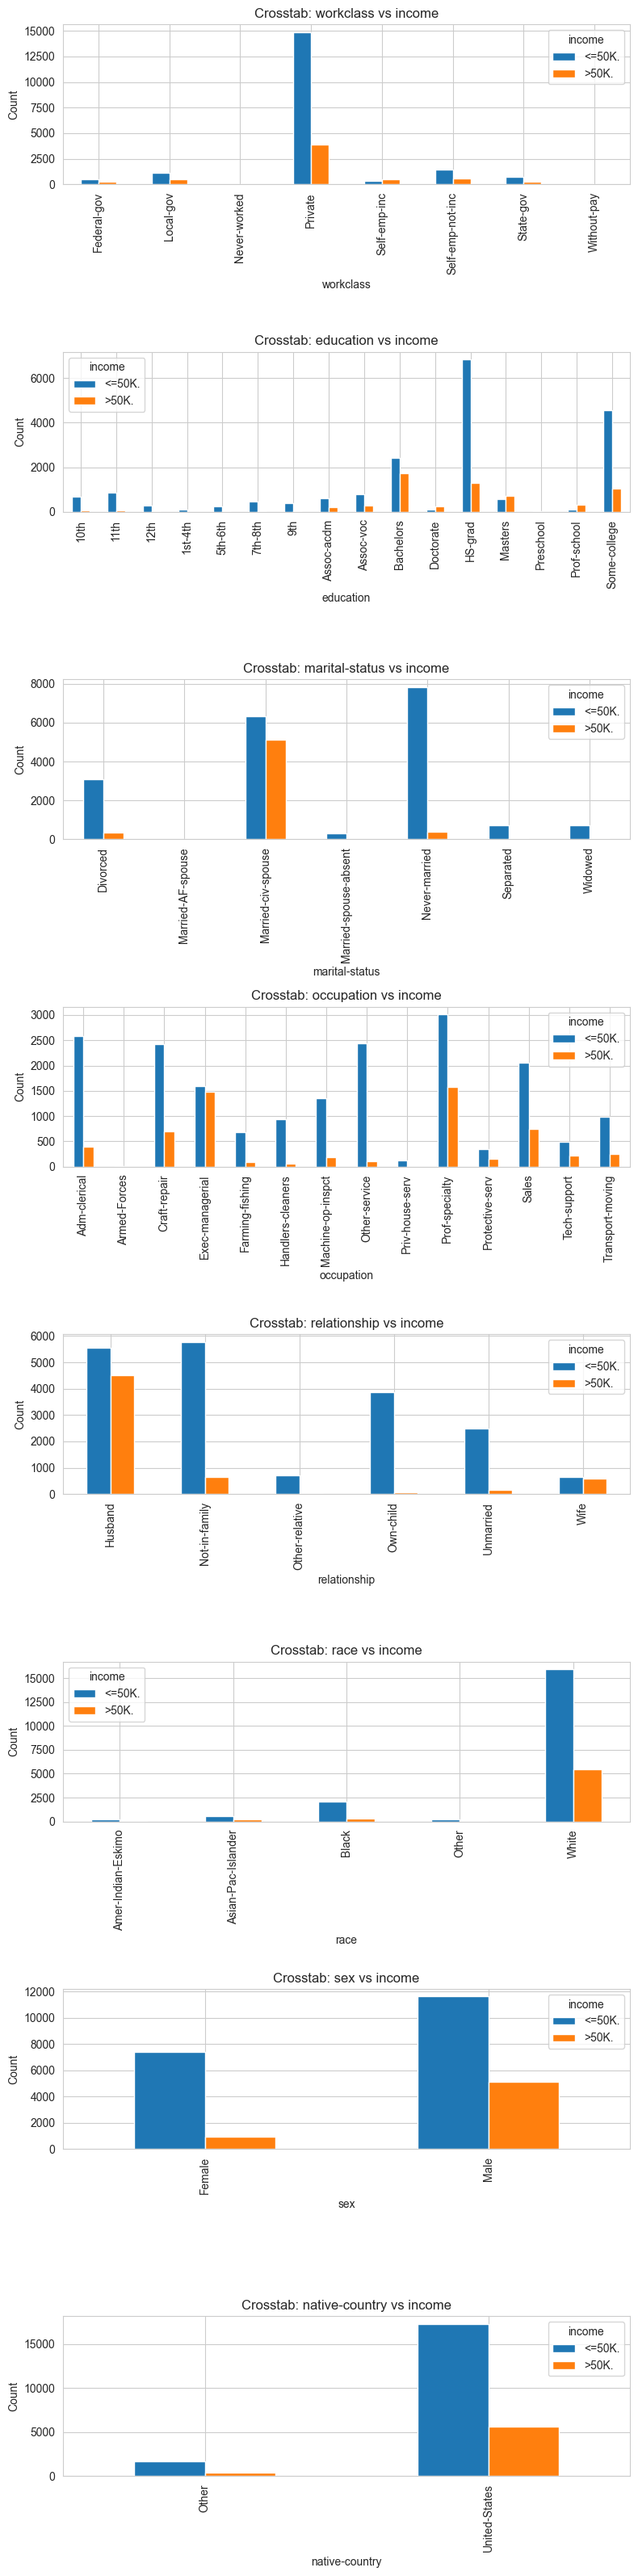

In [23]:
n = len(predictors)  # Number of predictors
fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n))

for i, predictor in enumerate(predictors):
    # Generate the crosstab
    crosstab = pd.crosstab(train_set[predictor], train_set[target])
    crosstab.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Crosstab: {predictor} vs {target}')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=target)
plt.tight_layout()
plt.show()

Create the dummy variables

In [24]:
train_set = pd.get_dummies(train_set, columns=['workclass', 'education', 'marital-status', 'occupation',
                                 'relationship','race','sex','native-country'],
                    drop_first=False)

In [25]:
train_set.head()

age  demogweight  capital-gain  capital-loss  hours-per-week  income  \
0   39        77516          2174             0              40  <=50K.   
1   50        83311             0             0              13  <=50K.   
2   38       215646             0             0              40  <=50K.   
3   53       234721             0             0              40  <=50K.   
4   28       338409             0             0              40  <=50K.   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  relationship_Wife  race_Amer-Indian-Eskimo  \
0              False  ...              False                    False   
1              False  ...              False                    False   
2               True  ...              False                    False   
3               True  ...              False                    False   
4               True  ...               True                    False   

   race_Asian-Pac-Islander  race_Black  race_Other  race_White  sex_Female  \
0                    False       False       False        True       False   
1                    False       False       False        True       False   
2                    False       False       False        True       False   
3                    False        True       False       False       False   
4                    False        True       False       False        True   

   sex_Male  native-country_Other  native-country_United-States  
0      True                 False                          True  
1      True                 False                          True  
2      True                 False                          True  
3      True                 False                          True  
4     False                  True                         False  

[5 rows x 66 columns]

In [26]:
train_set['income'] = np.where(train_set['income'] == '<=50K.', 0, 1)
train_set['income']

0        0
1        0
2        0
3        0
4        0
        ..
24995    0
24996    0
24997    0
24998    0
24999    0
Name: income, Length: 25000, dtype: int64

In [27]:
train_set["income"].value_counts()

income
0    19016
1     5984
Name: count, dtype: int64

Bar Chart of the Income status

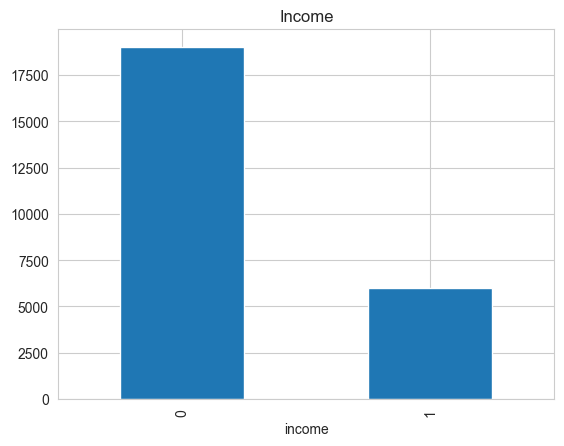

In [28]:
train_set["income"].value_counts().plot(kind='bar', title= "Income")
plt.show()

In [29]:
X = train_set.drop('income', axis = 1)
y = train_set['income']

Distribution of numeric X and Correlation between numeric X

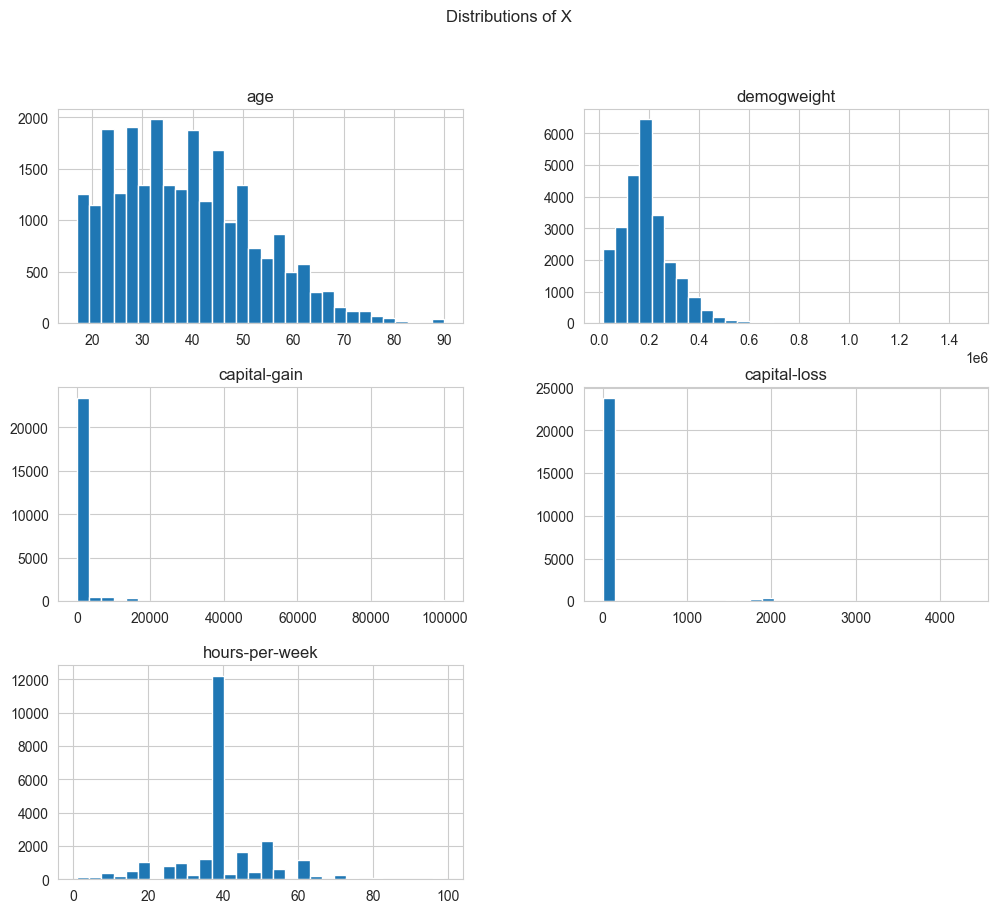

In [30]:
X.hist(figsize=(12, 10), bins=30)
plt.suptitle('Distributions of X')
plt.show()

In [31]:
numeric_predictors = train_set.select_dtypes(include=['number'])
correlation_matrix = numeric_predictors.corr()
print(correlation_matrix)

                     age  demogweight  capital-gain  capital-loss  \
age             1.000000    -0.075810      0.073591      0.056408   
demogweight    -0.075810     1.000000      0.004366     -0.012152   
capital-gain    0.073591     0.004366      1.000000     -0.031346   
capital-loss    0.056408    -0.012152     -0.031346      1.000000   
hours-per-week  0.069045    -0.015179      0.079760      0.055278   
income          0.230700    -0.008029      0.222510      0.147657   

                hours-per-week    income  
age                   0.069045  0.230700  
demogweight          -0.015179 -0.008029  
capital-gain          0.079760  0.222510  
capital-loss          0.055278  0.147657  
hours-per-week        1.000000  0.227305  
income                0.227305  1.000000  


Splitting dataset into train and test dataset

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Balacing the training set

In [34]:
pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
smote = SMOTE(random_state=17)
X_train, y_train = smote.fit_resample(X_train,y_train)

In [37]:
scaler = preprocessing.MinMaxScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

Build model

In [40]:
X_train.shape

(26632, 65)

In [41]:
model = Sequential()
model.add(Dense(64, input_shape=(65,), activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='RMSprop', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model_fit = model.fit(X_train,y_train, epochs=200, batch_size=50)

Epoch 1/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.7511 - loss: 0.5634
Epoch 2/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.8813 - loss: 0.2801
Epoch 3/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8893 - loss: 0.2497
Epoch 4/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8931 - loss: 0.2376
Epoch 5/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.8929 - loss: 0.2332
Epoch 6/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8953 - loss: 0.2301
Epoch 7/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8988 - loss: 0.2244
Epoch 8/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.8975 - loss: 0.2229
Epoch 9/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.8983 - loss: 0.2247
Epoch 10/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - accuracy: 0.9002 - loss: 0.2228
Epoch 11/200
533/533 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.8991 - loss: 0.2229
Epoch 12/200
533/53

Part 1 b)

Feature Importance Analysis:
                                 Feature  Importance
2                           capital-gain    5.269875
33  marital-status_Married-spouse-absent    1.873796
29                education_Some-college    1.812653
35              marital-status_Separated    1.727874
34          marital-status_Never-married    1.713707
..                                   ...         ...
64                  native-country_Other    0.424057
62                            sex_Female    0.394712
60                            race_Other    0.325251
12                   workclass_State-gov    0.296896
7                    workclass_Local-gov    0.124322

[65 rows x 2 columns]


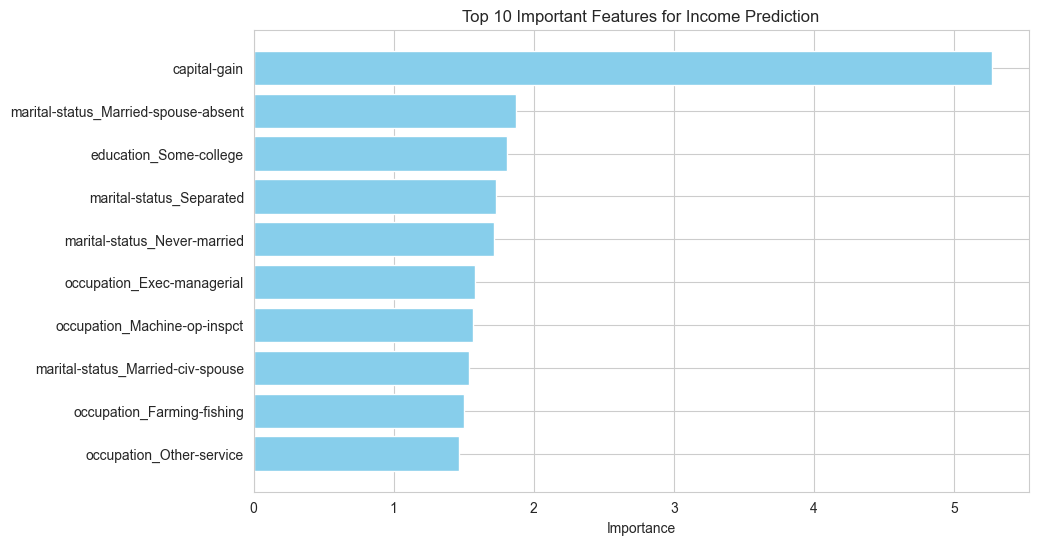

In [43]:
# Extracting weights from the first hidden layer to calculate feature importance
weights = model.layers[0].get_weights()[0]  # Weights from input to first hidden layer
feature_importance = np.mean(np.abs(weights), axis=1)  # Mean absolute weight for each input feature

# Map features to their importance values
features = list(train_set.columns[:-1])  # Exclude the target column
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)

# Print the DataFrame of feature importance
print("Feature Importance Analysis:")
print(importance_df)

# Plot the top 10 most important features
import matplotlib.pyplot as plt

top_features = importance_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Features for Income Prediction')
plt.gca().invert_yaxis()
plt.show()

Part 1 c) + Part 1 d)

In [44]:
predictions = model.predict(X_train)
rounded = [round(x[0]) for x in predictions]
print(rounded)

833/833 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [45]:
_, accuracy = model.evaluate(X_train,y_train)
print('Accuracy" %.2f'% (accuracy*100))

833/833 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - accuracy: 0.8692 - loss: 0.2820
Accuracy" 90.77


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Use the variable `predictions` from your model
y_pred = np.array(predictions).round().astype(int)  # Ensure predictions are binary (0 or 1)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_train, y_pred)
class_report = classification_report(y_train, y_pred, target_names=["<=50K", ">50K"])

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 90.77%
Confusion Matrix:
[[12271  1045]
 [ 1414 11902]]

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.90      0.92      0.91     13316
        >50K       0.92      0.89      0.91     13316

    accuracy                           0.91     26632
   macro avg       0.91      0.91      0.91     26632
weighted avg       0.91      0.91      0.91     26632



Part 1 e)

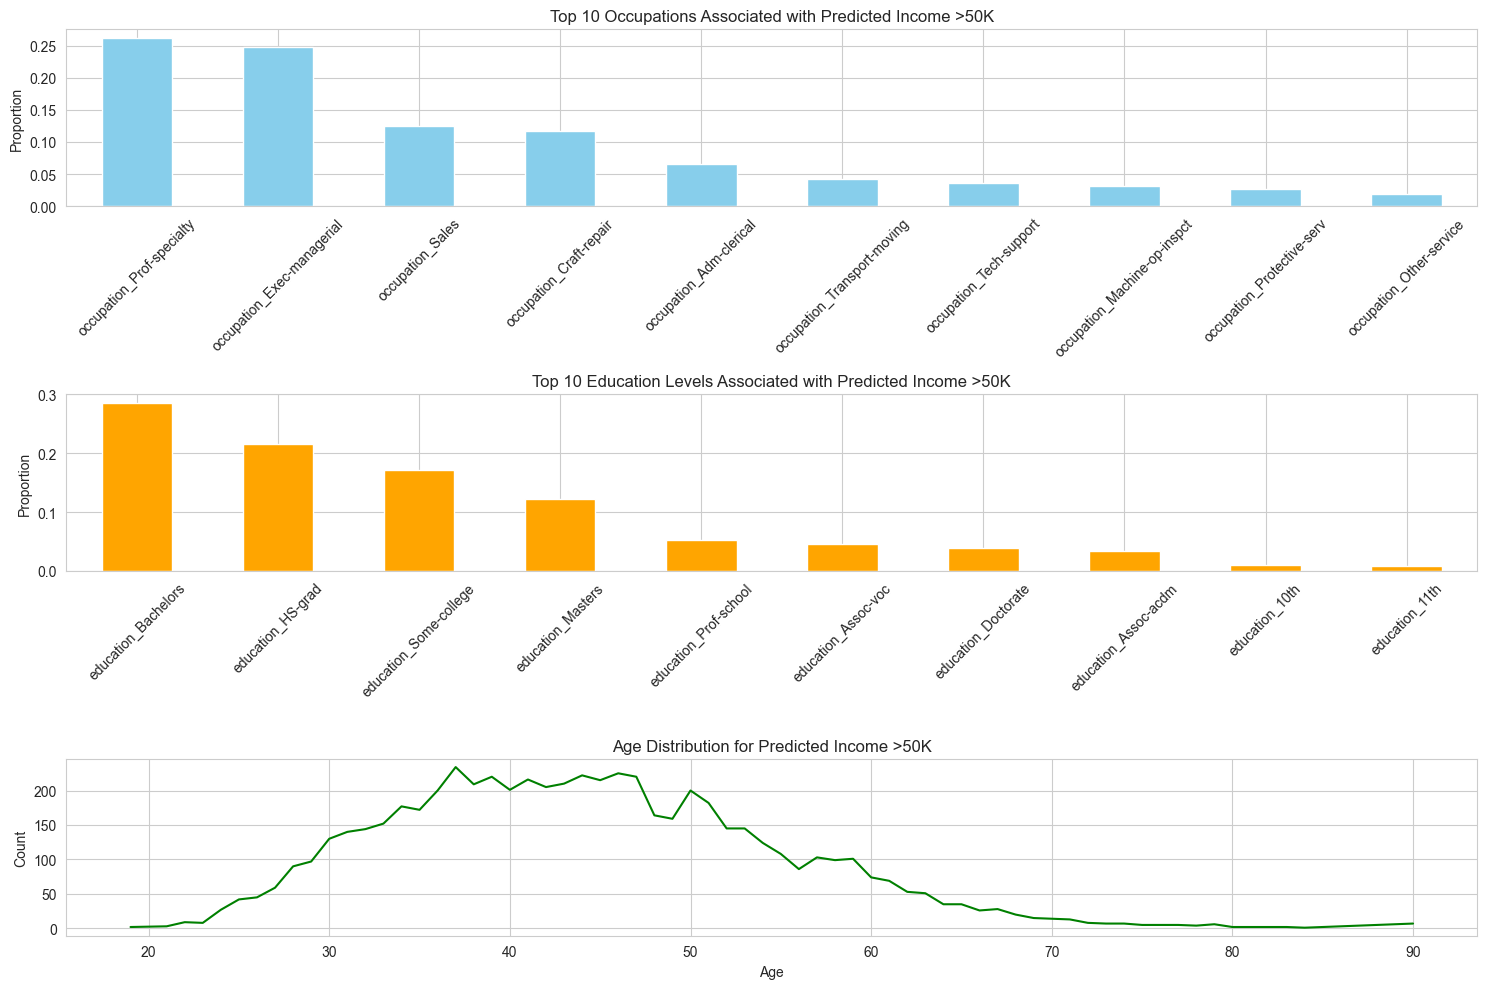

In [47]:
# Analyze the relationship of dummy variables for occupation with predicted income
# Filter for rows where predicted income is >50K
predicted_high_income = train_set[train_set['income'] == 1]

# Step 1: Occupation Variables
# Identify all columns related to occupations (one-hot encoded dummy variables)
occupation_columns = [col for col in train_set.columns if 'occupation_' in col]

# Calculate the proportion of predicted >50K for each occupation
occupation_relationship = predicted_high_income[occupation_columns].mean().sort_values(ascending=False)

# Step 2: Education Variables
# Identify all columns related to education (one-hot encoded dummy variables)
education_columns = [col for col in train_set.columns if 'education_' in col]

# Calculate the proportion of predicted >50K for each education level
education_relationship = predicted_high_income[education_columns].mean().sort_values(ascending=False)

# Step 3: Age Distribution
# Analyze the relationship of age with predicted income >50K
age_distribution = predicted_high_income['age'].value_counts().sort_index()

# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Top Occupations
plt.subplot(3, 1, 1)
occupation_relationship.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Occupations Associated with Predicted Income >50K')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Top Education Levels
plt.subplot(3, 1, 2)
education_relationship.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Education Levels Associated with Predicted Income >50K')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Age Distribution
plt.subplot(3, 1, 3)
age_distribution.plot(kind='line', color='green')
plt.title('Age Distribution for Predicted Income >50K')
plt.xlabel('Age')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

f) histogram

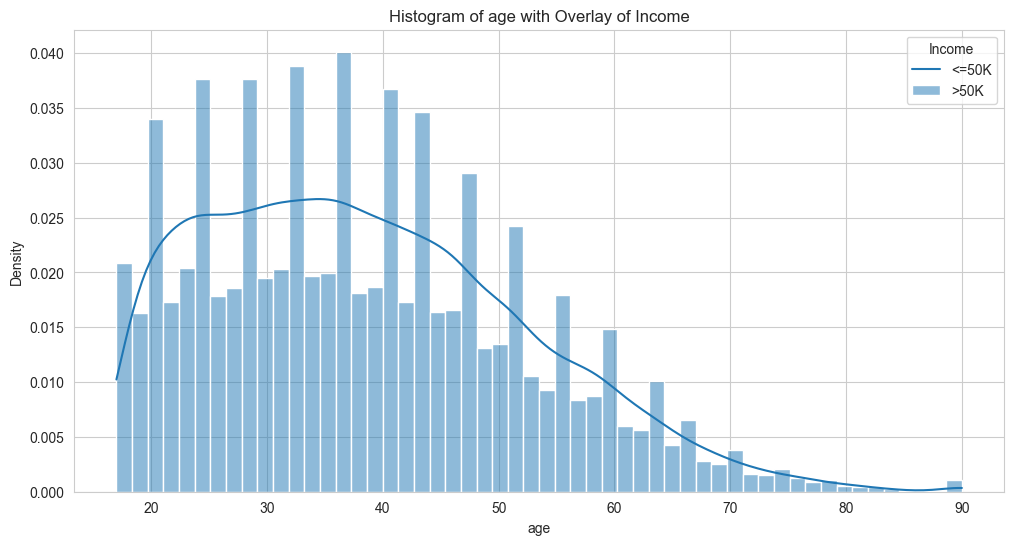

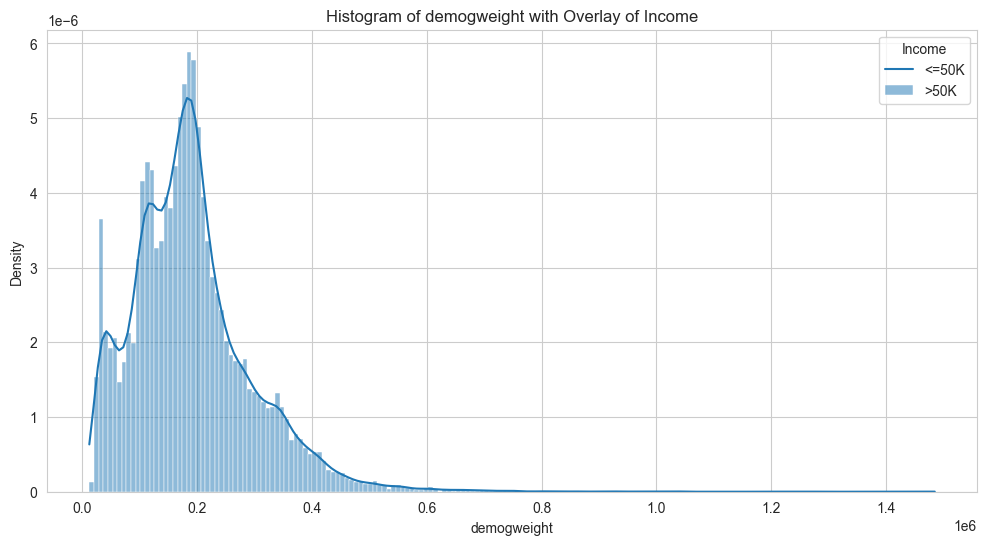

In [48]:
import seaborn as sns

# Identify one numeric variable important to the model (e.g., 'age')
important_numeric = 'age'

# Identify one numeric variable not important to the model (e.g., 'demogweight')
not_important_numeric = 'demogweight'

# Normalize data for comparison
train_set['income_binary'] = train_set['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Histogram for an important variable (e.g., 'age')
plt.figure(figsize=(12, 6))
sns.histplot(data=train_set, x=important_numeric, hue='income_binary', kde=True, stat='density', common_norm=False)
plt.title(f"Histogram of {important_numeric} with Overlay of Income")
plt.xlabel(important_numeric)
plt.ylabel("Density")
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

# Histogram for a non-important variable (e.g., 'demogweight')
plt.figure(figsize=(12, 6))
sns.histplot(data=train_set, x=not_important_numeric, hue='income_binary', kde=True, stat='density', common_norm=False)
plt.title(f"Histogram of {not_important_numeric} with Overlay of Income")
plt.xlabel(not_important_numeric)
plt.ylabel("Density")
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()


Part II tune the model

In [49]:
pip install scikeras


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
from scikeras.wrappers import KerasClassifier

First model with activation = 'sigmoid'

In [51]:
def first_model(optimizer='Adam'):
    model = Sequential()
    model.add(Dense(64, input_shape=(65,), activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model

In [52]:
model = KerasClassifier(model=first_model, epochs=100, batch_size=10, verbose=2)
optimizer = ['SGD', 'RMSprop', 'Adam']
batch_size = [80, 100, 120, 150, 180, 200]
epochs = [50, 60, 70, 80, 100, 200]

In [53]:
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

In [54]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, n_jobs=-1)

In [55]:
grid_result = grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
222/222 - 1s - 4ms/step - accuracy: 0.8175 - loss: 0.4780
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.7517 - loss: 0.5544
Epoch 2/50
222/222 - 1s - 3ms/step - accuracy: 0.7548 - loss: 0.5540
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.7454 - loss: 0.5818
Epoch 2/50
222/222 - 0s - 868us/step - accuracy: 0.9789 - loss: 0.1187
Epoch 3/50
222/222 - 1s - 5ms/step - accuracy: 0.7659 - loss: 0.5371
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.7667 - loss: 0.5573
222/222 - 1s - 4ms/step - accuracy: 0.7175 - loss: 0.6412
Epoch 2/50
Epoch 2/60
222/222 - 1s - 3ms/step - accuracy: 0.7371 - loss: 0.5664
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.8324 - loss: 0.4668
Epoch 2/50
222/222 - 0s - 1ms/step - accuracy: 0.8430 - loss: 0.3543
Epoch 3/50
222/222 - 1s - 4ms/step - accuracy: 0.8145 - loss: 0.4770
Epoch 2/60
222/222 - 0s - 1ms/step - accuracy: 0.8403 - loss: 0.3631
Epoch 3/50
222/222 - 0s - 934us/step - accuracy: 0.9895 - loss: 0.0521
Epoch 4/50
222/222 - 0s - 694u

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2666
Epoch 48/50
Epoch 1/60
222/222 - 0s - 760us/step - accuracy: 0.8715 - loss: 0.2673
Epoch 50/50
222/222 - 0s - 680us/step - accuracy: 0.8716 - loss: 0.2670
Epoch 49/50
222/222 - 0s - 838us/step - accuracy: 0.8730 - loss: 0.2670
222/222 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2659
Epoch 50/50
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0154
222/222 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0152
Epoch 49/50
222/222 - 0s - 959us/step - accuracy: 0.8719 - loss: 0.2668
Epoch 49/60
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0155
Epoch 50/60
222/222 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0158
111/111 - 0s - 924us/step
222/222 - 0s - 670us/step - accuracy: 0.8740 - loss: 0.2658
222/222 - 0s - 643us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 50/50
222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2662
Epoch 49/50
222/222 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2661
222/222 - 0s - 1ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

111/111 - 0s - 2ms/step
Epoch 1/60
222/222 - 0s - 2ms/step - accuracy: 0.8752 - loss: 0.2652
222/222 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0152
Epoch 52/60
111/111 - 0s - 1ms/step
Epoch 1/60
222/222 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2653
Epoch 52/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 1s - 4ms/step - accuracy: 0.7653 - loss: 0.5451
Epoch 2/60
111/111 - 0s - 1ms/step
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0150
Epoch 53/60
222/222 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2661
Epoch 53/60
222/222 - 0s - 848us/step - accuracy: 0.8457 - loss: 0.3501
Epoch 3/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 1s - 3ms/step - accuracy: 0.8043 - loss: 0.4956
Epoch 2/60
Epoch 1/70
222/222 - 1s - 3ms/step - accuracy: 0.8042 - loss: 0.4902
Epoch 2/60
222/222 - 1s - 3ms/step - accuracy: 0.7604 - loss: 0.5577
Epoch 2/60
222/222 - 0s - 571us/step - accuracy: 0.8736 - loss: 0.2656
Epoch 54/60
222/222 - 0s - 722us/step - accuracy: 0.9951 - loss: 0.0152
Epoch 54/60
222/222 - 1s - 3ms/step - accuracy: 0.7612 - loss: 0.5523
Epoch 2/60
222/222 - 0s - 1ms/step - accuracy: 0.8574 - loss: 0.3127
Epoch 4/60
222/222 - 0s - 975us/step - accuracy: 0.9752 - loss: 0.1273
Epoch 3/60
222/222 - 0s - 758us/step - accuracy: 0.8721 - loss: 0.2661
Epoch 55/60
222/222 - 0s - 458us/step - accuracy: 0.8430 - loss: 0.3570
222/222 - 0s - 865us/step - accuracy: 0.9772 - loss: 0.1119
Epoch 3/60
Epoch 3/60
222/222 - 0s - 879us/step - accuracy: 0.8420 - loss: 0.3563
Epoch 3/60
222/222 - 0s - 993us/step - accuracy: 0.9953 - loss: 0.0155
Epoch 55/60
222/222 - 0s - 338us/step - accuracy: 0.9897 - loss: 0.0492
Epoch 4/60
2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 880us/step - accuracy: 0.8700 - loss: 0.2755
Epoch 13/60
222/222 - 0s - 910us/step - accuracy: 0.8669 - loss: 0.2821
Epoch 9/60
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.2780
Epoch 11/60
222/222 - 0s - 1ms/step - accuracy: 0.9938 - loss: 0.0197
Epoch 13/60
222/222 - 0s - 1ms/step - accuracy: 0.8667 - loss: 0.2873
Epoch 7/70
222/222 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0193
Epoch 13/60
222/222 - 0s - 423us/step - accuracy: 0.8720 - loss: 0.2753
Epoch 12/60
222/222 - 0s - 399us/step - accuracy: 0.9941 - loss: 0.0195
Epoch 14/60
222/222 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2749
Epoch 13/60
222/222 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2737
Epoch 15/60
222/222 - 0s - 1ms/step - accuracy: 0.9933 - loss: 0.0228
Epoch 9/70
222/222 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2739
Epoch 14/60
222/222 - 0s - 1ms/step - accuracy: 0.8669 - loss: 0.2802
Epoch 10/60
222/222 - 0s - 690us/step - accuracy: 0.9943 - loss: 0.0186
Epoch 14/60
22

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2663
Epoch 56/60
222/222 - 0s - 331us/step - accuracy: 0.8734 - loss: 0.2660
Epoch 49/70
222/222 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2647
222/222 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 55/70
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0155
Epoch 47/70
111/111 - 0s - 2ms/step
222/222 - 0s - 917us/step - accuracy: 0.8724 - loss: 0.2647
222/222 - 0s - 960us/step - accuracy: 0.8724 - loss: 0.2652
Epoch 58/70
222/222 - 0s - 832us/step - accuracy: 0.8738 - loss: 0.2657
Epoch 57/60
222/222 - 0s - 407us/step - accuracy: 0.9952 - loss: 0.0154
111/111 - 0s - 2ms/step
Epoch 48/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

111/111 - 0s - 1ms/step
222/222 - 0s - 902us/step - accuracy: 0.8733 - loss: 0.2679
Epoch 50/70
222/222 - 0s - 854us/step - accuracy: 0.9954 - loss: 0.0148
Epoch 56/70
222/222 - 0s - 495us/step - accuracy: 0.8738 - loss: 0.2653
Epoch 59/70
222/222 - 0s - 574us/step - accuracy: 0.9949 - loss: 0.0158
Epoch 49/70
222/222 - 0s - 639us/step - accuracy: 0.8724 - loss: 0.2667
Epoch 58/60
Epoch 1/70
Epoch 1/70
111/111 - 0s - 1ms/step
111/111 - 0s - 1ms/step
222/222 - 0s - 703us/step - accuracy: 0.8734 - loss: 0.2664
Epoch 51/70
222/222 - 0s - 742us/step - accuracy: 0.9952 - loss: 0.0158
Epoch 57/70
222/222 - 0s - 716us/step - accuracy: 0.8721 - loss: 0.2646
Epoch 60/70
Epoch 1/70
Epoch 1/70
Epoch 1/80
222/222 - 0s - 810us/step - accuracy: 0.9952 - loss: 0.0156
222/222 - 0s - 522us/step - accuracy: 0.8734 - loss: 0.2671
Epoch 50/70
Epoch 52/70
222/222 - 0s - 869us/step - accuracy: 0.8725 - loss: 0.2664
Epoch 59/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2660
Epoch 53/70
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0155
Epoch 51/70
222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2661
Epoch 60/60
222/222 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 58/70
222/222 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2650
Epoch 61/70
222/222 - 1s - 4ms/step - accuracy: 0.7614 - loss: 0.5390
Epoch 2/70
222/222 - 0s - 700us/step - accuracy: 0.8723 - loss: 0.2659
Epoch 54/70
222/222 - 0s - 705us/step - accuracy: 0.9950 - loss: 0.0156
Epoch 52/70
222/222 - 0s - 748us/step - accuracy: 0.8745 - loss: 0.2671
222/222 - 0s - 961us/step - accuracy: 0.8736 - loss: 0.2634
Epoch 62/70
222/222 - 1s - 3ms/step - accuracy: 0.7561 - loss: 0.5483
Epoch 2/70
222/222 - 1s - 3ms/step - accuracy: 0.8289 - loss: 0.4668
Epoch 2/70
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0149
Epoch 59/70
222/222 - 1s - 3ms/step - accuracy: 0.7490 - loss: 0.5569
Epoch 2/70
222/222 - 0s - 1ms/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9723 - loss: 0.1357
Epoch 3/80
222/222 - 0s - 716us/step - accuracy: 0.8629 - loss: 0.2989
Epoch 5/70
222/222 - 0s - 998us/step - accuracy: 0.9892 - loss: 0.0502
Epoch 4/70
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0151
Epoch 61/70
222/222 - 0s - 1ms/step - accuracy: 0.8593 - loss: 0.3123
Epoch 4/70
222/222 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2655
Epoch 57/70
222/222 - 0s - 1ms/step - accuracy: 0.8597 - loss: 0.3135
Epoch 4/70
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0156
Epoch 55/70
222/222 - 0s - 1ms/step - accuracy: 0.8590 - loss: 0.3167
Epoch 4/70
222/222 - 0s - 613us/step - accuracy: 0.9913 - loss: 0.0358
Epoch 5/70
222/222 - 0s - 618us/step - accuracy: 0.9950 - loss: 0.0151
Epoch 62/70
222/222 - 0s - 636us/step - accuracy: 0.8625 - loss: 0.2980
Epoch 5/70
222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2638
Epoch 64/70
222/222 - 0s - 1ms/step - accuracy: 0.9885 - loss: 0.0569
Epoch 4/80
222/222 - 0s - 681u

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
222/222 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2784
Epoch 11/70
222/222 - 0s - 951us/step - accuracy: 0.8746 - loss: 0.2654
Epoch 65/70
222/222 - 0s - 1ms/step - accuracy: 0.8704 - loss: 0.2754
Epoch 13/70
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0148
Epoch 70/70
222/222 - 0s - 978us/step - accuracy: 0.9937 - loss: 0.0206
Epoch 12/80
222/222 - 0s - 1000us/step - accuracy: 0.9939 - loss: 0.0195
Epoch 13/70
222/222 - 0s - 1ms/step - accuracy: 0.8687 - loss: 0.2760
Epoch 13/70
222/222 - 0s - 1ms/step - accuracy: 0.8662 - loss: 0.2874
Epoch 7/80
222/222 - 0s - 792us/step - accuracy: 0.8689 - loss: 0.2756
Epoch 13/70
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 65/70
222/222 - 0s - 759us/step - accuracy: 0.8750 - loss: 0.2636
Epoch 66/70
222/222 - 0s - 786us/step - accuracy: 0.8697 - loss: 0.2763
Epoch 12/70
222/222 - 0s - 948us/step - accuracy: 0.8710 - loss: 0.2742
Epoch 14/70
222/222 - 0s - 990us/step - accuracy: 0.9950 - loss: 0.0152
222/2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 836us/step - accuracy: 0.8702 - loss: 0.2729
Epoch 16/70
222/222 - 0s - 970us/step - accuracy: 0.8681 - loss: 0.2798
Epoch 10/80
222/222 - 0s - 956us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 68/70
222/222 - 0s - 932us/step - accuracy: 0.8736 - loss: 0.2637
Epoch 69/70
222/222 - 0s - 902us/step - accuracy: 0.9948 - loss: 0.0182
Epoch 16/70
222/222 - 0s - 820us/step - accuracy: 0.8715 - loss: 0.2737
Epoch 15/70
222/222 - 0s - 842us/step - accuracy: 0.8431 - loss: 0.3566
Epoch 3/80
222/222 - 0s - 895us/step - accuracy: 0.8719 - loss: 0.2723
Epoch 17/70
222/222 - 0s - 846us/step - accuracy: 0.9941 - loss: 0.0192
Epoch 15/80
222/222 - 0s - 828us/step - accuracy: 0.8714 - loss: 0.2730
Epoch 17/70
222/222 - 0s - 998us/step - accuracy: 0.8723 - loss: 0.2731
Epoch 17/70
222/222 - 0s - 847us/step - accuracy: 0.9954 - loss: 0.0152
Epoch 69/70
222/222 - 0s - 848us/step - accuracy: 0.8735 - loss: 0.2636
Epoch 70/70
222/222 - 0s - 938us/step - accuracy: 0.8683 - loss: 0.2790
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 646us/step - accuracy: 0.8704 - loss: 0.2742
Epoch 14/80
222/222 - 1s - 4ms/step - accuracy: 0.8401 - loss: 0.4732
Epoch 2/80
222/222 - 0s - 469us/step - accuracy: 0.8713 - loss: 0.2721
Epoch 19/70
222/222 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.2718
Epoch 21/70
222/222 - 0s - 2ms/step - accuracy: 0.8706 - loss: 0.2719
Epoch 21/70
222/222 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0183
Epoch 18/80
111/111 - 0s - 2ms/step
222/222 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2714
Epoch 21/70
222/222 - 0s - 977us/step - accuracy: 0.9946 - loss: 0.0173
Epoch 20/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8660 - loss: 0.2893
Epoch 7/80
222/222 - 0s - 937us/step - accuracy: 0.9790 - loss: 0.1108
Epoch 3/80
222/222 - 0s - 928us/step - accuracy: 0.8726 - loss: 0.2717
Epoch 20/70
222/222 - 0s - 658us/step - accuracy: 0.8706 - loss: 0.2712
Epoch 22/70
222/222 - 0s - 836us/step - accuracy: 0.8710 - loss: 0.2717
Epoch 22/70
222/222 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2736
Epoch 15/80
222/222 - 0s - 729us/step - accuracy: 0.9940 - loss: 0.0181
Epoch 19/80
222/222 - 0s - 616us/step - accuracy: 0.9946 - loss: 0.0172
Epoch 21/70
222/222 - 0s - 664us/step - accuracy: 0.8710 - loss: 0.2712
Epoch 22/70
Epoch 1/80
222/222 - 0s - 570us/step - accuracy: 0.8703 - loss: 0.2736
Epoch 16/80
222/222 - 0s - 900us/step - accuracy: 0.8666 - loss: 0.2845
Epoch 8/80
222/222 - 0s - 929us/step - accuracy: 0.8714 - loss: 0.2711
Epoch 21/70
222/222 - 0s - 963us/step - accuracy: 0.9889 - loss: 0.0508
Epoch 4/80
222/222 - 0s - 858us/step - accuracy: 0.8714 - loss: 0.2709
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0146
Epoch 68/80
222/222 - 0s - 922us/step - accuracy: 0.8720 - loss: 0.2644
Epoch 68/70
222/222 - 0s - 860us/step - accuracy: 0.8746 - loss: 0.2653
Epoch 70/70
222/222 - 1s - 2ms/step - accuracy: 0.8727 - loss: 0.2671
Epoch 46/80
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 69/70
222/222 - 0s - 993us/step - accuracy: 0.8742 - loss: 0.2643
222/222 - 0s - 965us/step - accuracy: 0.9952 - loss: 0.0150
Epoch 55/80
222/222 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2661
Epoch 62/80
222/222 - 0s - 856us/step - accuracy: 0.9946 - loss: 0.0153
Epoch 69/80
222/222 - 0s - 416us/step - accuracy: 0.8722 - loss: 0.2670
Epoch 47/80
222/222 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2657
Epoch 45/80
222/222 - 0s - 827us/step - accuracy: 0.8710 - loss: 0.2648
Epoch 69/70
222/222 - 0s - 828us/step - accuracy: 0.8733 - loss: 0.2646
222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2670
Epoch 55/80
222/222 - 0s - 565us/step - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 679us/step - accuracy: 0.9952 - loss: 0.0150
Epoch 71/80
222/222 - 0s - 796us/step - accuracy: 0.8716 - loss: 0.2664
Epoch 47/80
222/222 - 0s - 703us/step - accuracy: 0.8718 - loss: 0.2678
Epoch 49/80
222/222 - 0s - 525us/step - accuracy: 0.9952 - loss: 0.0149
Epoch 58/80
222/222 - 0s - 777us/step - accuracy: 0.8740 - loss: 0.2663
Epoch 58/80
222/222 - 0s - 790us/step - accuracy: 0.8729 - loss: 0.2641
Epoch 65/80
111/111 - 0s - 2ms/step
222/222 - 1s - 4ms/step - accuracy: 0.7753 - loss: 0.5316
Epoch 2/80
111/111 - 0s - 1ms/step
222/222 - 0s - 757us/step - accuracy: 0.8728 - loss: 0.2673
Epoch 50/80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 818us/step - accuracy: 0.8725 - loss: 0.2653
Epoch 48/80
222/222 - 0s - 835us/step - accuracy: 0.9953 - loss: 0.0147
Epoch 59/80
222/222 - 0s - 835us/step - accuracy: 0.8736 - loss: 0.2642
Epoch 66/80
222/222 - 0s - 862us/step - accuracy: 0.8723 - loss: 0.2660
Epoch 59/80
222/222 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0144
Epoch 72/80
222/222 - 0s - 766us/step - accuracy: 0.9681 - loss: 0.1455
Epoch 3/80
Epoch 1/100
Epoch 1/100
222/222 - 0s - 563us/step - accuracy: 0.9953 - loss: 0.0145
Epoch 73/80
222/222 - 0s - 918us/step - accuracy: 0.8735 - loss: 0.2652
Epoch 49/80
222/222 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2668
Epoch 51/80
222/222 - 0s - 880us/step - accuracy: 0.9949 - loss: 0.0153
Epoch 60/80
222/222 - 0s - 769us/step - accuracy: 0.8731 - loss: 0.2664
Epoch 60/80
222/222 - 0s - 953us/step - accuracy: 0.8735 - loss: 0.2650
Epoch 67/80
222/222 - 0s - 911us/step - accuracy: 0.9875 - loss: 0.0598
Epoch 4/80
222/222 - 0s - 914us/step - accuracy: 0.9952 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0146
Epoch 71/80
222/222 - 0s - 621us/step - accuracy: 0.8709 - loss: 0.2780
Epoch 11/80
222/222 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2626
Epoch 78/80
222/222 - 0s - 1ms/step - accuracy: 0.8689 - loss: 0.2776
Epoch 11/80
222/222 - 0s - 763us/step - accuracy: 0.8737 - loss: 0.2656
Epoch 62/80
222/222 - 0s - 776us/step - accuracy: 0.8730 - loss: 0.2640
Epoch 61/80
222/222 - 0s - 1ms/step - accuracy: 0.8672 - loss: 0.2873
Epoch 7/100
222/222 - 0s - 386us/step - accuracy: 0.8700 - loss: 0.2762
Epoch 12/80
222/222 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2654
Epoch 71/80
222/222 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0223
Epoch 10/100
222/222 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0191
Epoch 16/80
222/222 - 0s - 701us/step - accuracy: 0.8740 - loss: 0.2640
Epoch 62/80
222/222 - 0s - 588us/step - accuracy: 0.9941 - loss: 0.0190
Epoch 17/80
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 72/80
222/222

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0178
Epoch 22/80
Epoch 1/100
222/222 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2650
Epoch 67/80
222/222 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2630
Epoch 65/80
222/222 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2639
Epoch 76/80
222/222 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2731
222/222 - 0s - 1ms/step - accuracy: 0.8686 - loss: 0.2764
Epoch 17/80
Epoch 12/100
222/222 - 0s - 1ms/step - accuracy: 0.8615 - loss: 0.2988
Epoch 5/100
222/222 - 0s - 989us/step - accuracy: 0.9953 - loss: 0.0147
Epoch 77/80
222/222 - 0s - 565us/step - accuracy: 0.8719 - loss: 0.2639
222/222 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2719
Epoch 66/80
Epoch 16/80
222/222 - 0s - 974us/step - accuracy: 0.9947 - loss: 0.0174
Epoch 23/80
222/222 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0185
Epoch 17/100
222/222 - 0s - 964us/step - accuracy: 0.8734 - loss: 0.2646
Epoch 68/80
222/222 - 0s - 854us/step - accuracy: 0.8736 - loss: 0.2649
Epoch 77

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2710
Epoch 21/80
111/111 - 0s - 826us/step
222/222 - 0s - 737us/step - accuracy: 0.8715 - loss: 0.2694
Epoch 23/80
222/222 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2640
Epoch 73/80
222/222 - 0s - 1ms/step - accuracy: 0.9788 - loss: 0.1146
Epoch 3/100
222/222 - 0s - 729us/step - accuracy: 0.9943 - loss: 0.0173
Epoch 23/100
222/222 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0166
222/222 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2714
Epoch 29/80
Epoch 17/100
222/222 - 0s - 857us/step - accuracy: 0.8740 - loss: 0.2624
Epoch 71/80
222/222 - 0s - 853us/step - accuracy: 0.8700 - loss: 0.2783
Epoch 11/100
222/222 - 0s - 504us/step - accuracy: 0.8722 - loss: 0.2703
Epoch 22/80
Epoch 1/100
222/222 - 0s - 837us/step - accuracy: 0.8738 - loss: 0.2633
Epoch 74/80
222/222 - 0s - 814us/step - accuracy: 0.9885 - loss: 0.0528
Epoch 4/100
222/222 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2697
Epoch 24/80
222/222 - 0s - 907us/step - accurac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 651us/step - accuracy: 0.8736 - loss: 0.2696
Epoch 28/100
222/222 - 0s - 890us/step - accuracy: 0.9937 - loss: 0.0195
Epoch 14/100
222/222 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2612
222/222 - 0s - 893us/step - accuracy: 0.9948 - loss: 0.0161
Epoch 40/80
Epoch 1/100
222/222 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2678
Epoch 35/80
222/222 - 0s - 965us/step - accuracy: 0.8714 - loss: 0.2711
Epoch 22/100
222/222 - 0s - 881us/step - accuracy: 0.8678 - loss: 0.2826
Epoch 9/100
222/222 - 0s - 1ms/step - accuracy: 0.8650 - loss: 0.2869
Epoch 7/100
222/222 - 0s - 754us/step - accuracy: 0.8742 - loss: 0.2680
Epoch 34/80
222/222 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0171
Epoch 35/100
111/111 - 0s - 732us/step
222/222 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2697
Epoch 29/100
222/222 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0190
Epoch 15/100
222/222 - 0s - 863us/step - accuracy: 0.8714 - loss: 0.2679
222/222 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.016

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 925us/step - accuracy: 0.8682 - loss: 0.2811
Epoch 9/100
222/222 - 0s - 924us/step - accuracy: 0.8711 - loss: 0.2700
Epoch 24/100
222/222 - 0s - 863us/step - accuracy: 0.8695 - loss: 0.2781
Epoch 11/100
222/222 - 0s - 921us/step - accuracy: 0.9951 - loss: 0.0164
Epoch 37/100
222/222 - 0s - 939us/step - accuracy: 0.8719 - loss: 0.2680
Epoch 36/80
222/222 - 0s - 903us/step - accuracy: 0.9953 - loss: 0.0157
Epoch 43/80
222/222 - 0s - 930us/step - accuracy: 0.9940 - loss: 0.0182
Epoch 17/100
222/222 - 0s - 952us/step - accuracy: 0.8740 - loss: 0.2672
Epoch 38/80
222/222 - 0s - 422us/step - accuracy: 0.8714 - loss: 0.2672
Epoch 37/80
222/222 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2684
Epoch 31/100
222/222 - 0s - 901us/step - accuracy: 0.8669 - loss: 0.2800
Epoch 10/100
222/222 - 0s - 978us/step - accuracy: 0.8685 - loss: 0.2774
Epoch 12/100
222/222 - 0s - 990us/step - accuracy: 0.8710 - loss: 0.2708
Epoch 25/100
222/222 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0158


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
222/222 - 0s - 830us/step - accuracy: 0.8729 - loss: 0.2635
Epoch 68/100
222/222 - 0s - 829us/step - accuracy: 0.8728 - loss: 0.2663
Epoch 62/100
222/222 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2626
Epoch 75/80
222/222 - 0s - 885us/step - accuracy: 0.9952 - loss: 0.0154
Epoch 57/100
222/222 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2619
Epoch 76/80
222/222 - 0s - 989us/step - accuracy: 0.9954 - loss: 0.0146
Epoch 78/100
222/222 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2670
Epoch 47/100
222/222 - 0s - 853us/step - accuracy: 0.8735 - loss: 0.2654
Epoch 52/100
222/222 - 0s - 862us/step - accuracy: 0.8707 - loss: 0.2690
Epoch 35/100
222/222 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0171
Epoch 34/100
222/222 - 0s - 832us/step - accuracy: 0.8736 - loss: 0.2633
Epoch 69/100
222/222 - 0s - 777us/step - accuracy: 0.8741 - loss: 0.2652
Epoch 63/100
222/222 - 0s - 925us/step - accuracy: 0.8740 - loss: 0.2633
Epoch 76/80
222/222 - 0s - 522us/step - accuracy: 0.8738 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
222/222 - 0s - 779us/step - accuracy: 0.8729 - loss: 0.2670
Epoch 55/100
222/222 - 0s - 995us/step - accuracy: 0.9952 - loss: 0.0152
Epoch 64/100
222/222 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2640
Epoch 59/100
222/222 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2620
Epoch 77/100
222/222 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2685
Epoch 42/100
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0141
Epoch 85/100
222/222 - 0s - 971us/step - accuracy: 0.8651 - loss: 0.2918
Epoch 6/100
222/222 - 0s - 457us/step - accuracy: 0.8743 - loss: 0.2639
Epoch 60/100
222/222 - 0s - 650us/step - accuracy: 0.9954 - loss: 0.0150
Epoch 65/100
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0153
Epoch 42/100
222/222 - 0s - 517us/step - accuracy: 0.8749 - loss: 0.2623
Epoch 78/100
222/222 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2638
Epoch 71/100
222/222 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2659
Epoch 56/100
222/222 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 964us/step - accuracy: 0.9957 - loss: 0.0147
Epoch 86/100
222/222 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2653
Epoch 62/100
222/222 - 0s - 619us/step - accuracy: 0.8734 - loss: 0.2706
Epoch 27/100
222/222 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2716
Epoch 22/200
222/222 - 0s - 999us/step - accuracy: 0.8740 - loss: 0.2608
Epoch 93/100
222/222 - 0s - 740us/step - accuracy: 0.9942 - loss: 0.0179
Epoch 21/200
222/222 - 0s - 912us/step - accuracy: 0.8756 - loss: 0.2584
Epoch 100/100
222/222 - 0s - 896us/step - accuracy: 0.8741 - loss: 0.2635
Epoch 76/100
222/222 - 0s - 797us/step - accuracy: 0.8718 - loss: 0.2656
Epoch 63/100
222/222 - 0s - 847us/step - accuracy: 0.9953 - loss: 0.0146
Epoch 87/100
222/222 - 0s - 814us/step - accuracy: 0.8724 - loss: 0.2696
222/222 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2612
Epoch 28/100
Epoch 81/100
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0147
Epoch 62/100
222/222 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2702


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2654
Epoch 66/100
222/222 - 0s - 796us/step - accuracy: 0.8761 - loss: 0.2604
Epoch 85/100
222/222 - 0s - 740us/step - accuracy: 0.8743 - loss: 0.2598
Epoch 97/100
222/222 - 0s - 955us/step - accuracy: 0.8714 - loss: 0.2710
Epoch 26/200
222/222 - 0s - 920us/step - accuracy: 0.9946 - loss: 0.0171
Epoch 25/200
222/222 - 1s - 5ms/step - accuracy: 0.7459 - loss: 0.5648
222/222 - 0s - 957us/step - accuracy: 0.9954 - loss: 0.0144
Epoch 2/200
Epoch 91/100
222/222 - 0s - 470us/step - accuracy: 0.8727 - loss: 0.2701
Epoch 27/200
222/222 - 0s - 2ms/step - accuracy: 0.8705 - loss: 0.2706
Epoch 31/100
Epoch 1/200
222/222 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0146
Epoch 66/100
222/222 - 0s - 1ms/step - accuracy: 0.8745 - loss: 0.2626
Epoch 80/100
222/222 - 0s - 809us/step - accuracy: 0.9949 - loss: 0.0165
Epoch 26/200
222/222 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2605
Epoch 98/100
222/222 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
222/222 - 0s - 2ms/step - accuracy: 0.8710 - loss: 0.2694
Epoch 33/200
222/222 - 0s - 341us/step - accuracy: 0.9946 - loss: 0.0167
Epoch 32/200
222/222 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0140
222/222 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0.2624
Epoch 97/100
Epoch 85/100
222/222 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2691
Epoch 37/100
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 71/100
222/222 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2647
Epoch 71/100
222/222 - 0s - 1ms/step - accuracy: 0.8761 - loss: 0.2601
Epoch 90/100
222/222 - 0s - 981us/step - accuracy: 0.8679 - loss: 0.2848
Epoch 8/200
222/222 - 0s - 365us/step - accuracy: 0.8751 - loss: 0.2608
Epoch 91/100
222/222 - 0s - 924us/step - accuracy: 0.8725 - loss: 0.2626
Epoch 86/100
222/222 - 0s - 897us/step - accuracy: 0.8747 - loss: 0.2654
Epoch 72/100
222/222 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0162
Epoch 33/200
222/222 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.269

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9913 - loss: 0.0369
Epoch 5/200
222/222 - 0s - 969us/step - accuracy: 0.9956 - loss: 0.0146
Epoch 76/100
Epoch 1/200
222/222 - 0s - 786us/step - accuracy: 0.8737 - loss: 0.2638
Epoch 76/100
222/222 - 1s - 5ms/step - accuracy: 0.7800 - loss: 0.5353
Epoch 2/200
222/222 - 0s - 976us/step - accuracy: 0.8712 - loss: 0.2690
Epoch 38/200
222/222 - 0s - 2ms/step - accuracy: 0.8736 - loss: 0.2625
Epoch 89/100
222/222 - 0s - 305us/step - accuracy: 0.8444 - loss: 0.3510
Epoch 3/200
222/222 - 0s - 2ms/step - accuracy: 0.8749 - loss: 0.2594
Epoch 94/100
222/222 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0164
Epoch 37/200
222/222 - 0s - 798us/step - accuracy: 0.9920 - loss: 0.0304
Epoch 6/200
222/222 - 0s - 306us/step - accuracy: 0.8586 - loss: 0.3123
Epoch 4/200
222/222 - 0s - 931us/step - accuracy: 0.9955 - loss: 0.0141
Epoch 77/100
222/222 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2762
Epoch 14/200
222/222 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.263

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2626
Epoch 84/100
222/222 - 0s - 779us/step - accuracy: 0.8706 - loss: 0.2769
Epoch 12/200
222/222 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2672
Epoch 47/200
222/222 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0158
Epoch 44/200
222/222 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2717
Epoch 21/200
222/222 - 0s - 1ms/step - accuracy: 0.8750 - loss: 0.2600
Epoch 97/100
222/222 - 0s - 304us/step - accuracy: 0.9947 - loss: 0.0157
Epoch 45/200
222/222 - 0s - 1ms/step - accuracy: 0.8599 - loss: 0.3118
Epoch 4/200
222/222 - 0s - 1ms/step - accuracy: 0.9938 - loss: 0.0192
Epoch 14/200
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0142
Epoch 86/100
222/222 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2680
Epoch 51/100
222/222 - 0s - 320us/step - accuracy: 0.9953 - loss: 0.0154
Epoch 46/200
222/222 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2766
Epoch 13/200
222/222 - 0s - 493us/step - accuracy: 0.9942 - loss: 0.0187
Epoch 15/200

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
222/222 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0140
Epoch 90/100
222/222 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2663
Epoch 58/100
222/222 - 0s - 1ms/step - accuracy: 0.9772 - loss: 0.1192
Epoch 3/200
222/222 - 0s - 806us/step - accuracy: 0.8685 - loss: 0.2746
Epoch 18/200
222/222 - 0s - 861us/step - accuracy: 0.8675 - loss: 0.2815
Epoch 9/200
222/222 - 0s - 351us/step - accuracy: 0.8734 - loss: 0.2660
Epoch 59/100
222/222 - 0s - 987us/step - accuracy: 0.8740 - loss: 0.2627
Epoch 90/100
222/222 - 0s - 929us/step - accuracy: 0.8716 - loss: 0.2706
Epoch 26/200
222/222 - 0s - 997us/step - accuracy: 0.9943 - loss: 0.0177
Epoch 20/200
222/222 - 0s - 299us/step - accuracy: 0.8723 - loss: 0.2710
Epoch 27/200
222/222 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0153
Epoch 52/200
222/222 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2669
Epoch 55/200
222/222 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2726
Epoch 19/200
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 996us/step - accuracy: 0.8719 - loss: 0.2701
Epoch 31/200
222/222 - 0s - 862us/step - accuracy: 0.9936 - loss: 0.0198
Epoch 14/200
222/222 - 0s - 896us/step - accuracy: 0.8731 - loss: 0.2654
Epoch 72/100
222/222 - 0s - 957us/step - accuracy: 0.9956 - loss: 0.0148
Epoch 66/200
222/222 - 0s - 799us/step - accuracy: 0.8738 - loss: 0.2669
Epoch 66/200
222/222 - 0s - 559us/step - accuracy: 0.9943 - loss: 0.0191
Epoch 15/200
222/222 - 0s - 950us/step - accuracy: 0.9949 - loss: 0.0161
Epoch 33/200
222/222 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2689
Epoch 40/200
222/222 - 0s - 998us/step - accuracy: 0.8681 - loss: 0.2786
Epoch 11/200
222/222 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2707
Epoch 22/200
222/222 - 0s - 501us/step - accuracy: 0.9952 - loss: 0.0150
Epoch 67/200
222/222 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2703
Epoch 32/200
222/222 - 0s - 808us/step - accuracy: 0.8722 - loss: 0.2696
Epoch 41/200
222/222 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2650

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 828us/step - accuracy: 0.8710 - loss: 0.2709
Epoch 30/200
222/222 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.2607
Epoch 98/200
222/222 - 0s - 850us/step - accuracy: 0.9952 - loss: 0.0156
Epoch 48/200
178/178 - 0s - 877us/step - accuracy: 0.9946 - loss: 0.0168
Epoch 34/50
222/222 - 0s - 928us/step - accuracy: 0.8730 - loss: 0.2652
Epoch 66/200
222/222 - 0s - 952us/step - accuracy: 0.8745 - loss: 0.2674
Epoch 53/200
222/222 - 0s - 999us/step - accuracy: 0.8733 - loss: 0.2675
Epoch 44/200
222/222 - 0s - 964us/step - accuracy: 0.9952 - loss: 0.0140
Epoch 102/200
222/222 - 0s - 730us/step - accuracy: 0.9952 - loss: 0.0153
222/222 - 0s - 710us/step - accuracy: 0.8736 - loss: 0.2643
Epoch 65/200
Epoch 73/200
222/222 - 0s - 418us/step - accuracy: 0.8727 - loss: 0.2654
Epoch 67/200
222/222 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2685
Epoch 31/200
222/222 - 0s - 997us/step - accuracy: 0.8752 - loss: 0.2602
Epoch 99/200
222/222 - 0s - 959us/step - accuracy: 0.9953 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
222/222 - 0s - 765us/step - accuracy: 0.8757 - loss: 0.2581
Epoch 115/200
222/222 - 0s - 396us/step - accuracy: 0.8734 - loss: 0.2665
Epoch 47/200
222/222 - 0s - 773us/step - accuracy: 0.8739 - loss: 0.2619
Epoch 90/200
222/222 - 0s - 961us/step - accuracy: 0.9956 - loss: 0.0136
Epoch 119/200
222/222 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2627
Epoch 84/200
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 81/200
222/222 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0148
Epoch 64/200
222/222 - 0s - 750us/step - accuracy: 0.8754 - loss: 0.2588
Epoch 116/200
178/178 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2743
Epoch 16/50
222/222 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2637
Epoch 70/200
222/222 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2657
Epoch 60/200
222/222 - 0s - 987us/step - accuracy: 0.8716 - loss: 0.2677
Epoch 48/200
222/222 - 0s - 690us/step - accuracy: 0.9956 - loss: 0.0137
Epoch 120/200
222/222 - 0s - 1ms/step - accuracy: 0.8748 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0143
Epoch 114/200
222/222 - 0s - 1ms/step - accuracy: 0.8748 - loss: 0.2635
Epoch 83/200
222/222 - 0s - 655us/step - accuracy: 0.9950 - loss: 0.0142
Epoch 103/200
222/222 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2583
Epoch 119/200
222/222 - 0s - 754us/step - accuracy: 0.8741 - loss: 0.2614
Epoch 95/200
222/222 - 0s - 649us/step - accuracy: 0.9958 - loss: 0.0134
Epoch 115/200
222/222 - 0s - 598us/step - accuracy: 0.8744 - loss: 0.2624
Epoch 84/200
222/222 - 0s - 568us/step - accuracy: 0.8763 - loss: 0.2577
Epoch 120/200
178/178 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2691
Epoch 38/50
222/222 - 0s - 1ms/step - accuracy: 0.8770 - loss: 0.2523
Epoch 153/200
222/222 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2583
Epoch 107/200
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0136
Epoch 155/200
222/222 - 0s - 2ms/step - accuracy: 0.8776 - loss: 0.2562
Epoch 127/200
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0145
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 968us/step - accuracy: 0.9954 - loss: 0.0133
Epoch 167/200
222/222 - 0s - 952us/step - accuracy: 0.8785 - loss: 0.2513
Epoch 165/200
178/178 - 0s - 963us/step - accuracy: 0.9939 - loss: 0.0194
Epoch 14/50
222/222 - 0s - 978us/step - accuracy: 0.9956 - loss: 0.0136
Epoch 117/200
222/222 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2585
Epoch 110/200
222/222 - 0s - 1ms/step - accuracy: 0.8746 - loss: 0.2608
Epoch 98/200
222/222 - 0s - 451us/step - accuracy: 0.9957 - loss: 0.0129
Epoch 168/200
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 128/200
222/222 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2561
Epoch 132/200
178/178 - 0s - 326us/step - accuracy: 0.9940 - loss: 0.0189
Epoch 15/50
222/222 - 0s - 991us/step - accuracy: 0.8782 - loss: 0.2540
Epoch 140/200
222/222 - 0s - 383us/step - accuracy: 0.9954 - loss: 0.0135
Epoch 129/200
222/222 - 0s - 520us/step - accuracy: 0.8753 - loss: 0.2597
Epoch 99/200
222/222 - 0s - 949us/step - accuracy: 0.8743 - loss:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 782us/step - accuracy: 0.8765 - loss: 0.2542
Epoch 146/200
Epoch 1/50
222/222 - 0s - 945us/step - accuracy: 0.8772 - loss: 0.2502
Epoch 172/200
222/222 - 0s - 936us/step - accuracy: 0.9952 - loss: 0.0130
Epoch 165/200
222/222 - 5s - 23ms/step - accuracy: 0.8746 - loss: 0.2563
Epoch 133/200
111/111 - 5s - 46ms/step
222/222 - 5s - 23ms/step - accuracy: 0.8778 - loss: 0.2515
Epoch 150/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 5s - 25ms/step - accuracy: 0.8780 - loss: 0.2514
Epoch 162/200
178/178 - 5s - 31ms/step - accuracy: 0.8733 - loss: 0.2689
Epoch 36/50
222/222 - 5s - 24ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 166/200
222/222 - 5s - 24ms/step - accuracy: 0.8753 - loss: 0.2546
Epoch 147/200
222/222 - 5s - 24ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 150/200
Epoch 1/50
222/222 - 0s - 2ms/step - accuracy: 0.8795 - loss: 0.2526
Epoch 151/200
222/222 - 5s - 25ms/step - accuracy: 0.8789 - loss: 0.2474
Epoch 199/200
222/222 - 5s - 24ms/step - accuracy: 0.8757 - loss: 0.2508
Epoch 173/200
222/222 - 0s - 491us/step - accuracy: 0.9953 - loss: 0.0133
Epoch 151/200
222/222 - 1s - 2ms/step - accuracy: 0.8759 - loss: 0.2554
Epoch 134/200
222/222 - 0s - 901us/step - accuracy: 0.9959 - loss: 0.0130
Epoch 167/200
178/178 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2680
Epoch 37/50
222/222 - 0s - 830us/step - accuracy: 0.8811 - loss: 0.2466
Epoch 200/200
222/222 - 0s - 1ms/step - accuracy: 0.8763 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
178/178 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2676
Epoch 42/50
222/222 - 0s - 1ms/step - accuracy: 0.8761 - loss: 0.2551
Epoch 139/200
222/222 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0125
Epoch 156/200
222/222 - 0s - 795us/step - accuracy: 0.8780 - loss: 0.2513
Epoch 167/200
222/222 - 0s - 566us/step - accuracy: 0.8774 - loss: 0.2527
Epoch 153/200
178/178 - 1s - 7ms/step - accuracy: 0.7672 - loss: 0.5899
Epoch 2/50
222/222 - 0s - 1ms/step - accuracy: 0.8790 - loss: 0.2492
Epoch 178/200
222/222 - 0s - 357us/step - accuracy: 0.8774 - loss: 0.2554
Epoch 140/200
178/178 - 7s - 38ms/step - accuracy: 0.7667 - loss: 0.5723
Epoch 2/50
222/222 - 0s - 1ms/step - accuracy: 0.8805 - loss: 0.2513
Epoch 157/200
178/178 - 0s - 920us/step - accuracy: 0.8728 - loss: 0.2673
Epoch 43/50
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0134
Epoch 173/200
222/222 - 0s - 710us/step - accuracy: 0.8762 - loss: 0.2530
Epoch 154/200
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 571us/step - accuracy: 0.8788 - loss: 0.2516
Epoch 163/200
178/178 - 0s - 550us/step - accuracy: 0.8711 - loss: 0.2751
Epoch 14/50
178/178 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0225
Epoch 13/50
222/222 - 1s - 2ms/step - accuracy: 0.8787 - loss: 0.2498
Epoch 164/200
178/178 - 0s - 856us/step - accuracy: 0.8675 - loss: 0.2844
Epoch 9/50
178/178 - 0s - 655us/step - accuracy: 0.8707 - loss: 0.2729
222/222 - 0s - 2ms/step - accuracy: 0.8773 - loss: 0.2546
Epoch 15/50
Epoch 149/200
178/178 - 0s - 476us/step - accuracy: 0.8668 - loss: 0.2820
Epoch 10/50
222/222 - 0s - 1ms/step - accuracy: 0.8787 - loss: 0.2492
Epoch 177/200
178/178 - 0s - 543us/step - accuracy: 0.8710 - loss: 0.2731
Epoch 16/50
222/222 - 0s - 1ms/step - accuracy: 0.8774 - loss: 0.2509
Epoch 164/200
222/222 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0130
Epoch 183/200
222/222 - 0s - 2ms/step - accuracy: 0.8809 - loss: 0.2472
Epoch 187/200
222/222 - 0s - 700us/step - accuracy: 0.8772 - loss: 0.2533
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2688
Epoch 36/50
178/178 - 0s - 436us/step - accuracy: 0.9949 - loss: 0.0170
Epoch 34/50
178/178 - 0s - 600us/step - accuracy: 0.8718 - loss: 0.2695
Epoch 30/50
222/222 - 0s - 1ms/step - accuracy: 0.8791 - loss: 0.2488
Epoch 180/200
178/178 - 0s - 831us/step - accuracy: 0.8724 - loss: 0.2734
Epoch 16/50
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 199/200
222/222 - 0s - 1ms/step - accuracy: 0.8781 - loss: 0.2511
Epoch 166/200
178/178 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2685
Epoch 37/50
222/222 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2483
Epoch 195/200
222/222 - 0s - 1ms/step - accuracy: 0.8800 - loss: 0.2477
Epoch 181/200
222/222 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0127
Epoch 180/200
178/178 - 0s - 819us/step - accuracy: 0.8710 - loss: 0.2727
Epoch 17/50
222/222 - 0s - 770us/step - accuracy: 0.8803 - loss: 0.2480
Epoch 181/200
222/222 - 0s - 684us/step - accuracy: 0.9957 - loss: 0.0129
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 991us/step - accuracy: 0.8736 - loss: 0.2681
Epoch 40/50
178/178 - 0s - 985us/step - accuracy: 0.9951 - loss: 0.0166
Epoch 37/50
178/178 - 0s - 815us/step - accuracy: 0.9698 - loss: 0.1466
Epoch 3/60
178/178 - 0s - 987us/step - accuracy: 0.8714 - loss: 0.2689
Epoch 35/50
Epoch 1/60
222/222 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2483
Epoch 184/200
178/178 - 0s - 642us/step - accuracy: 0.9879 - loss: 0.0608
Epoch 4/60
178/178 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2720
Epoch 21/50
222/222 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2466
Epoch 199/200
222/222 - 0s - 1ms/step - accuracy: 0.8772 - loss: 0.2520
Epoch 169/200
178/178 - 0s - 914us/step - accuracy: 0.8723 - loss: 0.2674
Epoch 41/50
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0163
Epoch 38/50
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 184/200
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2690
Epoch 36/50
178/178 - 0s - 801us/step - accuracy: 0.8725 - loss: 0.2707
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 299us/step - accuracy: 0.8792 - loss: 0.2498
Epoch 173/200
222/222 - 0s - 1ms/step - accuracy: 0.8812 - loss: 0.2470
Epoch 187/200
222/222 - 0s - 995us/step - accuracy: 0.9956 - loss: 0.0129
Epoch 187/200
178/178 - 0s - 436us/step - accuracy: 0.9947 - loss: 0.0160
Epoch 42/50
222/222 - 0s - 1ms/step - accuracy: 0.8786 - loss: 0.2480
Epoch 188/200
178/178 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2674
Epoch 44/50
178/178 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2698
Epoch 25/50
178/178 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0242
Epoch 9/60
222/222 - 0s - 732us/step - accuracy: 0.8773 - loss: 0.2509
Epoch 174/200
178/178 - 1s - 6ms/step - accuracy: 0.7231 - loss: 0.6298
Epoch 2/60
178/178 - 0s - 877us/step - accuracy: 0.8718 - loss: 0.2675
Epoch 45/50
178/178 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2678
Epoch 40/50
178/178 - 0s - 788us/step - accuracy: 0.9930 - loss: 0.0228
Epoch 10/60
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0132
Epoch 188/20

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8831 - loss: 0.2456
Epoch 194/200
222/222 - 0s - 637us/step - accuracy: 0.9956 - loss: 0.0128
Epoch 196/200
178/178 - 0s - 879us/step - accuracy: 0.8691 - loss: 0.2835
Epoch 10/60
178/178 - 0s - 420us/step - accuracy: 0.9941 - loss: 0.0182
Epoch 19/60
178/178 - 0s - 824us/step - accuracy: 0.9951 - loss: 0.0158
178/178 - 0s - 802us/step - accuracy: 0.8647 - loss: 0.2908
Epoch 7/60
178/178 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2693
Epoch 33/50
222/222 - 0s - 1ms/step - accuracy: 0.8814 - loss: 0.2468
Epoch 197/200
89/89 - 0s - 942us/step
178/178 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2674
Epoch 49/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8800 - loss: 0.2487
Epoch 183/200
178/178 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2815
Epoch 11/60
Epoch 1/60
178/178 - 0s - 1ms/step - accuracy: 0.8670 - loss: 0.2866
178/178 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0178
Epoch 8/60
Epoch 20/60
222/222 - 0s - 1ms/step - accuracy: 0.8798 - loss: 0.2459
Epoch 195/200
178/178 - 0s - 490us/step - accuracy: 0.8738 - loss: 0.2666
Epoch 50/50
222/222 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0128
Epoch 197/200
178/178 - 0s - 917us/step - accuracy: 0.8707 - loss: 0.2694
Epoch 34/50
178/178 - 0s - 917us/step - accuracy: 0.8693 - loss: 0.2796
Epoch 12/60
222/222 - 0s - 889us/step - accuracy: 0.8807 - loss: 0.2461
222/222 - 0s - 784us/step - accuracy: 0.8779 - loss: 0.2493
178/178 - 0s - 616us/step - accuracy: 0.9946 - loss: 0.0177
Epoch 198/200
Epoch 184/200
Epoch 21/60
178/178 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2669
178/178 - 0s - 1ms/step - accuracy: 0.8667 - loss: 0.2845
222/222 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0169
Epoch 25/60
222/222 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2485
Epoch 187/200
178/178 - 0s - 1000us/step - accuracy: 0.8718 - loss: 0.2735
Epoch 16/60
178/178 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2681
Epoch 39/50
178/178 - 0s - 1ms/step - accuracy: 0.8681 - loss: 0.2800
Epoch 12/60
178/178 - 1s - 6ms/step - accuracy: 0.7971 - loss: 0.5156
Epoch 2/60
178/178 - 0s - 826us/step - accuracy: 0.9945 - loss: 0.0173
Epoch 26/60
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0127
222/222 - 0s - 1ms/step - accuracy: 0.8819 - loss: 0.2462
Epoch 199/200
178/178 - 1s - 5ms/step - accuracy: 0.7679 - loss: 0.5823
Epoch 2/60
222/222 - 0s - 1ms/step - accuracy: 0.8801 - loss: 0.2465
222/222 - 0s - 609us/step - accuracy: 0.8818 - loss: 0.2480
Epoch 188/200
178/178 - 0s - 723us/step - accuracy: 0.9944 - loss: 0.0169
Epoch 27/60
111/111 - 0s - 934us/step
178/178 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2775
Epoch 13/60
178/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 350us/step - accuracy: 0.8718 - loss: 0.2681
Epoch 41/50
178/178 - 0s - 522us/step - accuracy: 0.9888 - loss: 0.0606
Epoch 4/60
Epoch 1/60
222/222 - 0s - 416us/step - accuracy: 0.8781 - loss: 0.2488
Epoch 190/200
178/178 - 0s - 2ms/step - accuracy: 0.8698 - loss: 0.2741
Epoch 17/60
Epoch 1/60
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0168
Epoch 28/60
178/178 - 0s - 776us/step - accuracy: 0.8732 - loss: 0.2677
Epoch 42/50
178/178 - 0s - 797us/step - accuracy: 0.9914 - loss: 0.0406
Epoch 5/60
222/222 - 0s - 740us/step - accuracy: 0.8807 - loss: 0.2475
Epoch 191/200
178/178 - 0s - 2ms/step - accuracy: 0.8709 - loss: 0.2759
Epoch 14/60
178/178 - 0s - 362us/step - accuracy: 0.9917 - loss: 0.0325
Epoch 6/60
178/178 - 1s - 5ms/step - accuracy: 0.7495 - loss: 0.5685
Epoch 2/60
178/178 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2722
Epoch 18/60
178/178 - 0s - 2ms/step - accuracy: 0.8550 - loss: 0.3250
Epoch 4/60
178/178 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.01

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 835us/step - accuracy: 0.8650 - loss: 0.2941
Epoch 6/60
222/222 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2461
Epoch 194/200
178/178 - 0s - 2ms/step - accuracy: 0.8712 - loss: 0.2676
Epoch 46/50
178/178 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 11/60
178/178 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2737
Epoch 19/60
178/178 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2698
Epoch 22/60
178/178 - 0s - 941us/step - accuracy: 0.8662 - loss: 0.2878
Epoch 8/60
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 33/60
178/178 - 0s - 982us/step - accuracy: 0.8642 - loss: 0.2894
Epoch 7/60
222/222 - 0s - 817us/step - accuracy: 0.8800 - loss: 0.2480
Epoch 195/200
178/178 - 1s - 6ms/step - accuracy: 0.7451 - loss: 0.5783
Epoch 2/60
178/178 - 1s - 6ms/step - accuracy: 0.8100 - loss: 0.5095
Epoch 2/60
178/178 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2666
Epoch 47/50
178/178 - 0s - 911us/step - accuracy: 0.9941 - loss: 0.0203
Epoch 12/60
178/178 - 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 669us/step - accuracy: 0.8714 - loss: 0.2680
Epoch 29/60
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0160
Epoch 40/60
178/178 - 0s - 1ms/step - accuracy: 0.8695 - loss: 0.2758
Epoch 14/60
178/178 - 0s - 982us/step - accuracy: 0.8701 - loss: 0.2767
Epoch 15/60
178/178 - 0s - 1ms/step - accuracy: 0.9929 - loss: 0.0236
Epoch 9/60
178/178 - 0s - 1ms/step - accuracy: 0.8667 - loss: 0.2840
Epoch 9/60
178/178 - 0s - 857us/step - accuracy: 0.9941 - loss: 0.0178
Epoch 19/60
178/178 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2702
Epoch 27/60
178/178 - 2s - 9ms/step - accuracy: 0.7406 - loss: 0.5942
Epoch 2/60
178/178 - 0s - 692us/step - accuracy: 0.8725 - loss: 0.2684
Epoch 30/60
178/178 - 0s - 581us/step - accuracy: 0.9947 - loss: 0.0166
Epoch 41/60
178/178 - 0s - 563us/step - accuracy: 0.9941 - loss: 0.0179
Epoch 20/60
222/222 - 0s - 1ms/step - accuracy: 0.8802 - loss: 0.2460
178/178 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2759
Epoch 16/60
178/178 - 0s - 930us/st

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 741us/step - accuracy: 0.8721 - loss: 0.2702
Epoch 30/60
178/178 - 0s - 555us/step - accuracy: 0.9952 - loss: 0.0159
Epoch 44/60
178/178 - 0s - 448us/step - accuracy: 0.8712 - loss: 0.2722
Epoch 18/60
178/178 - 0s - 453us/step - accuracy: 0.8688 - loss: 0.2780
Epoch 12/60
178/178 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2678
Epoch 33/60
178/178 - 0s - 424us/step - accuracy: 0.9950 - loss: 0.0156
Epoch 45/60
178/178 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0172
Epoch 22/60
178/178 - 0s - 559us/step - accuracy: 0.8712 - loss: 0.2716
Epoch 19/60
178/178 - 1s - 5ms/step - accuracy: 0.7963 - loss: 0.5423
Epoch 2/70
178/178 - 0s - 1ms/step - accuracy: 0.8617 - loss: 0.3054
Epoch 5/60
178/178 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0209
Epoch 12/60
178/178 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2746
Epoch 19/60
178/178 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2701
Epoch 31/60
178/178 - 0s - 600us/step - accuracy: 0.8720 - loss: 0.2673
Epoch 34/60
178/178 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2698
Epoch 35/60
178/178 - 0s - 677us/step - accuracy: 0.8711 - loss: 0.2695
Epoch 28/60
178/178 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2660
Epoch 49/60
178/178 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0167
Epoch 28/60
178/178 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2685
Epoch 36/60
178/178 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0183
Epoch 19/70
Epoch 1/70
178/178 - 0s - 592us/step - accuracy: 0.8705 - loss: 0.2657
Epoch 50/60
178/178 - 0s - 596us/step - accuracy: 0.9946 - loss: 0.0169
Epoch 29/60
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2678
Epoch 48/60
178/178 - 0s - 881us/step - accuracy: 0.9946 - loss: 0.0161
Epoch 38/60
178/178 - 0s - 858us/step - accuracy: 0.8719 - loss: 0.2711
Epoch 36/60
178/178 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2723
Epoch 22/60
178/178 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2746
Epoch 16/70
178/178 - 0s - 974us/step - accuracy: 0.8704 - loss: 0.2684
178/178 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0166
Epoch 32/70
178/178 - 0s - 2ms/step - accuracy: 0.8709 - loss: 0.2696
Epoch 41/60
178/178 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2691
Epoch 35/60
178/178 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2670
178/178 - 0s - 3ms/step - accuracy: 0.8719 - loss: 0.2657
Epoch 49/60
Epoch 60/60
178/178 - 0s - 972us/step - accuracy: 0.9952 - loss: 0.0154
Epoch 50/60
178/178 - 0s - 926us/step - accuracy: 0.9952 - loss: 0.0159
Epoch 43/60
178/178 - 0s - 1ms/step - accuracy: 0.8686 - loss: 0.2828
Epoch 9/70
178/178 - 0s - 375us/step - accuracy: 0.8725 - loss: 0.2675
Epoch 42/60
178/178 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2689
Epoch 49/60
178/178 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2691
Epoch 30/70
178/178 - 0s - 692us/step - accuracy: 0.8716 - loss: 0.2661
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 33/70
178/178 - 0s - 528us/step - accuracy: 0.8718 - loss: 0.2677
Epoch 50/60
178/178 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0165
Epoch 35/70
178/178 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2674
Epoch 52/60
Epoch 1/70
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0152
Epoch 53/60
178/178 - 0s - 1ms/step - accuracy: 0.8690 - loss: 0.2778
Epoch 12/70
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0159
Epoch 46/60
178/178 - 0s - 834us/step - accuracy: 0.8719 - loss: 0.2671
Epoch 53/60
178/178 - 0s - 841us/step - accuracy: 0.8706 - loss: 0.2696
Epoch 39/60
178/178 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2672
Epoch 45/60
178/178 - 0s - 812us/step - accuracy: 0.9946 - loss: 0.0164
Epoch 36/70
178/178 - 0s - 846us/step - accuracy: 0.8721 - loss: 0.2688
Epoch 53/60
178/178 - 0s - 677us/step - accuracy: 0.8703 - loss: 0.2763
Epoch 13/70
178/178 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2689
Epoch 34/70
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 47/60
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 54/60

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2660
Epoch 55/60
178/178 - 0s - 1ms/step - accuracy: 0.9920 - loss: 0.0330
Epoch 6/70
178/178 - 0s - 481us/step - accuracy: 0.8719 - loss: 0.2678
Epoch 46/70
178/178 - 0s - 462us/step - accuracy: 0.8715 - loss: 0.2657
Epoch 56/60
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0148
Epoch 58/60
178/178 - 0s - 508us/step - accuracy: 0.9923 - loss: 0.0286
Epoch 7/70
178/178 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0158
Epoch 46/70
89/89 - 0s - 3ms/step
178/178 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2676
Epoch 50/60
89/89 - 0s - 3ms/step
Epoch 1/70
178/178 - 0s - 863us/step - accuracy: 0.8721 - loss: 0.2674
Epoch 47/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
178/178 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2706
Epoch 23/70
178/178 - 0s - 2ms/step - accuracy: 0.8611 - loss: 0.3082
Epoch 5/70
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0153
Epoch 59/60
178/178 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0158
Epoch 47/70
178/178 - 0s - 849us/step - accuracy: 0.8729 - loss: 0.2671
Epoch 51/60
178/178 - 0s - 535us/step - accuracy: 0.8724 - loss: 0.2699
Epoch 24/70
178/178 - 0s - 503us/step - accuracy: 0.8654 - loss: 0.2975
Epoch 6/70
178/178 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2659
Epoch 57/60
178/178 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0257
Epoch 8/70
178/178 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2680
Epoch 48/70
178/178 - 0s - 693us/step - accuracy: 0.9950 - loss: 0.0155
Epoch 48/70
178/178 - 0s - 745us/step - accuracy: 0.8724 - loss: 0.2672
Epoch 52/60
178/178 - 0s - 976us/step - accuracy: 0.8724 - loss: 0.2699
Epoch 25/70
178/178 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0145
Epoch 60/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 482us/step - accuracy: 0.8720 - loss: 0.2662
178/178 - 0s - 2ms/step - accuracy: 0.8727 - loss: 0.2692
Epoch 28/70
178/178 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2828
Epoch 10/70
178/178 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0205
Epoch 12/70
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0158
Epoch 52/70
178/178 - 0s - 919us/step - accuracy: 0.8724 - loss: 0.2667
Epoch 56/60
178/178 - 0s - 772us/step - accuracy: 0.8340 - loss: 0.3745
Epoch 3/70
178/178 - 0s - 525us/step - accuracy: 0.8697 - loss: 0.2712
Epoch 29/70
178/178 - 0s - 849us/step - accuracy: 0.9941 - loss: 0.0198
Epoch 13/70
178/178 - 0s - 862us/step - accuracy: 0.8692 - loss: 0.2799
Epoch 11/70
89/89 - 0s - 566us/step
178/178 - 0s - 1ms/step - accuracy: 0.8274 - loss: 0.3876
Epoch 3/70
178/178 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2674
Epoch 53/70
178/178 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0158
Epoch 53/70
178/178 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2661
Epoch 57/6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 457us/step - accuracy: 0.8599 - loss: 0.3088
Epoch 5/70
178/178 - 0s - 341us/step - accuracy: 0.8643 - loss: 0.2983
Epoch 6/70
178/178 - 0s - 704us/step - accuracy: 0.9940 - loss: 0.0191
Epoch 15/70
178/178 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2690
178/178 - 0s - 735us/step - accuracy: 0.8691 - loss: 0.2774
Epoch 31/70
Epoch 13/70
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2675
Epoch 58/60
178/178 - 1s - 8ms/step - accuracy: 0.7464 - loss: 0.6458
Epoch 2/70
Epoch 1/80
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0154
Epoch 55/70
178/178 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2662
Epoch 55/70
178/178 - 0s - 1ms/step - accuracy: 0.8641 - loss: 0.2957
Epoch 6/70
178/178 - 0s - 592us/step - accuracy: 0.8725 - loss: 0.2673
Epoch 56/70
178/178 - 0s - 766us/step - accuracy: 0.9950 - loss: 0.0150
Epoch 56/70
178/178 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2666
178/178 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2701
Epoch 59/60
Epoch 32/70
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 939us/step - accuracy: 0.8678 - loss: 0.2804
Epoch 11/70
178/178 - 0s - 811us/step - accuracy: 0.9909 - loss: 0.0355
Epoch 8/70
178/178 - 0s - 473us/step - accuracy: 0.8729 - loss: 0.2662
Epoch 62/70
178/178 - 0s - 771us/step - accuracy: 0.8727 - loss: 0.2711
Epoch 19/70
178/178 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0173
Epoch 22/70
178/178 - 0s - 960us/step - accuracy: 0.8571 - loss: 0.3257
Epoch 4/70
Epoch 1/80
178/178 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2697
Epoch 37/70
178/178 - 0s - 625us/step - accuracy: 0.9913 - loss: 0.0316
Epoch 9/70
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0152
Epoch 61/70
178/178 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2785
178/178 - 0s - 1ms/step - accuracy: 0.8694 - loss: 0.2772
Epoch 12/70
Epoch 13/70
178/178 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0169
Epoch 23/70
178/178 - 0s - 565us/step - accuracy: 0.9950 - loss: 0.0152
Epoch 62/70
178/178 - 0s - 1ms/step - accuracy: 0.8607 - loss: 0.3060
Epoch 5/70

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 877us/step - accuracy: 0.9934 - loss: 0.0205
Epoch 19/70
178/178 - 0s - 824us/step - accuracy: 0.9955 - loss: 0.0147
Epoch 70/70
178/178 - 0s - 860us/step - accuracy: 0.8719 - loss: 0.2709
Epoch 22/70
178/178 - 0s - 2ms/step - accuracy: 0.9939 - loss: 0.0217
Epoch 11/80
178/178 - 0s - 431us/step - accuracy: 0.8711 - loss: 0.2710
Epoch 21/70
178/178 - 0s - 679us/step - accuracy: 0.8658 - loss: 0.2866
Epoch 8/80
178/178 - 0s - 469us/step - accuracy: 0.8709 - loss: 0.2705
Epoch 22/70
178/178 - 0s - 652us/step - accuracy: 0.9949 - loss: 0.0150
178/178 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2687
Epoch 31/70
178/178 - 0s - 361us/step - accuracy: 0.8724 - loss: 0.2696
Epoch 23/70
178/178 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2743
Epoch 16/70
178/178 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2679
Epoch 48/70
178/178 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0197
Epoch 20/70
178/178 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0206
Epoch 12/80
178/178 - 0s - 1m

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 480us/step - accuracy: 0.8733 - loss: 0.2691
Epoch 25/70
Epoch 1/80
178/178 - 0s - 376us/step - accuracy: 0.8718 - loss: 0.2707
178/178 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0200
178/178 - 0s - 532us/step - accuracy: 0.8729 - loss: 0.2667
Epoch 25/70
Epoch 13/80
Epoch 50/70
178/178 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0197
Epoch 21/70
178/178 - 0s - 1ms/step - accuracy: 0.8688 - loss: 0.2813
Epoch 10/80
178/178 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2687
Epoch 32/70
178/178 - 0s - 601us/step - accuracy: 0.8710 - loss: 0.2724
Epoch 18/70
178/178 - 0s - 652us/step - accuracy: 0.9942 - loss: 0.0195
Epoch 22/70
178/178 - 0s - 729us/step - accuracy: 0.8743 - loss: 0.2711
Epoch 26/70
178/178 - 0s - 871us/step - accuracy: 0.9939 - loss: 0.0198
Epoch 14/80
178/178 - 0s - 794us/step - accuracy: 0.8671 - loss: 0.2802
Epoch 11/80
178/178 - 0s - 930us/step - accuracy: 0.8735 - loss: 0.2670
Epoch 51/70
178/178 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0158
Epo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2686
Epoch 33/80
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0160
Epoch 37/80
178/178 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0180
Epoch 19/80
178/178 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2677
Epoch 41/70
178/178 - 0s - 876us/step - accuracy: 0.9953 - loss: 0.0159
Epoch 45/70
178/178 - 0s - 935us/step - accuracy: 0.8726 - loss: 0.2672
Epoch 49/70
178/178 - 0s - 902us/step - accuracy: 0.8703 - loss: 0.2709
Epoch 23/80
178/178 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2669
Epoch 49/70
178/178 - 0s - 812us/step - accuracy: 0.8727 - loss: 0.2665
Epoch 55/70
178/178 - 0s - 729us/step - accuracy: 0.9951 - loss: 0.0148
Epoch 58/70
178/178 - 0s - 518us/step - accuracy: 0.9948 - loss: 0.0161
Epoch 46/70
178/178 - 0s - 872us/step - accuracy: 0.8720 - loss: 0.2697
Epoch 34/80
178/178 - 0s - 917us/step - accuracy: 0.9948 - loss: 0.0158
Epoch 38/80
178/178 - 0s - 739us/step - accuracy: 0.8725 - loss: 0.2661
Epoch 50/70
17

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 694us/step - accuracy: 0.8713 - loss: 0.2684
Epoch 50/80
178/178 - 0s - 732us/step - accuracy: 0.9949 - loss: 0.0160
Epoch 37/80
178/178 - 0s - 779us/step - accuracy: 0.8735 - loss: 0.2645
Epoch 70/70
178/178 - 0s - 881us/step - accuracy: 0.8715 - loss: 0.2687
Epoch 40/80
178/178 - 0s - 799us/step - accuracy: 0.9954 - loss: 0.0151
Epoch 53/80
178/178 - 0s - 833us/step - accuracy: 0.8716 - loss: 0.2755
Epoch 14/80
178/178 - 0s - 903us/step - accuracy: 0.8742 - loss: 0.2642
Epoch 67/70
178/178 - 0s - 2ms/step - accuracy: 0.8726 - loss: 0.2659
Epoch 65/70
178/178 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 62/70
178/178 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2679
Epoch 56/70
178/178 - 0s - 826us/step - accuracy: 0.8704 - loss: 0.2697
Epoch 41/80
178/178 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2678
Epoch 51/80
178/178 - 0s - 719us/step - accuracy: 0.9950 - loss: 0.0157
Epoch 63/70
178/178 - 0s - 838us/step - accuracy: 0.8717 - loss: 0.2664
Epoch 66/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2663
Epoch 68/70
178/178 - 0s - 902us/step - accuracy: 0.8720 - loss: 0.2658
Epoch 58/70
178/178 - 0s - 960us/step - accuracy: 0.9953 - loss: 0.0151
Epoch 65/70
178/178 - 0s - 942us/step - accuracy: 0.9948 - loss: 0.0160
Epoch 40/80
178/178 - 0s - 915us/step - accuracy: 0.8730 - loss: 0.2637
178/178 - 0s - 920us/step - accuracy: 0.8703 - loss: 0.2733
Epoch 70/70
Epoch 17/80
178/178 - 0s - 914us/step - accuracy: 0.9949 - loss: 0.0156
Epoch 56/80
178/178 - 0s - 711us/step - accuracy: 0.8721 - loss: 0.2661
Epoch 69/70
178/178 - 0s - 885us/step - accuracy: 0.8712 - loss: 0.2681
Epoch 45/80
178/178 - 0s - 720us/step - accuracy: 0.8738 - loss: 0.2652
Epoch 59/70
178/178 - 0s - 539us/step - accuracy: 0.8742 - loss: 0.2633
178/178 - 0s - 529us/step - accuracy: 0.9952 - loss: 0.0151
Epoch 57/80
178/178 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2674
Epoch 55/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 66/70
89/89 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 721us/step - accuracy: 0.9951 - loss: 0.0157
Epoch 42/80
178/178 - 0s - 964us/step - accuracy: 0.8729 - loss: 0.2661
Epoch 57/80
178/178 - 0s - 758us/step - accuracy: 0.8341 - loss: 0.3728
Epoch 3/80
178/178 - 0s - 658us/step - accuracy: 0.9953 - loss: 0.0152
Epoch 59/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0154
Epoch 68/70
178/178 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2658
Epoch 61/70
178/178 - 0s - 959us/step - accuracy: 0.8725 - loss: 0.2721
Epoch 20/80
178/178 - 0s - 473us/step - accuracy: 0.9950 - loss: 0.0150
Epoch 60/80
178/178 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2689
Epoch 48/80
178/178 - 0s - 803us/step - accuracy: 0.9952 - loss: 0.0156
Epoch 43/80
178/178 - 0s - 969us/step - accuracy: 0.8741 - loss: 0.2672
Epoch 58/80
178/178 - 0s - 896us/step - accuracy: 0.8565 - loss: 0.3221
Epoch 4/80
89/89 - 0s - 2ms/step
178/178 - 0s - 861us/step - accuracy: 0.8721 - loss: 0.2659
Epoch 62/70
Epoch 1/80
178/178 - 0s - 1ms/step - accuracy: 0.9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2677
Epoch 49/80
178/178 - 0s - 908us/step - accuracy: 0.8725 - loss: 0.2661
Epoch 60/80
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 70/70
178/178 - 1s - 7ms/step - accuracy: 0.7717 - loss: 0.5363
Epoch 2/80
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 45/80
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 62/80
178/178 - 0s - 1ms/step - accuracy: 0.8628 - loss: 0.2953
Epoch 6/80
178/178 - 0s - 961us/step - accuracy: 0.8723 - loss: 0.2705
Epoch 23/80
178/178 - 0s - 428us/step - accuracy: 0.9953 - loss: 0.0157
Epoch 46/80
178/178 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2676
Epoch 50/80
178/178 - 0s - 534us/step - accuracy: 0.9658 - loss: 0.1567
Epoch 3/80
178/178 - 0s - 402us/step - accuracy: 0.9950 - loss: 0.0156
Epoch 47/80
178/178 - 0s - 2ms/step - accuracy: 0.8712 - loss: 0.2658
Epoch 64/70
178/178 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2664
Epoch 61/80
178/178 - 0s 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
178/178 - 0s - 742us/step - accuracy: 0.8671 - loss: 0.2811
Epoch 10/80
178/178 - 0s - 775us/step - accuracy: 0.8712 - loss: 0.2673
Epoch 54/80
178/178 - 0s - 789us/step - accuracy: 0.8706 - loss: 0.2659
Epoch 65/80
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0147
Epoch 66/80
178/178 - 0s - 2ms/step - accuracy: 0.8549 - loss: 0.3243
Epoch 4/80
178/178 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2699
Epoch 27/80
178/178 - 0s - 820us/step - accuracy: 0.8744 - loss: 0.2653
Epoch 68/70
178/178 - 0s - 1000us/step - accuracy: 0.9923 - loss: 0.0266
Epoch 8/80
178/178 - 0s - 342us/step - accuracy: 0.8613 - loss: 0.3058
Epoch 5/80
178/178 - 1s - 6ms/step - accuracy: 0.7658 - loss: 0.5771
Epoch 2/80
178/178 - 0s - 892us/step - accuracy: 0.8695 - loss: 0.2812
Epoch 11/80
178/178 - 0s - 637us/step - accuracy: 0.8728 - loss: 0.2689
178/178 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0155
Epoch 51/80
178/178 - 0s - 984us/step - accuracy: 0.8719 - loss: 0.2666
Epoch 55/80
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 72/80
178/178 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2681
Epoch 33/80
178/178 - 0s - 1ms/step - accuracy: 0.8657 - loss: 0.2898
Epoch 7/80
178/178 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2654
Epoch 70/80
178/178 - 0s - 966us/step - accuracy: 0.8720 - loss: 0.2741
Epoch 16/80
178/178 - 1s - 7ms/step - accuracy: 0.7995 - loss: 0.5511
Epoch 2/100
178/178 - 0s - 875us/step - accuracy: 0.9939 - loss: 0.0199
Epoch 14/80
178/178 - 0s - 927us/step - accuracy: 0.8692 - loss: 0.2792
Epoch 12/80
178/178 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2661
Epoch 61/80
178/178 - 0s - 889us/step - accuracy: 0.8716 - loss: 0.2692
Epoch 34/80
178/178 - 0s - 723us/step - accuracy: 0.8667 - loss: 0.2861
Epoch 8/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 73/80
178/178 - 0s - 442us/step - accuracy: 0.9943 - loss: 0.0199
Epoch 15/80
178/178 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0151
178/178 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8698 - loss: 0.2732
Epoch 19/80
178/178 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0151
Epoch 67/80
178/178 - 0s - 759us/step - accuracy: 0.8723 - loss: 0.2702
178/178 - 0s - 753us/step - accuracy: 0.8715 - loss: 0.2724
89/89 - 0s - 1ms/step
Epoch 27/80
Epoch 23/80
178/178 - 0s - 986us/step - accuracy: 0.8719 - loss: 0.2672
Epoch 45/80
Epoch 1/100
178/178 - 0s - 876us/step - accuracy: 0.8727 - loss: 0.2662
Epoch 72/80
178/178 - 0s - 945us/step - accuracy: 0.8645 - loss: 0.2962
Epoch 6/100
178/178 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0167
Epoch 28/80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2715
Epoch 20/80
178/178 - 0s - 2ms/step - accuracy: 0.9936 - loss: 0.0199
Epoch 14/100
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 68/80
178/178 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2705
Epoch 24/80
178/178 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2696
Epoch 28/80
178/178 - 0s - 884us/step - accuracy: 0.8724 - loss: 0.2674
Epoch 46/80
178/178 - 0s - 797us/step - accuracy: 0.8726 - loss: 0.2661
Epoch 73/80
178/178 - 0s - 798us/step - accuracy: 0.8674 - loss: 0.2903
Epoch 7/100
178/178 - 0s - 647us/step - accuracy: 0.9940 - loss: 0.0197
Epoch 15/100
178/178 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0173
Epoch 29/80
178/178 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2715
Epoch 21/80
178/178 - 0s - 997us/step - accuracy: 0.9955 - loss: 0.0148
Epoch 69/80
178/178 - 0s - 955us/step - accuracy: 0.8729 - loss: 0.2670
Epoch 47/80
178/178 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2716
Epoch 25/80
178/17

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2691
Epoch 30/80
178/178 - 0s - 420us/step - accuracy: 0.9944 - loss: 0.0171
Epoch 25/100
178/178 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0161
Epoch 39/80
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2693
Epoch 39/80
178/178 - 0s - 1ms/step - accuracy: 0.9912 - loss: 0.0399
Epoch 5/100
178/178 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2669
Epoch 56/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0143
Epoch 79/80
178/178 - 0s - 1ms/step - accuracy: 0.8631 - loss: 0.2957
Epoch 6/100
Epoch 1/100
178/178 - 0s - 573us/step - accuracy: 0.8721 - loss: 0.2695
Epoch 31/80
178/178 - 0s - 897us/step - accuracy: 0.8726 - loss: 0.2700
Epoch 36/80
178/178 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2719
Epoch 19/100
178/178 - 0s - 870us/step - accuracy: 0.9952 - loss: 0.0162
Epoch 40/80
178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0168
Epoch 26/100
178/178 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2698
Epoch 40/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 857us/step - accuracy: 0.9948 - loss: 0.0169
Epoch 30/100
178/178 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2698
Epoch 23/100
178/178 - 0s - 395us/step - accuracy: 0.9931 - loss: 0.0227
Epoch 10/100
178/178 - 0s - 401us/step - accuracy: 0.8712 - loss: 0.2693
Epoch 44/80
178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 44/80
178/178 - 0s - 906us/step - accuracy: 0.8707 - loss: 0.2680
178/178 - 0s - 951us/step - accuracy: 0.8730 - loss: 0.2703
Epoch 41/80
Epoch 36/80
178/178 - 0s - 853us/step - accuracy: 0.8703 - loss: 0.2665
Epoch 61/80
178/178 - 0s - 835us/step - accuracy: 0.9948 - loss: 0.0164
Epoch 31/100
178/178 - 0s - 994us/step - accuracy: 0.8673 - loss: 0.2798
Epoch 11/100
178/178 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0214
Epoch 11/100
178/178 - 0s - 2ms/step - accuracy: 0.8707 - loss: 0.2707
Epoch 24/100
178/178 - 0s - 997us/step - accuracy: 0.8728 - loss: 0.2677
Epoch 42/80
178/178 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2691
Epoch 4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2667
Epoch 57/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0164
Epoch 35/100
178/178 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2663
Epoch 67/80
178/178 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2713
Epoch 21/100
Epoch 1/100
178/178 - 0s - 861us/step - accuracy: 0.8737 - loss: 0.2670
Epoch 64/80
178/178 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 64/80
178/178 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2675
Epoch 46/100
178/178 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2689
Epoch 33/100
178/178 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2719
Epoch 22/100
178/178 - 0s - 539us/step - accuracy: 0.9953 - loss: 0.0152
Epoch 65/80
178/178 - 0s - 598us/step - accuracy: 0.8718 - loss: 0.2691
178/178 - 0s - 955us/step - accuracy: 0.8721 - loss: 0.2665
Epoch 34/100
Epoch 68/80
178/178 - 0s - 925us/step - accuracy: 0.8724 - loss: 0.2655
Epoch 65/80
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0150
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 852us/step - accuracy: 0.8728 - loss: 0.2678
Epoch 48/100
178/178 - 0s - 2ms/step - accuracy: 0.9930 - loss: 0.0243
Epoch 9/100
178/178 - 0s - 909us/step - accuracy: 0.8711 - loss: 0.2692
Epoch 37/100
178/178 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0153
Epoch 50/100
178/178 - 0s - 929us/step - accuracy: 0.9954 - loss: 0.0153
Epoch 80/80
178/178 - 0s - 2ms/step - accuracy: 0.8730 - loss: 0.2648
Epoch 72/80
178/178 - 0s - 569us/step - accuracy: 0.9954 - loss: 0.0146
Epoch 70/100
178/178 - 0s - 2ms/step - accuracy: 0.8736 - loss: 0.2632
Epoch 79/80
178/178 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2652
Epoch 62/100
178/178 - 0s - 888us/step - accuracy: 0.9932 - loss: 0.0230
Epoch 10/100
178/178 - 0s - 645us/step - accuracy: 0.9952 - loss: 0.0155
178/178 - 0s - 641us/step - accuracy: 0.8723 - loss: 0.2649
178/178 - 0s - 927us/step - accuracy: 0.8697 - loss: 0.2683
Epoch 73/80
Epoch 38/100
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2681
Epoch 37/100
178/178 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2669
Epoch 39/100
178/178 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2677
Epoch 40/100
178/178 - 0s - 970us/step - accuracy: 0.9936 - loss: 0.0207
Epoch 13/100
178/178 - 0s - 799us/step - accuracy: 0.9951 - loss: 0.0154
Epoch 54/100
178/178 - 0s - 809us/step - accuracy: 0.8735 - loss: 0.2644
Epoch 76/80
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0145
Epoch 73/100
178/178 - 0s - 522us/step - accuracy: 0.8740 - loss: 0.2641
Epoch 66/100
178/178 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2667
Epoch 52/100
178/178 - 0s - 400us/step - accuracy: 0.8739 - loss: 0.2650
Epoch 77/80
178/178 - 0s - 487us/step - accuracy: 0.8724 - loss: 0.2678
Epoch 53/100
178/178 - 0s - 983us/step - accuracy: 0.8727 - loss: 0.2667
Epoch 40/100
178/178 - 0s - 980us/step - accuracy: 0.8716 - loss: 0.2681
Epoch 41/100
178/178 - 0s - 975us/step - accuracy: 0.9941 - loss: 0.0198
Epoch 14/100
89/89 - 0s - 2ms/step
178/178 - 0s - 334us/step - accuracy: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2674
Epoch 41/100
178/178 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2670
Epoch 55/100
178/178 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2639
Epoch 68/100
178/178 - 0s - 931us/step - accuracy: 0.8729 - loss: 0.2650
Epoch 79/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 57/100
178/178 - 0s - 461us/step - accuracy: 0.8733 - loss: 0.2672
Epoch 42/100
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2676
Epoch 43/100
178/178 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0187
Epoch 16/100
178/178 - 1s - 7ms/step - accuracy: 0.7638 - loss: 0.5703
Epoch 2/100
178/178 - 0s - 447us/step - accuracy: 0.8729 - loss: 0.2642
Epoch 69/100
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 76/100
178/178 - 0s - 766us/step - accuracy: 0.9944 - loss: 0.0186
Epoch 17/100
178/178 - 0s - 811us/step - accuracy: 0.8738 - loss: 0.2675
Epoch 44/100
178/178 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2666
178/178 - 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2680
Epoch 46/100
178/178 - 0s - 741us/step - accuracy: 0.8605 - loss: 0.3051
Epoch 5/100
178/178 - 0s - 590us/step - accuracy: 0.8681 - loss: 0.2862
Epoch 8/100
178/178 - 0s - 357us/step - accuracy: 0.9940 - loss: 0.0182
Epoch 20/100
178/178 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0146
Epoch 80/100
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0154
178/178 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2679
Epoch 60/100
Epoch 45/100
178/178 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2667
Epoch 58/100
178/178 - 0s - 961us/step - accuracy: 0.8715 - loss: 0.2646
Epoch 72/100
178/178 - 0s - 1ms/step - accuracy: 0.9820 - loss: 0.0839
Epoch 4/200
178/178 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2676
Epoch 47/100
178/178 - 0s - 739us/step - accuracy: 0.8724 - loss: 0.2662
178/178 - 0s - 743us/step - accuracy: 0.9951 - loss: 0.0152
Epoch 46/100
Epoch 61/100
178/178 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0177
Epoch 21/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.9951 - loss: 0.0147
Epoch 84/100
178/178 - 0s - 2ms/step - accuracy: 0.8731 - loss: 0.2643
Epoch 72/100
178/178 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2706
Epoch 27/100
178/178 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2599
178/178 - 0s - 2ms/step - accuracy: 0.8744 - loss: 0.2631
Epoch 97/100
Epoch 70/100
178/178 - 0s - 978us/step - accuracy: 0.9944 - loss: 0.0178
Epoch 29/200
178/178 - 0s - 925us/step - accuracy: 0.8741 - loss: 0.2633
Epoch 82/100
178/178 - 0s - 815us/step - accuracy: 0.9949 - loss: 0.0155
Epoch 47/100
178/178 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2732
Epoch 20/200
178/178 - 0s - 515us/step - accuracy: 0.9954 - loss: 0.0145
Epoch 85/100
178/178 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2689
Epoch 31/100
178/178 - 0s - 513us/step - accuracy: 0.8760 - loss: 0.2629
Epoch 71/100
178/178 - 0s - 777us/step - accuracy: 0.8725 - loss: 0.2691
Epoch 28/100
178/178 - 0s - 835us/step - accuracy: 0.8733 - loss: 0.2611
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 971us/step - accuracy: 0.9950 - loss: 0.0157
Epoch 53/100
178/178 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2694
Epoch 33/100
178/178 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2628
Epoch 76/100
178/178 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2647
Epoch 78/100
178/178 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2692
Epoch 26/200
178/178 - 0s - 833us/step - accuracy: 0.9949 - loss: 0.0168
Epoch 35/200
178/178 - 0s - 856us/step - accuracy: 0.8717 - loss: 0.2682
Epoch 37/100
178/178 - 0s - 376us/step - accuracy: 0.9950 - loss: 0.0150
Epoch 54/100
178/178 - 0s - 1ms/step - accuracy: 0.8127 - loss: 0.4390
Epoch 3/200
178/178 - 0s - 1ms/step - accuracy: 0.8750 - loss: 0.2627
Epoch 88/100
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0144
Epoch 91/100
178/178 - 0s - 538us/step - accuracy: 0.9952 - loss: 0.0154
Epoch 55/100
178/178 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2679
Epoch 34/100
178/178 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2640
Epoch 79/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
178/178 - 0s - 676us/step - accuracy: 0.8755 - loss: 0.2613
Epoch 88/100
178/178 - 0s - 732us/step - accuracy: 0.9949 - loss: 0.0151
Epoch 67/100
178/178 - 0s - 2ms/step - accuracy: 0.8697 - loss: 0.2778
Epoch 15/200
178/178 - 0s - 866us/step - accuracy: 0.9931 - loss: 0.0227
Epoch 10/200
178/178 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2621
178/178 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2680
Epoch 100/100
Epoch 37/200
178/178 - 0s - 2ms/step - accuracy: 0.9946 - loss: 0.0160
Epoch 45/200
178/178 - 0s - 962us/step - accuracy: 0.8744 - loss: 0.2623
Epoch 92/100
178/178 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2665
Epoch 47/100
178/178 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2664
Epoch 48/100
178/178 - 0s - 694us/step - accuracy: 0.8711 - loss: 0.2759
Epoch 16/200
178/178 - 0s - 896us/step - accuracy: 0.9950 - loss: 0.0149
Epoch 68/100
178/178 - 0s - 991us/step - accuracy: 0.8743 - loss: 0.2606
Epoch 89/100
178/178 - 0s - 755us/step - accuracy: 0.8734 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 396us/step - accuracy: 0.8726 - loss: 0.2665
Epoch 52/100
178/178 - 0s - 2ms/step - accuracy: 0.9938 - loss: 0.0200
Epoch 13/200
178/178 - 0s - 654us/step - accuracy: 0.9948 - loss: 0.0163
Epoch 49/200
178/178 - 0s - 557us/step - accuracy: 0.8715 - loss: 0.2666
Epoch 53/100
178/178 - 0s - 935us/step - accuracy: 0.8724 - loss: 0.2681
Epoch 41/200
178/178 - 0s - 994us/step - accuracy: 0.8742 - loss: 0.2614
Epoch 96/100
178/178 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2730
Epoch 21/200
178/178 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2654
Epoch 51/100
178/178 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2605
Epoch 93/100
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0148
Epoch 71/100
178/178 - 0s - 1ms/step - accuracy: 0.8338 - loss: 0.3731
Epoch 3/200
178/178 - 0s - 851us/step - accuracy: 0.9935 - loss: 0.0198
Epoch 14/200
178/178 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0160
Epoch 50/200
178/178 - 0s - 756us/step - accuracy: 0.8698 - loss: 0.2726
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
178/178 - 0s - 793us/step - accuracy: 0.8738 - loss: 0.2648
Epoch 60/100
178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0154
Epoch 56/200
178/178 - 0s - 999us/step - accuracy: 0.8718 - loss: 0.2691
Epoch 48/200
178/178 - 0s - 974us/step - accuracy: 0.8761 - loss: 0.2591
Epoch 100/100
178/178 - 0s - 598us/step - accuracy: 0.8734 - loss: 0.2654
Epoch 58/100
178/178 - 0s - 901us/step - accuracy: 0.8675 - loss: 0.2815
Epoch 10/200
178/178 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2707
Epoch 28/200
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 78/100
178/178 - 2s - 9ms/step - accuracy: 0.7566 - loss: 0.5586
Epoch 2/200
178/178 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0177
Epoch 21/200
178/178 - 0s - 883us/step - accuracy: 0.8729 - loss: 0.2657
Epoch 61/100
178/178 - 0s - 801us/step - accuracy: 0.9954 - loss: 0.0157
Epoch 57/200
178/178 - 0s - 999us/step - accuracy: 0.8717 - loss: 0.2673
Epoch 49/200
178/178 - 0s - 994us/step - accuracy: 0.8730 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 804us/step - accuracy: 0.8720 - loss: 0.2654
Epoch 63/100
178/178 - 0s - 1ms/step - accuracy: 0.8568 - loss: 0.3189
Epoch 4/200
Epoch 1/200
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0147
Epoch 80/100
178/178 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0172
Epoch 23/200
178/178 - 0s - 877us/step - accuracy: 0.9950 - loss: 0.0155
Epoch 59/200
178/178 - 0s - 2ms/step - accuracy: 0.8710 - loss: 0.2680
Epoch 50/200
178/178 - 0s - 925us/step - accuracy: 0.8695 - loss: 0.2774
Epoch 13/200
178/178 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2698
Epoch 30/200
178/178 - 0s - 900us/step - accuracy: 0.8734 - loss: 0.2651
Epoch 61/100
178/178 - 0s - 664us/step - accuracy: 0.8738 - loss: 0.2649
Epoch 64/100
178/178 - 0s - 653us/step - accuracy: 0.8598 - loss: 0.3016
Epoch 5/200
178/178 - 0s - 491us/step - accuracy: 0.8716 - loss: 0.2678
Epoch 51/200
178/178 - 0s - 876us/step - accuracy: 0.9948 - loss: 0.0148
Epoch 81/100
178/178 - 0s - 882us/step - accuracy: 0.9946 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 83/200
178/178 - 0s - 802us/step - accuracy: 0.8705 - loss: 0.2697
Epoch 37/200
178/178 - 0s - 767us/step - accuracy: 0.8751 - loss: 0.2627
Epoch 89/100
178/178 - 0s - 790us/step - accuracy: 0.8718 - loss: 0.2698
Epoch 29/200
178/178 - 0s - 696us/step - accuracy: 0.8720 - loss: 0.2664
Epoch 55/200
178/178 - 0s - 553us/step - accuracy: 0.9950 - loss: 0.0152
Epoch 49/200
178/178 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2650
Epoch 74/200
178/178 - 0s - 376us/step - accuracy: 0.8745 - loss: 0.2621
Epoch 90/100
178/178 - 0s - 708us/step - accuracy: 0.8732 - loss: 0.2694
Epoch 30/200
178/178 - 0s - 701us/step - accuracy: 0.9953 - loss: 0.0153
Epoch 50/200
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0168
Epoch 24/200
178/178 - 0s - 2ms/step - accuracy: 0.8730 - loss: 0.2626
Epoch 85/100
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 84/200
178/178 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2664
Epo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 831us/step - accuracy: 0.8731 - loss: 0.2640
Epoch 69/200
178/178 - 0s - 834us/step - accuracy: 0.8732 - loss: 0.2691
Epoch 36/200
178/178 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2682
Epoch 43/200
Epoch 1/50
178/178 - 0s - 844us/step - accuracy: 0.9952 - loss: 0.0149
Epoch 64/200
178/178 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2603
Epoch 99/100
178/178 - 0s - 975us/step - accuracy: 0.8697 - loss: 0.2778
Epoch 13/200
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0143
Epoch 98/200
178/178 - 0s - 839us/step - accuracy: 0.8719 - loss: 0.2689
Epoch 44/200
178/178 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2686
Epoch 52/200
178/178 - 0s - 803us/step - accuracy: 0.8758 - loss: 0.2597
Epoch 100/100
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0161
178/178 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2632
Epoch 39/200
Epoch 88/200
178/178 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2641
Epoch 70/200
178/178 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
178/178 - 0s - 480us/step - accuracy: 0.8716 - loss: 0.2679
Epoch 47/200
178/178 - 0s - 554us/step - accuracy: 0.8714 - loss: 0.2634
Epoch 74/200
178/178 - 0s - 844us/step - accuracy: 0.8709 - loss: 0.2682
Epoch 41/200
178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0153
Epoch 42/200
178/178 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2662
178/178 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2740
Epoch 16/200
Epoch 55/200
178/178 - 0s - 817us/step - accuracy: 0.8729 - loss: 0.2635
Epoch 75/200
178/178 - 0s - 386us/step - accuracy: 0.9946 - loss: 0.0159
Epoch 43/200
148/148 - 1s - 6ms/step - accuracy: 0.7740 - loss: 0.5946
Epoch 2/50
178/178 - 0s - 512us/step - accuracy: 0.8709 - loss: 0.2728
Epoch 17/200
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0147
Epoch 101/200
178/178 - 0s - 2ms/step - accuracy: 0.8747 - loss: 0.2623
Epoch 91/200
178/178 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2675
Epoch 48/200
178/178 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.01

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2557
Epoch 122/200
178/178 - 0s - 411us/step - accuracy: 0.8752 - loss: 0.2580
Epoch 135/200
178/178 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2635
Epoch 86/200
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0139
Epoch 89/200
148/148 - 0s - 988us/step - accuracy: 0.8720 - loss: 0.2668
178/178 - 0s - 670us/step - accuracy: 0.8733 - loss: 0.2630
Epoch 97/200
178/178 - 0s - 941us/step - accuracy: 0.9954 - loss: 0.0135
Epoch 114/200
178/178 - 0s - 996us/step - accuracy: 0.8739 - loss: 0.2644
Epoch 67/200
178/178 - 0s - 840us/step - accuracy: 0.8736 - loss: 0.2631
Epoch 87/200
178/178 - 0s - 775us/step - accuracy: 0.9955 - loss: 0.0145
Epoch 90/200
178/178 - 0s - 926us/step - accuracy: 0.8767 - loss: 0.2588
Epoch 136/200
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 148/200
74/74 - 0s - 2ms/step
178/178 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2552
Epoch 123/200
178/178 - 0s - 493us/step - accuracy: 0.9957 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
178/178 - 0s - 1ms/step - accuracy: 0.8744 - loss: 0.2641
Epoch 68/200
178/178 - 0s - 1ms/step - accuracy: 0.8762 - loss: 0.2557
Epoch 124/200
178/178 - 0s - 1ms/step - accuracy: 0.8753 - loss: 0.2606
Epoch 101/200
178/178 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2635
Epoch 99/200
178/178 - 0s - 846us/step - accuracy: 0.8720 - loss: 0.2642
Epoch 69/200
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0138
Epoch 150/200
178/178 - 0s - 327us/step - accuracy: 0.8762 - loss: 0.2599
Epoch 102/200
178/178 - 0s - 693us/step - accuracy: 0.8765 - loss: 0.2556
Epoch 125/200
178/178 - 0s - 2ms/step - accuracy: 0.8740 - loss: 0.2624
Epoch 89/200
178/178 - 0s - 395us/step - accuracy: 0.8733 - loss: 0.2643
Epoch 70/200
178/178 - 0s - 542us/step - accuracy: 0.8745 - loss: 0.2621
Epoch 100/200
178/178 - 0s - 2ms/step - accuracy: 0.8757 - loss: 0.2575
Epoch 138/200
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 93/200
178/178 - 0s - 2ms/step - accuracy: 0.9957 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 607us/step - accuracy: 0.9958 - loss: 0.0131
Epoch 167/200
178/178 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2492
Epoch 171/200
178/178 - 0s - 660us/step - accuracy: 0.8769 - loss: 0.2535
178/178 - 0s - 872us/step - accuracy: 0.9956 - loss: 0.0133
Epoch 187/200
Epoch 137/200
178/178 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2571
Epoch 135/200
Epoch 1/50
178/178 - 0s - 727us/step - accuracy: 0.9954 - loss: 0.0133
Epoch 197/200
178/178 - 0s - 2ms/step - accuracy: 0.8760 - loss: 0.2588
Epoch 115/200
178/178 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2572
Epoch 149/200
178/178 - 0s - 1ms/step - accuracy: 0.8768 - loss: 0.2547
Epoch 148/200
178/178 - 0s - 826us/step - accuracy: 0.9952 - loss: 0.0135
Epoch 168/200
178/178 - 0s - 821us/step - accuracy: 0.8768 - loss: 0.2585
178/178 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2489
Epoch 116/200
Epoch 172/200
178/178 - 0s - 970us/step - accuracy: 0.9953 - loss: 0.0129
Epoch 198/200
178/178 - 0s - 858us/step - accuracy: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.8763 - loss: 0.2556
Epoch 154/200
148/148 - 1s - 8ms/step - accuracy: 0.7558 - loss: 0.5903
Epoch 2/50
178/178 - 0s - 357us/step - accuracy: 0.8765 - loss: 0.2565
Epoch 155/200
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0129
Epoch 174/200
148/148 - 0s - 366us/step - accuracy: 0.8286 - loss: 0.3869
Epoch 3/50
178/178 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0136
Epoch 143/200
178/178 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2488
Epoch 177/200
178/178 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2513
Epoch 193/200
178/178 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2552
Epoch 154/200
148/148 - 1s - 8ms/step - accuracy: 0.7298 - loss: 0.5996
Epoch 2/50
178/178 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2573
Epoch 141/200
178/178 - 0s - 1ms/step - accuracy: 0.8756 - loss: 0.2581
Epoch 122/200
148/148 - 0s - 406us/step - accuracy: 0.8259 - loss: 0.3922
Epoch 3/50
178/178 - 0s - 848us/step - accuracy: 0.8795 - loss: 0.2514
Epoch 194/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8780 - loss: 0.2535
Epoch 164/200
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0131
Epoch 186/200
148/148 - 0s - 1ms/step - accuracy: 0.8689 - loss: 0.2779
Epoch 15/50
148/148 - 0s - 397us/step - accuracy: 0.9887 - loss: 0.0533
Epoch 5/50
178/178 - 0s - 1ms/step - accuracy: 0.8762 - loss: 0.2573
Epoch 133/200
178/178 - 0s - 855us/step - accuracy: 0.9957 - loss: 0.0128
Epoch 154/200
148/148 - 0s - 361us/step - accuracy: 0.9905 - loss: 0.0409
Epoch 6/50
148/148 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2741
Epoch 18/50
148/148 - 0s - 506us/step - accuracy: 0.8683 - loss: 0.2763
178/178 - 0s - 2ms/step - accuracy: 0.8812 - loss: 0.2467
Epoch 16/50
Epoch 188/200
178/178 - 0s - 1ms/step - accuracy: 0.8759 - loss: 0.2551
Epoch 152/200
178/178 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2563
Epoch 167/200
178/178 - 0s - 875us/step - accuracy: 0.9958 - loss: 0.0127
178/178 - 0s - 984us/step - accuracy: 0.8752 - loss: 0.2554
Epoch 187/200
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 172/200
148/148 - 0s - 951us/step - accuracy: 0.8719 - loss: 0.2690
Epoch 39/50
178/178 - 0s - 873us/step - accuracy: 0.8796 - loss: 0.2517
Epoch 185/200
178/178 - 0s - 989us/step - accuracy: 0.8767 - loss: 0.2556
Epoch 150/200
89/89 - 0s - 3ms/step
178/178 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2508
Epoch 183/200
148/148 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0180
Epoch 25/50
148/148 - 0s - 2ms/step - accuracy: 0.8701 - loss: 0.2745
Epoch 18/50
148/148 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2689
Epoch 37/50
178/178 - 0s - 1ms/step - accuracy: 0.8782 - loss: 0.2524
Epoch 170/200
178/178 - 0s - 401us/step - accuracy: 0.8790 - loss: 0.2513
Epoch 184/200
148/148 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2690
Epoch 40/50
178/178 - 0s - 982us/step - accuracy: 0.8779 - loss: 0.2524
Epoch 186/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0131
Epoch 173/200
148/148 - 0s - 557us/step - accuracy: 0.8727 - loss: 0.2686
Epoch 41/50
178/178 - 0s - 488us/step - accuracy: 0.8800 - loss: 0.2512
Epoch 187/200
178/178 - 0s - 1ms/step - accuracy: 0.8775 - loss: 0.2550
Epoch 151/200
178/178 - 0s - 441us/step - accuracy: 0.9957 - loss: 0.0127
Epoch 174/200
148/148 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2686
Epoch 38/50
148/148 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2736
178/178 - 0s - 423us/step - accuracy: 0.8768 - loss: 0.2547
Epoch 152/200
Epoch 19/50
178/178 - 0s - 1ms/step - accuracy: 0.8774 - loss: 0.2529
Epoch 171/200
148/148 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0178
Epoch 26/50
178/178 - 0s - 2ms/step - accuracy: 0.8782 - loss: 0.2514
Epoch 185/200
148/148 - 0s - 2ms/step - accuracy: 0.8712 - loss: 0.2688
Epoch 42/50
148/148 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2729
Epoch 20/50
148/148 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0177

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 162/200
178/178 - 0s - 554us/step - accuracy: 0.8785 - loss: 0.2507
Epoch 194/200
148/148 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2698
Epoch 31/50
148/148 - 0s - 1ms/step - accuracy: 0.8629 - loss: 0.2941
Epoch 7/50
148/148 - 0s - 1ms/step - accuracy: 0.9923 - loss: 0.0300
Epoch 7/60
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0128
Epoch 184/200
148/148 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2679
Epoch 50/50
148/148 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0164
Epoch 38/50
178/178 - 0s - 1ms/step - accuracy: 0.8785 - loss: 0.2518
Epoch 181/200
178/178 - 0s - 1ms/step - accuracy: 0.8784 - loss: 0.2528
Epoch 163/200
178/178 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2494
Epoch 197/200
148/148 - 0s - 1ms/step - accuracy: 0.8656 - loss: 0.2885
Epoch 8/50
148/148 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2690
Epoch 32/50
178/178 - 0s - 1ms/step - accuracy: 0.8791 - loss: 0.2501
Epoch 195/200
148/148 - 0s - 1ms/step - accuracy: 0.9930 - loss: 0.0267
Epoch 8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8676 - loss: 0.2805
Epoch 12/50
148/148 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 43/50
178/178 - 0s - 638us/step - accuracy: 0.8783 - loss: 0.2533
Epoch 168/200
148/148 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0207
Epoch 12/60
178/178 - 0s - 1ms/step - accuracy: 0.8781 - loss: 0.2506
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 199/200
Epoch 189/200
148/148 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2784
Epoch 13/50
148/148 - 0s - 893us/step - accuracy: 0.9950 - loss: 0.0161
Epoch 44/50
178/178 - 0s - 1ms/step - accuracy: 0.8781 - loss: 0.2510
Epoch 186/200
89/89 - 0s - 1ms/step
148/148 - 1s - 8ms/step - accuracy: 0.7110 - loss: 0.6054
Epoch 2/60
148/148 - 0s - 2ms/step - accuracy: 0.8700 - loss: 0.2684
Epoch 38/50
148/148 - 0s - 681us/step - accuracy: 0.9939 - loss: 0.0205
Epoch 13/60
178/178 - 0s - 847us/step - accuracy: 0.8783 - loss: 0.2530
Epoch 169/200
Epoch 1/60
148/148 - 0s - 850us/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 357us/step - accuracy: 0.8728 - loss: 0.2679
Epoch 40/50
178/178 - 0s - 444us/step - accuracy: 0.8791 - loss: 0.2491
148/148 - 0s - 822us/step - accuracy: 0.9946 - loss: 0.0164
Epoch 46/50
178/178 - 0s - 775us/step - accuracy: 0.9959 - loss: 0.0127
Epoch 191/200
148/148 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0194
Epoch 15/60
148/148 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2769
Epoch 16/50
148/148 - 0s - 1ms/step - accuracy: 0.8533 - loss: 0.3340
Epoch 4/60
178/178 - 0s - 1ms/step - accuracy: 0.8785 - loss: 0.2504
Epoch 188/200
178/178 - 0s - 1ms/step - accuracy: 0.8771 - loss: 0.2533
Epoch 171/200
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2671
Epoch 41/50
148/148 - 0s - 998us/step - accuracy: 0.9949 - loss: 0.0164
Epoch 47/50
148/148 - 0s - 383us/step - accuracy: 0.8600 - loss: 0.3108
Epoch 5/60
89/89 - 0s - 2ms/step
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0126
Epoch 192/200
178/178 - 0s - 533us/step - accuracy: 0.8779 - loss: 0.2528
17

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0126
Epoch 193/200
148/148 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0188
Epoch 16/60
178/178 - 0s - 1ms/step - accuracy: 0.8782 - loss: 0.2523
Epoch 190/200
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2679
Epoch 43/50
148/148 - 0s - 951us/step - accuracy: 0.8692 - loss: 0.2742
Epoch 18/50
148/148 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0160
Epoch 48/50
148/148 - 0s - 1ms/step - accuracy: 0.8642 - loss: 0.2937
Epoch 7/60
178/178 - 0s - 1ms/step - accuracy: 0.8777 - loss: 0.2534
Epoch 173/200
148/148 - 1s - 7ms/step - accuracy: 0.7079 - loss: 0.6260
Epoch 2/60
148/148 - 0s - 659us/step - accuracy: 0.9945 - loss: 0.0180
Epoch 17/60
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0126
Epoch 194/200
148/148 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2727
Epoch 19/50
148/148 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0162
148/148 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2669
Epoch 49/50
Epoch 44/50
178/178 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2668
Epoch 46/50
148/148 - 0s - 1ms/step - accuracy: 0.9077 - loss: 0.2888
148/148 - 0s - 751us/step - accuracy: 0.8697 - loss: 0.2803
Epoch 3/60
Epoch 12/60
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 196/200
178/178 - 0s - 1ms/step - accuracy: 0.8792 - loss: 0.2503
Epoch 193/200
148/148 - 0s - 413us/step - accuracy: 0.9798 - loss: 0.1080
Epoch 4/60
148/148 - 0s - 573us/step - accuracy: 0.8728 - loss: 0.2718
Epoch 22/50
148/148 - 1s - 6ms/step - accuracy: 0.7507 - loss: 0.6013
Epoch 2/60
178/178 - 0s - 332us/step - accuracy: 0.8786 - loss: 0.2503
Epoch 194/200
178/178 - 0s - 1ms/step - accuracy: 0.8788 - loss: 0.2516
Epoch 176/200
148/148 - 0s - 2ms/step - accuracy: 0.8629 - loss: 0.3020
Epoch 6/60
148/148 - 0s - 2ms/step - accuracy: 0.9943 - loss: 0.0171
Epoch 22/60
148/148 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2671
Epoch 47/50
148/148 - 0s - 818us/step - accuracy: 0.8242 - loss: 0.3936
148/148 - 0s - 1ms

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8792 - loss: 0.2495
Epoch 199/200
Epoch 1/60
Epoch 1/60
148/148 - 0s - 944us/step - accuracy: 0.9928 - loss: 0.0249
Epoch 11/60
148/148 - 0s - 2ms/step - accuracy: 0.8171 - loss: 0.4110
Epoch 3/60
148/148 - 0s - 557us/step - accuracy: 0.8674 - loss: 0.2863
Epoch 9/60
148/148 - 0s - 746us/step - accuracy: 0.9948 - loss: 0.0165
Epoch 27/60
178/178 - 0s - 526us/step - accuracy: 0.8788 - loss: 0.2496
Epoch 200/200
148/148 - 0s - 527us/step - accuracy: 0.9935 - loss: 0.0234
Epoch 12/60
148/148 - 0s - 468us/step - accuracy: 0.8689 - loss: 0.2840
Epoch 10/60
148/148 - 0s - 504us/step - accuracy: 0.9949 - loss: 0.0164
Epoch 28/60
178/178 - 0s - 2ms/step - accuracy: 0.8790 - loss: 0.2511
Epoch 183/200
148/148 - 0s - 2ms/step - accuracy: 0.8693 - loss: 0.2792
Epoch 13/60
148/148 - 0s - 2ms/step - accuracy: 0.8703 - loss: 0.2736
Epoch 18/60
148/148 - 0s - 2ms/step - accuracy: 0.8532 - loss: 0.3392
Epoch 4/60
148/148 - 0s - 2ms/step - accuracy: 0.8699 - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 509us/step - accuracy: 0.8707 - loss: 0.2719
Epoch 22/60
148/148 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0162
Epoch 31/60
148/148 - 0s - 2ms/step - accuracy: 0.9936 - loss: 0.0205
Epoch 16/60
148/148 - 0s - 988us/step - accuracy: 0.8705 - loss: 0.2772
Epoch 14/60
148/148 - 0s - 1ms/step - accuracy: 0.8647 - loss: 0.2940
Epoch 7/60
148/148 - 0s - 1ms/step - accuracy: 0.8691 - loss: 0.2753
148/148 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2698
Epoch 17/60
Epoch 33/50
148/148 - 0s - 556us/step - accuracy: 0.9939 - loss: 0.0203
Epoch 17/60
148/148 - 1s - 5ms/step - accuracy: 0.7732 - loss: 0.5765
Epoch 2/60
178/178 - 0s - 1ms/step - accuracy: 0.8778 - loss: 0.2508
Epoch 186/200
148/148 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0164
Epoch 32/60
148/148 - 0s - 409us/step - accuracy: 0.8710 - loss: 0.2736
Epoch 18/60
148/148 - 1s - 6ms/step - accuracy: 0.7222 - loss: 0.6217
Epoch 2/60
148/148 - 0s - 2ms/step - accuracy: 0.8711 - loss: 0.2716
Epoch 23/60
148/148 - 0s 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2673
Epoch 43/60
148/148 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0158
Epoch 52/60
148/148 - 0s - 784us/step - accuracy: 0.8721 - loss: 0.2681
Epoch 35/60
Epoch 1/70
148/148 - 0s - 814us/step - accuracy: 0.9945 - loss: 0.0170
Epoch 38/60
148/148 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2709
Epoch 22/60
148/148 - 0s - 927us/step - accuracy: 0.8717 - loss: 0.2677
Epoch 39/60
148/148 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2728
Epoch 19/60
148/148 - 0s - 940us/step - accuracy: 0.8715 - loss: 0.2705
Epoch 28/60
148/148 - 0s - 926us/step - accuracy: 0.9939 - loss: 0.0185
Epoch 23/60
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 53/60
148/148 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2671
Epoch 44/60
148/148 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2694
Epoch 36/60
148/148 - 0s - 981us/step - accuracy: 0.8715 - loss: 0.2711
Epoch 23/60
148/148 - 0s - 924us/step - accuracy: 0.8698 - loss: 0.2720
Epoch 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0161
Epoch 47/60
148/148 - 0s - 448us/step - accuracy: 0.8732 - loss: 0.2684
Epoch 48/60
148/148 - 0s - 835us/step - accuracy: 0.9948 - loss: 0.0171
Epoch 32/60
148/148 - 0s - 1ms/step - accuracy: 0.9894 - loss: 0.0485
Epoch 5/70
148/148 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2679
Epoch 46/60
148/148 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2689
Epoch 31/60
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2661
Epoch 54/60
148/148 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2702
Epoch 28/60
Epoch 1/70
148/148 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 48/60
148/148 - 0s - 1ms/step - accuracy: 0.8602 - loss: 0.3077
Epoch 5/70
148/148 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2689
Epoch 37/60
148/148 - 0s - 492us/step - accuracy: 0.9952 - loss: 0.0161
Epoch 49/60
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0166
Epoch 33/60
148/148 - 0s - 1ms/step - accuracy: 0.9905 - loss: 0.0379
Epoch 6/70
148/14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8694 - loss: 0.2780
Epoch 14/70
148/148 - 0s - 1ms/step - accuracy: 0.8541 - loss: 0.3290
Epoch 4/70
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2677
Epoch 41/60
148/148 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2678
Epoch 46/60
148/148 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0200
Epoch 15/70
148/148 - 0s - 978us/step - accuracy: 0.8692 - loss: 0.2767
Epoch 15/70
148/148 - 0s - 893us/step - accuracy: 0.8599 - loss: 0.3077
Epoch 5/70
148/148 - 0s - 2ms/step - accuracy: 0.8718 - loss: 0.2678
Epoch 36/60
148/148 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2666
Epoch 55/60
148/148 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2660
148/148 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0159
Epoch 59/60
Epoch 59/60
148/148 - 0s - 940us/step - accuracy: 0.8723 - loss: 0.2680
Epoch 42/60
148/148 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 43/60
148/148 - 0s - 965us/step - accuracy: 0.8737 - loss: 0.2673
Epoch 47/60
148/148 - 0s -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
148/148 - 0s - 726us/step - accuracy: 0.8727 - loss: 0.2672
Epoch 46/60
148/148 - 0s - 738us/step - accuracy: 0.8701 - loss: 0.2750
Epoch 19/70
148/148 - 0s - 663us/step - accuracy: 0.8710 - loss: 0.2668
Epoch 59/60
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 47/60
148/148 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2674
Epoch 51/60
148/148 - 1s - 8ms/step - accuracy: 0.7969 - loss: 0.5593
Epoch 2/70
148/148 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2677
Epoch 41/60
148/148 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0186
Epoch 20/70
148/148 - 0s - 639us/step - accuracy: 0.8738 - loss: 0.2671
Epoch 52/60
148/148 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2667
Epoch 47/60
148/148 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2656
Epoch 60/60
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0157
Epoch 48/60
148/148 - 0s - 2ms/step - accuracy: 0.8706 - loss: 0.2729
Epoch 20/70
148/148 - 0s - 861us/step - accuracy: 0.9942 - loss: 0.0180
Epoch 21/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 796us/step - accuracy: 0.9945 - loss: 0.0172
Epoch 25/70
148/148 - 0s - 868us/step - accuracy: 0.8707 - loss: 0.2764
Epoch 14/70
148/148 - 0s - 939us/step - accuracy: 0.8729 - loss: 0.2676
Epoch 46/60
148/148 - 0s - 830us/step - accuracy: 0.8706 - loss: 0.2668
Epoch 52/60
148/148 - 0s - 995us/step - accuracy: 0.8729 - loss: 0.2663
Epoch 57/60
Epoch 1/70
148/148 - 0s - 506us/step - accuracy: 0.8718 - loss: 0.2676
Epoch 47/60
148/148 - 0s - 990us/step - accuracy: 0.8716 - loss: 0.2717
Epoch 25/70
148/148 - 0s - 961us/step - accuracy: 0.9928 - loss: 0.0269
Epoch 8/70
148/148 - 0s - 802us/step - accuracy: 0.9940 - loss: 0.0174
Epoch 26/70
148/148 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 53/60
148/148 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2750
Epoch 15/70
148/148 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2664
Epoch 53/60
148/148 - 0s - 856us/step - accuracy: 0.8717 - loss: 0.2674
Epoch 58/60
148/148 - 0s - 711us/step - accuracy: 0.8724 - loss: 0.2707


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 473us/step - accuracy: 0.8626 - loss: 0.3002
Epoch 6/70
Epoch 1/70
148/148 - 0s - 850us/step - accuracy: 0.8714 - loss: 0.2700
Epoch 33/70
148/148 - 0s - 2ms/step - accuracy: 0.9946 - loss: 0.0169
Epoch 31/70
148/148 - 0s - 2ms/step - accuracy: 0.8582 - loss: 0.3164
Epoch 5/70
148/148 - 0s - 2ms/step - accuracy: 0.8703 - loss: 0.2711
Epoch 21/70
148/148 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2668
Epoch 53/60
148/148 - 0s - 2ms/step - accuracy: 0.9943 - loss: 0.0196
Epoch 14/70
148/148 - 0s - 797us/step - accuracy: 0.8634 - loss: 0.3035
Epoch 6/70
148/148 - 0s - 911us/step - accuracy: 0.9952 - loss: 0.0166
Epoch 32/70
148/148 - 0s - 610us/step - accuracy: 0.8721 - loss: 0.2678
Epoch 54/60
148/148 - 0s - 668us/step - accuracy: 0.8715 - loss: 0.2705
Epoch 22/70
148/148 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2662
Epoch 60/60
148/148 - 0s - 2ms/step - accuracy: 0.9951 - loss: 0.0154
Epoch 60/60
148/148 - 1s - 8ms/step - accuracy: 0.7829 - loss: 0.5587
Epoch 2/70
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
Epoch 1/80
148/148 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2664
Epoch 59/60
148/148 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0187
Epoch 19/70
148/148 - 0s - 1ms/step - accuracy: 0.8684 - loss: 0.2801
Epoch 12/70
148/148 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2688
Epoch 39/70
148/148 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 37/70
148/148 - 0s - 1ms/step - accuracy: 0.8693 - loss: 0.2813
Epoch 12/70
148/148 - 0s - 1ms/step - accuracy: 0.9922 - loss: 0.0282
Epoch 8/70
148/148 - 0s - 850us/step - accuracy: 0.8712 - loss: 0.2663
Epoch 60/60
148/148 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2698
Epoch 27/70
148/148 - 0s - 759us/step - accuracy: 0.9943 - loss: 0.0180
Epoch 20/70
148/148 - 1s - 7ms/step - accuracy: 0.7262 - loss: 0.5938
Epoch 2/70
148/148 - 0s - 941us/step - accuracy: 0.8696 - loss: 0.2712
Epoch 28/70
148/148 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 38/70
148/148 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2691
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8713 - loss: 0.2747
Epoch 17/70
148/148 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2681
Epoch 44/70
148/148 - 0s - 2ms/step - accuracy: 0.9933 - loss: 0.0223
148/148 - 0s - 982us/step - accuracy: 0.8643 - loss: 0.2929
Epoch 12/70
Epoch 7/70
148/148 - 0s - 2ms/step - accuracy: 0.8706 - loss: 0.2684
Epoch 32/70
148/148 - 0s - 1ms/step - accuracy: 0.8698 - loss: 0.2751
Epoch 17/70
148/148 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 42/70
148/148 - 1s - 7ms/step - accuracy: 0.7799 - loss: 0.5663
Epoch 2/80
148/148 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0169
Epoch 26/70
148/148 - 0s - 828us/step - accuracy: 0.9934 - loss: 0.0208
Epoch 13/70
148/148 - 0s - 871us/step - accuracy: 0.8676 - loss: 0.2893
Epoch 8/70
148/148 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2695
Epoch 45/70
148/148 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2680
Epoch 33/70
148/148 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0166
Epoch 27/70
148/148 - 0s - 1m

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 448us/step - accuracy: 0.9948 - loss: 0.0159
Epoch 45/70
Epoch 57/70
148/148 - 0s - 490us/step - accuracy: 0.8732 - loss: 0.2692
Epoch 34/70
148/148 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2678
Epoch 39/70
148/148 - 0s - 2ms/step - accuracy: 0.8727 - loss: 0.2672
Epoch 48/70
148/148 - 0s - 506us/step - accuracy: 0.8730 - loss: 0.2686
Epoch 30/80
148/148 - 0s - 2ms/step - accuracy: 0.8750 - loss: 0.2643
Epoch 66/70
148/148 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2677
Epoch 48/70
148/148 - 0s - 555us/step - accuracy: 0.9950 - loss: 0.0159
Epoch 46/70
148/148 - 0s - 615us/step - accuracy: 0.8734 - loss: 0.2679
Epoch 40/70
148/148 - 0s - 497us/step - accuracy: 0.8715 - loss: 0.2643
Epoch 67/70
148/148 - 0s - 894us/step - accuracy: 0.9953 - loss: 0.0151
Epoch 58/70
148/148 - 0s - 880us/step - accuracy: 0.8733 - loss: 0.2660
Epoch 49/70
148/148 - 0s - 445us/step - accuracy: 0.8716 - loss: 0.2681
Epoch 41/70
Epoch 1/80
148/148 - 0s - 2ms/step - accuracy: 0.9946 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 51/70
148/148 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0148
Epoch 63/70
148/148 - 0s - 980us/step - accuracy: 0.8728 - loss: 0.2676
Epoch 53/70
148/148 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2691
Epoch 39/70
148/148 - 1s - 7ms/step - accuracy: 0.7199 - loss: 0.6332
Epoch 2/80
148/148 - 0s - 758us/step - accuracy: 0.8703 - loss: 0.2689
Epoch 36/80
Epoch 1/80
148/148 - 0s - 813us/step - accuracy: 0.9948 - loss: 0.0162
Epoch 40/80
148/148 - 1s - 6ms/step - accuracy: 0.7908 - loss: 0.5634
Epoch 2/80
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2653
Epoch 55/70
148/148 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2675
Epoch 47/70
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0154
Epoch 52/70
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 64/70
148/148 - 0s - 972us/step - accuracy: 0.8716 - loss: 0.2683
Epoch 40/70
148/148 - 0s - 857us/step - accuracy: 0.8175 - loss: 0.4163
Epoch 3/80
14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2646
Epoch 66/70
148/148 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2663
Epoch 47/80
148/148 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0192
Epoch 15/80
148/148 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2659
Epoch 65/70
148/148 - 0s - 462us/step - accuracy: 0.9942 - loss: 0.0188
Epoch 1/80
Epoch 16/80
148/148 - 0s - 879us/step - accuracy: 0.8739 - loss: 0.2656
Epoch 58/70
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 52/80
148/148 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2670
Epoch 52/70
148/148 - 0s - 1ms/step - accuracy: 0.8616 - loss: 0.3077
Epoch 5/80
148/148 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2652
Epoch 67/70
148/148 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2664
Epoch 48/80
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0155
Epoch 65/70
148/148 - 0s - 877us/step - accuracy: 0.8718 - loss: 0.2670
Epoch 66/70
148/148 - 0s - 824us/step - accuracy: 0.8727 - loss: 0.2665
Epoch 59/70
14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2658
Epoch 64/70
148/148 - 0s - 904us/step - accuracy: 0.9945 - loss: 0.0172
74/74 - 0s - 3ms/step
Epoch 24/80
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 60/80
148/148 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2653
Epoch 55/80
148/148 - 0s - 492us/step - accuracy: 0.8689 - loss: 0.2788
Epoch 12/80
148/148 - 0s - 460us/step - accuracy: 0.8725 - loss: 0.2647
Epoch 65/70
74/74 - 0s - 3ms/step
148/148 - 0s - 985us/step - accuracy: 0.8736 - loss: 0.2659
Epoch 60/70
148/148 - 0s - 1ms/step - accuracy: 0.8102 - loss: 0.4559
Epoch 3/80
148/148 - 0s - 500us/step - accuracy: 0.8715 - loss: 0.2664
Epoch 66/70
148/148 - 0s - 2ms/step - accuracy: 0.8704 - loss: 0.2706
Epoch 22/80
148/148 - 0s - 647us/step - accuracy: 0.8696 - loss: 0.2783
Epoch 13/80
148/148 - 0s - 787us/step - accuracy: 0.9952 - loss: 0.0155
Epoch 61/80
Epoch 1/80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
148/148 - 0s - 700us/step - accuracy: 0.8461 - loss: 0.3564
148/148 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2651
Epoch 4/80
Epoch 56/80
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2663
Epoch 61/70
148/148 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0172
Epoch 25/80
148/148 - 0s - 899us/step - accuracy: 0.8747 - loss: 0.2652
Epoch 67/70
148/148 - 0s - 977us/step - accuracy: 0.8701 - loss: 0.2762
Epoch 14/80
148/148 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2710
Epoch 23/80
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0148
Epoch 62/80
148/148 - 0s - 602us/step - accuracy: 0.9943 - loss: 0.0169
Epoch 26/80
148/148 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2649
Epoch 57/80
148/148 - 0s - 619us/step - accuracy: 0.8703 - loss: 0.2713
Epoch 24/80
148/148 - 0s - 920us/step - accuracy: 0.8730 - loss: 0.2661
Epoch 62/70
148/148 - 0s - 1ms/step - accuracy: 0.8558 - loss: 0.3264
Epoch 5/80
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2655
Epoch 68/70

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 534us/step - accuracy: 0.9947 - loss: 0.0163
Epoch 33/80
148/148 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0152
Epoch 68/80
148/148 - 0s - 643us/step - accuracy: 0.8733 - loss: 0.2648
Epoch 63/80
148/148 - 0s - 1ms/step - accuracy: 0.8704 - loss: 0.2728
Epoch 20/80
148/148 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2699
Epoch 30/80
148/148 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2648
Epoch 68/70
Epoch 1/100
148/148 - 0s - 1ms/step - accuracy: 0.8685 - loss: 0.2848
Epoch 11/80
148/148 - 2s - 11ms/step - accuracy: 0.7803 - loss: 0.5625
Epoch 2/80
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 69/80
148/148 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2719
Epoch 21/80
148/148 - 0s - 960us/step - accuracy: 0.8710 - loss: 0.2675
Epoch 69/70
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0164
Epoch 34/80
148/148 - 2s - 10ms/step - accuracy: 0.6969 - loss: 0.6657
Epoch 2/80
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2649
Epoch 64/80
14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8696 - loss: 0.2776
Epoch 15/80
148/148 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2643
Epoch 68/80
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0158
Epoch 38/80
148/148 - 0s - 892us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 73/80
148/148 - 0s - 2ms/step - accuracy: 0.8541 - loss: 0.3299
Epoch 4/80
148/148 - 0s - 2ms/step - accuracy: 0.8705 - loss: 0.2689
Epoch 35/80
148/148 - 0s - 1ms/step - accuracy: 0.8611 - loss: 0.3096
Epoch 6/80
148/148 - 0s - 575us/step - accuracy: 0.8725 - loss: 0.2659
Epoch 69/80
148/148 - 0s - 2ms/step - accuracy: 0.9923 - loss: 0.0305
Epoch 7/80
148/148 - 0s - 2ms/step - accuracy: 0.8714 - loss: 0.2689
Epoch 26/80
148/148 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2763
Epoch 16/80
148/148 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2688
Epoch 36/80
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 74/80
148/148 - 0s - 1ms/step - accuracy: 0.8643 - loss: 0.3003
Epoch 7/80
148/148 - 0s - 1ms/s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8701 - loss: 0.2779
Epoch 14/80
148/148 - 0s - 675us/step - accuracy: 0.9927 - loss: 0.0223
Epoch 11/100
148/148 - 0s - 862us/step - accuracy: 0.9951 - loss: 0.0156
Epoch 51/80
148/148 - 0s - 704us/step - accuracy: 0.8719 - loss: 0.2695
Epoch 27/80
148/148 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0188
Epoch 17/80
148/148 - 0s - 720us/step - accuracy: 0.8742 - loss: 0.2624
Epoch 80/80
148/148 - 0s - 2ms/step - accuracy: 0.8626 - loss: 0.2979
Epoch 6/100
148/148 - 0s - 834us/step - accuracy: 0.8721 - loss: 0.2667
Epoch 37/80
148/148 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2672
Epoch 45/80
148/148 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2768
Epoch 16/80
148/148 - 0s - 599us/step - accuracy: 0.9934 - loss: 0.0215
Epoch 12/100
148/148 - 0s - 609us/step - accuracy: 0.8665 - loss: 0.2779
Epoch 15/80
148/148 - 0s - 822us/step - accuracy: 0.9953 - loss: 0.0154
Epoch 52/80
148/148 - 0s - 811us/step - accuracy: 0.8724 - loss: 0.2690
Epoch 28/80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0182
Epoch 19/80
148/148 - 0s - 1ms/step - accuracy: 0.8652 - loss: 0.2886
Epoch 8/100
148/148 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2688
Epoch 30/80
Epoch 1/100
148/148 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2675
Epoch 40/80
148/148 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2670
Epoch 48/80
148/148 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2748
Epoch 19/80
148/148 - 0s - 2ms/step - accuracy: 0.9936 - loss: 0.0204
Epoch 14/100
148/148 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2745
Epoch 18/80
148/148 - 0s - 1ms/step - accuracy: 0.8666 - loss: 0.2860
148/148 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0184
Epoch 9/100
Epoch 20/80
148/148 - 0s - 916us/step - accuracy: 0.8719 - loss: 0.2672
Epoch 41/80
148/148 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0151
Epoch 55/80
148/148 - 0s - 582us/step - accuracy: 0.9940 - loss: 0.0196
Epoch 15/100
148/148 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2688
Epoch 31/80
14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 843us/step - accuracy: 0.9946 - loss: 0.0176
Epoch 22/100
148/148 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0157
148/148 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2674
Epoch 44/80
Epoch 44/80
148/148 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2685
Epoch 34/100
148/148 - 0s - 829us/step - accuracy: 0.8713 - loss: 0.2654
Epoch 65/80
148/148 - 0s - 933us/step - accuracy: 0.8728 - loss: 0.2680
Epoch 43/80
148/148 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2711
Epoch 24/100
148/148 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2659
Epoch 76/80
148/148 - 0s - 942us/step - accuracy: 0.8726 - loss: 0.2675
Epoch 45/80
148/148 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2646
Epoch 55/80
148/148 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0175
Epoch 23/100
148/148 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0160
Epoch 45/80
148/148 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 42/100
148/148 - 0s - 517us/step - accuracy: 0.8701 - loss: 0.2712
Epoch 25/100
148/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 911us/step - accuracy: 0.8711 - loss: 0.2647
Epoch 72/80
148/148 - 0s - 878us/step - accuracy: 0.9953 - loss: 0.0153
Epoch 52/80
148/148 - 0s - 931us/step - accuracy: 0.8712 - loss: 0.2688
Epoch 33/100
148/148 - 0s - 914us/step - accuracy: 0.8647 - loss: 0.2977
Epoch 6/100
148/148 - 0s - 946us/step - accuracy: 0.9949 - loss: 0.0165
Epoch 30/100
148/148 - 0s - 800us/step - accuracy: 0.8730 - loss: 0.2665
Epoch 53/80
148/148 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2676
Epoch 41/100
148/148 - 0s - 866us/step - accuracy: 0.8712 - loss: 0.2684
Epoch 51/80
148/148 - 0s - 896us/step - accuracy: 0.8715 - loss: 0.2686
Epoch 34/100
148/148 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 49/100
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0154
Epoch 53/80
148/148 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2632
148/148 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2637
Epoch 73/80
Epoch 63/80
148/148 - 0s - 1ms/step - accuracy: 0.8653 - loss: 0.2926
Epoch 7/100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 50/100
148/148 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2741
Epoch 17/100
148/148 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2669
Epoch 60/80
148/148 - 0s - 681us/step - accuracy: 0.9954 - loss: 0.0151
Epoch 62/80
148/148 - 0s - 2ms/step - accuracy: 0.8635 - loss: 0.2999
Epoch 6/100
Epoch 1/100
148/148 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2672
Epoch 43/100
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2636
Epoch 73/80
148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0165
Epoch 40/100
148/148 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2647
Epoch 63/80
148/148 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2670
Epoch 51/100
148/148 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 58/100
148/148 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2725
Epoch 18/100
148/148 - 0s - 919us/step - accuracy: 0.8702 - loss: 0.2682
Epoch 44/100
148/148 - 0s - 1ms/step - accuracy: 0.8635 - loss: 0.2939
Epoch 7/100
148/148 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 73/80
148/148 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2653
Epoch 71/80
148/148 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2671
Epoch 54/100
148/148 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2638
Epoch 74/80
148/148 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2736
Epoch 17/100
148/148 - 2s - 13ms/step - accuracy: 0.7129 - loss: 0.6554
Epoch 2/100
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0149
Epoch 69/100
148/148 - 0s - 972us/step - accuracy: 0.8697 - loss: 0.2698
Epoch 28/100
148/148 - 0s - 904us/step - accuracy: 0.9956 - loss: 0.0147
Epoch 74/80
148/148 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 51/100
148/148 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2655
Epoch 62/100
148/148 - 0s - 1ms/step - accuracy: 0.8794 - loss: 0.3679
Epoch 3/100
148/148 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2638
Epoch 75/80
148/148 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0.2651
Epoch 72/80
148/148 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 812us/step - accuracy: 0.9950 - loss: 0.0151
Epoch 60/100
148/148 - 0s - 768us/step - accuracy: 0.9918 - loss: 0.0269
Epoch 12/100
148/148 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2658
Epoch 64/100
148/148 - 0s - 1ms/step - accuracy: 0.8211 - loss: 0.4102
Epoch 3/100
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 79/100
148/148 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2676
Epoch 37/100
148/148 - 0s - 919us/step - accuracy: 0.8723 - loss: 0.2653
Epoch 1/100
148/148 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2690
Epoch 27/100
Epoch 1/200
148/148 - 0s - 984us/step - accuracy: 0.8725 - loss: 0.2649
Epoch 72/100
148/148 - 0s - 889us/step - accuracy: 0.9923 - loss: 0.0254
Epoch 13/100
148/148 - 0s - 773us/step - accuracy: 0.8513 - loss: 0.3414
Epoch 4/100
148/148 - 0s - 790us/step - accuracy: 0.9952 - loss: 0.0161
Epoch 80/100
148/148 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2682
Epoch 38/100
148/148 - 0s - 1ms/step - accuracy: 0.8698 - loss: 0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 82/100
148/148 - 0s - 3ms/step - accuracy: 0.8735 - loss: 0.2661
Epoch 67/100
148/148 - 0s - 3ms/step - accuracy: 0.8728 - loss: 0.2685
Epoch 30/100
148/148 - 0s - 2ms/step - accuracy: 0.8722 - loss: 0.2675
Epoch 40/100
148/148 - 0s - 2ms/step - accuracy: 0.9934 - loss: 0.0224
Epoch 16/100
148/148 - 0s - 3ms/step - accuracy: 0.9952 - loss: 0.0154
Epoch 63/100
148/148 - 0s - 610us/step - accuracy: 0.8720 - loss: 0.2695
Epoch 31/100
148/148 - 0s - 650us/step - accuracy: 0.8733 - loss: 0.2653
Epoch 68/100
148/148 - 0s - 2ms/step - accuracy: 0.8645 - loss: 0.2957
Epoch 7/100
148/148 - 0s - 407us/step - accuracy: 0.8708 - loss: 0.2690
Epoch 32/100
148/148 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0146
Epoch 83/100
148/148 - 1s - 6ms/step - accuracy: 0.7240 - loss: 0.5979
Epoch 2/100
148/148 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2677
Epoch 41/100
148/148 - 0s - 494us/step - accuracy: 0.8716 - loss: 0.2694
Epoch 33/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0143
Epoch 85/100
148/148 - 0s - 552us/step - accuracy: 0.8724 - loss: 0.2668
Epoch 52/100
148/148 - 0s - 999us/step - accuracy: 0.8726 - loss: 0.2664
Epoch 61/100
148/148 - 0s - 1ms/step - accuracy: 0.8744 - loss: 0.2621
Epoch 96/100
148/148 - 0s - 621us/step - accuracy: 0.9952 - loss: 0.0144
Epoch 86/100
148/148 - 0s - 889us/step - accuracy: 0.8738 - loss: 0.2633
Epoch 89/100
148/148 - 0s - 857us/step - accuracy: 0.8696 - loss: 0.2790
Epoch 15/200
148/148 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2713
Epoch 28/100
148/148 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0171
Epoch 38/100
148/148 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2720
Epoch 23/100
148/148 - 0s - 448us/step - accuracy: 0.8754 - loss: 0.2633
148/148 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0189
Epoch 17/200
Epoch 90/100
148/148 - 0s - 800us/step - accuracy: 0.8712 - loss: 0.2775
Epoch 16/200
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2667
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8741 - loss: 0.2655
Epoch 59/100
148/148 - 0s - 586us/step - accuracy: 0.8728 - loss: 0.2705
Epoch 30/100
148/148 - 0s - 543us/step - accuracy: 0.8750 - loss: 0.2627
Epoch 99/100
148/148 - 0s - 946us/step - accuracy: 0.9946 - loss: 0.0173
Epoch 24/200
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0143
Epoch 93/100
148/148 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2644
Epoch 69/100
148/148 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0164
Epoch 46/100
148/148 - 0s - 2ms/step - accuracy: 0.8739 - loss: 0.2688
Epoch 36/100
148/148 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0144
Epoch 94/100
148/148 - 2s - 11ms/step - accuracy: 0.7498 - loss: 0.5911
Epoch 2/200
148/148 - 0s - 2ms/step - accuracy: 0.8710 - loss: 0.2708
Epoch 24/200
148/148 - 0s - 960us/step - accuracy: 0.8726 - loss: 0.2650
Epoch 70/100
148/148 - 0s - 2ms/step - accuracy: 0.8718 - loss: 0.2695
Epoch 31/100
148/148 - 0s - 2ms/step - accuracy: 0.8755 - loss: 0.2622
Epoch 100/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 427us/step - accuracy: 0.9952 - loss: 0.0161
Epoch 49/100
148/148 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2642
Epoch 72/100
148/148 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0141
Epoch 97/100
148/148 - 0s - 2ms/step - accuracy: 0.8701 - loss: 0.2702
Epoch 39/100
148/148 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2651
Epoch 62/100
Epoch 1/200
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2694
Epoch 27/200
148/148 - 0s - 717us/step - accuracy: 0.9954 - loss: 0.0143
Epoch 98/100
148/148 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2689
148/148 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0173
Epoch 34/100
Epoch 28/200
148/148 - 0s - 803us/step - accuracy: 0.8725 - loss: 0.2693
Epoch 40/100
148/148 - 0s - 2ms/step - accuracy: 0.8604 - loss: 0.3100
Epoch 5/200
148/148 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0160
Epoch 50/100
148/148 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2647
Epoch 73/100
148/148 - 0s - 466us/step - accuracy: 0.9953 - loss: 0.0140


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0167
Epoch 33/200
148/148 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2682
Epoch 45/100
148/148 - 0s - 2ms/step - accuracy: 0.8683 - loss: 0.2806
Epoch 11/200
148/148 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2646
Epoch 78/100
148/148 - 0s - 484us/step - accuracy: 0.9950 - loss: 0.0161
Epoch 56/100
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2687
Epoch 39/100
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2641
Epoch 68/100
148/148 - 0s - 1ms/step - accuracy: 0.9922 - loss: 0.0277
Epoch 8/200
148/148 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2678
Epoch 34/200
148/148 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2680
Epoch 46/100
148/148 - 1s - 8ms/step - accuracy: 0.7285 - loss: 0.6021
Epoch 2/200
148/148 - 0s - 1ms/step - accuracy: 0.8666 - loss: 0.2790
Epoch 12/200
148/148 - 0s - 2ms/step - accuracy: 0.9946 - loss: 0.0164
Epoch 34/200
148/148 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2634
Epoch 79/100
148/14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
148/148 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2732
Epoch 19/200
148/148 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2659
Epoch 73/100
148/148 - 0s - 742us/step - accuracy: 0.8755 - loss: 0.2623
Epoch 93/100
148/148 - 0s - 767us/step - accuracy: 0.8727 - loss: 0.2706
Epoch 27/200
148/148 - 0s - 756us/step - accuracy: 0.9950 - loss: 0.0161
Epoch 34/200
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 82/100
148/148 - 0s - 604us/step - accuracy: 0.8718 - loss: 0.2725
Epoch 20/200
148/148 - 0s - 579us/step - accuracy: 0.8729 - loss: 0.2653
Epoch 74/100
148/148 - 0s - 543us/step - accuracy: 0.8720 - loss: 0.2703
Epoch 28/200
148/148 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2647
Epoch 59/200
148/148 - 0s - 517us/step - accuracy: 0.9955 - loss: 0.0151
Epoch 83/100
148/148 - 0s - 511us/step - accuracy: 0.8724 - loss: 0.2734
Epoch 21/200
148/148 - 0s - 505us/step - accuracy: 0.8734 - loss: 0.2648
Epoch 75/100
148/148 - 0s - 519us/step - accuracy: 0.8719 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 585us/step - accuracy: 0.9949 - loss: 0.0158
Epoch 46/200
Epoch 1/200
148/148 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2689
Epoch 38/200
148/148 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2688
Epoch 35/200
148/148 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0146
Epoch 96/100
148/148 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2647
Epoch 75/100
148/148 - 0s - 2ms/step - accuracy: 0.9923 - loss: 0.0304
Epoch 7/200
148/148 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2678
Epoch 48/200
148/148 - 0s - 929us/step - accuracy: 0.8736 - loss: 0.2630
Epoch 87/100
148/148 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0147
Epoch 73/200
148/148 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2632
Epoch 70/200
148/148 - 0s - 482us/step - accuracy: 0.9948 - loss: 0.0155
Epoch 97/100
148/148 - 0s - 835us/step - accuracy: 0.9953 - loss: 0.0156
Epoch 47/200
148/148 - 0s - 605us/step - accuracy: 0.9929 - loss: 0.0271
Epoch 8/200
148/148 - 0s - 553us/step - accuracy: 0.8738 - loss: 0.26

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 866us/step - accuracy: 0.8746 - loss: 0.2651
148/148 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2687
Epoch 81/100
Epoch 45/200
Epoch 1/200
148/148 - 0s - 879us/step - accuracy: 0.9952 - loss: 0.0153
Epoch 53/200
148/148 - 0s - 427us/step - accuracy: 0.8738 - loss: 0.2634
148/148 - 0s - 978us/step - accuracy: 0.8741 - loss: 0.2617
Epoch 79/200
Epoch 82/100
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0146
Epoch 79/200
148/148 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2663
Epoch 56/200
148/148 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2626
Epoch 94/100
148/148 - 0s - 975us/step - accuracy: 0.9942 - loss: 0.0191
Epoch 15/200
148/148 - 0s - 954us/step - accuracy: 0.8723 - loss: 0.2692
Epoch 46/200
148/148 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2691
Epoch 41/200
148/148 - 0s - 683us/step - accuracy: 0.9948 - loss: 0.0152
Epoch 80/200
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 54/200
148/148 - 0s - 1ms/step - accuracy: 0.8748 - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 773us/step - accuracy: 0.8740 - loss: 0.2612
Epoch 90/200
148/148 - 0s - 760us/step - accuracy: 0.8737 - loss: 0.2637
Epoch 92/100
148/148 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0142
148/148 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2679
Epoch 90/200
Epoch 56/200
148/148 - 0s - 939us/step - accuracy: 0.9954 - loss: 0.0149
Epoch 65/200
148/148 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0172
Epoch 25/200
148/148 - 0s - 985us/step - accuracy: 0.8618 - loss: 0.3080
Epoch 5/200
148/148 - 0s - 1ms/step - accuracy: 0.8676 - loss: 0.2831
Epoch 11/200
148/148 - 0s - 2ms/step - accuracy: 0.8722 - loss: 0.2659
Epoch 66/200
148/148 - 0s - 2ms/step - accuracy: 0.8730 - loss: 0.2679
Epoch 51/200
148/148 - 0s - 695us/step - accuracy: 0.8623 - loss: 0.2979
Epoch 6/200
148/148 - 0s - 941us/step - accuracy: 0.9944 - loss: 0.0172
Epoch 26/200
148/148 - 0s - 2ms/step - accuracy: 0.8741 - loss: 0.2604
Epoch 91/200
148/148 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2668
Epoch 57/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 3ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 37/200
148/148 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2661
Epoch 68/200
148/148 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2713
Epoch 1/50
Epoch 24/200
148/148 - 0s - 503us/step - accuracy: 0.8737 - loss: 0.2651
Epoch 79/200
148/148 - 0s - 945us/step - accuracy: 0.8746 - loss: 0.2585
Epoch 104/200
148/148 - 0s - 627us/step - accuracy: 0.8729 - loss: 0.2670
Epoch 64/200
119/119 - 0s - 1ms/step - accuracy: 0.9917 - loss: 0.0338
Epoch 8/50
148/148 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0147
Epoch 80/200
148/148 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2722
Epoch 20/200
148/148 - 0s - 932us/step - accuracy: 0.9949 - loss: 0.0157
Epoch 38/200
148/148 - 0s - 755us/step - accuracy: 0.8724 - loss: 0.2656
Epoch 69/200
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0143
Epoch 103/200
119/119 - 0s - 775us/step - accuracy: 0.9922 - loss: 0.0303
Epoch 9/50
148/148 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.270

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0143
Epoch 78/200
119/119 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2682
Epoch 38/50
148/148 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2611
Epoch 110/200
148/148 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0139
Epoch 121/200
148/148 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0136
148/148 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2659
Epoch 141/200
Epoch 63/200
148/148 - 0s - 982us/step - accuracy: 0.8755 - loss: 0.2555
Epoch 150/200
148/148 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2653
Epoch 67/200
148/148 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2594
Epoch 118/200
148/148 - 0s - 1ms/step - accuracy: 0.8745 - loss: 0.2625
Epoch 110/200
148/148 - 0s - 518us/step - accuracy: 0.9954 - loss: 0.0137
Epoch 122/200
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0154
Epoch 79/200
148/148 - 0s - 664us/step - accuracy: 0.8724 - loss: 0.2659
Epoch 68/200
119/119 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2682
Epoch 3

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8741 - loss: 0.2618
Epoch 121/200
148/148 - 0s - 925us/step - accuracy: 0.9954 - loss: 0.0141
Epoch 93/200
148/148 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0135
Epoch 133/200
148/148 - 0s - 2ms/step - accuracy: 0.8747 - loss: 0.2609
Epoch 121/200
148/148 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2652
Epoch 76/200
119/119 - 0s - 1ms/step - accuracy: 0.8659 - loss: 0.2891
Epoch 9/50
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0131
Epoch 153/200
148/148 - 0s - 994us/step - accuracy: 0.8737 - loss: 0.2633
Epoch 82/200
148/148 - 0s - 1ms/step - accuracy: 0.8760 - loss: 0.2589
Epoch 130/200
148/148 - 0s - 686us/step - accuracy: 0.8736 - loss: 0.2599
Epoch 122/200
148/148 - 0s - 484us/step - accuracy: 0.9957 - loss: 0.0136
Epoch 134/200
148/148 - 0s - 425us/step - accuracy: 0.8724 - loss: 0.2643
148/148 - 0s - 433us/step - accuracy: 0.9952 - loss: 0.0139
Epoch 83/200
Epoch 154/200
148/148 - 0s - 1ms/step - accuracy: 0.8768 - loss: 0.2547
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0130
Epoch 187/200
148/148 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2610
Epoch 111/200
148/148 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 170/200
148/148 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2591
Epoch 118/200
148/148 - 0s - 970us/step - accuracy: 0.8759 - loss: 0.2573
Epoch 157/200
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0161
Epoch 40/50
148/148 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0132
Epoch 128/200
148/148 - 0s - 2ms/step - accuracy: 0.8764 - loss: 0.2560
Epoch 165/200
148/148 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2564
Epoch 156/200
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0129
Epoch 188/200
148/148 - 0s - 1ms/step - accuracy: 0.8782 - loss: 0.2517
Epoch 197/200
148/148 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2617
Epoch 112/200
148/148 - 0s - 522us/step - accuracy: 0.8756 - loss: 0.2570
Epoch 158/200
148/148 - 0s - 958us/step - accuracy: 0.9956 - loss: 0.0132
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0159
Epoch 46/50
Epoch 1/50
119/119 - 0s - 1ms/step - accuracy: 0.8426 - loss: 0.3555
Epoch 4/50
148/148 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0131
Epoch 132/200
148/148 - 0s - 2ms/step - accuracy: 0.8759 - loss: 0.2570
Epoch 162/200
148/148 - 0s - 2ms/step - accuracy: 0.8761 - loss: 0.2600
Epoch 123/200
148/148 - 0s - 2ms/step - accuracy: 0.8772 - loss: 0.2563
Epoch 160/200
148/148 - 0s - 741us/step - accuracy: 0.9955 - loss: 0.0132
Epoch 176/200
148/148 - 0s - 615us/step - accuracy: 0.8753 - loss: 0.2555
Epoch 169/200
148/148 - 0s - 509us/step - accuracy: 0.8757 - loss: 0.2582
Epoch 124/200
148/148 - 0s - 483us/step - accuracy: 0.8755 - loss: 0.2568
Epoch 161/200
119/119 - 0s - 932us/step - accuracy: 0.9945 - loss: 0.0164
Epoch 47/50
148/148 - 0s - 461us/step - accuracy: 0.9953 - loss: 0.0128
Epoch 177/200
148/148 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0128
Epoch 193/200
148/148 - 0s - 2ms/step - accuracy: 0.8752 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8774 - loss: 0.2561
Epoch 165/200
119/119 - 0s - 1ms/step - accuracy: 0.8675 - loss: 0.2811
Epoch 13/50
148/148 - 0s - 965us/step - accuracy: 0.8744 - loss: 0.2616
Epoch 122/200
148/148 - 0s - 521us/step - accuracy: 0.8751 - loss: 0.2585
Epoch 129/200
148/148 - 0s - 907us/step - accuracy: 0.8760 - loss: 0.2582
Epoch 167/200
148/148 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0126
Epoch 181/200
148/148 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0129
Epoch 198/200
119/119 - 1s - 8ms/step - accuracy: 0.7260 - loss: 0.6235
Epoch 2/50
148/148 - 0s - 884us/step - accuracy: 0.8782 - loss: 0.2548
Epoch 175/200
148/148 - 0s - 798us/step - accuracy: 0.8763 - loss: 0.2569
Epoch 166/200
119/119 - 0s - 485us/step - accuracy: 0.8132 - loss: 0.4246
Epoch 3/50
148/148 - 0s - 457us/step - accuracy: 0.9954 - loss: 0.0126
Epoch 199/200
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0131
Epoch 137/200
148/148 - 0s - 551us/step - accuracy: 0.8767 - loss: 0.254

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8763 - loss: 0.2561
Epoch 172/200
148/148 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0127
Epoch 186/200
148/148 - 0s - 1ms/step - accuracy: 0.8770 - loss: 0.2551
Epoch 180/200
148/148 - 0s - 559us/step - accuracy: 0.9957 - loss: 0.0133
Epoch 141/200
148/148 - 0s - 844us/step - accuracy: 0.8772 - loss: 0.2576
Epoch 134/200
148/148 - 0s - 1ms/step - accuracy: 0.8778 - loss: 0.2549
Epoch 171/200
119/119 - 0s - 715us/step - accuracy: 0.8653 - loss: 0.2919
Epoch 8/50
Epoch 1/50
148/148 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2594
Epoch 128/200
148/148 - 0s - 773us/step - accuracy: 0.9957 - loss: 0.0130
Epoch 142/200
119/119 - 0s - 797us/step - accuracy: 0.8651 - loss: 0.2890
Epoch 9/50
148/148 - 0s - 1ms/step - accuracy: 0.8771 - loss: 0.2553
Epoch 173/200
148/148 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 187/200
148/148 - 0s - 1ms/step - accuracy: 0.8770 - loss: 0.2550
Epoch 181/200
148/148 - 0s - 915us/step - accuracy: 0.8773 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8774 - loss: 0.2534
Epoch 188/200
119/119 - 0s - 842us/step - accuracy: 0.8678 - loss: 0.2837
Epoch 14/50
148/148 - 0s - 1ms/step - accuracy: 0.8784 - loss: 0.2543
119/119 - 0s - 834us/step - accuracy: 0.8707 - loss: 0.2682
Epoch 186/200
Epoch 38/50
148/148 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2579
Epoch 144/200
148/148 - 0s - 852us/step - accuracy: 0.8758 - loss: 0.2533
Epoch 197/200
148/148 - 0s - 908us/step - accuracy: 0.8760 - loss: 0.2581
Epoch 149/200
119/119 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0211
Epoch 16/50
119/119 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2717
Epoch 28/50
Epoch 1/50
148/148 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0134
Epoch 158/200
148/148 - 0s - 923us/step - accuracy: 0.8772 - loss: 0.2550
Epoch 189/200
119/119 - 0s - 854us/step - accuracy: 0.8719 - loss: 0.2672
Epoch 39/50
148/148 - 0s - 790us/step - accuracy: 0.8737 - loss: 0.2576
Epoch 145/200
119/119 - 0s - 810us/step - accuracy: 0.8719 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 588us/step - accuracy: 0.8716 - loss: 0.2697
Epoch 37/50
119/119 - 0s - 571us/step - accuracy: 0.8719 - loss: 0.2731
Epoch 23/50
148/148 - 0s - 748us/step - accuracy: 0.8765 - loss: 0.2538
Epoch 198/200
119/119 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0182
Epoch 25/50
119/119 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2675
Epoch 47/50
148/148 - 0s - 895us/step - accuracy: 0.8790 - loss: 0.2520
Epoch 195/200
119/119 - 0s - 784us/step - accuracy: 0.8716 - loss: 0.2716
Epoch 24/50
148/148 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2564
Epoch 153/200
119/119 - 0s - 860us/step - accuracy: 0.8724 - loss: 0.2697
Epoch 38/50
148/148 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2561
Epoch 157/200
148/148 - 0s - 1ms/step - accuracy: 0.8777 - loss: 0.2526
Epoch 199/200
119/119 - 0s - 930us/step - accuracy: 0.9943 - loss: 0.0182
Epoch 26/50
119/119 - 0s - 809us/step - accuracy: 0.8728 - loss: 0.2668
Epoch 48/50
148/148 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
119/119 - 0s - 724us/step - accuracy: 0.8710 - loss: 0.2702
Epoch 44/50
119/119 - 0s - 724us/step - accuracy: 0.8521 - loss: 0.3408
Epoch 4/50
119/119 - 0s - 916us/step - accuracy: 0.8709 - loss: 0.2690
Epoch 30/50
148/148 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0133
Epoch 172/200
148/148 - 0s - 2ms/step - accuracy: 0.8776 - loss: 0.2518
Epoch 200/200
148/148 - 0s - 907us/step - accuracy: 0.8764 - loss: 0.2571
148/148 - 0s - 912us/step - accuracy: 0.8776 - loss: 0.2550
Epoch 159/200
Epoch 163/200
119/119 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0176
Epoch 32/50
119/119 - 0s - 854us/step - accuracy: 0.8716 - loss: 0.2689
148/148 - 0s - 648us/step - accuracy: 0.9957 - loss: 0.0130
Epoch 31/50
Epoch 173/200
119/119 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2693
Epoch 45/50
148/148 - 0s - 578us/step - accuracy: 0.8777 - loss: 0.2521
119/119 - 0s - 1ms/step - accuracy: 0.8590 - loss: 0.3152
Epoch 5/50
148/148 - 0s - 762us/step - accuracy: 0.8769 - loss: 0.2568
Epoch 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
148/148 - 0s - 723us/step - accuracy: 0.8745 - loss: 0.2571
Epoch 162/200
148/148 - 0s - 729us/step - accuracy: 0.8774 - loss: 0.2537
Epoch 166/200
119/119 - 0s - 877us/step - accuracy: 0.9948 - loss: 0.0165
Epoch 35/50
148/148 - 0s - 668us/step - accuracy: 0.9961 - loss: 0.0128
Epoch 176/200
119/119 - 0s - 910us/step - accuracy: 0.8644 - loss: 0.2910
Epoch 8/50
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2677
Epoch 34/50
119/119 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2691
Epoch 48/50
119/119 - 0s - 778us/step - accuracy: 0.9948 - loss: 0.0165
Epoch 36/50
148/148 - 0s - 726us/step - accuracy: 0.8772 - loss: 0.2541
Epoch 167/200
148/148 - 0s - 824us/step - accuracy: 0.8770 - loss: 0.2559
Epoch 163/200
119/119 - 1s - 12ms/step - accuracy: 0.8209 - loss: 0.5895
Epoch 2/60
148/148 - 0s - 724us/step - accuracy: 0.9959 - loss: 0.0130
Epoch 177/200
119/119 - 0s - 938us/step - accuracy: 0.8714 - loss: 0.2678
Epoch 35/50
119/119 - 0s - 973us/step - accuracy: 0.8708 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 937us/step - accuracy: 0.8777 - loss: 0.2553
Epoch 168/200
Epoch 1/60
119/119 - 0s - 998us/step - accuracy: 0.9918 - loss: 0.0313
Epoch 8/60
148/148 - 0s - 908us/step - accuracy: 0.8770 - loss: 0.2527
119/119 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2667
Epoch 172/200
Epoch 40/50
119/119 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0168
Epoch 42/50
119/119 - 0s - 1ms/step - accuracy: 0.8683 - loss: 0.2794
Epoch 14/50
119/119 - 0s - 946us/step - accuracy: 0.8579 - loss: 0.3155
Epoch 5/60
148/148 - 0s - 914us/step - accuracy: 0.9955 - loss: 0.0128
Epoch 182/200
119/119 - 0s - 1ms/step - accuracy: 0.8581 - loss: 0.3178
Epoch 5/60
148/148 - 0s - 876us/step - accuracy: 0.8777 - loss: 0.2557
Epoch 169/200
119/119 - 0s - 810us/step - accuracy: 0.8736 - loss: 0.2660
Epoch 41/50
119/119 - 0s - 984us/step - accuracy: 0.9926 - loss: 0.0282
Epoch 9/60
119/119 - 0s - 880us/step - accuracy: 0.8704 - loss: 0.2768
Epoch 15/50
119/119 - 0s - 937us/step - accuracy: 0.9949 - loss: 0.01

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8786 - loss: 0.2522
Epoch 182/200
119/119 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0191
Epoch 20/60
119/119 - 0s - 788us/step - accuracy: 0.8710 - loss: 0.2757
Epoch 17/60
148/148 - 0s - 916us/step - accuracy: 0.8782 - loss: 0.2548
Epoch 178/200
119/119 - 0s - 855us/step - accuracy: 0.9930 - loss: 0.0229
Epoch 12/60
Epoch 1/60
119/119 - 0s - 831us/step - accuracy: 0.8688 - loss: 0.2766
Epoch 17/60
119/119 - 0s - 1ms/step - accuracy: 0.8620 - loss: 0.3045
Epoch 6/60
119/119 - 0s - 2ms/step - accuracy: 0.8713 - loss: 0.2705
Epoch 26/50
119/119 - 0s - 926us/step - accuracy: 0.8692 - loss: 0.2756
Epoch 18/60
119/119 - 0s - 997us/step - accuracy: 0.9943 - loss: 0.0185
Epoch 21/60
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0130
Epoch 193/200
148/148 - 0s - 887us/step - accuracy: 0.8781 - loss: 0.2527
Epoch 183/200
60/60 - 0s - 3ms/step
119/119 - 0s - 968us/step - accuracy: 0.9934 - loss: 0.0223
Epoch 13/60
119/119 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8674 - loss: 0.2886
Epoch 9/60
119/119 - 0s - 818us/step - accuracy: 0.9944 - loss: 0.0184
Epoch 24/60
119/119 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2734
Epoch 21/60
119/119 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0206
148/148 - 0s - 902us/step - accuracy: 0.9956 - loss: 0.0124
Epoch 16/60
Epoch 196/200
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2697
Epoch 30/50
119/119 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2727
Epoch 21/60
148/148 - 0s - 930us/step - accuracy: 0.8787 - loss: 0.2509
148/148 - 0s - 883us/step - accuracy: 0.8776 - loss: 0.2535
Epoch 182/200
Epoch 186/200
119/119 - 0s - 857us/step - accuracy: 0.8662 - loss: 0.2868
Epoch 10/60
119/119 - 0s - 992us/step - accuracy: 0.9943 - loss: 0.0178
Epoch 25/60
119/119 - 0s - 979us/step - accuracy: 0.8710 - loss: 0.2724
Epoch 22/60
119/119 - 0s - 991us/step - accuracy: 0.9939 - loss: 0.0196
Epoch 17/60
119/119 - 0s - 928us/step - accuracy: 0.8709 - loss: 0.2735
Epoch 22/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2707
Epoch 29/60
119/119 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2684
Epoch 37/50
119/119 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0169
Epoch 31/60
119/119 - 0s - 1ms/step - accuracy: 0.8511 - loss: 0.3429
Epoch 4/60
148/148 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2501
Epoch 194/200
119/119 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0176
Epoch 24/60
119/119 - 1s - 10ms/step - accuracy: 0.7455 - loss: 0.6197
119/119 - 0s - 1ms/step - accuracy: 0.8698 - loss: 0.2757
Epoch 2/60
Epoch 18/60
119/119 - 0s - 683us/step - accuracy: 0.8715 - loss: 0.2700
Epoch 29/60
119/119 - 0s - 620us/step - accuracy: 0.8724 - loss: 0.2680
Epoch 38/50
119/119 - 0s - 607us/step - accuracy: 0.9053 - loss: 0.3126
Epoch 3/60
119/119 - 0s - 914us/step - accuracy: 0.9949 - loss: 0.0167
Epoch 32/60
119/119 - 0s - 857us/step - accuracy: 0.8694 - loss: 0.2748
Epoch 19/60
148/148 - 0s - 1ms/step - accuracy: 0.8781 - loss: 0.2538
Epoch 190/200
119/119 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2695
Epoch 40/60
119/119 - 0s - 1ms/step - accuracy: 0.8689 - loss: 0.2776
Epoch 16/60
148/148 - 0s - 1ms/step - accuracy: 0.8779 - loss: 0.2526
Epoch 199/200
119/119 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0170
Epoch 36/60
119/119 - 0s - 2ms/step - accuracy: 0.8710 - loss: 0.2710
Epoch 28/60
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0163
Epoch 42/60
119/119 - 0s - 1ms/step - accuracy: 0.9933 - loss: 0.0226
Epoch 13/60
119/119 - 0s - 899us/step - accuracy: 0.8634 - loss: 0.2999
Epoch 7/60
119/119 - 0s - 972us/step - accuracy: 0.8709 - loss: 0.2691
Epoch 40/60
Epoch 1/60
119/119 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2671
Epoch 49/50
119/119 - 0s - 995us/step - accuracy: 0.8701 - loss: 0.2703
Epoch 41/60
119/119 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2756
Epoch 17/60
119/119 - 0s - 933us/step - accuracy: 0.8732 - loss: 0.2700
Epoch 29/60
119/119 - 0s - 889us/step - accuracy: 0.9945 - loss: 0.0164
Epoch 43/6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 627us/step - accuracy: 0.8710 - loss: 0.2705
Epoch 33/60
119/119 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2680
Epoch 44/60
119/119 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 40/60
Epoch 1/70
119/119 - 0s - 654us/step - accuracy: 0.9950 - loss: 0.0157
Epoch 47/60
119/119 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2834
Epoch 12/60
119/119 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2737
Epoch 21/60
119/119 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0203
Epoch 17/60
119/119 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2687
Epoch 45/60
119/119 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2679
Epoch 45/60
119/119 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2687
Epoch 34/60
119/119 - 0s - 751us/step - accuracy: 0.8679 - loss: 0.2819
Epoch 13/60
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0159
Epoch 41/60
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 48/60
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2723
Epoch 22/60
119

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2706
Epoch 30/60
119/119 - 0s - 3ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 57/60
119/119 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2665
119/119 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0167
Epoch 34/60
119/119 - 0s - 1ms/step - accuracy: 0.8673 - loss: 0.2804
Epoch 13/60
119/119 - 0s - 2ms/step - accuracy: 0.8709 - loss: 0.2678
Epoch 51/60
119/119 - 0s - 563us/step - accuracy: 0.8712 - loss: 0.2701
Epoch 31/60
119/119 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0242
Epoch 12/70
119/119 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2688
Epoch 39/60
Epoch 1/70
119/119 - 0s - 552us/step - accuracy: 0.8718 - loss: 0.2672
Epoch 52/60
119/119 - 0s - 945us/step - accuracy: 0.9952 - loss: 0.0151
Epoch 58/60
119/119 - 0s - 3ms/step - accuracy: 0.8665 - loss: 0.2855
Epoch 11/70
119/119 - 0s - 424us/step - accuracy: 0.8705 - loss: 0.2677
Epoch 53/60
119/119 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0166
Epoch 35/60
119/119 - 0s 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0158
Epoch 60/60
119/119 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2693
Epoch 36/60
119/119 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 37/60
119/119 - 0s - 2ms/step - accuracy: 0.8693 - loss: 0.2764
Epoch 16/60
119/119 - 0s - 2ms/step - accuracy: 0.8685 - loss: 0.2815
Epoch 14/70
119/119 - 0s - 2ms/step - accuracy: 0.9931 - loss: 0.0216
Epoch 15/70
119/119 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0154
119/119 - 0s - 2ms/step - accuracy: 0.8727 - loss: 0.2665
Epoch 56/60
119/119 - 0s - 3ms/step - accuracy: 0.8714 - loss: 0.2686
Epoch 42/60
119/119 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2695
Epoch 37/60
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0163
Epoch 38/60
119/119 - 1s - 7ms/step - accuracy: 0.6965 - loss: 0.6522
Epoch 2/70
119/119 - 0s - 973us/step - accuracy: 0.9934 - loss: 0.0210
Epoch 16/70
119/119 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2802
Epoch 15/70
119/119 - 0s - 1ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2690
Epoch 45/60
119/119 - 0s - 878us/step - accuracy: 0.8651 - loss: 0.4447
Epoch 3/70
119/119 - 0s - 712us/step - accuracy: 0.9937 - loss: 0.0200
Epoch 19/70
119/119 - 0s - 657us/step - accuracy: 0.9950 - loss: 0.0159
Epoch 41/60
119/119 - 0s - 668us/step - accuracy: 0.8717 - loss: 0.2688
Epoch 41/60
119/119 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2735
Epoch 20/60
119/119 - 0s - 1ms/step - accuracy: 0.8568 - loss: 0.3247
Epoch 5/70
Epoch 1/70
119/119 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2680
Epoch 60/60
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2679
Epoch 46/60
119/119 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2762
Epoch 18/70
119/119 - 0s - 919us/step - accuracy: 0.9491 - loss: 0.2156
Epoch 4/70
119/119 - 0s - 677us/step - accuracy: 0.8596 - loss: 0.3089
Epoch 6/70
119/119 - 0s - 634us/step - accuracy: 0.8726 - loss: 0.2663
119/119 - 0s - 559us/step - accuracy: 0.8692 - loss: 0.2754
Epoch 19/70
119/119 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 752us/step - accuracy: 0.8143 - loss: 0.4232
Epoch 3/70
119/119 - 0s - 672us/step - accuracy: 0.9852 - loss: 0.0709
Epoch 6/70
119/119 - 0s - 1ms/step - accuracy: 0.8634 - loss: 0.2949
Epoch 8/70
119/119 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0191
Epoch 22/70
119/119 - 0s - 1ms/step - accuracy: 0.8699 - loss: 0.2720
119/119 - 0s - 2ms/step - accuracy: 0.8714 - loss: 0.2680
Epoch 48/60
Epoch 23/60
119/119 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2679
Epoch 44/60
119/119 - 0s - 1ms/step - accuracy: 0.8691 - loss: 0.2759
Epoch 21/70
119/119 - 0s - 2ms/step - accuracy: 0.9951 - loss: 0.0157
Epoch 44/60
119/119 - 0s - 474us/step - accuracy: 0.9944 - loss: 0.0185
Epoch 23/70
Epoch 1/70
119/119 - 0s - 1ms/step - accuracy: 0.9881 - loss: 0.0538
Epoch 7/70
119/119 - 0s - 2ms/step - accuracy: 0.8476 - loss: 0.3482
Epoch 4/70
119/119 - 0s - 1ms/step - accuracy: 0.8662 - loss: 0.2900
Epoch 9/70
119/119 - 0s - 931us/step - accuracy: 0.8703 - loss: 0.2718
Epoch 24/60
119/119

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 24/70
119/119 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0169
Epoch 38/70
119/119 - 0s - 1ms/step - accuracy: 0.9129 - loss: 0.3096
Epoch 3/70
119/119 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0212
Epoch 21/70
119/119 - 0s - 1ms/step - accuracy: 0.8673 - loss: 0.2831
Epoch 11/70
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2751
Epoch 19/70
119/119 - 0s - 657us/step - accuracy: 0.8727 - loss: 0.2686
Epoch 40/60
119/119 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2671
Epoch 58/60
119/119 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 60/60
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2701
Epoch 38/70
119/119 - 0s - 1ms/step - accuracy: 0.9824 - loss: 0.1138
Epoch 4/70
119/119 - 0s - 700us/step - accuracy: 0.8710 - loss: 0.2671
Epoch 59/60
119/119 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2704
Epoch 25/70
119/119 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.2744
Epoch 20/70
119/119 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0208
Epoch 22/70
119/11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 999us/step - accuracy: 0.9918 - loss: 0.0358
Epoch 7/70
119/119 - 0s - 2ms/step - accuracy: 0.9938 - loss: 0.0196
Epoch 25/70
119/119 - 0s - 2ms/step - accuracy: 0.8691 - loss: 0.2773
Epoch 15/70
119/119 - 0s - 943us/step - accuracy: 0.8702 - loss: 0.2725
Epoch 23/70
119/119 - 0s - 523us/step - accuracy: 0.8708 - loss: 0.2688
Epoch 41/70
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2684
Epoch 44/60
119/119 - 0s - 907us/step - accuracy: 0.8717 - loss: 0.2698
Epoch 28/70
119/119 - 0s - 645us/step - accuracy: 0.8721 - loss: 0.2685
119/119 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 43/70
Epoch 42/70
119/119 - 0s - 852us/step - accuracy: 0.9941 - loss: 0.0194
Epoch 26/70
119/119 - 0s - 850us/step - accuracy: 0.8693 - loss: 0.2764
Epoch 16/70
60/60 - 0s - 6ms/step
119/119 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2721
Epoch 24/70
119/119 - 0s - 1ms/step - accuracy: 0.9922 - loss: 0.0311
119/119 - 0s - 920us/step - accuracy: 0.8720 - loss: 0.2688
Epoch 8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 905us/step - accuracy: 0.8689 - loss: 0.2757
Epoch 17/70
119/119 - 0s - 852us/step - accuracy: 0.9925 - loss: 0.0280
Epoch 9/70
119/119 - 0s - 1ms/step - accuracy: 0.9938 - loss: 0.0194
Epoch 27/70
119/119 - 0s - 469us/step - accuracy: 0.8705 - loss: 0.2742
Epoch 18/70
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2691
Epoch 46/60
119/119 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2714
Epoch 25/70
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0160
119/119 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2693
Epoch 45/70
Epoch 29/70
119/119 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2682
Epoch 44/70
119/119 - 0s - 787us/step - accuracy: 0.9941 - loss: 0.0191
Epoch 28/70
119/119 - 0s - 420us/step - accuracy: 0.8716 - loss: 0.2694
Epoch 30/70
119/119 - 0s - 869us/step - accuracy: 0.8713 - loss: 0.2676
Epoch 47/60
119/119 - 0s - 841us/step - accuracy: 0.8703 - loss: 0.2714
Epoch 26/70
119/119 - 0s - 1ms/step - accuracy: 0.9926 - loss: 0.0258
Epoch 10

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 483us/step - accuracy: 0.9950 - loss: 0.0153
Epoch 64/70
119/119 - 0s - 2ms/step - accuracy: 0.9944 - loss: 0.0180
Epoch 26/70
119/119 - 0s - 922us/step - accuracy: 0.8728 - loss: 0.2663
Epoch 62/70
119/119 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0165
Epoch 46/70
119/119 - 0s - 1ms/step - accuracy: 0.8669 - loss: 0.2793
Epoch 14/70
119/119 - 0s - 2ms/step - accuracy: 0.8691 - loss: 0.2764
Epoch 17/70
119/119 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2680
Epoch 43/70
119/119 - 0s - 911us/step - accuracy: 0.8728 - loss: 0.2679
Epoch 36/70
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2663
Epoch 49/70
119/119 - 0s - 1ms/step - accuracy: 0.9918 - loss: 0.0341
Epoch 7/80
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0154
Epoch 65/70
119/119 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0178
Epoch 27/70
119/119 - 0s - 908us/step - accuracy: 0.8689 - loss: 0.2778
Epoch 15/70
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0167
Epoch 47/70
11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2707
Epoch 27/70
119/119 - 0s - 970us/step - accuracy: 0.8700 - loss: 0.2679
Epoch 53/70
119/119 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2662
Epoch 59/70
119/119 - 1s - 12ms/step - accuracy: 0.7318 - loss: 0.6095
119/119 - 0s - 2ms/step - accuracy: 0.8695 - loss: 0.2730
Epoch 2/80
Epoch 23/70
119/119 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0196
Epoch 17/80
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 38/70
119/119 - 0s - 390us/step - accuracy: 0.8711 - loss: 0.2717
Epoch 24/70
119/119 - 0s - 1ms/step - accuracy: 0.8738 - loss: 0.2671
Epoch 49/70
119/119 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 57/70
119/119 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2660
Epoch 60/70
119/119 - 0s - 596us/step - accuracy: 0.8714 - loss: 0.2714
Epoch 25/70
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2678
Epoch 54/70
119/119 - 0s - 934us/step - accuracy: 0.9937 - loss: 0.0191
Epoch 18/80
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8717 - loss: 0.2675
Epoch 66/70
119/119 - 0s - 894us/step - accuracy: 0.9950 - loss: 0.0155
Epoch 51/70
119/119 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2762
Epoch 17/80
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0155
Epoch 70/70
119/119 - 0s - 991us/step - accuracy: 0.8733 - loss: 0.2663
Epoch 62/70
119/119 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2699
Epoch 38/70
119/119 - 0s - 933us/step - accuracy: 0.9870 - loss: 0.0783
Epoch 5/80
119/119 - 0s - 2ms/step - accuracy: 0.9944 - loss: 0.0170
Epoch 31/80
119/119 - 0s - 687us/step - accuracy: 0.8716 - loss: 0.2680
Epoch 67/70
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8485 - loss: 0.3481
Epoch 4/80
119/119 - 0s - 789us/step - accuracy: 0.9899 - loss: 0.0534
Epoch 6/80
119/119 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2686
Epoch 42/70
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0153
Epoch 52/70
119/119 - 0s - 762us/step - accuracy: 0.8718 - loss: 0.2656
Epoch 68/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 618us/step - accuracy: 0.8637 - loss: 0.2973
Epoch 7/80
Epoch 1/80
119/119 - 0s - 2ms/step - accuracy: 0.8712 - loss: 0.2730
Epoch 21/80
119/119 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2652
Epoch 66/70
119/119 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2691
Epoch 46/70
119/119 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0165
Epoch 36/80
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 56/70
119/119 - 0s - 922us/step - accuracy: 0.8729 - loss: 0.2688
Epoch 43/70
119/119 - 0s - 823us/step - accuracy: 0.9923 - loss: 0.0285
Epoch 10/80
119/119 - 0s - 775us/step - accuracy: 0.8651 - loss: 0.2923
Epoch 8/80
60/60 - 0s - 3ms/step
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2660
Epoch 67/70
119/119 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2722
Epoch 22/80
119/119 - 0s - 878us/step - accuracy: 0.8714 - loss: 0.2675
Epoch 47/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 57/70
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2690
Epoch 44/70
119/119 - 0s - 1ms/step - accuracy: 0.9926 - loss: 0.0266
Epoch 11/80
119/119 - 0s - 967us/step - accuracy: 0.8659 - loss: 0.2886
Epoch 9/80
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0165
Epoch 37/80
119/119 - 0s - 695us/step - accuracy: 0.8730 - loss: 0.2651
Epoch 68/70
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2719
Epoch 23/80
119/119 - 0s - 819us/step - accuracy: 0.8729 - loss: 0.2680
Epoch 45/70
119/119 - 0s - 848us/step - accuracy: 0.9931 - loss: 0.0249
Epoch 12/80
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2675
Epoch 48/70
119/119 - 0s - 769us/step - accuracy: 0.9950 - loss: 0.0162
Epoch 38/80
119/119 - 0s - 988us/step - accuracy: 0.9950 - loss: 0.0152
Epoch 58/70
119/119 - 0s - 1ms/step - accuracy: 0.8671 - loss: 0.2860
Epoch 10/80
119/119 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2663
Epoch 69/7

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2693
Epoch 49/70
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0154
Epoch 62/70
Epoch 1/80
119/119 - 0s - 919us/step - accuracy: 0.8719 - loss: 0.2660
Epoch 53/70
119/119 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2697
Epoch 28/80
119/119 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0208
Epoch 17/80
119/119 - 0s - 1ms/step - accuracy: 0.8691 - loss: 0.2777
Epoch 15/80
119/119 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2686
Epoch 50/70
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0160
Epoch 43/80
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0149
Epoch 63/70
119/119 - 1s - 13ms/step - accuracy: 0.7195 - loss: 0.6223
Epoch 2/80
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2667
Epoch 54/70
119/119 - 0s - 789us/step - accuracy: 0.9940 - loss: 0.0201
Epoch 18/80
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2692
Epoch 29/80
119/119 - 0s - 850us/step - accuracy: 0.8701 - loss: 0.2764
Epoch 16/80
119

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2656
Epoch 65/70
119/119 - 0s - 880us/step - accuracy: 0.8699 - loss: 0.2774
Epoch 15/80
119/119 - 2s - 19ms/step - accuracy: 0.7665 - loss: 0.6048
Epoch 2/80
119/119 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2679
Epoch 61/70
119/119 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0175
Epoch 30/80
119/119 - 0s - 897us/step - accuracy: 0.8711 - loss: 0.2707
Epoch 27/80
119/119 - 0s - 1ms/step - accuracy: 0.8671 - loss: 0.2819
Epoch 12/80
119/119 - 0s - 991us/step - accuracy: 0.8705 - loss: 0.2689
Epoch 40/80
119/119 - 0s - 730us/step - accuracy: 0.8739 - loss: 0.2657
Epoch 66/70
119/119 - 0s - 632us/step - accuracy: 0.8719 - loss: 0.2668
Epoch 62/70
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0162
Epoch 56/80
119/119 - 0s - 2ms/step - accuracy: 0.8689 - loss: 0.2768
Epoch 16/80
119/119 - 0s - 1ms/step - accuracy: 0.8683 - loss: 0.2801
Epoch 13/80
119/119 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0171
Epoch 31/80

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 950us/step - accuracy: 0.8718 - loss: 0.2671
Epoch 48/80
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0162
Epoch 38/80
119/119 - 0s - 898us/step - accuracy: 0.8720 - loss: 0.2662
119/119 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2696
Epoch 35/80
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0154
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2714
Epoch 24/80
Epoch 65/80
119/119 - 0s - 1ms/step - accuracy: 0.8656 - loss: 0.2871
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2723
Epoch 10/80
Epoch 23/80
119/119 - 0s - 946us/step - accuracy: 0.8727 - loss: 0.2677
Epoch 49/80
119/119 - 0s - 1ms/step - accuracy: 0.9932 - loss: 0.0240
Epoch 11/80
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 39/80
119/119 - 0s - 668us/step - accuracy: 0.8712 - loss: 0.2728
Epoch 24/80
119/119 - 0s - 696us/step - accuracy: 0.9955 - loss: 0.0149
Epoch 66/80
119/119 - 0s - 744us/step - accuracy: 0.8732 - loss: 0.2686
Epoch 36/80
119/119 - 1s - 12ms/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0221
Epoch 13/80
119/119 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2677
Epoch 38/80
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0160
Epoch 41/80
119/119 - 0s - 924us/step - accuracy: 0.9953 - loss: 0.0149
Epoch 68/80
119/119 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2708
Epoch 26/80
119/119 - 0s - 878us/step - accuracy: 0.8706 - loss: 0.2706
Epoch 27/80
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2683
Epoch 52/80
119/119 - 0s - 1ms/step - accuracy: 0.8675 - loss: 0.2809
Epoch 13/80
119/119 - 0s - 994us/step - accuracy: 0.9939 - loss: 0.0214
Epoch 14/80
119/119 - 0s - 847us/step - accuracy: 0.9947 - loss: 0.0163
Epoch 42/80
119/119 - 0s - 907us/step - accuracy: 0.9953 - loss: 0.0154
Epoch 69/80
119/119 - 0s - 980us/step - accuracy: 0.8720 - loss: 0.2709
Epoch 27/80
119/119 - 0s - 872us/step - accuracy: 0.8729 - loss: 0.2694
Epoch 28/80
119/119 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2685
Epoch 39/80
119/11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 957us/step - accuracy: 0.8697 - loss: 0.2762
Epoch 20/80
119/119 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2662
Epoch 67/80
119/119 - 0s - 981us/step - accuracy: 0.8696 - loss: 0.2700
Epoch 42/80
119/119 - 0s - 986us/step - accuracy: 0.8664 - loss: 0.2858
Epoch 11/100
119/119 - 0s - 1ms/step - accuracy: 0.9930 - loss: 0.0245
Epoch 11/100
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 58/80
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2697
Epoch 30/80
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2680
Epoch 44/80
119/119 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2662
Epoch 55/80
119/119 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0171
Epoch 30/80
119/119 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2748
Epoch 21/80
119/119 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2651
Epoch 68/80
119/119 - 0s - 996us/step - accuracy: 0.8727 - loss: 0.2693
Epoch 43/80
119/119 - 0s - 1ms/step - accuracy: 0.8679 - loss: 0.2840
Epoch 12/100
119/119 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
119/119 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2657
Epoch 70/80
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0159
Epoch 45/80
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 73/80
119/119 - 0s - 1ms/step - accuracy: 0.8669 - loss: 0.2880
Epoch 9/100
119/119 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0173
Epoch 26/100
119/119 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2727
Epoch 28/100
119/119 - 0s - 429us/step - accuracy: 0.8646 - loss: 0.2858
Epoch 10/100
119/119 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2676
Epoch 45/80
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2677
Epoch 58/80
119/119 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2700
Epoch 38/80
119/119 - 0s - 909us/step - accuracy: 0.8725 - loss: 0.2660
Epoch 71/80
119/119 - 0s - 952us/step - accuracy: 0.9952 - loss: 0.0158
Epoch 46/80
119/119 - 0s - 479us/step - accuracy: 0.8671 - loss: 0.2842
Epoch 11/100
119/119 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2675
Epoch 58

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 938us/step - accuracy: 0.8733 - loss: 0.2683
Epoch 39/100
119/119 - 0s - 918us/step - accuracy: 0.9950 - loss: 0.0161
Epoch 37/100
119/119 - 0s - 1ms/step - accuracy: 0.8704 - loss: 0.2669
Epoch 56/80
119/119 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2733
Epoch 22/100
119/119 - 0s - 940us/step - accuracy: 0.8715 - loss: 0.2683
Epoch 49/80
119/119 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2661
Epoch 69/80
119/119 - 0s - 823us/step - accuracy: 0.9950 - loss: 0.0155
Epoch 57/80
119/119 - 0s - 1ms/step - accuracy: 0.9347 - loss: 0.2384
Epoch 3/100
119/119 - 0s - 942us/step - accuracy: 0.8721 - loss: 0.2660
Epoch 70/80
119/119 - 0s - 970us/step - accuracy: 0.8719 - loss: 0.2694
Epoch 40/100
119/119 - 0s - 901us/step - accuracy: 0.9947 - loss: 0.0167
Epoch 38/100
119/119 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2689
Epoch 50/80
119/119 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2671
Epoch 57/80
119/119 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2665
Epoch 70/80
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2664
Epoch 72/80
119/119 - 0s - 791us/step - accuracy: 0.8708 - loss: 0.2729
Epoch 25/100
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0159
Epoch 40/100
119/119 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2683
Epoch 52/80
119/119 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2660
Epoch 59/80
119/119 - 0s - 963us/step - accuracy: 0.9952 - loss: 0.0152
Epoch 60/80
119/119 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2655
Epoch 72/80
119/119 - 0s - 1ms/step - accuracy: 0.9909 - loss: 0.0421
Epoch 6/100
119/119 - 0s - 961us/step - accuracy: 0.8719 - loss: 0.2683
Epoch 1/100
Epoch 43/100
119/119 - 0s - 960us/step - accuracy: 0.8724 - loss: 0.2660
Epoch 73/80
119/119 - 0s - 946us/step - accuracy: 0.8721 - loss: 0.2722
Epoch 26/100
119/119 - 0s - 955us/step - accuracy: 0.8723 - loss: 0.2681
119/119 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0157
Epoch 53/80
Epoch 41/100
119/119 - 0s - 842us/step - accuracy: 0.9914 - loss: 0.0351
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 952us/step - accuracy: 0.8728 - loss: 0.2682
Epoch 55/100
119/119 - 0s - 677us/step - accuracy: 0.9954 - loss: 0.0151
Epoch 72/80
119/119 - 0s - 809us/step - accuracy: 0.8736 - loss: 0.2693
Epoch 38/100
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0153
Epoch 52/100
119/119 - 0s - 811us/step - accuracy: 0.8649 - loss: 0.2938
Epoch 8/100
119/119 - 0s - 965us/step - accuracy: 0.8711 - loss: 0.2677
Epoch 64/80
119/119 - 0s - 914us/step - accuracy: 0.9943 - loss: 0.0188
119/119 - 0s - 923us/step - accuracy: 0.8719 - loss: 0.2659
Epoch 19/100
Epoch 71/80
119/119 - 0s - 904us/step - accuracy: 0.9952 - loss: 0.0149
Epoch 73/80
119/119 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2667
Epoch 56/100
119/119 - 0s - 938us/step - accuracy: 0.9950 - loss: 0.0160
Epoch 53/100
119/119 - 0s - 1ms/step - accuracy: 0.8666 - loss: 0.2894
Epoch 9/100
119/119 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0191
Epoch 20/100
119/119 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2672
Epoch 6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2667
Epoch 65/100
119/119 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2662
Epoch 73/80
119/119 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0150
Epoch 62/100
Epoch 1/100
119/119 - 0s - 1ms/step - accuracy: 0.8558 - loss: 0.3226
Epoch 5/100
119/119 - 0s - 1ms/step - accuracy: 0.9910 - loss: 0.0445
Epoch 6/100
119/119 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.2749
Epoch 18/100
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 29/100
119/119 - 0s - 1ms/step - accuracy: 0.8671 - loss: 0.2841
Epoch 11/100
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2684
Epoch 48/100
Epoch 1/200
119/119 - 0s - 844us/step - accuracy: 0.8699 - loss: 0.2684
Epoch 74/80
119/119 - 0s - 871us/step - accuracy: 0.8718 - loss: 0.2661
Epoch 66/100
119/119 - 0s - 846us/step - accuracy: 0.9955 - loss: 0.0164
Epoch 63/100
119/119 - 0s - 832us/step - accuracy: 0.8614 - loss: 0.3074
Epoch 6/100
119/119 - 0s - 738us/step - accuracy: 0.8709 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 3ms/step - accuracy: 0.8686 - loss: 0.2812
Epoch 13/100
Epoch 1/200
119/119 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0166
Epoch 38/100
119/119 - 0s - 2ms/step - accuracy: 0.8709 - loss: 0.2731
Epoch 21/100
119/119 - 0s - 2ms/step - accuracy: 0.9069 - loss: 0.2886
Epoch 3/200
119/119 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2673
Epoch 59/100
119/119 - 0s - 821us/step - accuracy: 0.8685 - loss: 0.2795
Epoch 14/100
119/119 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2701
Epoch 28/100
119/119 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0211
Epoch 15/100
119/119 - 0s - 1ms/step - accuracy: 0.8594 - loss: 0.3157
Epoch 5/100
119/119 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2658
Epoch 74/100
119/119 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0146
Epoch 71/100
119/119 - 0s - 446us/step - accuracy: 0.8687 - loss: 0.2787
Epoch 15/100
119/119 - 0s - 1ms/step - accuracy: 0.9814 - loss: 0.1104
Epoch 4/200
119/119 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2729
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
119/119 - 0s - 2ms/step - accuracy: 0.8706 - loss: 0.2721
Epoch 25/200
119/119 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0145
Epoch 98/100
119/119 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2685
Epoch 52/100
119/119 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2697
119/119 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0158
Epoch 34/100
Epoch 44/100
119/119 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2663
Epoch 59/100
119/119 - 0s - 2ms/step - accuracy: 0.8746 - loss: 0.2646
Epoch 88/100
119/119 - 0s - 430us/step - accuracy: 0.8716 - loss: 0.2714
Epoch 26/200
119/119 - 0s - 2ms/step - accuracy: 0.8727 - loss: 0.2679
Epoch 43/100
119/119 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0171
Epoch 33/200
119/119 - 0s - 593us/step - accuracy: 0.9953 - loss: 0.0142
Epoch 99/100
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 68/100
119/119 - 0s - 525us/step - accuracy: 0.9950 - loss: 0.0158
Epoch 45/100
119/119 - 0s - 907us/step - accuracy: 0.8728 - loss: 0.2712

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8703 - loss: 0.2684
Epoch 57/100
Epoch 1/200
119/119 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2698
Epoch 38/100
119/119 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2650
Epoch 92/100
119/119 - 0s - 891us/step - accuracy: 0.9949 - loss: 0.0152
Epoch 72/100
119/119 - 0s - 979us/step - accuracy: 0.8710 - loss: 0.2671
Epoch 64/100
119/119 - 0s - 474us/step - accuracy: 0.9953 - loss: 0.0152
Epoch 73/100
119/119 - 1s - 7ms/step - accuracy: 0.7382 - loss: 0.6156
119/119 - 0s - 517us/step - accuracy: 0.8730 - loss: 0.2656
Epoch 2/200
Epoch 65/100
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 49/100
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2677
Epoch 58/100
119/119 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2673
Epoch 48/100
119/119 - 0s - 433us/step - accuracy: 0.8159 - loss: 0.4141
Epoch 3/200
119/119 - 0s - 517us/step - accuracy: 0.9951 - loss: 0.0151
Epoch 74/100
119/119 - 0s - 2ms/step - accuracy: 0.8704 - loss: 0.26

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 623us/step - accuracy: 0.8738 - loss: 0.2642
Epoch 77/100
119/119 - 0s - 817us/step - accuracy: 0.9948 - loss: 0.0164
Epoch 50/200
119/119 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2669
Epoch 43/200
119/119 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2773
Epoch 16/200
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 61/100
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0146
119/119 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2680
Epoch 86/100
Epoch 51/100
119/119 - 0s - 713us/step - accuracy: 0.8747 - loss: 0.2639
Epoch 78/100
119/119 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2667
Epoch 71/100
119/119 - 2s - 15ms/step - accuracy: 0.7432 - loss: 0.6035
Epoch 2/200
119/119 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2665
Epoch 61/100
119/119 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2667
119/119 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 44/200
Epoch 51/200
119/119 - 0s - 762us/step - accuracy: 0.8737 - loss: 0.2643
Epoch 79/10

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0154
Epoch 69/200
119/119 - 0s - 2ms/step - accuracy: 0.8732 - loss: 0.2653
Epoch 89/100
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2662
Epoch 69/100
119/119 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2633
Epoch 97/100
119/119 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0188
Epoch 20/200
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 79/100
119/119 - 0s - 1ms/step - accuracy: 0.8745 - loss: 0.2636
Epoch 80/100
119/119 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.2809
Epoch 13/200
119/119 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2646
Epoch 62/200
119/119 - 0s - 874us/step - accuracy: 0.8745 - loss: 0.2625
Epoch 98/100
119/119 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 70/200
119/119 - 0s - 723us/step - accuracy: 0.8733 - loss: 0.2654
Epoch 81/100
119/119 - 0s - 2ms/step - accuracy: 0.8701 - loss: 0.2703
Epoch 36/200
119/119 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2656
Epoch 90/100
11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
119/119 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2631
Epoch 86/100
119/119 - 0s - 845us/step - accuracy: 0.8729 - loss: 0.2659
Epoch 75/100
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 75/200
119/119 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2736
Epoch 19/200
119/119 - 0s - 908us/step - accuracy: 0.8729 - loss: 0.2648
Epoch 95/100
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2689
Epoch 41/200
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0145
Epoch 85/100
119/119 - 0s - 989us/step - accuracy: 0.8732 - loss: 0.2641
Epoch 68/200
119/119 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0174
Epoch 27/200
119/119 - 0s - 780us/step - accuracy: 0.8738 - loss: 0.2652
Epoch 76/100
119/119 - 0s - 891us/step - accuracy: 0.8759 - loss: 0.2634
Epoch 87/100
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0151
Epoch 76/200
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2733
Epoch 20/200
119/119 - 0s - 948us/step - accuracy: 0.8706 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 944us/step - accuracy: 0.8566 - loss: 0.3295
Epoch 5/200
119/119 - 0s - 883us/step - accuracy: 0.8715 - loss: 0.2664
Epoch 83/100
119/119 - 0s - 932us/step - accuracy: 0.8755 - loss: 0.2624
Epoch 94/100
119/119 - 0s - 908us/step - accuracy: 0.8716 - loss: 0.2683
Epoch 49/200
119/119 - 0s - 832us/step - accuracy: 0.9954 - loss: 0.0145
Epoch 93/100
119/119 - 0s - 971us/step - accuracy: 0.9954 - loss: 0.0146
Epoch 83/200
119/119 - 0s - 703us/step - accuracy: 0.8594 - loss: 0.3116
Epoch 6/200
119/119 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2697
Epoch 27/200
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 35/200
119/119 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2632
Epoch 76/200
119/119 - 0s - 861us/step - accuracy: 0.8732 - loss: 0.2654
Epoch 84/100
119/119 - 0s - 822us/step - accuracy: 0.8754 - loss: 0.2621
Epoch 95/100
119/119 - 0s - 754us/step - accuracy: 0.9952 - loss: 0.0148
Epoch 84/200
119/119 - 0s - 828us/step - accuracy: 0.9948 - loss: 0.0164

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9917 - loss: 0.0354
Epoch 7/200
119/119 - 0s - 1ms/step - accuracy: 0.8684 - loss: 0.2793
Epoch 16/200
119/119 - 2s - 13ms/step - accuracy: 0.6708 - loss: 0.6666
Epoch 2/200
119/119 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0158
Epoch 45/200
Epoch 1/50
119/119 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2681
Epoch 37/200
119/119 - 0s - 862us/step - accuracy: 0.8736 - loss: 0.2625
Epoch 86/200
119/119 - 0s - 698us/step - accuracy: 0.9923 - loss: 0.0306
Epoch 8/200
119/119 - 0s - 628us/step - accuracy: 0.8693 - loss: 0.2784
Epoch 17/200
119/119 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2639
Epoch 96/100
119/119 - 0s - 781us/step - accuracy: 0.9950 - loss: 0.0158
Epoch 46/200
119/119 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2673
Epoch 60/200
119/119 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0145
Epoch 94/200
119/119 - 0s - 1ms/step - accuracy: 0.7958 - loss: 0.4896
Epoch 3/200
119/119 - 0s - 810us/step - accuracy: 0.8749 - loss: 0.2618
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8660 - loss: 0.2918
Epoch 9/200
119/119 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0205
Epoch 16/200
119/119 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2673
Epoch 45/200
Epoch 1/50
119/119 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2668
Epoch 67/200
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 102/200
119/119 - 0s - 919us/step - accuracy: 0.8741 - loss: 0.2606
Epoch 95/200
119/119 - 0s - 586us/step - accuracy: 0.8669 - loss: 0.2890
Epoch 10/200
119/119 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0153
Epoch 54/200
119/119 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2730
Epoch 25/200
119/119 - 0s - 773us/step - accuracy: 0.9936 - loss: 0.0200
Epoch 17/200
119/119 - 0s - 876us/step - accuracy: 0.8720 - loss: 0.2675
Epoch 46/200
119/119 - 0s - 806us/step - accuracy: 0.8725 - loss: 0.2670
Epoch 68/200
119/119 - 0s - 809us/step - accuracy: 0.9953 - loss: 0.0148
Epoch 103/200
119/119 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 141/200
119/119 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2659
119/119 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0138
Epoch 48/200
Epoch 107/200
119/119 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2618
Epoch 113/200
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0136
Epoch 149/200
119/119 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0154
119/119 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2615
Epoch 63/200
Epoch 92/200
Epoch 1/50
119/119 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2660
Epoch 74/200
119/119 - 0s - 2ms/step - accuracy: 0.8731 - loss: 0.2666
Epoch 60/200
119/119 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 108/200
119/119 - 0s - 2ms/step - accuracy: 0.8734 - loss: 0.2650
Epoch 49/200
119/119 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0135
Epoch 150/200
119/119 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0153
Epoch 64/200
119/119 - 0s - 2ms/step - accuracy: 0.8770 - loss: 0.2570
Epoch 142/200
119/119 - 0s - 2ms/step - accuracy: 0.8740 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 191/200
119/119 - 0s - 2ms/step - accuracy: 0.8775 - loss: 0.2570
Epoch 166/200
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0128
Epoch 199/200
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 115/200
119/119 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 156/200
119/119 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2556
Epoch 144/200
119/119 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2619
Epoch 98/200
50/50 - 0s - 3ms/step
119/119 - 0s - 2ms/step - accuracy: 0.8748 - loss: 0.2611
Epoch 128/200
Epoch 1/50
119/119 - 0s - 2ms/step - accuracy: 0.8746 - loss: 0.2609
Epoch 115/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0134
Epoch 157/200
119/119 - 0s - 2ms/step - accuracy: 0.8790 - loss: 0.2527
Epoch 192/200
119/119 - 0s - 704us/step - accuracy: 0.8764 - loss: 0.2612
Epoch 129/200
119/119 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0139
Epoch 116/200
119/119 - 0s - 2ms/step - accuracy: 0.8761 - loss: 0.2571
Epoch 167/200
119/119 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0127
119/119 - 0s - 2ms/step - accuracy: 0.8769 - loss: 0.2553
Epoch 145/200
Epoch 200/200
119/119 - 0s - 2ms/step - accuracy: 0.8761 - loss: 0.2599
Epoch 99/200
119/119 - 0s - 719us/step - accuracy: 0.8740 - loss: 0.2601
Epoch 116/200
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0137
Epoch 158/200
119/119 - 0s - 712us/step - accuracy: 0.9955 - loss: 0.0141
Epoch 117/200
119/119 - 0s - 1ms/step - accuracy: 0.8780 - loss: 0.2523
Epoch 193/200
119/119 - 0s - 1ms/step - accuracy: 0.8745 - loss: 0.2613
Epoch 130/200
119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0128
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8786 - loss: 0.2532
Epoch 195/200
119/119 - 0s - 2ms/step - accuracy: 0.8763 - loss: 0.2570
Epoch 169/200
119/119 - 0s - 2ms/step - accuracy: 0.8737 - loss: 0.2598
Epoch 101/200
119/119 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0139
Epoch 119/200
119/119 - 0s - 2ms/step - accuracy: 0.8758 - loss: 0.2607
Epoch 132/200
119/119 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0131
Epoch 161/200
119/119 - 0s - 2ms/step - accuracy: 0.8756 - loss: 0.2602
Epoch 119/200
119/119 - 0s - 633us/step - accuracy: 0.8770 - loss: 0.2569
Epoch 170/200
119/119 - 0s - 2ms/step - accuracy: 0.8766 - loss: 0.2553
Epoch 148/200
119/119 - 0s - 985us/step - accuracy: 0.8763 - loss: 0.2529
Epoch 196/200
119/119 - 0s - 1ms/step - accuracy: 0.8748 - loss: 0.2594
Epoch 102/200
119/119 - 0s - 747us/step - accuracy: 0.8747 - loss: 0.2602
Epoch 120/200
119/119 - 0s - 796us/step - accuracy: 0.9954 - loss: 0.0132
Epoch 162/200
119/119 - 0s - 841us/step - accuracy: 0.8767 - loss: 0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 1s - 13ms/step - accuracy: 0.7402 - loss: 0.6152
Epoch 2/50
Epoch 1/50
119/119 - 0s - 2ms/step - accuracy: 0.8730 - loss: 0.2605
Epoch 140/200
99/99 - 0s - 2ms/step - accuracy: 0.8642 - loss: 0.2888
Epoch 10/50
119/119 - 0s - 990us/step - accuracy: 0.8747 - loss: 0.2592
Epoch 127/200
119/119 - 0s - 1ms/step - accuracy: 0.8761 - loss: 0.2554
Epoch 178/200
119/119 - 0s - 888us/step - accuracy: 0.8794 - loss: 0.2554
Epoch 157/200
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0128
Epoch 169/200
119/119 - 0s - 2ms/step - accuracy: 0.8749 - loss: 0.2582
Epoch 111/200
99/99 - 0s - 2ms/step - accuracy: 0.8381 - loss: 0.3672
Epoch 4/50
99/99 - 0s - 1ms/step - accuracy: 0.8978 - loss: 0.3171
Epoch 3/50
119/119 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 127/200
119/119 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.2598
Epoch 141/200
99/99 - 0s - 1ms/step - accuracy: 0.8660 - loss: 0.2868
Epoch 11/50
119/119 - 0s - 850us/step - accuracy: 0.8757 - loss: 0.2584
Epoch 112/2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 - 0s - 978us/step - accuracy: 0.8765 - loss: 0.2559
Epoch 155/200
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0139
Epoch 154/200
99/99 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2690
Epoch 35/50
99/99 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0169
Epoch 34/50
119/119 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2562
Epoch 139/200
119/119 - 0s - 1ms/step - accuracy: 0.8787 - loss: 0.2524
Epoch 182/200
99/99 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2728
Epoch 23/50
119/119 - 0s - 1ms/step - accuracy: 0.8757 - loss: 0.2568
Epoch 171/200
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2686
Epoch 41/50
99/99 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2682
Epoch 36/50
99/99 - 0s - 994us/step - accuracy: 0.9945 - loss: 0.0170
Epoch 35/50
119/119 - 0s - 1ms/step - accuracy: 0.8765 - loss: 0.2558
Epoch 156/200
119/119 - 0s - 938us/step - accuracy: 0.9957 - loss: 0.0133
Epoch 155/200
119/119 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0134
Epoch 196/200

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 44/50
119/119 - 0s - 1ms/step - accuracy: 0.8778 - loss: 0.2524
99/99 - 0s - 868us/step - accuracy: 0.8724 - loss: 0.2681
Epoch 191/200
119/119 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2556
99/99 - 0s - 1ms/step - accuracy: 0.8596 - loss: 0.3075
Epoch 164/200
Epoch 6/50
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 164/200
119/119 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2550
Epoch 149/200
99/99 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2674
Epoch 46/50
99/99 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2694
Epoch 34/50
119/119 - 0s - 1ms/step - accuracy: 0.8763 - loss: 0.2562
Epoch 180/200
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 45/50
99/99 - 0s - 1ms/step - accuracy: 0.8639 - loss: 0.2993
Epoch 7/50
99/99 - 0s - 446us/step - accuracy: 0.8721 - loss: 0.2669
Epoch 47/50
119/119 - 0s - 1ms/step - accuracy: 0.8785 - loss: 0.2525
Epoch 192/200
119/119 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 47/50
99/99 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2692
Epoch 36/50
99/99 - 0s - 2ms/step - accuracy: 0.8660 - loss: 0.2894
Epoch 9/50
119/119 - 0s - 1ms/step - accuracy: 0.8765 - loss: 0.2550
Epoch 167/200
119/119 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 166/200
99/99 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2664
Epoch 50/50
119/119 - 0s - 1ms/step - accuracy: 0.8798 - loss: 0.2510
Epoch 194/200
119/119 - 0s - 1ms/step - accuracy: 0.8775 - loss: 0.2549
Epoch 152/200
99/99 - 0s - 461us/step - accuracy: 0.8665 - loss: 0.2873
Epoch 10/50
119/119 - 0s - 929us/step - accuracy: 0.8765 - loss: 0.2552
Epoch 183/200
99/99 - 0s - 878us/step - accuracy: 0.9950 - loss: 0.0160
Epoch 48/50
99/99 - 0s - 841us/step - accuracy: 0.8710 - loss: 0.2690
Epoch 37/50
99/99 - 0s - 690us/step - accuracy: 0.8728 - loss: 0.2667
119/119 - 0s - 651us/step - accuracy: 0.8790 - loss: 0.2514
Epoch 195/200
119/119 - 0s - 1ms/step -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0130
Epoch 169/200
99/99 - 0s - 906us/step - accuracy: 0.8730 - loss: 0.2677
Epoch 40/50
119/119 - 0s - 1ms/step - accuracy: 0.8765 - loss: 0.2540
Epoch 170/200
99/99 - 0s - 1ms/step - accuracy: 0.8678 - loss: 0.2826
Epoch 13/50
119/119 - 0s - 934us/step - accuracy: 0.8774 - loss: 0.2540
Epoch 155/200
119/119 - 0s - 921us/step - accuracy: 0.8790 - loss: 0.2512
Epoch 198/200
119/119 - 0s - 910us/step - accuracy: 0.8748 - loss: 0.2556
Epoch 187/200
Epoch 1/60
99/99 - 0s - 726us/step - accuracy: 0.8678 - loss: 0.2799
Epoch 14/50
119/119 - 0s - 646us/step - accuracy: 0.8758 - loss: 0.2539
Epoch 156/200
99/99 - 0s - 934us/step - accuracy: 0.8715 - loss: 0.2680
Epoch 41/50
119/119 - 0s - 834us/step - accuracy: 0.8763 - loss: 0.2544
Epoch 171/200
119/119 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0132
Epoch 170/200
119/119 - 0s - 713us/step - accuracy: 0.8787 - loss: 0.2505
Epoch 199/200
99/99 - 0s - 639us/step - accuracy: 0.8689 - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 791us/step - accuracy: 0.8764 - loss: 0.2541
Epoch 161/200
Epoch 1/60
99/99 - 0s - 2ms/step - accuracy: 0.8702 - loss: 0.2755
Epoch 19/50
99/99 - 0s - 1ms/step - accuracy: 0.9904 - loss: 0.0481
Epoch 6/60
119/119 - 0s - 1ms/step - accuracy: 0.8762 - loss: 0.2547
Epoch 192/200
99/99 - 1s - 12ms/step - accuracy: 0.7121 - loss: 0.6475
Epoch 2/60
99/99 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2672
Epoch 47/50
99/99 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2747
Epoch 20/50
119/119 - 0s - 1ms/step - accuracy: 0.8776 - loss: 0.2533
Epoch 162/200
119/119 - 0s - 2ms/step - accuracy: 0.8770 - loss: 0.2554
Epoch 177/200
119/119 - 0s - 786us/step - accuracy: 0.8763 - loss: 0.2542
Epoch 193/200
99/99 - 0s - 680us/step - accuracy: 0.8724 - loss: 0.2675
Epoch 48/50
99/99 - 0s - 1ms/step - accuracy: 0.9915 - loss: 0.0388
Epoch 7/60
99/99 - 0s - 1ms/step - accuracy: 0.8033 - loss: 0.4583
Epoch 3/60
119/119 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0131
Epoch 175/200
99/99 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
99/99 - 0s - 883us/step - accuracy: 0.8717 - loss: 0.2704
Epoch 27/50
119/119 - 0s - 1ms/step - accuracy: 0.8779 - loss: 0.2538
Epoch 183/200
119/119 - 0s - 988us/step - accuracy: 0.8761 - loss: 0.2537
Epoch 168/200
99/99 - 0s - 1ms/step - accuracy: 0.8563 - loss: 0.3218
Epoch 6/60
99/99 - 0s - 1ms/step - accuracy: 0.9868 - loss: 0.0750
Epoch 5/60
99/99 - 0s - 1ms/step - accuracy: 0.9933 - loss: 0.0223
Epoch 14/60
99/99 - 0s - 1ms/step - accuracy: 0.8646 - loss: 0.2885
Epoch 10/60
119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0134
Epoch 181/200
119/119 - 0s - 1ms/step - accuracy: 0.8761 - loss: 0.2547
Epoch 199/200
99/99 - 0s - 864us/step - accuracy: 0.8721 - loss: 0.2711
Epoch 28/50
99/99 - 0s - 718us/step - accuracy: 0.8607 - loss: 0.3094
Epoch 7/60
99/99 - 0s - 987us/step - accuracy: 0.9895 - loss: 0.0523
Epoch 6/60
99/99 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0215
Epoch 15/60
119/119 - 0s - 1ms/step - accuracy: 0.8777 - loss: 0.2524
Epoch 169/200
119/119 - 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 733us/step - accuracy: 0.9939 - loss: 0.0189
Epoch 21/60
99/99 - 0s - 1ms/step - accuracy: 0.8547 - loss: 0.3259
Epoch 5/60
119/119 - 0s - 1ms/step - accuracy: 0.8780 - loss: 0.2528
99/99 - 0s - 1ms/step - accuracy: 0.8687 - loss: 0.2786
Epoch 173/200
Epoch 16/60
119/119 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2519
Epoch 189/200
99/99 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2691
Epoch 34/50
119/119 - 0s - 565us/step - accuracy: 0.9954 - loss: 0.0134
Epoch 187/200
99/99 - 0s - 872us/step - accuracy: 0.9932 - loss: 0.0240
Epoch 13/60
119/119 - 0s - 781us/step - accuracy: 0.8782 - loss: 0.2520
Epoch 174/200
99/99 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0189
Epoch 22/60
99/99 - 1s - 10ms/step - accuracy: 0.7295 - loss: 0.6441
Epoch 2/60
99/99 - 0s - 895us/step - accuracy: 0.8724 - loss: 0.2684
Epoch 35/50
99/99 - 0s - 849us/step - accuracy: 0.9934 - loss: 0.0231
Epoch 14/60
119/119 - 0s - 840us/step - accuracy: 0.9958 - loss: 0.0132
Epoch 188/200
99/99 - 0s - 1m

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

99/99 - 0s - 890us/step - accuracy: 0.8729 - loss: 0.2717
Epoch 24/60
119/119 - 0s - 752us/step - accuracy: 0.8771 - loss: 0.2516
Epoch 191/200
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2689
Epoch 36/60
99/99 - 0s - 700us/step - accuracy: 0.9944 - loss: 0.0174
Epoch 33/60
99/99 - 0s - 979us/step - accuracy: 0.8712 - loss: 0.2740
Epoch 21/60
99/99 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2693
Epoch 35/60
99/99 - 0s - 988us/step - accuracy: 0.9949 - loss: 0.0165
Epoch 42/60
99/99 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2714
Epoch 25/60
119/119 - 0s - 994us/step - accuracy: 0.8781 - loss: 0.2505
Epoch 192/200
99/99 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0214
Epoch 17/60
99/99 - 0s - 975us/step - accuracy: 0.8720 - loss: 0.2686
Epoch 37/60
99/99 - 0s - 856us/step - accuracy: 0.8720 - loss: 0.2685
Epoch 36/60
99/99 - 0s - 902us/step - accuracy: 0.9948 - loss: 0.0161
Epoch 43/60
99/99 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0171
Epoch 34/60
99/99 - 0s - 1ms/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9938 - loss: 0.0185
Epoch 27/60
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0158
Epoch 47/60
99/99 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2673
Epoch 48/60
99/99 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2699
Epoch 33/60
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0153
Epoch 55/60
99/99 - 0s - 1ms/step - accuracy: 0.8248 - loss: 0.3996
Epoch 4/60
99/99 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2691
Epoch 48/60
99/99 - 0s - 1ms/step - accuracy: 0.8651 - loss: 0.2891
Epoch 10/60
99/99 - 0s - 991us/step - accuracy: 0.8715 - loss: 0.2695
Epoch 37/60
99/99 - 0s - 844us/step - accuracy: 0.9873 - loss: 0.0642
Epoch 6/70
99/99 - 0s - 668us/step - accuracy: 0.9941 - loss: 0.0182
Epoch 28/60
99/99 - 0s - 952us/step - accuracy: 0.9947 - loss: 0.0162
Epoch 48/60
99/99 - 0s - 927us/step - accuracy: 0.8740 - loss: 0.2666
Epoch 49/60
99/99 - 0s - 531us/step - accuracy: 0.8708 - loss: 0.2680
Epoch 49/60
99/99 - 0s - 1ms/step - accuracy: 0.87

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
99/99 - 0s - 865us/step - accuracy: 0.8681 - loss: 0.2857
Epoch 13/60
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0170
Epoch 38/60
99/99 - 0s - 869us/step - accuracy: 0.8718 - loss: 0.2671
Epoch 58/60
99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2664
Epoch 58/60
99/99 - 0s - 934us/step - accuracy: 0.8039 - loss: 0.4779
Epoch 3/70
99/99 - 0s - 1ms/step - accuracy: 0.9925 - loss: 0.0245
Epoch 15/70
99/99 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2671
Epoch 46/60
99/99 - 0s - 866us/step - accuracy: 0.8680 - loss: 0.2838
Epoch 14/60
99/99 - 0s - 2ms/step - accuracy: 0.9947 - loss: 0.0155
Epoch 56/60
99/99 - 0s - 982us/step - accuracy: 0.9945 - loss: 0.0175
Epoch 39/60
99/99 - 0s - 909us/step - accuracy: 0.8728 - loss: 0.2663
Epoch 59/60
99/99 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2659
Epoch 59/60
99/99 - 0s - 790us/step - accuracy: 0.9933 - loss: 0.0230
Epoch 16/70
99/99 - 0s - 768us/step - accuracy: 0.8720 - loss: 0.2676
Epoch 47/60
99/99 - 0s - 1ms/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0154
99/99 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2738
Epoch 23/60
99/99 - 0s - 849us/step - accuracy: 0.8656 - loss: 0.2941
Epoch 9/70
99/99 - 0s - 907us/step - accuracy: 0.9946 - loss: 0.0165
Epoch 44/60
99/99 - 0s - 975us/step - accuracy: 0.9937 - loss: 0.0207
Epoch 21/70
Epoch 1/70
99/99 - 0s - 841us/step - accuracy: 0.8733 - loss: 0.2680
Epoch 47/60
99/99 - 0s - 935us/step - accuracy: 0.8731 - loss: 0.2667
Epoch 52/60
Epoch 1/70
99/99 - 0s - 1ms/step - accuracy: 0.8694 - loss: 0.2763
Epoch 20/60
99/99 - 0s - 873us/step - accuracy: 0.8662 - loss: 0.2902
Epoch 10/70
99/99 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 45/60
99/99 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.2731
Epoch 24/60
99/99 - 0s - 882us/step - accuracy: 0.9939 - loss: 0.0201
Epoch 22/70
99/99 - 0s - 899us/step - accuracy: 0.8725 - loss: 0.2677
Epoch 48/60
99/99 - 0s - 931us/step - accuracy: 0.8732 - loss: 0.2680
Epoch 53/60
99/99 - 0s - 708us/st

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 796us/step - accuracy: 0.8709 - loss: 0.2735
Epoch 25/60
99/99 - 0s - 949us/step - accuracy: 0.9945 - loss: 0.0161
Epoch 46/60
99/99 - 0s - 980us/step - accuracy: 0.9939 - loss: 0.0202
Epoch 23/70
99/99 - 0s - 872us/step - accuracy: 0.8717 - loss: 0.2741
Epoch 22/60
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2673
Epoch 49/60
99/99 - 0s - 856us/step - accuracy: 0.8663 - loss: 0.2854
Epoch 12/70
99/99 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2673
Epoch 54/60
Epoch 1/70
99/99 - 0s - 845us/step - accuracy: 0.8710 - loss: 0.2722
Epoch 26/60
99/99 - 0s - 886us/step - accuracy: 0.9948 - loss: 0.0162
Epoch 47/60
99/99 - 0s - 913us/step - accuracy: 0.9939 - loss: 0.0194
Epoch 24/70
99/99 - 0s - 818us/step - accuracy: 0.8714 - loss: 0.2739
Epoch 23/60
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2681
Epoch 50/60
99/99 - 0s - 789us/step - accuracy: 0.8725 - loss: 0.2673
Epoch 55/60
99/99 - 1s - 10ms/step - accuracy: 0.7368 - loss: 0.6332
Epoch 2/70
99/99 - 0s - 1ms/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2683
Epoch 58/60
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 56/60
99/99 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0176
Epoch 34/70
99/99 - 0s - 905us/step - accuracy: 0.8719 - loss: 0.2739
Epoch 22/70
99/99 - 1s - 11ms/step - accuracy: 0.6498 - loss: 0.6976
Epoch 2/70
99/99 - 0s - 952us/step - accuracy: 0.8666 - loss: 0.2845
Epoch 11/70
99/99 - 0s - 1ms/step - accuracy: 0.9818 - loss: 0.1195
99/99 - 0s - 825us/step - accuracy: 0.8722 - loss: 0.2677
Epoch 4/70
Epoch 59/60
99/99 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2691
Epoch 36/60
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2689
Epoch 33/60
99/99 - 0s - 2ms/step - accuracy: 0.8072 - loss: 0.4708
Epoch 3/70
99/99 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2728
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0176
99/99 - 0s - 892us/step - accuracy: 0.8679 - loss: 0.2833
Epoch 23/70
Epoch 35/70
Epoch 12/70
99/99 - 0s - 1ms/step - accuracy: 0.9953 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 960us/step - accuracy: 0.9950 - loss: 0.0156
99/99 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2776
99/99 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2722
Epoch 16/70
Epoch 27/70
99/99 - 0s - 1ms/step - accuracy: 0.9921 - loss: 0.0300
Epoch 9/70
99/99 - 0s - 1ms/step - accuracy: 0.8596 - loss: 0.3179
Epoch 7/70
99/99 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2682
Epoch 38/60
99/99 - 0s - 804us/step - accuracy: 0.8654 - loss: 0.2934
Epoch 9/70
Epoch 1/70
99/99 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0175
Epoch 40/70
99/99 - 0s - 781us/step - accuracy: 0.8687 - loss: 0.2764
99/99 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2684
Epoch 17/70
Epoch 41/60
99/99 - 0s - 873us/step - accuracy: 0.8715 - loss: 0.2707
Epoch 28/70
99/99 - 0s - 855us/step - accuracy: 0.8614 - loss: 0.3073
Epoch 8/70
99/99 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0276
Epoch 10/70
99/99 - 0s - 972us/step - accuracy: 0.8730 - loss: 0.2674
Epoch 39/60
99/99 - 0s - 859us/step - accuracy: 0.866

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8698 - loss: 0.2738
Epoch 20/70
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2695
Epoch 31/70
99/99 - 0s - 769us/step - accuracy: 0.8644 - loss: 0.2923
Epoch 11/70
99/99 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0169
Epoch 44/70
99/99 - 0s - 833us/step - accuracy: 0.8716 - loss: 0.2683
Epoch 44/60
99/99 - 0s - 2ms/step - accuracy: 0.8670 - loss: 0.2840
Epoch 13/70
99/99 - 0s - 1ms/step - accuracy: 0.9932 - loss: 0.0224
Epoch 14/70
99/99 - 0s - 2ms/step - accuracy: 0.8748 - loss: 0.2673
Epoch 42/60
99/99 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2731
Epoch 21/70
99/99 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2688
Epoch 32/70
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2688
Epoch 45/60
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0165
Epoch 45/70
99/99 - 0s - 1ms/step - accuracy: 0.8682 - loss: 0.2826
Epoch 14/70
99/99 - 1s - 13ms/step - accuracy: 0.7765 - loss: 0.6207
Epoch 2/70
99/99 - 0s - 1ms/step - accuracy: 0.8710 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8684 - loss: 0.2789
Epoch 17/70
99/99 - 0s - 1ms/step - accuracy: 0.8704 - loss: 0.2722
Epoch 31/70
99/99 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2686
Epoch 40/70
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2668
Epoch 51/70
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0157
Epoch 64/70
99/99 - 0s - 897us/step - accuracy: 0.9943 - loss: 0.0171
Epoch 34/70
99/99 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2651
99/99 - 0s - 927us/step - accuracy: 0.8666 - loss: 0.2838
Epoch 12/70
99/99 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2690
Epoch 34/70
99/99 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2784
Epoch 18/70
99/99 - 0s - 2ms/step - accuracy: 0.9940 - loss: 0.0189
Epoch 21/70
99/99 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2725
Epoch 32/70
99/99 - 0s - 2ms/step - accuracy: 0.8698 - loss: 0.2692
Epoch 41/70
99/99 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2685
Epoch 52/70
99/99 - 0s - 1ms/step - accuracy: 0.8644 - loss: 0.2836


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2660
Epoch 54/70
99/99 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2685
Epoch 43/70
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 67/70
99/99 - 0s - 1ms/step - accuracy: 0.8673 - loss: 0.2801
Epoch 15/70
99/99 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0167
Epoch 37/70
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2711
Epoch 35/70
99/99 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0179
Epoch 25/70
99/99 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2677
Epoch 37/70
99/99 - 0s - 964us/step - accuracy: 0.8725 - loss: 0.2672
Epoch 44/70
99/99 - 0s - 1ms/step - accuracy: 0.8738 - loss: 0.2661
Epoch 55/70
99/99 - 0s - 2ms/step - accuracy: 0.8700 - loss: 0.2759
Epoch 20/70
99/99 - 0s - 993us/step - accuracy: 0.9948 - loss: 0.0162
Epoch 68/70
99/99 - 0s - 828us/step - accuracy: 0.8684 - loss: 0.2787
Epoch 16/70
99/99 - 0s - 607us/step - accuracy: 0.9942 - loss: 0.0181
Epoch 26/70
99/99 - 0s - 1ms/step - accuracy: 0.9947

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 570us/step - accuracy: 0.8712 - loss: 0.2740
Epoch 21/70
99/99 - 0s - 1ms/step - accuracy: 0.8840 - loss: 0.3726
Epoch 3/80
99/99 - 0s - 931us/step - accuracy: 0.8697 - loss: 0.2738
Epoch 25/70
99/99 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2706
Epoch 40/70
99/99 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0172
Epoch 31/70
99/99 - 0s - 423us/step - accuracy: 0.9772 - loss: 0.1489
Epoch 4/80
Epoch 1/80
99/99 - 0s - 871us/step - accuracy: 0.9948 - loss: 0.0162
Epoch 43/70
99/99 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2678
Epoch 43/70
99/99 - 0s - 452us/step - accuracy: 0.9888 - loss: 0.0750
Epoch 5/80
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2672
Epoch 50/70
99/99 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2662
Epoch 61/70
99/99 - 0s - 840us/step - accuracy: 0.9943 - loss: 0.0172
Epoch 32/70
99/99 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2738
Epoch 22/70
99/99 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2700
Epoch 41/70
99/99 - 0s - 2ms/step - accu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8676 - loss: 0.2840
Epoch 13/80
99/99 - 0s - 684us/step - accuracy: 0.8594 - loss: 0.3089
Epoch 6/80
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2686
Epoch 53/70
99/99 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2695
Epoch 34/70
99/99 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0203
Epoch 17/80
99/99 - 0s - 991us/step - accuracy: 0.9950 - loss: 0.0163
Epoch 44/70
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2687
Epoch 38/70
99/99 - 0s - 430us/step - accuracy: 0.8709 - loss: 0.2684
Epoch 54/70
99/99 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2654
Epoch 56/70
99/99 - 0s - 489us/step - accuracy: 0.9949 - loss: 0.0165
Epoch 45/70
99/99 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2660
Epoch 62/70
99/99 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 56/70
99/99 - 0s - 721us/step - accuracy: 0.8722 - loss: 0.2680
Epoch 55/70
99/99 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2692
Epoch 35/70
99/99 - 0s - 2ms/step - accuracy: 0.867

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2760
Epoch 19/80
99/99 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.2730
Epoch 26/80
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0176
Epoch 28/80
99/99 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2681
Epoch 47/70
99/99 - 0s - 2ms/step - accuracy: 0.9886 - loss: 0.0743
Epoch 5/80
99/99 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2692
Epoch 51/70
99/99 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0157
Epoch 58/70
99/99 - 0s - 2ms/step - accuracy: 0.8740 - loss: 0.2668
Epoch 66/70
99/99 - 0s - 669us/step - accuracy: 0.8712 - loss: 0.2684
Epoch 48/70
99/99 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2718
Epoch 27/80
99/99 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0157
99/99 - 0s - 2ms/step - accuracy: 0.8726 - loss: 0.2658
Epoch 69/70
Epoch 69/70
99/99 - 0s - 922us/step - accuracy: 0.8725 - loss: 0.2667
Epoch 67/70
99/99 - 0s - 2ms/step - accuracy: 0.9905 - loss: 0.0510
Epoch 6/80
99/99 - 0s - 2ms/step - accuracy: 0.9945 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0154
Epoch 62/70
99/99 - 0s - 1ms/step - accuracy: 0.8693 - loss: 0.2743
Epoch 23/80
50/50 - 0s - 3ms/step
99/99 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2685
Epoch 52/70
99/99 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2670
Epoch 56/70
Epoch 1/80
99/99 - 0s - 2ms/step - accuracy: 0.9927 - loss: 0.0279
Epoch 10/80
99/99 - 0s - 2ms/step - accuracy: 0.9944 - loss: 0.0169
Epoch 33/80
99/99 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2700
Epoch 31/80
99/99 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2660
99/99 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2683
Epoch 53/70
99/99 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 63/70
99/99 - 0s - 2ms/step - accuracy: 0.8689 - loss: 0.2745
Epoch 24/80
Epoch 1/80
99/99 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2677
Epoch 57/70
99/99 - 0s - 1ms/step - accuracy: 0.9932 - loss: 0.0258
99/99 - 0s - 940us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 64/70
Epoch 11/80
99/99 - 0s - 2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
99/99 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2682
Epoch 55/70
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2669
Epoch 59/70
99/99 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2720
Epoch 26/80
99/99 - 0s - 1ms/step - accuracy: 0.9931 - loss: 0.0231
Epoch 13/80
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 66/70
99/99 - 0s - 2ms/step - accuracy: 0.8709 - loss: 0.2716
Epoch 33/80
99/99 - 0s - 987us/step - accuracy: 0.8720 - loss: 0.2678
Epoch 56/70
99/99 - 0s - 931us/step - accuracy: 0.8719 - loss: 0.2682
Epoch 60/70
99/99 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2717
Epoch 27/80
99/99 - 0s - 901us/step - accuracy: 0.9953 - loss: 0.0156
Epoch 67/70
99/99 - 0s - 872us/step - accuracy: 0.8721 - loss: 0.2698
Epoch 34/80
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2679
Epoch 61/70
99/99 - 1s - 15ms/step - accuracy: 0.6813 - loss: 0.6455
Epoch 2/80
99/99 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2711
Epoch 28/80
99/99 - 0s - 3ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8640 - loss: 0.2921
Epoch 9/80
99/99 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2668
Epoch 63/70
99/99 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2693
Epoch 35/80
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2684
Epoch 42/80
99/99 - 0s - 1ms/step - accuracy: 0.9006 - loss: 0.3051
Epoch 3/80
99/99 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0187
Epoch 21/80
99/99 - 0s - 1ms/step - accuracy: 0.8564 - loss: 0.3258
Epoch 6/80
99/99 - 0s - 2ms/step - accuracy: 0.8711 - loss: 0.2666
Epoch 68/70
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0159
Epoch 46/80
99/99 - 0s - 1ms/step - accuracy: 0.8666 - loss: 0.2895
Epoch 10/80
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2674
Epoch 64/70
99/99 - 0s - 604us/step - accuracy: 0.8595 - loss: 0.3122
99/99 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2698
Epoch 7/80
Epoch 36/80
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2688
Epoch 43/80
99/99 - 0s - 1ms/step - accuracy: 0.9791 - loss: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0155
Epoch 50/80
99/99 - 0s - 1ms/step - accuracy: 0.8662 - loss: 0.2901
Epoch 11/80
99/99 - 0s - 1ms/step - accuracy: 0.8679 - loss: 0.2816
Epoch 14/80
99/99 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0181
Epoch 26/80
99/99 - 0s - 870us/step - accuracy: 0.8715 - loss: 0.2690
Epoch 40/80
99/99 - 0s - 927us/step - accuracy: 0.9917 - loss: 0.0342
Epoch 8/80
99/99 - 1s - 9ms/step - accuracy: 0.6326 - loss: 0.6943
Epoch 2/80
99/99 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2661
Epoch 69/70
99/99 - 0s - 971us/step - accuracy: 0.8663 - loss: 0.2876
Epoch 12/80
99/99 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2673
Epoch 48/80
99/99 - 0s - 1ms/step - accuracy: 0.8608 - loss: 0.3008
99/99 - 0s - 938us/step - accuracy: 0.8692 - loss: 0.2804
Epoch 7/80
Epoch 15/80
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0156
Epoch 51/80
99/99 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2687
Epoch 41/80
99/99 - 0s - 1ms/step - accuracy: 0.9946 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2744
Epoch 21/80
99/99 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2682
Epoch 47/80
99/99 - 0s - 1ms/step - accuracy: 0.8706 - loss: 0.2764
Epoch 19/80
99/99 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0220
Epoch 15/80
99/99 - 0s - 1ms/step - accuracy: 0.8668 - loss: 0.2836
Epoch 13/80
99/99 - 0s - 1ms/step - accuracy: 0.8641 - loss: 0.2972
Epoch 9/80
99/99 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2665
Epoch 55/80
99/99 - 0s - 944us/step - accuracy: 0.8711 - loss: 0.2736
Epoch 22/80
99/99 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0164
Epoch 34/80
99/99 - 0s - 906us/step - accuracy: 0.9935 - loss: 0.0211
Epoch 16/80
99/99 - 0s - 995us/step - accuracy: 0.8684 - loss: 0.2758
Epoch 20/80
99/99 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2682
Epoch 48/80
99/99 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0152
Epoch 58/80
99/99 - 1s - 10ms/step - accuracy: 0.7335 - loss: 0.6454
Epoch 2/100
99/99 - 0s - 1ms/step - accuracy: 0.8675 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 902us/step - accuracy: 0.8724 - loss: 0.2672
Epoch 45/80
99/99 - 0s - 968us/step - accuracy: 0.9949 - loss: 0.0154
Epoch 61/80
99/99 - 0s - 921us/step - accuracy: 0.8724 - loss: 0.2661
Epoch 73/80
99/99 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2764
Epoch 21/100
Epoch 1/100
99/99 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2673
Epoch 48/80
99/99 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0.2641
Epoch 80/80
99/99 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0171
Epoch 41/80
99/99 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2708
Epoch 36/80
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0178
Epoch 28/100
99/99 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2694
Epoch 39/80
99/99 - 0s - 584us/step - accuracy: 0.8697 - loss: 0.2747
Epoch 22/100
99/99 - 0s - 596us/step - accuracy: 0.8733 - loss: 0.2650
99/99 - 0s - 929us/step - accuracy: 0.8721 - loss: 0.2677
Epoch 49/80
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0150
Epoch 62/80
99/99 - 0s - 1ms/step - accuracy:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 888us/step - accuracy: 0.8721 - loss: 0.2661
Epoch 77/80
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0163
Epoch 44/80
99/99 - 0s - 797us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 65/80
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2665
Epoch 49/80
Epoch 1/100
99/99 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2745
Epoch 25/100
99/99 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2696
Epoch 40/80
99/99 - 0s - 989us/step - accuracy: 0.9947 - loss: 0.0170
Epoch 32/100
99/99 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2672
Epoch 52/80
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2687
Epoch 43/80
99/99 - 0s - 872us/step - accuracy: 0.9949 - loss: 0.0165
Epoch 45/80
99/99 - 0s - 982us/step - accuracy: 0.9952 - loss: 0.0147
Epoch 66/80
99/99 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2665
Epoch 50/80
99/99 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2653
Epoch 78/80
99/99 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2722
Epoch 26/100
99/99 - 0s - 787us/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2661
Epoch 57/80
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2673
Epoch 50/80
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0155
Epoch 52/80
99/99 - 0s - 761us/step - accuracy: 0.9948 - loss: 0.0163
Epoch 39/100
99/99 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2668
Epoch 59/80
99/99 - 0s - 734us/step - accuracy: 0.9953 - loss: 0.0146
Epoch 73/80
99/99 - 0s - 1ms/step - accuracy: 0.8418 - loss: 0.3661
Epoch 4/100
99/99 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2702
Epoch 33/100
99/99 - 0s - 806us/step - accuracy: 0.8718 - loss: 0.2673
Epoch 51/80
99/99 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2685
Epoch 48/80
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2663
Epoch 58/80
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 53/80
99/99 - 0s - 929us/step - accuracy: 0.8715 - loss: 0.2666
Epoch 60/80
99/99 - 0s - 634us/step - accuracy: 0.8722 - loss: 0.2666
Epoch 52/80
99/99 - 0s - 1ms/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0153
Epoch 63/80
99/99 - 0s - 1ms/step - accuracy: 0.9931 - loss: 0.0233
Epoch 13/100
99/99 - 0s - 2ms/step - accuracy: 0.8736 - loss: 0.2646
Epoch 69/80
99/99 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0159
99/99 - 0s - 2ms/step - accuracy: 0.8679 - loss: 0.2803
Epoch 50/100
Epoch 15/100
99/99 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2661
Epoch 71/80
99/99 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2683
Epoch 43/100
99/99 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2667
Epoch 59/80
99/99 - 0s - 2ms/step - accuracy: 0.8727 - loss: 0.2662
Epoch 63/80
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0153
Epoch 64/80
99/99 - 2s - 18ms/step - accuracy: 0.7035 - loss: 0.6318
Epoch 2/100
99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2645
Epoch 70/80
99/99 - 0s - 2ms/step - accuracy: 0.9935 - loss: 0.0225
Epoch 14/100
99/99 - 0s - 982us/step - accuracy: 0.8684 - loss: 0.2785
Epoch 16/100
99/99 - 0s - 1ms/step - accuracy: 0.872

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 957us/step - accuracy: 0.8727 - loss: 0.2661
Epoch 74/80
99/99 - 0s - 856us/step - accuracy: 0.8642 - loss: 0.2914
Epoch 9/100
99/99 - 0s - 3ms/step - accuracy: 0.8676 - loss: 0.2848
Epoch 13/100
99/99 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2721
99/99 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2663
Epoch 29/100
Epoch 72/80
99/99 - 0s - 1ms/step - accuracy: 0.8738 - loss: 0.2672
Epoch 56/100
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0156
Epoch 77/80
99/99 - 0s - 747us/step - accuracy: 0.8648 - loss: 0.2892
Epoch 10/100
99/99 - 0s - 606us/step - accuracy: 0.8718 - loss: 0.2657
Epoch 73/80
99/99 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2653
Epoch 75/80
99/99 - 0s - 3ms/step - accuracy: 0.9955 - loss: 0.0153
99/99 - 0s - 3ms/step - accuracy: 0.9941 - loss: 0.0181
Epoch 62/100
Epoch 26/100
99/99 - 0s - 660us/step - accuracy: 0.8709 - loss: 0.2676
Epoch 57/100
50/50 - 0s - 3ms/step
99/99 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2716
Epoch 30/100
99/99 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0151
Epoch 78/80
99/99 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2661
Epoch 74/80
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 63/100
99/99 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2648
Epoch 76/80
99/99 - 0s - 620us/step - accuracy: 0.8689 - loss: 0.2805
Epoch 15/100
99/99 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2708
Epoch 31/100
99/99 - 0s - 1ms/step - accuracy: 0.8654 - loss: 0.2838
Epoch 12/100
99/99 - 0s - 2ms/step - accuracy: 0.8723 - loss: 0.2680
Epoch 58/100
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 79/80
99/99 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2648
Epoch 75/80
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0152
Epoch 64/100
99/99 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0174
Epoch 1/100
Epoch 28/100
99/99 - 0s - 820us/step - accuracy: 0.8708 - loss: 0.2710
Epoch 32/100
99/99 - 0s - 1ms/step - accuracy: 0.8686 - loss: 0.2795
Epoch 16/100
99/99 - 0s - 848us/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0149
Epoch 70/100
99/99 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2670
Epoch 65/100
50/50 - 0s - 2ms/step
99/99 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2700
Epoch 37/100
99/99 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2741
Epoch 22/100
99/99 - 0s - 1ms/step - accuracy: 0.9747 - loss: 0.1445
99/99 - 0s - 2ms/step - accuracy: 0.8714 - loss: 0.2653
Epoch 4/100
Epoch 80/80
99/99 - 0s - 1ms/step - accuracy: 0.8695 - loss: 0.2761
Epoch 19/100
99/99 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0169
Epoch 34/100
99/99 - 0s - 691us/step - accuracy: 0.8709 - loss: 0.2743
Epoch 23/100
99/99 - 0s - 632us/step - accuracy: 0.8706 - loss: 0.2753
Epoch 20/100
99/99 - 0s - 976us/step - accuracy: 0.8736 - loss: 0.2689
Epoch 38/100
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2679
Epoch 66/100
99/99 - 0s - 848us/step - accuracy: 0.8729 - loss: 0.2658
99/99 - 0s - 783us/step - accuracy: 0.9950 - loss: 0.0167
Epoch 35/100
Epoch 1/200
99/99

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2664
Epoch 67/100
50/50 - 0s - 2ms/step
99/99 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 71/100
99/99 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0168
Epoch 36/100
99/99 - 0s - 938us/step - accuracy: 0.9896 - loss: 0.0537
Epoch 6/100
99/99 - 0s - 2ms/step - accuracy: 0.8714 - loss: 0.2735
Epoch 24/100
99/99 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2701
Epoch 40/100
99/99 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2737
Epoch 22/100
Epoch 1/200
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0147
Epoch 72/100
99/99 - 1s - 11ms/step - accuracy: 0.7400 - loss: 0.6217
Epoch 2/100
99/99 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2731
Epoch 25/100
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0165
Epoch 37/100
99/99 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2664
Epoch 68/100
99/99 - 0s - 441us/step - accuracy: 0.8052 - loss: 0.4339
Epoch 3/100
99/99 - 0s - 2ms/step - accuracy: 0.9910 - loss: 0.0428
Epoch 7/100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.8707 - loss: 0.2730
Epoch 23/100
99/99 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0156
Epoch 73/100
99/99 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2666
Epoch 69/100
99/99 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2718
99/99 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0162
Epoch 26/100
Epoch 38/100
99/99 - 0s - 980us/step - accuracy: 0.9914 - loss: 0.0365
Epoch 8/100
99/99 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2690
Epoch 42/100
99/99 - 0s - 1ms/step - accuracy: 0.8451 - loss: 0.3561
Epoch 4/100
99/99 - 0s - 744us/step - accuracy: 0.9954 - loss: 0.0149
Epoch 74/100
99/99 - 0s - 988us/step - accuracy: 0.8716 - loss: 0.2727
Epoch 24/100
99/99 - 0s - 969us/step - accuracy: 0.9948 - loss: 0.0163
99/99 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2665
Epoch 70/100
Epoch 39/100
99/99 - 0s - 956us/step - accuracy: 0.9915 - loss: 0.0323
Epoch 9/100
99/99 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2714
Epoch 27/100
99/99 - 0s - 740us/step - a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0185
Epoch 25/200
99/99 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2744
Epoch 23/200
99/99 - 0s - 740us/step - accuracy: 0.8741 - loss: 0.2643
Epoch 99/100
99/99 - 0s - 2ms/step - accuracy: 0.8696 - loss: 0.2742
Epoch 28/100
99/99 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0168
Epoch 39/100
99/99 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2690
Epoch 33/100
99/99 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2687
Epoch 58/100
99/99 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2670
Epoch 68/100
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0158
Epoch 67/100
99/99 - 0s - 1ms/step - accuracy: 0.8728 - loss: 0.2682
Epoch 51/100
99/99 - 0s - 820us/step - accuracy: 0.9939 - loss: 0.0188
Epoch 26/200
99/99 - 0s - 911us/step - accuracy: 0.8721 - loss: 0.2735
Epoch 24/200
99/99 - 0s - 833us/step - accuracy: 0.9948 - loss: 0.0166
Epoch 40/100
99/99 - 0s - 831us/step - accuracy: 0.8727 - loss: 0.2699
Epoch 34/100
99/99 - 0s - 580us/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2694
Epoch 37/100
99/99 - 0s - 909us/step - accuracy: 0.9952 - loss: 0.0152
Epoch 71/100
99/99 - 0s - 495us/step - accuracy: 0.9941 - loss: 0.0182
Epoch 31/200
99/99 - 0s - 503us/step - accuracy: 0.8730 - loss: 0.2688
Epoch 38/100
99/99 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2704
Epoch 32/100
99/99 - 0s - 904us/step - accuracy: 0.8723 - loss: 0.2667
Epoch 73/100
99/99 - 0s - 1ms/step - accuracy: 0.8731 - loss: 0.2673
Epoch 55/100
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0162
Epoch 44/100
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2664
99/99 - 0s - 962us/step - accuracy: 0.9944 - loss: 0.0174
Epoch 63/100
Epoch 32/200
99/99 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2711
Epoch 29/200
99/99 - 0s - 628us/step - accuracy: 0.8712 - loss: 0.2699
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0151
Epoch 33/100
Epoch 72/100
99/99 - 0s - 819us/step - accuracy: 0.8728 - loss: 0.2691
Epoch 39/100
99/99 - 0s - 614us/s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2670
Epoch 63/100
99/99 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2659
Epoch 68/100
99/99 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2647
Epoch 94/100
99/99 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2729
Epoch 26/200
99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2667
Epoch 59/200
99/99 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2644
Epoch 86/100
50/50 - 0s - 2ms/step
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0153
Epoch 75/100
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 62/200
99/99 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2660
Epoch 69/100
99/99 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0187
Epoch 23/200
99/99 - 0s - 935us/step - accuracy: 0.8734 - loss: 0.2636
Epoch 95/100
99/99 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2675
Epoch 64/100
99/99 - 0s - 1ms/step - accuracy: 0.8687 - loss: 0.2732
Epoch 27/200
99/99 - 0s - 895us/step - accuracy: 0.8710 - loss: 0.2668
Epoch 60/200
99/99 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 708us/step - accuracy: 0.8642 - loss: 0.2956
Epoch 8/200
99/99 - 0s - 756us/step - accuracy: 0.8732 - loss: 0.2649
Epoch 81/100
99/99 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0158
Epoch 75/200
99/99 - 0s - 1ms/step - accuracy: 0.8620 - loss: 0.3066
Epoch 7/200
Epoch 1/200
99/99 - 0s - 1ms/step - accuracy: 0.8738 - loss: 0.2632
99/99 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0169
99/99 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2652
Epoch 36/200
99/99 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0147
Epoch 100/100
Epoch 74/200
Epoch 89/100
99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2661
Epoch 77/100
99/99 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2698
Epoch 40/200
99/99 - 0s - 1ms/step - accuracy: 0.8654 - loss: 0.2915
Epoch 9/200
99/99 - 0s - 747us/step - accuracy: 0.8634 - loss: 0.2992
Epoch 8/200
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0151
99/99 - 0s - 2ms/step - accuracy: 0.8744 - loss: 0.2640
Epoch 76/200
Epoch 82/100
99/99 - 0s - 725us/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 872us/step - accuracy: 0.8715 - loss: 0.2688
Epoch 51/200
99/99 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2775
Epoch 18/200
99/99 - 0s - 964us/step - accuracy: 0.9952 - loss: 0.0146
Epoch 100/100
99/99 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0164
Epoch 47/200
99/99 - 0s - 963us/step - accuracy: 0.8745 - loss: 0.2628
Epoch 85/200
99/99 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2639
Epoch 92/100
99/99 - 0s - 999us/step - accuracy: 0.8740 - loss: 0.2649
Epoch 89/100
99/99 - 0s - 813us/step - accuracy: 0.9949 - loss: 0.0148
Epoch 87/200
99/99 - 0s - 782us/step - accuracy: 0.8699 - loss: 0.2698
Epoch 52/200
99/99 - 0s - 849us/step - accuracy: 0.9953 - loss: 0.0145
99/99 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2757
Epoch 20/200
99/99 - 0s - 1ms/step - accuracy: 0.8691 - loss: 0.2765
Epoch 19/200
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0160
Epoch 48/200
99/99 - 0s - 919us/step - accuracy: 0.8733 - loss: 0.2646
Epoch 90/100
99/99 - 0s - 1ms/step - accura

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8741 - loss: 0.2649
Epoch 92/100
99/99 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2687
Epoch 55/200
99/99 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2633
Epoch 95/100
99/99 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2742
Epoch 23/200
99/99 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2736
Epoch 22/200
99/99 - 0s - 992us/step - accuracy: 0.9950 - loss: 0.0150
Epoch 91/200
99/99 - 0s - 1ms/step - accuracy: 0.9774 - loss: 0.1281
Epoch 4/200
99/99 - 0s - 958us/step - accuracy: 0.9949 - loss: 0.0159
Epoch 51/200
99/99 - 0s - 765us/step - accuracy: 0.8730 - loss: 0.2654
Epoch 93/100
99/99 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2634
Epoch 89/200
99/99 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2708
Epoch 56/200
99/99 - 0s - 1ms/step - accuracy: 0.8744 - loss: 0.2639
99/99 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2728
Epoch 96/100
Epoch 23/200
99/99 - 0s - 863us/step - accuracy: 0.9871 - loss: 0.0715
Epoch 5/200
99/99 - 0s - 1ms/step - accu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0153
Epoch 60/200
99/99 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2708
Epoch 32/200
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0148
Epoch 100/200
99/99 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2677
Epoch 64/200
99/99 - 0s - 775us/step - accuracy: 0.8549 - loss: 0.3255
Epoch 5/200
99/99 - 1s - 12ms/step - accuracy: 0.6936 - loss: 0.6436
Epoch 2/200
99/99 - 0s - 770us/step - accuracy: 0.9932 - loss: 0.0232
Epoch 14/200
99/99 - 0s - 3ms/step - accuracy: 0.8717 - loss: 0.2701
Epoch 31/200
99/99 - 0s - 829us/step - accuracy: 0.9952 - loss: 0.0154
Epoch 61/200
99/99 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2634
Epoch 99/200
Epoch 1/50
99/99 - 0s - 1ms/step - accuracy: 0.8609 - loss: 0.3088
Epoch 6/200
99/99 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2675
Epoch 65/200
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0146
99/99 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2696
Epoch 101/200
Epoch 33/200
99/99 - 0s - 968u

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0145
99/99 - 0s - 790us/step - accuracy: 0.8714 - loss: 0.2659
Epoch 119/200
Epoch 63/200
99/99 - 0s - 703us/step - accuracy: 0.8724 - loss: 0.2644
Epoch 123/200
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 157/200
99/99 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2644
Epoch 88/200
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 71/200
99/99 - 0s - 1ms/step - accuracy: 0.8773 - loss: 0.2573
Epoch 157/200
99/99 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2656
Epoch 62/200
99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2631
Epoch 86/200
45/45 - 0s - 4ms/step
99/99 - 0s - 994us/step - accuracy: 0.9957 - loss: 0.0138
99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2659
Epoch 158/200
Epoch 64/200
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0143
Epoch 120/200
99/99 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2654
Epoch 89/200
99/99 - 0s - 1ms/step - accuracy: 0.8750 - loss: 0.2625
Epoch 124/200

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2654
Epoch 90/200
99/99 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0135
Epoch 159/200
99/99 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0146
Epoch 121/200
99/99 - 0s - 877us/step - accuracy: 0.8750 - loss: 0.2631
Epoch 88/200
99/99 - 0s - 2ms/step - accuracy: 0.8736 - loss: 0.2662
99/99 - 0s - 2ms/step - accuracy: 0.8744 - loss: 0.2627
Epoch 65/200
Epoch 125/200
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0151
Epoch 73/200
99/99 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2652
Epoch 64/200
99/99 - 0s - 2ms/step - accuracy: 0.8763 - loss: 0.2566
Epoch 159/200
99/99 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2648
Epoch 91/200
99/99 - 0s - 805us/step - accuracy: 0.8746 - loss: 0.2653
Epoch 66/200
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0137
Epoch 160/200
99/99 - 0s - 858us/step - accuracy: 0.8722 - loss: 0.2658
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0144
Epoch 65/200
Epoch 122/200
99/99 - 0s - 1ms/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 908us/step - accuracy: 0.8754 - loss: 0.2623
99/99 - 0s - 2ms/step - accuracy: 0.8746 - loss: 0.2615
Epoch 110/200
Epoch 107/200
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2678
Epoch 47/50
99/99 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2603
Epoch 135/200
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0178
Epoch 35/50
99/99 - 0s - 613us/step - accuracy: 0.8757 - loss: 0.2580
Epoch 172/200
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0139
Epoch 118/200
99/99 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2605
Epoch 133/200
99/99 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0141
Epoch 170/200
99/99 - 0s - 861us/step - accuracy: 0.8743 - loss: 0.2588
Epoch 173/200
99/99 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.2615
89/89 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2678
Epoch 108/200
Epoch 48/50
89/89 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0178
99/99 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2615
Epoch 36/50
Epoch 111/200
99/99 - 0s - 807us/ste

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 964us/step - accuracy: 0.9943 - loss: 0.0175
Epoch 39/50
99/99 - 0s - 928us/step - accuracy: 0.8746 - loss: 0.2625
Epoch 114/200
Epoch 1/50
99/99 - 0s - 917us/step - accuracy: 0.8762 - loss: 0.2580
99/99 - 0s - 667us/step - accuracy: 0.9956 - loss: 0.0136
Epoch 173/200
Epoch 176/200
89/89 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2678
99/99 - 0s - 1ms/step - accuracy: 0.8756 - loss: 0.2610
Epoch 111/200
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0140
Epoch 122/200
99/99 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.2599
Epoch 137/200
99/99 - 0s - 1ms/step - accuracy: 0.8759 - loss: 0.2597
Epoch 140/200
89/89 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0172
Epoch 40/50
99/99 - 0s - 706us/step - accuracy: 0.8754 - loss: 0.2596
Epoch 138/200
99/99 - 0s - 925us/step - accuracy: 0.8760 - loss: 0.2616
Epoch 112/200
99/99 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2629
Epoch 115/200
99/99 - 0s - 1ms/step - accuracy: 0.8756 - loss: 0.2581
Epoch 177/200
99/99 - 0s - 92

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 729us/step - accuracy: 0.8732 - loss: 0.2614
Epoch 118/200
99/99 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2597
Epoch 143/200
99/99 - 0s - 878us/step - accuracy: 0.8749 - loss: 0.2581
Epoch 180/200
99/99 - 0s - 868us/step - accuracy: 0.8757 - loss: 0.2594
Epoch 141/200
99/99 - 0s - 879us/step - accuracy: 0.9957 - loss: 0.0141
Epoch 126/200
99/99 - 0s - 913us/step - accuracy: 0.8751 - loss: 0.2606
Epoch 115/200
89/89 - 0s - 966us/step - accuracy: 0.9944 - loss: 0.0170
Epoch 44/50
99/99 - 0s - 877us/step - accuracy: 0.9953 - loss: 0.0133
Epoch 178/200
99/99 - 0s - 831us/step - accuracy: 0.8751 - loss: 0.2599
Epoch 144/200
99/99 - 0s - 1ms/step - accuracy: 0.8746 - loss: 0.2616
99/99 - 0s - 782us/step - accuracy: 0.9953 - loss: 0.0139
Epoch 119/200
Epoch 127/200
99/99 - 0s - 1ms/step - accuracy: 0.8759 - loss: 0.2576
Epoch 181/200
99/99 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2598
Epoch 142/200
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0170
Epoch 45/50
99/99 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 791us/step - accuracy: 0.8540 - loss: 0.3310
Epoch 5/50
99/99 - 0s - 852us/step - accuracy: 0.9955 - loss: 0.0137
Epoch 188/200
99/99 - 0s - 837us/step - accuracy: 0.8774 - loss: 0.2591
Epoch 153/200
99/99 - 0s - 852us/step - accuracy: 0.8763 - loss: 0.2577
Epoch 190/200
99/99 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2610
Epoch 124/200
89/89 - 0s - 1ms/step - accuracy: 0.8663 - loss: 0.2878
Epoch 12/50
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 136/200
99/99 - 0s - 2ms/step - accuracy: 0.8758 - loss: 0.2589
Epoch 150/200
99/99 - 0s - 1ms/step - accuracy: 0.8750 - loss: 0.2607
Epoch 128/200
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 189/200
99/99 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2585
Epoch 154/200
99/99 - 0s - 1ms/step - accuracy: 0.8757 - loss: 0.2567
Epoch 191/200
99/99 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2600
Epoch 125/200
89/89 - 0s - 1ms/step - accuracy: 0.8684 - loss: 0.2861
Epoch 13/50
99/99 - 0s - 1ms/st

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2731
Epoch 27/50
99/99 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2594
Epoch 138/200
99/99 - 0s - 977us/step - accuracy: 0.8764 - loss: 0.2571
Epoch 164/200
89/89 - 0s - 953us/step - accuracy: 0.9932 - loss: 0.0225
Epoch 17/50
99/99 - 0s - 810us/step - accuracy: 0.8749 - loss: 0.2595
Epoch 143/200
50/50 - 0s - 3ms/step
89/89 - 0s - 948us/step - accuracy: 0.8713 - loss: 0.2735
Epoch 28/50
89/89 - 0s - 1ms/step - accuracy: 0.8648 - loss: 0.2988
Epoch 8/50
89/89 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2751
Epoch 20/50
Epoch 1/60
99/99 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 150/200
99/99 - 0s - 1ms/step - accuracy: 0.8750 - loss: 0.2592
Epoch 139/200
99/99 - 0s - 3ms/step - accuracy: 0.8760 - loss: 0.2579
Epoch 167/200
89/89 - 0s - 2ms/step - accuracy: 0.9937 - loss: 0.0220
Epoch 18/50
99/99 - 0s - 2ms/step - accuracy: 0.8749 - loss: 0.2568
Epoch 165/200
99/99 - 0s - 1ms/step - accuracy: 0.8745 - loss: 0.2603
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2726
Epoch 29/50
89/89 - 0s - 1ms/step - accuracy: 0.8655 - loss: 0.2939
Epoch 9/50
89/89 - 0s - 1ms/step - accuracy: 0.8698 - loss: 0.2753
Epoch 21/50
99/99 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0135
Epoch 151/200
99/99 - 0s - 811us/step - accuracy: 0.8748 - loss: 0.2579
Epoch 168/200
99/99 - 0s - 1ms/step - accuracy: 0.8766 - loss: 0.2584
Epoch 140/200
89/89 - 0s - 775us/step - accuracy: 0.8724 - loss: 0.2717
Epoch 30/50
99/99 - 0s - 1ms/step - accuracy: 0.8763 - loss: 0.2566
Epoch 166/200
89/89 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0215
Epoch 19/50
99/99 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2602
Epoch 145/200
99/99 - 0s - 788us/step - accuracy: 0.9954 - loss: 0.0138
Epoch 152/200
99/99 - 0s - 692us/step - accuracy: 0.8747 - loss: 0.2573
Epoch 169/200
89/89 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2735
Epoch 22/50
99/99 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2596
Epoch 141/200
89/89 - 0s - 1ms/step - a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 915us/step - accuracy: 0.8715 - loss: 0.2682
Epoch 45/50
89/89 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2703
Epoch 32/50
99/99 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2569
89/89 - 0s - 2ms/step - accuracy: 0.9930 - loss: 0.0233
Epoch 191/200
Epoch 15/60
99/99 - 0s - 800us/step - accuracy: 0.8775 - loss: 0.2575
Epoch 167/200
89/89 - 0s - 934us/step - accuracy: 0.9948 - loss: 0.0166
Epoch 44/50
Epoch 1/60
99/99 - 0s - 851us/step - accuracy: 0.8749 - loss: 0.2570
Epoch 163/200
99/99 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0134
Epoch 174/200
89/89 - 0s - 2ms/step - accuracy: 0.8698 - loss: 0.2753
Epoch 21/50
99/99 - 0s - 2ms/step - accuracy: 0.8778 - loss: 0.2549
Epoch 188/200
89/89 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2684
Epoch 46/50
89/89 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2698
Epoch 33/50
89/89 - 0s - 1ms/step - accuracy: 0.9932 - loss: 0.0230
Epoch 16/60
99/99 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2559
Epoch 192/200
89/89 - 0s - 1ms/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 839us/step - accuracy: 0.7977 - loss: 0.5127
Epoch 3/60
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2707
Epoch 30/50
99/99 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2563
Epoch 176/200
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0187
Epoch 25/60
99/99 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2565
Epoch 171/200
99/99 - 0s - 1ms/step - accuracy: 0.8778 - loss: 0.2553
Epoch 200/200
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0130
Epoch 183/200
89/89 - 0s - 502us/step - accuracy: 0.8260 - loss: 0.3923
Epoch 4/60
89/89 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2677
Epoch 42/50
99/99 - 0s - 1ms/step - accuracy: 0.8774 - loss: 0.2546
Epoch 197/200
89/89 - 0s - 469us/step - accuracy: 0.8506 - loss: 0.3448
Epoch 5/60
99/99 - 0s - 977us/step - accuracy: 0.8757 - loss: 0.2586
Epoch 177/200
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2712
Epoch 31/50
99/99 - 0s - 1ms/step - accuracy: 0.8765 - loss: 0.2560
Epoch 172/200
99/99 - 0s - 1ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 8/60
99/99 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2563
Epoch 175/200
99/99 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2563
Epoch 180/200
89/89 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2673
Epoch 46/50
89/89 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0181
Epoch 29/60
99/99 - 0s - 551us/step - accuracy: 0.8774 - loss: 0.2548
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0135
Epoch 187/200
Epoch 1/60
89/89 - 0s - 855us/step - accuracy: 0.8711 - loss: 0.2690
Epoch 35/50
89/89 - 0s - 963us/step - accuracy: 0.9940 - loss: 0.0181
Epoch 30/60
89/89 - 0s - 1ms/step - accuracy: 0.8648 - loss: 0.2955
Epoch 9/60
99/99 - 0s - 1ms/step - accuracy: 0.8766 - loss: 0.2564
Epoch 181/200
99/99 - 0s - 914us/step - accuracy: 0.9953 - loss: 0.0135
Epoch 188/200
99/99 - 0s - 1ms/step - accuracy: 0.8775 - loss: 0.2561
Epoch 176/200
89/89 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2673
Epoch 47/50
89/89 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.2707
Epoch 36/50
50/50 - 0s - 2ms/st

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 908us/step - accuracy: 0.8725 - loss: 0.2666
Epoch 48/50
99/99 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2557
Epoch 177/200
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 189/200
Epoch 1/60
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0177
Epoch 32/60
89/89 - 0s - 773us/step - accuracy: 0.8725 - loss: 0.2669
Epoch 49/50
89/89 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2688
99/99 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2561
Epoch 37/50
Epoch 183/200
89/89 - 0s - 1ms/step - accuracy: 0.8665 - loss: 0.2901
Epoch 11/60
99/99 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2560
Epoch 178/200
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 190/200
89/89 - 0s - 690us/step - accuracy: 0.8727 - loss: 0.2690
Epoch 38/50
89/89 - 0s - 942us/step - accuracy: 0.8736 - loss: 0.2662
Epoch 50/50
89/89 - 0s - 995us/step - accuracy: 0.9943 - loss: 0.0176
Epoch 33/60
99/99 - 0s - 902us/step - accuracy: 0.8764 - loss: 0.2558
Epoch 184/200
99/99 - 0s - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0178
Epoch 38/60
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2681
89/89 - 0s - 921us/step - accuracy: 0.8543 - loss: 0.3319
Epoch 44/50
Epoch 5/60
89/89 - 0s - 842us/step - accuracy: 0.8493 - loss: 0.4378
Epoch 3/60
99/99 - 0s - 863us/step - accuracy: 0.8764 - loss: 0.2572
Epoch 189/200
99/99 - 0s - 857us/step - accuracy: 0.8770 - loss: 0.2554
Epoch 184/200
99/99 - 0s - 920us/step - accuracy: 0.9958 - loss: 0.0130
Epoch 196/200
89/89 - 0s - 1ms/step - accuracy: 0.8681 - loss: 0.2795
Epoch 18/60
89/89 - 0s - 944us/step - accuracy: 0.8593 - loss: 0.3135
Epoch 6/60
89/89 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0169
Epoch 39/60
89/89 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2674
Epoch 45/50
89/89 - 0s - 985us/step - accuracy: 0.9553 - loss: 0.2024
Epoch 4/60
99/99 - 0s - 975us/step - accuracy: 0.8772 - loss: 0.2575
Epoch 190/200
99/99 - 0s - 948us/step - accuracy: 0.8764 - loss: 0.2556
Epoch 185/200
89/89 - 0s - 904us/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8685 - loss: 0.2806
Epoch 15/60
99/99 - 0s - 1ms/step - accuracy: 0.8773 - loss: 0.2546
Epoch 193/200
89/89 - 0s - 922us/step - accuracy: 0.8620 - loss: 0.3014
Epoch 7/60
99/99 - 0s - 1ms/step - accuracy: 0.8763 - loss: 0.2560
Epoch 199/200
89/89 - 0s - 901us/step - accuracy: 0.9927 - loss: 0.0262
Epoch 13/60
89/89 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.4159
Epoch 3/60
89/89 - 0s - 694us/step - accuracy: 0.8725 - loss: 0.2717
Epoch 28/60
Epoch 1/60
89/89 - 0s - 1ms/step - accuracy: 0.8653 - loss: 0.2933
Epoch 9/60
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0166
Epoch 49/60
89/89 - 0s - 1ms/step - accuracy: 0.8671 - loss: 0.2795
Epoch 16/60
99/99 - 0s - 967us/step - accuracy: 0.8764 - loss: 0.2554
Epoch 200/200
99/99 - 0s - 1ms/step - accuracy: 0.8783 - loss: 0.2552
89/89 - 0s - 1ms/step - accuracy: 0.8625 - loss: 0.2969
Epoch 194/200
Epoch 8/60
89/89 - 0s - 975us/step - accuracy: 0.8705 - loss: 0.2722
Epoch 29/60
89/89 - 0s - 1ms/step -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0193
Epoch 25/60
89/89 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2723
Epoch 27/60
89/89 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2700
Epoch 39/60
89/89 - 0s - 1ms/step - accuracy: 0.8050 - loss: 0.4770
Epoch 3/60
89/89 - 0s - 882us/step - accuracy: 0.9949 - loss: 0.0155
Epoch 60/60
89/89 - 0s - 891us/step - accuracy: 0.9934 - loss: 0.0229
Epoch 15/60
89/89 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2756
Epoch 20/60
89/89 - 0s - 1ms/step - accuracy: 0.8692 - loss: 0.2789
Epoch 19/60
89/89 - 0s - 898us/step - accuracy: 0.9940 - loss: 0.0190
Epoch 26/60
89/89 - 0s - 1ms/step - accuracy: 0.8299 - loss: 0.3847
Epoch 4/60
89/89 - 0s - 926us/step - accuracy: 0.8378 - loss: 0.3735
Epoch 4/60
89/89 - 0s - 983us/step - accuracy: 0.8714 - loss: 0.2692
Epoch 40/60
89/89 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2718
Epoch 28/60
89/89 - 0s - 777us/step - accuracy: 0.8706 - loss: 0.2758
Epoch 21/60
89/89 - 0s - 989us/step - accuracy: 0.9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2739
Epoch 24/60
89/89 - 0s - 919us/step - accuracy: 0.8732 - loss: 0.2682
Epoch 43/60
89/89 - 0s - 728us/step - accuracy: 0.9939 - loss: 0.0205
Epoch 19/60
89/89 - 0s - 1ms/step - accuracy: 0.8627 - loss: 0.2982
Epoch 8/60
89/89 - 0s - 1ms/step - accuracy: 0.8634 - loss: 0.2989
Epoch 8/60
89/89 - 0s - 992us/step - accuracy: 0.8705 - loss: 0.2754
Epoch 23/60
89/89 - 0s - 977us/step - accuracy: 0.9943 - loss: 0.0181
Epoch 30/60
89/89 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2699
Epoch 32/60
Epoch 1/70
89/89 - 0s - 932us/step - accuracy: 0.8700 - loss: 0.2748
Epoch 25/60
89/89 - 0s - 903us/step - accuracy: 0.8716 - loss: 0.2685
Epoch 44/60
89/89 - 0s - 729us/step - accuracy: 0.8635 - loss: 0.2945
Epoch 9/60
89/89 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0201
Epoch 20/60
89/89 - 0s - 766us/step - accuracy: 0.8648 - loss: 0.2947
Epoch 9/60
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0179
Epoch 31/60
89/89 - 0s - 1ms/step - a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 981us/step - accuracy: 0.8648 - loss: 0.2884
Epoch 10/70
89/89 - 0s - 890us/step - accuracy: 0.8710 - loss: 0.2703
Epoch 33/60
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0163
Epoch 42/60
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0160
Epoch 52/60
89/89 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2705
Epoch 30/60
89/89 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2672
Epoch 55/60
89/89 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2679
Epoch 48/60
89/89 - 0s - 1ms/step - accuracy: 0.8682 - loss: 0.2803
Epoch 16/70
89/89 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0209
Epoch 18/70
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2691
Epoch 46/60
89/89 - 0s - 1ms/step - accuracy: 0.8674 - loss: 0.2853
Epoch 11/70
89/89 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2693
Epoch 34/60
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0160
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0164
Epoch 53/60
Epoch 43/60
89/89 - 0s - 973us/step - accuracy: 0.8667 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0158
Epoch 51/60
89/89 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2690
Epoch 39/60
89/89 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2680
Epoch 55/60
89/89 - 0s - 825us/step - accuracy: 0.8721 - loss: 0.2670
Epoch 58/60
Epoch 1/70
89/89 - 0s - 898us/step - accuracy: 0.8690 - loss: 0.2771
Epoch 20/70
89/89 - 0s - 869us/step - accuracy: 0.9944 - loss: 0.0181
Epoch 28/70
89/89 - 0s - 1ms/step - accuracy: 0.8722 - loss: 0.2680
Epoch 44/60
89/89 - 0s - 915us/step - accuracy: 0.8720 - loss: 0.2691
Epoch 40/60
89/89 - 0s - 735us/step - accuracy: 0.8706 - loss: 0.2743
Epoch 21/70
89/89 - 0s - 2ms/step - accuracy: 0.8705 - loss: 0.2723
Epoch 26/70
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0158
Epoch 52/60
89/89 - 1s - 14ms/step - accuracy: 0.7140 - loss: 0.6483
Epoch 2/70
89/89 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2666
Epoch 59/60
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0182
Epoch 29/70
89/89 - 0s - 2ms/step - acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 853us/step - accuracy: 0.9949 - loss: 0.0158
Epoch 53/60
89/89 - 0s - 937us/step - accuracy: 0.8726 - loss: 0.2695
Epoch 57/60
89/89 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2675
Epoch 41/60
89/89 - 0s - 820us/step - accuracy: 0.8721 - loss: 0.2712
Epoch 28/70
89/89 - 0s - 1ms/step - accuracy: 0.8649 - loss: 0.4024
89/89 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2668
Epoch 3/70
Epoch 60/60
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0181
Epoch 30/70
89/89 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2690
Epoch 46/60
Epoch 1/70
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0157
Epoch 54/60
89/89 - 0s - 880us/step - accuracy: 0.8729 - loss: 0.2690
Epoch 58/60
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2676
Epoch 42/60
89/89 - 0s - 808us/step - accuracy: 0.8724 - loss: 0.2674
89/89 - 0s - 2ms/step - accuracy: 0.8711 - loss: 0.2735
Epoch 23/70
89/89 - 0s - 818us/step - accuracy: 0.9943 - loss: 0.0175
Epoch 31/70
89/89 - 0s - 1ms/step - accuracy: 0.87

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
89/89 - 0s - 878us/step - accuracy: 0.8718 - loss: 0.2704
Epoch 32/70
89/89 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0172
Epoch 34/70
89/89 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2715
Epoch 26/70
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2681
Epoch 46/60
89/89 - 0s - 2ms/step - accuracy: 0.9910 - loss: 0.0444
Epoch 7/70
89/89 - 0s - 854us/step - accuracy: 0.8720 - loss: 0.2717
Epoch 27/70
89/89 - 0s - 992us/step - accuracy: 0.9946 - loss: 0.0170
Epoch 35/70
89/89 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2702
Epoch 33/70
89/89 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0156
Epoch 58/60
89/89 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2676
Epoch 47/60
89/89 - 0s - 3ms/step - accuracy: 0.8722 - loss: 0.2682
Epoch 50/60
89/89 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2728
Epoch 28/70
89/89 - 0s - 2ms/step - accuracy: 0.9943 - loss: 0.0173
Epoch 36/70
89/89 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2701
Epoch 34/70
89/89 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0273
Epoch 11/70
89/89 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2702
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0167
Epoch 38/70
Epoch 40/70
89/89 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2670
Epoch 51/60
89/89 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2678
Epoch 54/60
89/89 - 0s - 835us/step - accuracy: 0.8397 - loss: 0.3652
Epoch 4/70
89/89 - 0s - 2ms/step - accuracy: 0.8533 - loss: 0.3413
Epoch 5/70
89/89 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2702
Epoch 32/70
89/89 - 1s - 8ms/step - accuracy: 0.6788 - loss: 0.6835
Epoch 2/70
89/89 - 0s - 840us/step - accuracy: 0.8556 - loss: 0.3304
Epoch 5/70
89/89 - 0s - 1ms/step - accuracy: 0.9930 - loss: 0.0256
Epoch 12/70
89/89 - 0s - 950us/step - accuracy: 0.9946 - loss: 0.0168
Epoch 41/70
89/89 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2691
Epoch 39/70
89/89 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2672
Epoch 55/60
89/89 - 0s - 1ms/step - accuracy: 0.8718 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8544 - loss: 0.3315
Epoch 5/70
89/89 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2677
Epoch 46/70
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2673
Epoch 52/70
Epoch 1/80
89/89 - 0s - 990us/step - accuracy: 0.9944 - loss: 0.0177
Epoch 28/70
89/89 - 0s - 2ms/step - accuracy: 0.9925 - loss: 0.0249
Epoch 17/70
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0157
89/89 - 0s - 1ms/step - accuracy: 0.8693 - loss: 0.2779
Epoch 55/70
Epoch 19/70
89/89 - 0s - 1ms/step - accuracy: 0.8562 - loss: 0.3218
Epoch 6/70
Epoch 1/80
89/89 - 0s - 783us/step - accuracy: 0.8741 - loss: 0.2674
Epoch 47/70
89/89 - 0s - 1ms/step - accuracy: 0.8703 - loss: 0.2755
Epoch 21/70
89/89 - 0s - 1ms/step - accuracy: 0.8591 - loss: 0.3135
Epoch 6/70
89/89 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2681
Epoch 53/70
89/89 - 0s - 989us/step - accuracy: 0.9928 - loss: 0.0242
Epoch 18/70
89/89 - 0s - 729us/step - accuracy: 0.8697 - loss: 0.2749
Epoch 22/70
89/89 - 0s - 1ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 665us/step - accuracy: 0.8706 - loss: 0.2754
Epoch 21/70
89/89 - 0s - 670us/step - accuracy: 0.8636 - loss: 0.2987
Epoch 8/80
89/89 - 0s - 3ms/step - accuracy: 0.8687 - loss: 0.2755
Epoch 21/70
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2697
Epoch 35/70
89/89 - 0s - 2ms/step - accuracy: 0.9936 - loss: 0.0188
Epoch 32/70
89/89 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0164
Epoch 44/70
89/89 - 0s - 1ms/step - accuracy: 0.9909 - loss: 0.0395
Epoch 9/80
89/89 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2660
Epoch 68/70
89/89 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2666
Epoch 62/70
89/89 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.2751
Epoch 22/70
89/89 - 0s - 710us/step - accuracy: 0.8675 - loss: 0.2784
Epoch 22/70
89/89 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2685
Epoch 37/70
89/89 - 0s - 1ms/step - accuracy: 0.8650 - loss: 0.2941
89/89 - 0s - 870us/step - accuracy: 0.9938 - loss: 0.0188
Epoch 33/70
Epoch 9/80
89/89 - 0s - 933us/step - accuracy: 0.9950 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 869us/step - accuracy: 0.9928 - loss: 0.0236
Epoch 17/80
89/89 - 0s - 888us/step - accuracy: 0.9942 - loss: 0.0178
89/89 - 0s - 974us/step - accuracy: 0.9949 - loss: 0.0163
Epoch 40/70
Epoch 52/70
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2710
89/89 - 0s - 956us/step - accuracy: 0.8706 - loss: 0.2687
Epoch 30/70
Epoch 46/70
89/89 - 0s - 1ms/step - accuracy: 0.8672 - loss: 0.2806
Epoch 16/80
89/89 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2678
Epoch 43/70
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2660
Epoch 70/70
89/89 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2711
Epoch 30/70
89/89 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0230
Epoch 18/80
89/89 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0176
Epoch 41/70
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0156
Epoch 53/70
89/89 - 0s - 769us/step - accuracy: 0.8680 - loss: 0.2795
Epoch 17/80
89/89 - 0s - 881us/step - accuracy: 0.8721 - loss: 0.2702
Epoch 31/70
89/89 - 0s - 1ms/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2675
89/89 - 0s - 1ms/step - accuracy: 0.8667 - loss: 0.3983
Epoch 52/70
Epoch 3/80
Epoch 1/80
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0198
Epoch 25/80
89/89 - 0s - 1ms/step - accuracy: 0.8634 - loss: 0.2967
Epoch 8/80
89/89 - 0s - 1ms/step - accuracy: 0.8720 - loss: 0.2688
Epoch 38/70
89/89 - 0s - 663us/step - accuracy: 0.8692 - loss: 0.2745
Epoch 24/80
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0158
Epoch 60/70
89/89 - 0s - 970us/step - accuracy: 0.8729 - loss: 0.2666
Epoch 54/70
89/89 - 0s - 3ms/step - accuracy: 0.9945 - loss: 0.0172
Epoch 46/70
89/89 - 0s - 1ms/step - accuracy: 0.8711 - loss: 0.2697
Epoch 37/70
89/89 - 0s - 1ms/step - accuracy: 0.9687 - loss: 0.1764
Epoch 4/80
89/89 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2667
Epoch 53/70
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0196
Epoch 26/80
89/89 - 0s - 1ms/step - accuracy: 0.8644 - loss: 0.2922
Epoch 9/80
89/89 - 0s - 1ms/step - accuracy: 0.8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8633 - loss: 0.3011
Epoch 7/80
89/89 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2687
Epoch 38/80
89/89 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0178
Epoch 39/80
89/89 - 0s - 687us/step - accuracy: 0.8697 - loss: 0.2752
Epoch 22/80
89/89 - 0s - 2ms/step - accuracy: 0.9940 - loss: 0.0206
Epoch 18/80
89/89 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2674
Epoch 51/70
89/89 - 0s - 2ms/step - accuracy: 0.8730 - loss: 0.2678
Epoch 52/70
89/89 - 0s - 687us/step - accuracy: 0.8645 - loss: 0.2952
Epoch 8/80
89/89 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2663
Epoch 66/70
89/89 - 0s - 732us/step - accuracy: 0.9940 - loss: 0.0200
Epoch 19/80
89/89 - 0s - 2ms/step - accuracy: 0.8724 - loss: 0.2651
Epoch 69/70
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0161
Epoch 60/70
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2682
Epoch 39/80
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0173
Epoch 40/80
89/89 - 0s - 1ms/step - accuracy: 0.8708 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0158
Epoch 65/70
89/89 - 0s - 968us/step - accuracy: 0.9945 - loss: 0.0171
Epoch 45/80
89/89 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2665
Epoch 57/70
89/89 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2676
Epoch 58/70
89/89 - 0s - 1ms/step - accuracy: 0.8667 - loss: 0.2825
Epoch 14/80
89/89 - 0s - 842us/step - accuracy: 0.8714 - loss: 0.2684
Epoch 45/80
89/89 - 0s - 541us/step - accuracy: 0.9945 - loss: 0.0171
Epoch 46/80
89/89 - 0s - 942us/step - accuracy: 0.9946 - loss: 0.0160
Epoch 66/70
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0185
Epoch 25/80
89/89 - 0s - 1ms/step - accuracy: 0.8713 - loss: 0.2718
Epoch 29/80
Epoch 1/80
89/89 - 0s - 509us/step - accuracy: 0.9945 - loss: 0.0169
Epoch 47/80
89/89 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2667
Epoch 58/70
89/89 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2664
Epoch 59/70
Epoch 1/80
45/45 - 0s - 3ms/step
89/89 - 0s - 1ms/step - accuracy: 0.8684 - loss: 0.2804
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2657
Epoch 65/70
89/89 - 0s - 1ms/step - accuracy: 0.8744 - loss: 0.2659
Epoch 66/70
89/89 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0172
Epoch 33/80
89/89 - 0s - 822us/step - accuracy: 0.8715 - loss: 0.2670
Epoch 53/80
89/89 - 0s - 907us/step - accuracy: 0.8724 - loss: 0.2695
Epoch 37/80
89/89 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2732
Epoch 23/80
89/89 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0171
Epoch 34/80
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0163
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2668
Epoch 55/80
Epoch 66/70
89/89 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2681
Epoch 67/70
89/89 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2662
Epoch 54/80
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0168
Epoch 35/80
89/89 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2659
Epoch 67/70
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0162
Epoch 56/80
89/89 - 0s - 2ms/step - accuracy: 0.8714 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 953us/step - accuracy: 0.8715 - loss: 0.2705
Epoch 30/80
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2690
Epoch 45/80
89/89 - 0s - 1ms/step - accuracy: 0.8617 - loss: 0.2993
Epoch 8/80
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0160
89/89 - 0s - 897us/step - accuracy: 0.8050 - loss: 0.4694
Epoch 62/80
Epoch 3/80
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0166
89/89 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2666
Epoch 41/80
Epoch 61/80
89/89 - 0s - 2ms/step - accuracy: 0.9917 - loss: 0.0386
Epoch 8/80
Epoch 1/100
89/89 - 0s - 1ms/step - accuracy: 0.8639 - loss: 0.2934
Epoch 9/80
89/89 - 0s - 2ms/step - accuracy: 0.8733 - loss: 0.2693
89/89 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0157
Epoch 31/80
Epoch 63/80
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0168
Epoch 42/80
89/89 - 0s - 726us/step - accuracy: 0.9922 - loss: 0.0335
Epoch 9/80
89/89 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2718
Epoch 46/80
89/89 - 0s - 1ms/step - accuracy: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0217
89/89 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2708
Epoch 16/100
Epoch 31/80
89/89 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2737
Epoch 24/80
89/89 - 0s - 915us/step - accuracy: 0.9946 - loss: 0.0179
Epoch 31/80
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0154
Epoch 64/80
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2660
Epoch 54/80
89/89 - 0s - 1ms/step - accuracy: 0.8685 - loss: 0.2803
Epoch 17/100
89/89 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2669
Epoch 69/80
89/89 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2718
Epoch 27/80
89/89 - 0s - 993us/step - accuracy: 0.8706 - loss: 0.2707
Epoch 32/80
89/89 - 0s - 792us/step - accuracy: 0.9954 - loss: 0.0151
Epoch 65/80
89/89 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0212
Epoch 17/100
89/89 - 0s - 2ms/step - accuracy: 0.8711 - loss: 0.2733
Epoch 25/80
89/89 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0169
Epoch 32/80
89/89 - 0s - 930us/step - accuracy: 0.8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
89/89 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0148
Epoch 80/80
89/89 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2686
Epoch 47/80
89/89 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2684
Epoch 43/80
89/89 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0173
Epoch 34/100
89/89 - 0s - 1ms/step - accuracy: 0.8724 - loss: 0.2654
Epoch 70/80
89/89 - 0s - 1ms/step - accuracy: 0.8657 - loss: 0.2915
Epoch 10/100
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2700
Epoch 34/100
89/89 - 0s - 1ms/step - accuracy: 0.9908 - loss: 0.0416
Epoch 8/100
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 48/80
89/89 - 0s - 904us/step - accuracy: 0.9949 - loss: 0.0169
Epoch 35/100
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0152
89/89 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2675
Epoch 42/80
89/89 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2680
Epoch 48/80
89/89 - 0s - 1ms/step - accuracy: 0.8671 - loss: 0.2893
Epoch 11/100
89/89 - 0s - 1ms/step - accuracy: 0.8721 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2686
Epoch 39/100
89/89 - 0s - 1ms/step - accuracy: 0.9924 - loss: 0.0263
Epoch 13/100
89/89 - 0s - 1ms/step - accuracy: 0.8719 - loss: 0.2687
Epoch 53/80
89/89 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2669
Epoch 47/80
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0156
89/89 - 0s - 1ms/step - accuracy: 0.8684 - loss: 0.2806
Epoch 54/80
Epoch 17/100
89/89 - 0s - 1ms/step - accuracy: 0.8740 - loss: 0.2681
Epoch 50/80
89/89 - 0s - 888us/step - accuracy: 0.9927 - loss: 0.0252
Epoch 14/100
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2643
Epoch 77/80
89/89 - 0s - 851us/step - accuracy: 0.8701 - loss: 0.2682
Epoch 54/80
89/89 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2683
Epoch 40/100
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2669
Epoch 48/80
89/89 - 0s - 2ms/step - accuracy: 0.9946 - loss: 0.0166
Epoch 41/100
89/89 - 0s - 857us/step - accuracy: 0.8737 - loss: 0.2643
Epoch 78/80
89/89 - 0s - 807us/step - accuracy: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 771us/step - accuracy: 0.8731 - loss: 0.2678
Epoch 48/100
89/89 - 0s - 767us/step - accuracy: 0.9953 - loss: 0.0155
Epoch 62/80
89/89 - 0s - 956us/step - accuracy: 0.8716 - loss: 0.2673
Epoch 58/80
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2742
Epoch 25/100
89/89 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0200
Epoch 22/100
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0163
Epoch 50/100
89/89 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2671
Epoch 62/80
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2657
Epoch 56/80
89/89 - 2s - 18ms/step - accuracy: 0.7240 - loss: 0.6417
Epoch 2/100
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0152
Epoch 63/80
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2668
Epoch 59/80
89/89 - 0s - 1ms/step - accuracy: 0.8691 - loss: 0.2737
Epoch 26/100
89/89 - 0s - 1ms/step - accuracy: 0.9938 - loss: 0.0202
Epoch 23/100
89/89 - 0s - 2ms/step - accuracy: 0.8725 - loss: 0.2681
Epoch 49/100
89/89 - 0s - 978us/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2747
Epoch 22/100
89/89 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2640
Epoch 76/80
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2672
Epoch 77/80
89/89 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2745
Epoch 22/100
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2685
Epoch 46/100
Epoch 1/100
45/45 - 0s - 2ms/step
89/89 - 0s - 1ms/step - accuracy: 0.8727 - loss: 0.2659
Epoch 69/100
89/89 - 0s - 1ms/step - accuracy: 0.9930 - loss: 0.0251
Epoch 13/100
89/89 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0156
Epoch 71/100
89/89 - 0s - 858us/step - accuracy: 0.8741 - loss: 0.2646
Epoch 77/80
89/89 - 0s - 911us/step - accuracy: 0.8712 - loss: 0.2733
Epoch 23/100
89/89 - 0s - 910us/step - accuracy: 0.8712 - loss: 0.2671
Epoch 78/80
89/89 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0168
Epoch 43/100
89/89 - 0s - 1ms/step - accuracy: 0.8697 - loss: 0.2733
Epoch 23/100
89/89 - 0s - 975us/step - accuracy: 0.8724 - loss: 0.2683
Epoch 47/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.7963 - loss: 0.4855
Epoch 3/100
89/89 - 0s - 717us/step - accuracy: 0.8738 - loss: 0.2645
Epoch 79/100
89/89 - 0s - 2ms/step - accuracy: 0.8717 - loss: 0.2700
Epoch 30/100
89/89 - 0s - 750us/step - accuracy: 0.8715 - loss: 0.2717
Epoch 32/100
89/89 - 1s - 9ms/step - accuracy: 0.7009 - loss: 0.6413
Epoch 2/100
89/89 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0208
Epoch 19/100
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0160
89/89 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2679
Epoch 51/100
Epoch 54/100
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 79/100
89/89 - 0s - 837us/step - accuracy: 0.8356 - loss: 0.3792
Epoch 4/100
Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2638
Epoch 80/100
89/89 - 0s - 988us/step - accuracy: 0.9939 - loss: 0.0202
Epoch 20/100
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2681
89/89 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2697
Epoch 55/100
Epoch 31/100
89/89 - 0s - 1ms/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8708 - loss: 0.2697
Epoch 36/100
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0194
Epoch 23/100
89/89 - 0s - 1ms/step - accuracy: 0.8599 - loss: 0.3106
89/89 - 0s - 2ms/step - accuracy: 0.8642 - loss: 0.2988
Epoch 6/100
Epoch 8/100
89/89 - 0s - 982us/step - accuracy: 0.8726 - loss: 0.2684
Epoch 59/100
89/89 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2639
Epoch 84/100
89/89 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0161
Epoch 56/100
89/89 - 0s - 2ms/step - accuracy: 0.8715 - loss: 0.2693
Epoch 34/100
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 84/100
89/89 - 0s - 838us/step - accuracy: 0.8728 - loss: 0.2694
Epoch 37/100
89/89 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0188
Epoch 24/100
89/89 - 0s - 585us/step - accuracy: 0.8709 - loss: 0.2691
Epoch 35/100
89/89 - 0s - 1ms/step - accuracy: 0.8635 - loss: 0.3012
Epoch 7/100
89/89 - 0s - 1ms/step - accuracy: 0.8653 - loss: 0.2940
Epoch 9/100
89/89 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 - 0s - 3ms/step
89/89 - 0s - 1ms/step - accuracy: 0.8647 - loss: 0.2938
Epoch 9/200
89/89 - 0s - 683us/step - accuracy: 0.8717 - loss: 0.2662
Epoch 54/100
89/89 - 0s - 833us/step - accuracy: 0.8730 - loss: 0.2658
Epoch 78/100
89/89 - 0s - 895us/step - accuracy: 0.9952 - loss: 0.0151
Epoch 75/100
89/89 - 0s - 1ms/step - accuracy: 0.9918 - loss: 0.0354
Epoch 9/200
Epoch 1/200
89/89 - 0s - 989us/step - accuracy: 0.8719 - loss: 0.2732
Epoch 27/100
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0163
Epoch 42/100
Epoch 1/200
89/89 - 0s - 2ms/step - accuracy: 0.8718 - loss: 0.2686
89/89 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2726
Epoch 55/100
Epoch 26/100
89/89 - 0s - 2ms/step - accuracy: 0.8660 - loss: 0.2901
Epoch 10/200
89/89 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2668
Epoch 55/100
89/89 - 0s - 2ms/step - accuracy: 0.8722 - loss: 0.2670
Epoch 79/100
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0151
Epoch 76/100
89/89 - 0s - 1ms/step - accuracy: 0.9918 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 51/100
89/89 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2682
Epoch 51/100
89/89 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0179
Epoch 35/200
89/89 - 0s - 1ms/step - accuracy: 0.9937 - loss: 0.0210
Epoch 16/200
89/89 - 0s - 1ms/step - accuracy: 0.8725 - loss: 0.2647
Epoch 79/100
89/89 - 0s - 1ms/step - accuracy: 0.8726 - loss: 0.2656
Epoch 80/100
89/89 - 0s - 1ms/step - accuracy: 0.8678 - loss: 0.2805
Epoch 16/200
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2711
Epoch 34/200
89/89 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 100/100
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0156
Epoch 67/100
89/89 - 0s - 851us/step - accuracy: 0.8736 - loss: 0.2678
Epoch 52/100
Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.8690 - loss: 0.2790
Epoch 17/200
89/89 - 0s - 769us/step - accuracy: 0.9952 - loss: 0.0153
Epoch 68/100
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2701
Epoch 35/200
89/89 - 0s - 2ms/step - accuracy: 0.8728 - loss: 0.2671
Epoch 52/100
89/8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 57/100
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0150
Epoch 73/100
89/89 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2653
Epoch 85/100
89/89 - 0s - 1ms/step - accuracy: 0.8729 - loss: 0.2671
Epoch 57/100
89/89 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0186
Epoch 23/200
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0167
Epoch 42/200
89/89 - 0s - 921us/step - accuracy: 0.8726 - loss: 0.2674
Epoch 58/100
89/89 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2743
Epoch 22/200
89/89 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2696
Epoch 40/200
89/89 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2639
Epoch 85/100
89/89 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2645
Epoch 86/100
89/89 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 74/100
89/89 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2667
89/89 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0183
Epoch 58/100
Epoch 24/200
89/89 - 0s - 779us/step - accuracy: 0.8725 - loss: 0.2682
Epoch 41/200
89/89 - 0s - 1ms/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0155
Epoch 63/200
89/89 - 0s - 1ms/step - accuracy: 0.8693 - loss: 0.2779
Epoch 18/200
89/89 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0145
Epoch 94/100
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2659
Epoch 80/100
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0159
Epoch 45/200
89/89 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2659
Epoch 77/100
89/89 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2666
Epoch 63/200
89/89 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.2674
Epoch 45/200
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 64/200
89/89 - 0s - 1ms/step - accuracy: 0.8691 - loss: 0.2771
Epoch 19/200
89/89 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0146
Epoch 95/100
89/89 - 0s - 2ms/step - accuracy: 0.8658 - loss: 0.2840
Epoch 14/200
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2669
Epoch 81/100
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 46/200
89/89 - 0s - 982us/ste

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8737 - loss: 0.2650
Epoch 92/100
89/89 - 0s - 976us/step - accuracy: 0.8702 - loss: 0.2706
Epoch 30/200
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2736
Epoch 25/200
89/89 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0153
Epoch 56/200
89/89 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2653
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 74/200
Epoch 75/200
89/89 - 0s - 3ms/step - accuracy: 0.8732 - loss: 0.2642
Epoch 87/100
89/89 - 0s - 993us/step - accuracy: 0.8728 - loss: 0.2663
Epoch 56/200
89/89 - 0s - 775us/step - accuracy: 0.8629 - loss: 0.3028
Epoch 8/200
89/89 - 0s - 936us/step - accuracy: 0.9909 - loss: 0.0380
Epoch 9/200
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2649
Epoch 93/100
89/89 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0155
Epoch 57/200
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2658
Epoch 75/200
89/89 - 0s - 849us/step - accuracy: 0.8727 - loss: 0.2669
Epoch 57/200
89/89 - 0s - 1ms/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


267/267 - 0s - 2ms/step - accuracy: 0.7825 - loss: 0.4950
Epoch 2/100
267/267 - 0s - 293us/step - accuracy: 0.8842 - loss: 0.2775
Epoch 3/100
267/267 - 0s - 296us/step - accuracy: 0.8903 - loss: 0.2462
Epoch 4/100
267/267 - 0s - 293us/step - accuracy: 0.8919 - loss: 0.2369
Epoch 5/100
267/267 - 0s - 302us/step - accuracy: 0.8951 - loss: 0.2318
Epoch 6/100
267/267 - 0s - 294us/step - accuracy: 0.8951 - loss: 0.2284
Epoch 7/100
267/267 - 0s - 293us/step - accuracy: 0.8958 - loss: 0.2260
Epoch 8/100
267/267 - 0s - 293us/step - accuracy: 0.8966 - loss: 0.2248
Epoch 9/100
267/267 - 0s - 292us/step - accuracy: 0.8963 - loss: 0.2238
Epoch 10/100
267/267 - 0s - 296us/step - accuracy: 0.8966 - loss: 0.2222
Epoch 11/100
267/267 - 0s - 291us/step - accuracy: 0.8975 - loss: 0.2211
Epoch 12/100
267/267 - 0s - 317us/step - accuracy: 0.8976 - loss: 0.2203
Epoch 13/100
267/267 - 0s - 296us/step - accuracy: 0.8977 - loss: 0.2200
Epoch 14/100
267/267 - 0s - 294us/step - accuracy: 0.8984 - loss: 0.2192
E

In [56]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.829876 using {'batch_size': 100, 'epochs': 100, 'optimizer': 'SGD'}


In [57]:
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

75/75 - 0s - 404us/step


In [58]:
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8584


Second model with activation ='relu'

In [59]:
def second_model(optimizer='Adam'):
    model = Sequential()
    model.add(Dense(64, input_shape=(65,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy'])
    return model

In [60]:
second_model = KerasClassifier(model=second_model, epochs=100, batch_size=10, verbose=2)
optimizer = ['SGD', 'RMSprop', 'Adam']
batch_size = [80, 100, 120, 150, 180, 200]
epochs = [50, 60, 70, 80, 100, 200]

In [61]:
second_param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

In [62]:
second_grid = GridSearchCV(estimator=second_model, param_grid=second_param_grid, cv=3, n_jobs=-1)

In [63]:
second_grid_result = second_grid.fit(X_train,y_train)

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/60
Epoch 1/60
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

222/222 - 1s - 3ms/step - accuracy: 0.8246 - loss: 0.3992
222/222 - 1s - 3ms/step - accuracy: 0.8268 - loss: 0.4004
Epoch 2/60
Epoch 2/50
222/222 - 1s - 3ms/step - accuracy: 0.9295 - loss: 0.2068
Epoch 2/60
222/222 - 1s - 3ms/step - accuracy: 0.8121 - loss: 0.4041
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.8059 - loss: 0.4177
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.9347 - loss: 0.2106
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.9243 - loss: 0.2130
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.9275 - loss: 0.2162
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.8183 - loss: 0.4004
Epoch 2/50
222/222 - 1s - 4ms/step - accuracy: 0.8064 - loss: 0.4107
Epoch 2/50
222/222 - 0s - 1ms/step - accuracy: 0.8639 - loss: 0.2978
222/222 - 0s - 1ms/step - accuracy: 0.8624 - loss: 0.2969
Epoch 3/50
Epoch 3/60
222/222 - 1s - 4ms/step - accuracy: 0.8075 - loss: 0.4186
Epoch 2/50
222/222 - 0s - 1ms/step - accuracy: 0.9901 - loss: 0.0334
Epoch 3/60
222/222 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 - 0s - 2ms/step
222/222 - 0s - 824us/step - accuracy: 0.8992 - loss: 0.2124
222/222 - 0s - 990us/step - accuracy: 0.8994 - loss: 0.2136
Epoch 49/50
222/222 - 0s - 922us/step - accuracy: 0.8969 - loss: 0.2166
Epoch 48/50
222/222 - 0s - 947us/step - accuracy: 0.9958 - loss: 0.0125
Epoch 49/50
Epoch 1/60
222/222 - 0s - 309us/step - accuracy: 0.9958 - loss: 0.0127
Epoch 50/50
222/222 - 1s - 2ms/step - accuracy: 0.9961 - loss: 0.0125
Epoch 50/50
Epoch 1/60
222/222 - 0s - 859us/step - accuracy: 0.9962 - loss: 0.0118
222/222 - 0s - 765us/step - accuracy: 0.9964 - loss: 0.0123
Epoch 57/60
222/222 - 0s - 891us/step - accuracy: 0.8972 - loss: 0.2116
Epoch 54/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 826us/step - accuracy: 0.8997 - loss: 0.2162
Epoch 49/50
222/222 - 0s - 932us/step - accuracy: 0.9007 - loss: 0.2116
Epoch 50/50
Epoch 1/60
222/222 - 0s - 724us/step - accuracy: 0.9954 - loss: 0.0127
222/222 - 0s - 615us/step - accuracy: 0.9959 - loss: 0.0117
Epoch 58/60
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0122
222/222 - 0s - 808us/step - accuracy: 0.8992 - loss: 0.2123
Epoch 55/60
222/222 - 0s - 666us/step - accuracy: 0.8979 - loss: 0.2156
Epoch 50/50
111/111 - 0s - 2ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

Epoch 1/60
111/111 - 0s - 2ms/step
222/222 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2130
111/111 - 0s - 1ms/step
Epoch 1/60
Epoch 1/60
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0118
Epoch 59/60
222/222 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2113
Epoch 56/60
222/222 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2151
111/111 - 0s - 2ms/step
111/111 - 0s - 3ms/step
222/222 - 0s - 466us/step - accuracy: 0.9965 - loss: 0.0112
Epoch 60/60
111/111 - 0s - 1ms/step
222/222 - 0s - 717us/step - accuracy: 0.8975 - loss: 0.2102
Epoch 57/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0117
222/222 - 1s - 4ms/step - accuracy: 0.8223 - loss: 0.3935
Epoch 2/60
222/222 - 1s - 3ms/step - accuracy: 0.8115 - loss: 0.4093
Epoch 2/60
222/222 - 0s - 837us/step - accuracy: 0.8988 - loss: 0.2101
Epoch 58/60
222/222 - 1s - 4ms/step - accuracy: 0.9251 - loss: 0.2110
Epoch 2/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 - 0s - 693us/step
Epoch 1/70
Epoch 1/70
222/222 - 0s - 665us/step - accuracy: 0.9908 - loss: 0.0329
Epoch 3/60
222/222 - 0s - 860us/step - accuracy: 0.8982 - loss: 0.2089
Epoch 59/60
222/222 - 0s - 1ms/step - accuracy: 0.8644 - loss: 0.2947
Epoch 3/60
222/222 - 1s - 4ms/step - accuracy: 0.8135 - loss: 0.4021
Epoch 2/60
222/222 - 0s - 1ms/step - accuracy: 0.8636 - loss: 0.2973
Epoch 3/60
222/222 - 1s - 4ms/step - accuracy: 0.9295 - loss: 0.2020
Epoch 2/60
222/222 - 0s - 780us/step - accuracy: 0.9917 - loss: 0.0254
222/222 - 1s - 4ms/step - accuracy: 0.8020 - loss: 0.4102
Epoch 4/60
Epoch 2/60
222/222 - 0s - 763us/step - accuracy: 0.9007 - loss: 0.2082
Epoch 60/60
222/222 - 0s - 696us/step - accuracy: 0.8673 - loss: 0.2824
Epoch 4/60
222/222 - 0s - 698us/step - accuracy: 0.8618 - loss: 0.2957
Epoch 3/60
222/222 - 0s - 670us/step - accuracy: 0.8656 - loss: 0.2845
Epoch 4/60
222/222 - 0s - 596us/step - accuracy: 0.9895 - loss: 0.0360
Epoch 3/60
222/222 - 0s - 344us/step - accuracy:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 908us/step - accuracy: 0.9931 - loss: 0.0219
Epoch 6/60
222/222 - 0s - 953us/step - accuracy: 0.8681 - loss: 0.2743
Epoch 6/60
222/222 - 0s - 323us/step - accuracy: 0.8721 - loss: 0.2711
Epoch 6/60
Epoch 1/70
222/222 - 0s - 722us/step - accuracy: 0.8740 - loss: 0.2669
Epoch 7/60
222/222 - 0s - 826us/step - accuracy: 0.8724 - loss: 0.2648
Epoch 8/60
222/222 - 0s - 974us/step - accuracy: 0.9944 - loss: 0.0177
Epoch 8/60
222/222 - 0s - 492us/step - accuracy: 0.8719 - loss: 0.2695
Epoch 7/60
222/222 - 0s - 851us/step - accuracy: 0.9941 - loss: 0.0203
Epoch 7/60
222/222 - 0s - 753us/step - accuracy: 0.8759 - loss: 0.2636
Epoch 8/60
222/222 - 0s - 886us/step - accuracy: 0.8728 - loss: 0.2674
Epoch 7/60
222/222 - 0s - 798us/step - accuracy: 0.8745 - loss: 0.2619
Epoch 9/60
222/222 - 0s - 796us/step - accuracy: 0.9952 - loss: 0.0165
Epoch 9/60
222/222 - 1s - 6ms/step - accuracy: 0.9228 - loss: 0.2079
Epoch 2/70
222/222 - 0s - 897us/step - accuracy: 0.8733 - loss: 0.2656
Epoch 8/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2187
Epoch 55/60
111/111 - 0s - 2ms/step
222/222 - 0s - 1ms/step - accuracy: 0.8968 - loss: 0.2157
Epoch 48/70
222/222 - 0s - 585us/step - accuracy: 0.8993 - loss: 0.2105
Epoch 60/60
222/222 - 0s - 1ms/step - accuracy: 0.8942 - loss: 0.2168
Epoch 51/60
222/222 - 0s - 625us/step - accuracy: 0.8945 - loss: 0.2215
Epoch 46/70
222/222 - 0s - 661us/step - accuracy: 0.9953 - loss: 0.0134
Epoch 46/70
222/222 - 0s - 676us/step - accuracy: 0.8972 - loss: 0.2139
222/222 - 0s - 823us/step - accuracy: 0.9958 - loss: 0.0122
Epoch 48/70
Epoch 58/60
222/222 - 0s - 987us/step - accuracy: 0.8968 - loss: 0.2124
Epoch 57/60
222/222 - 0s - 629us/step - accuracy: 0.8964 - loss: 0.2188
Epoch 56/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 593us/step - accuracy: 0.9959 - loss: 0.0122
Epoch 49/70
222/222 - 0s - 738us/step - accuracy: 0.8956 - loss: 0.2162
Epoch 52/60
222/222 - 0s - 905us/step - accuracy: 0.8946 - loss: 0.2173
Epoch 49/70
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.8950 - loss: 0.2184
Epoch 47/70
222/222 - 0s - 1ms/step - accuracy: 0.8996 - loss: 0.2092
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0127
Epoch 47/70
222/222 - 0s - 1ms/step - accuracy: 0.8975 - loss: 0.2135
Epoch 59/60
222/222 - 0s - 1ms/step - accuracy: 0.8990 - loss: 0.2134
Epoch 58/60
222/222 - 0s - 944us/step - accuracy: 0.8946 - loss: 0.2181
Epoch 57/60
222/222 - 0s - 828us/step - accuracy: 0.8954 - loss: 0.2164
Epoch 53/60
222/222 - 0s - 851us/step - accuracy: 0.8988 - loss: 0.2144
Epoch 50/70
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 50/70
222/222 - 0s - 587us/step - accuracy: 0.8952 - loss: 0.2177
Epoch 48/70
222/222 - 0s - 575us/step - accuracy: 0.9954 - loss: 0.0124
Epoch 48/70
222/2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8977 - loss: 0.2133
Epoch 55/60
222/222 - 0s - 1ms/step - accuracy: 0.8949 - loss: 0.2167
Epoch 59/60
111/111 - 0s - 1ms/step
222/222 - 0s - 890us/step - accuracy: 0.8985 - loss: 0.2117
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0125
Epoch 52/70
222/222 - 0s - 2ms/step - accuracy: 0.8978 - loss: 0.2151
Epoch 50/70
222/222 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 51/70
222/222 - 0s - 1ms/step - accuracy: 0.8992 - loss: 0.2129
Epoch 53/70
222/222 - 0s - 874us/step - accuracy: 0.8977 - loss: 0.2153
Epoch 60/60
222/222 - 1s - 5ms/step - accuracy: 0.8203 - loss: 0.3907
222/222 - 0s - 903us/step - accuracy: 0.8979 - loss: 0.2130
Epoch 2/70
Epoch 56/60
111/111 - 0s - 2ms/step
222/222 - 0s - 724us/step - accuracy: 0.9960 - loss: 0.0124
Epoch 52/70
222/222 - 0s - 580us/step - accuracy: 0.8972 - loss: 0.2151
222/222 - 0s - 582us/step - accuracy: 0.8963 - loss: 0.2132
Epoch 57/60
222/222 - 0s - 990us/step - accuracy: 0.9957

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 459us/step - accuracy: 0.8966 - loss: 0.2155
Epoch 52/70
222/222 - 0s - 514us/step - accuracy: 0.9960 - loss: 0.0119
Epoch 54/70
222/222 - 0s - 547us/step - accuracy: 0.8689 - loss: 0.2801
Epoch 4/70
222/222 - 0s - 911us/step - accuracy: 0.9956 - loss: 0.0131
Epoch 53/70
222/222 - 0s - 845us/step - accuracy: 0.8973 - loss: 0.2116
Epoch 55/70
111/111 - 0s - 2ms/step
222/222 - 1s - 5ms/step - accuracy: 0.8298 - loss: 0.3849
222/222 - 0s - 667us/step - accuracy: 0.8972 - loss: 0.2135
Epoch 2/70
Epoch 53/70
222/222 - 0s - 641us/step - accuracy: 0.9961 - loss: 0.0121
Epoch 55/70
222/222 - 0s - 451us/step - accuracy: 0.9959 - loss: 0.0125
Epoch 54/70
Epoch 1/70
222/222 - 0s - 1ms/step - accuracy: 0.8964 - loss: 0.2128
Epoch 58/60
Epoch 1/80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8702 - loss: 0.2746
Epoch 5/70
222/222 - 0s - 1ms/step - accuracy: 0.9002 - loss: 0.2098
Epoch 56/70
222/222 - 0s - 859us/step - accuracy: 0.8982 - loss: 0.2117
Epoch 59/60
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0121
Epoch 56/70
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0118
Epoch 55/70
222/222 - 0s - 1ms/step - accuracy: 0.8626 - loss: 0.2936
Epoch 3/70
222/222 - 0s - 1ms/step - accuracy: 0.8973 - loss: 0.2133
Epoch 54/70
222/222 - 0s - 378us/step - accuracy: 0.8981 - loss: 0.2110
Epoch 57/70
222/222 - 0s - 664us/step - accuracy: 0.8727 - loss: 0.2713
Epoch 6/70
222/222 - 0s - 537us/step - accuracy: 0.8977 - loss: 0.2136
Epoch 60/60
222/222 - 0s - 417us/step - accuracy: 0.8680 - loss: 0.2814
Epoch 4/70
222/222 - 0s - 438us/step - accuracy: 0.9013 - loss: 0.2078
Epoch 58/70
222/222 - 0s - 435us/step - accuracy: 0.8735 - loss: 0.2666
Epoch 7/70
222/222 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0117
Epoch 57/70
222/222 - 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 967us/step - accuracy: 0.8695 - loss: 0.2694
Epoch 6/70
222/222 - 0s - 977us/step - accuracy: 0.8996 - loss: 0.2119
Epoch 57/70
222/222 - 0s - 857us/step - accuracy: 0.9004 - loss: 0.2069
Epoch 60/70
222/222 - 0s - 952us/step - accuracy: 0.8754 - loss: 0.2610
Epoch 9/70
Epoch 1/80
222/222 - 0s - 852us/step - accuracy: 0.9961 - loss: 0.0120
Epoch 59/70
222/222 - 0s - 875us/step - accuracy: 0.9958 - loss: 0.0119
Epoch 58/70
222/222 - 0s - 1ms/step - accuracy: 0.9915 - loss: 0.0272
Epoch 4/70
222/222 - 0s - 387us/step - accuracy: 0.9008 - loss: 0.2074
Epoch 61/70
222/222 - 1s - 7ms/step - accuracy: 0.8210 - loss: 0.3937
Epoch 2/70
222/222 - 0s - 569us/step - accuracy: 0.8725 - loss: 0.2675
Epoch 7/70
222/222 - 0s - 1ms/step - accuracy: 0.8981 - loss: 0.2112
Epoch 58/70
222/222 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2592
Epoch 10/70
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0121
Epoch 60/70
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 59/7

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 922us/step - accuracy: 0.9965 - loss: 0.0110
Epoch 70/70
Epoch 1/80
222/222 - 0s - 765us/step - accuracy: 0.8995 - loss: 0.2058
Epoch 70/70
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0155
Epoch 13/80
222/222 - 0s - 406us/step - accuracy: 0.8773 - loss: 0.2568
Epoch 12/70
222/222 - 0s - 420us/step - accuracy: 0.9958 - loss: 0.0111
222/222 - 0s - 923us/step - accuracy: 0.9959 - loss: 0.0114
Epoch 69/70
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0145
Epoch 19/70
111/111 - 0s - 1ms/step
222/222 - 0s - 1ms/step - accuracy: 0.8832 - loss: 0.2427
Epoch 20/70
222/222 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.2612
Epoch 9/80
222/222 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2510
Epoch 14/70
222/222 - 0s - 974us/step - accuracy: 0.9954 - loss: 0.0145
Epoch 14/80
222/222 - 0s - 681us/step - accuracy: 0.9963 - loss: 0.0109
Epoch 70/70
222/222 - 0s - 411us/step - accuracy: 0.8821 - loss: 0.2427
Epoch 21/70
222/222 - 0s - 1ms/step - accuracy: 0.8765 - loss: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 2ms/step - accuracy: 0.8814 - loss: 0.2440
Epoch 22/70
222/222 - 0s - 878us/step - accuracy: 0.8764 - loss: 0.2565
Epoch 10/80
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0139
Epoch 20/70
222/222 - 0s - 2ms/step - accuracy: 0.9016 - loss: 0.2031
222/222 - 0s - 1ms/step - accuracy: 0.8797 - loss: 0.2491
Epoch 15/70
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0148
Epoch 15/80
222/222 - 0s - 345us/step - accuracy: 0.9957 - loss: 0.0150
Epoch 21/70
Epoch 1/80
222/222 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0110
222/222 - 0s - 835us/step - accuracy: 0.8784 - loss: 0.2552
Epoch 14/70
111/111 - 0s - 564us/step
222/222 - 0s - 803us/step - accuracy: 0.8829 - loss: 0.2436
Epoch 23/70
222/222 - 0s - 1ms/step - accuracy: 0.8839 - loss: 0.2417
Epoch 22/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
111/111 - 0s - 919us/step
222/222 - 0s - 1ms/step - accuracy: 0.8773 - loss: 0.2562
Epoch 11/80
Epoch 1/80
222/222 - 0s - 1ms/step - accuracy: 0.8825 - loss: 0.2485
Epoch 16/70
222/222 - 0s - 956us/step - accuracy: 0.8821 - loss: 0.2422
Epoch 24/70
222/222 - 0s - 972us/step - accuracy: 0.8863 - loss: 0.2378
Epoch 23/70
222/222 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0150
Epoch 16/80
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0141
Epoch 22/70
222/222 - 0s - 817us/step - accuracy: 0.8792 - loss: 0.2548
Epoch 12/80
222/222 - 0s - 1ms/step - accuracy: 0.8782 - loss: 0.2530
Epoch 15/70
222/222 - 1s - 4ms/step - accuracy: 0.8173 - loss: 0.3971
Epoch 2/80
222/222 - 0s - 715us/step - accuracy: 0.8787 - loss: 0.2490
Epoch 17/70
222/222 - 0s - 909us/step - accuracy: 0.8854 - loss: 0.2395
Epoch 25/70
222/222 - 0s - 878us/step - accuracy: 0.8853 - loss: 0.2392
Epoch 24/70
222/222 - 0s - 949us/step - accuracy: 0.9950 - loss: 0.0146
Epoch 17/80
222/222 - 0s - 973us/step - a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 - 0s - 3ms/step
222/222 - 0s - 2ms/step - accuracy: 0.8985 - loss: 0.2082
Epoch 60/80
222/222 - 0s - 1ms/step - accuracy: 0.8975 - loss: 0.2140
Epoch 53/80
222/222 - 0s - 961us/step - accuracy: 0.9964 - loss: 0.0099
Epoch 70/80
Epoch 1/80
222/222 - 0s - 971us/step - accuracy: 0.8973 - loss: 0.2192
Epoch 44/80
222/222 - 0s - 815us/step - accuracy: 0.8975 - loss: 0.2139
Epoch 65/70
222/222 - 0s - 918us/step - accuracy: 0.9006 - loss: 0.2076
Epoch 1/80
222/222 - 0s - 1ms/step - accuracy: 0.8999 - loss: 0.2044
Epoch 65/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 844us/step - accuracy: 0.8997 - loss: 0.2074
Epoch 61/80
111/111 - 0s - 910us/step
222/222 - 0s - 869us/step - accuracy: 0.9966 - loss: 0.0101
Epoch 71/80
222/222 - 0s - 2ms/step - accuracy: 0.8950 - loss: 0.2205
Epoch 46/80
222/222 - 0s - 874us/step - accuracy: 0.8979 - loss: 0.2115
Epoch 66/70
222/222 - 0s - 607us/step - accuracy: 0.9017 - loss: 0.2040
Epoch 66/70
222/222 - 0s - 1ms/step - accuracy: 0.8976 - loss: 0.2135
222/222 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2178
Epoch 45/80
Epoch 54/80
222/222 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0126
Epoch 47/80
Epoch 1/80
222/222 - 0s - 700us/step - accuracy: 0.8928 - loss: 0.2220
Epoch 47/80
222/222 - 0s - 877us/step - accuracy: 0.9970 - loss: 0.0094
Epoch 72/80
222/222 - 0s - 456us/step - accuracy: 0.9959 - loss: 0.0134
Epoch 48/80
222/222 - 0s - 573us/step - accuracy: 0.8950 - loss: 0.2184
Epoch 46/80
222/222 - 0s - 1ms/step - accuracy: 0.8984 - loss: 0.2065
Epoch 62/80
222/222 - 0s - 970us/step - accuracy:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 930us/step - accuracy: 0.9908 - loss: 0.0332
Epoch 3/80
222/222 - 1s - 2ms/step - accuracy: 0.8997 - loss: 0.2089
Epoch 59/80
222/222 - 0s - 1ms/step - accuracy: 0.9003 - loss: 0.2041
Epoch 68/80
111/111 - 0s - 2ms/step
222/222 - 0s - 771us/step - accuracy: 0.8972 - loss: 0.2134
Epoch 51/80
222/222 - 0s - 2ms/step - accuracy: 0.8947 - loss: 0.2190
Epoch 52/80
222/222 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0096
222/222 - 0s - 1ms/step - accuracy: 0.8612 - loss: 0.3003
Epoch 78/80
Epoch 3/80
222/222 - 0s - 968us/step - accuracy: 0.9962 - loss: 0.0120
Epoch 54/80
222/222 - 0s - 377us/step - accuracy: 0.9019 - loss: 0.2081
Epoch 60/80
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9008 - loss: 0.2042
Epoch 69/80
222/222 - 0s - 1ms/step - accuracy: 0.8958 - loss: 0.2157
Epoch 53/80
222/222 - 0s - 1000us/step - accuracy: 0.9965 - loss: 0.0117
Epoch 55/80
222/222 - 0s - 1ms/step - accuracy: 0.9923 - loss: 0.0258
Epoch 4/80
Epoch 1/100
222/222 - 0s - 1ms/step - accuracy: 0.9027 - loss: 0.2082
Epoch 61/80
222/222 - 0s - 1ms/step - accuracy: 0.8660 - loss: 0.2849
Epoch 4/80
222/222 - 0s - 423us/step - accuracy: 0.8986 - loss: 0.2042
Epoch 70/80
222/222 - 0s - 362us/step - accuracy: 0.9935 - loss: 0.0216
Epoch 5/80
222/222 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0092
Epoch 79/80
222/222 - 0s - 1ms/step - accuracy: 0.9010 - loss: 0.2119
Epoch 52/80
222/222 - 2s - 9ms/step - accuracy: 0.8131 - loss: 0.4079
Epoch 2/80
222/222 - 0s - 571us/step - accuracy: 0.9969 - loss: 0.0094
Epoch 80/80
222/222 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0120
Epoch 56/80
222/222 - 0s - 1ms/step - accuracy: 0.8965 - loss: 0.2165
222/222 - 0s - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 828us/step - accuracy: 0.9012 - loss: 0.2020
Epoch 72/80
222/222 - 0s - 739us/step - accuracy: 0.9962 - loss: 0.0113
Epoch 58/80
222/222 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2063
Epoch 64/80
222/222 - 0s - 481us/step - accuracy: 0.8734 - loss: 0.2672
Epoch 7/80
222/222 - 0s - 1ms/step - accuracy: 0.8953 - loss: 0.2169
Epoch 56/80
Epoch 1/100
222/222 - 0s - 665us/step - accuracy: 0.9939 - loss: 0.0187
Epoch 8/80
222/222 - 0s - 899us/step - accuracy: 0.8698 - loss: 0.2762
Epoch 5/80
222/222 - 0s - 896us/step - accuracy: 0.8992 - loss: 0.2113
Epoch 55/80
222/222 - 0s - 1ms/step - accuracy: 0.9011 - loss: 0.2020
Epoch 73/80
222/222 - 0s - 990us/step - accuracy: 0.9961 - loss: 0.0117
Epoch 59/80
222/222 - 0s - 614us/step - accuracy: 0.8974 - loss: 0.2145
Epoch 57/80
222/222 - 0s - 982us/step - accuracy: 0.9009 - loss: 0.2068
Epoch 65/80
222/222 - 0s - 931us/step - accuracy: 0.8736 - loss: 0.2628
Epoch 8/80
222/222 - 0s - 448us/step - accuracy: 0.9016 - loss: 0.2005
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 2ms/step - accuracy: 0.8994 - loss: 0.2107
Epoch 66/80
222/222 - 0s - 2ms/step - accuracy: 0.9948 - loss: 0.0170
Epoch 11/100
222/222 - 0s - 2ms/step - accuracy: 0.9041 - loss: 0.2040
Epoch 64/80
222/222 - 0s - 367us/step - accuracy: 0.8982 - loss: 0.2117
Epoch 67/80
222/222 - 0s - 511us/step - accuracy: 0.8814 - loss: 0.2461
Epoch 17/80
222/222 - 0s - 345us/step - accuracy: 0.9948 - loss: 0.0160
Epoch 12/100
Epoch 1/100
222/222 - 0s - 943us/step - accuracy: 0.8805 - loss: 0.2477
Epoch 18/80
222/222 - 0s - 1ms/step - accuracy: 0.9027 - loss: 0.2026
Epoch 76/80
222/222 - 0s - 990us/step - accuracy: 0.9953 - loss: 0.0156
Epoch 19/80
222/222 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2610
Epoch 10/100
222/222 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0107
Epoch 72/80
222/222 - 0s - 2ms/step - accuracy: 0.8729 - loss: 0.2660
Epoch 7/100
222/222 - 0s - 445us/step - accuracy: 0.8812 - loss: 0.2471
Epoch 19/80
222/222 - 0s - 434us/step - accuracy: 0.9036 - loss: 0.2013
222

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 359us/step - accuracy: 0.8800 - loss: 0.2551
222/222 - 0s - 359us/step - accuracy: 0.9956 - loss: 0.0146
Epoch 13/100
Epoch 18/100
222/222 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 25/80
222/222 - 0s - 618us/step - accuracy: 0.9903 - loss: 0.0340
Epoch 3/100
222/222 - 0s - 1ms/step - accuracy: 0.8875 - loss: 0.2389
Epoch 23/80
222/222 - 0s - 1ms/step - accuracy: 0.9015 - loss: 0.2029
Epoch 69/80
222/222 - 0s - 1ms/step - accuracy: 0.8999 - loss: 0.2064
Epoch 73/80
222/222 - 0s - 2ms/step - accuracy: 0.8797 - loss: 0.2508
Epoch 16/100
222/222 - 0s - 378us/step - accuracy: 0.8863 - loss: 0.2387
Epoch 24/80
222/222 - 0s - 539us/step - accuracy: 0.9923 - loss: 0.0260
Epoch 4/100
222/222 - 0s - 2ms/step - accuracy: 0.8852 - loss: 0.2404
Epoch 25/80
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 26/80
222/222 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0147
Epoch 19/100
222/222 - 0s - 1ms/step - accuracy: 0.8801 - loss: 0.2518
Epoch 14/100
222/2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 861us/step - accuracy: 0.8817 - loss: 0.2438
Epoch 22/100
222/222 - 0s - 882us/step - accuracy: 0.9038 - loss: 0.1993
222/222 - 1s - 3ms/step - accuracy: 0.8644 - loss: 0.3004
Epoch 3/100
Epoch 75/80
222/222 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0131
Epoch 25/100
222/222 - 0s - 994us/step - accuracy: 0.8896 - loss: 0.2313
Epoch 31/80
222/222 - 0s - 908us/step - accuracy: 0.8835 - loss: 0.2404
Epoch 21/100
222/222 - 0s - 525us/step - accuracy: 0.9026 - loss: 0.2023
Epoch 79/80
222/222 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0128
Epoch 32/80
222/222 - 0s - 649us/step - accuracy: 0.8893 - loss: 0.2318
Epoch 32/80
222/222 - 0s - 920us/step - accuracy: 0.9023 - loss: 0.2007
Epoch 76/80
222/222 - 0s - 849us/step - accuracy: 0.9952 - loss: 0.0143
Epoch 26/100
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0165
Epoch 10/100
222/222 - 0s - 1ms/step - accuracy: 0.8877 - loss: 0.2325
Epoch 31/80
222/222 - 0s - 1ms/step - accuracy: 0.8872 - loss: 0.2388
Epoch 22/10

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2281
Epoch 34/80
222/222 - 0s - 1ms/step - accuracy: 0.9048 - loss: 0.1989
Epoch 78/80
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0157
Epoch 12/100
222/222 - 1s - 4ms/step - accuracy: 0.8128 - loss: 0.4108
Epoch 2/100
222/222 - 0s - 835us/step - accuracy: 0.8902 - loss: 0.2304
Epoch 34/80
222/222 - 0s - 799us/step - accuracy: 0.9956 - loss: 0.0138
Epoch 35/80
222/222 - 0s - 1ms/step - accuracy: 0.8853 - loss: 0.2410
Epoch 25/100
222/222 - 0s - 835us/step - accuracy: 0.8852 - loss: 0.2382
Epoch 25/100
222/222 - 0s - 812us/step - accuracy: 0.8742 - loss: 0.2689
Epoch 7/100
222/222 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0136
Epoch 29/100
222/222 - 0s - 398us/step - accuracy: 0.8636 - loss: 0.2958
Epoch 3/100
Epoch 1/100
222/222 - 0s - 1ms/step - accuracy: 0.8906 - loss: 0.2282
Epoch 35/80
222/222 - 0s - 1ms/step - accuracy: 0.9050 - loss: 0.1975
Epoch 79/80
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0159
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 325us/step - accuracy: 0.8799 - loss: 0.2535
Epoch 13/100
Epoch 1/100
222/222 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0132
Epoch 39/80
222/222 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2254
Epoch 39/80
222/222 - 0s - 370us/step - accuracy: 0.9952 - loss: 0.0144
Epoch 18/100
222/222 - 0s - 822us/step - accuracy: 0.8803 - loss: 0.2520
Epoch 14/100
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0127
Epoch 34/100
222/222 - 0s - 1ms/step - accuracy: 0.8733 - loss: 0.2645
Epoch 8/100
222/222 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2245
Epoch 39/80
222/222 - 0s - 876us/step - accuracy: 0.9961 - loss: 0.0138
Epoch 19/100
222/222 - 1s - 5ms/step - accuracy: 0.9371 - loss: 0.1882
Epoch 2/100
222/222 - 0s - 991us/step - accuracy: 0.9962 - loss: 0.0121
Epoch 40/80
222/222 - 0s - 964us/step - accuracy: 0.8945 - loss: 0.2221
Epoch 40/80
222/222 - 0s - 1ms/step - accuracy: 0.8878 - loss: 0.2346
Epoch 31/100
222/222 - 0s - 2ms/step - accuracy: 0.8911 - loss: 0.2304
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 - 0s - 2ms/step
Epoch 1/100
222/222 - 0s - 989us/step - accuracy: 0.8941 - loss: 0.2214
Epoch 41/100
222/222 - 0s - 1ms/step - accuracy: 0.9045 - loss: 0.1998
Epoch 80/80
222/222 - 0s - 601us/step - accuracy: 0.8989 - loss: 0.2062
Epoch 79/100
Epoch 1/200
222/222 - 0s - 810us/step - accuracy: 0.9962 - loss: 0.0107
Epoch 61/100
222/222 - 0s - 806us/step - accuracy: 0.8972 - loss: 0.2138
Epoch 59/100
222/222 - 0s - 1ms/step - accuracy: 0.9057 - loss: 0.1976
Epoch 73/100
222/222 - 1s - 2ms/step - accuracy: 0.8972 - loss: 0.2213
Epoch 47/100
222/222 - 0s - 330us/step - accuracy: 0.9019 - loss: 0.2042
Epoch 80/100
222/222 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0098
Epoch 77/100
222/222 - 0s - 987us/step - accuracy: 0.8956 - loss: 0.2212
Epoch 42/100
222/222 - 0s - 979us/step - accuracy: 0.9037 - loss: 0.1988
222/222 - 0s - 978us/step - accuracy: 0.8946 - loss: 0.2206
Epoch 48/100
222/222 - 0s - 817us/step - accuracy: 0.9017 - loss: 0.2062
Epoch 81/100
222/222 - 0s - 1ms/step -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.8969 - loss: 0.2178
Epoch 50/100
222/222 - 0s - 983us/step - accuracy: 0.9953 - loss: 0.0136
Epoch 47/100
222/222 - 0s - 453us/step - accuracy: 0.9006 - loss: 0.2036
Epoch 84/100
222/222 - 0s - 1ms/step - accuracy: 0.9004 - loss: 0.2113
Epoch 62/100
222/222 - 0s - 965us/step - accuracy: 0.9964 - loss: 0.0107
Epoch 64/100
222/222 - 0s - 924us/step - accuracy: 0.8938 - loss: 0.2197
Epoch 45/100
222/222 - 0s - 883us/step - accuracy: 0.9074 - loss: 0.1953
Epoch 76/100
222/222 - 0s - 355us/step - accuracy: 0.9965 - loss: 0.0102
Epoch 65/100
222/222 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0095
Epoch 80/100
222/222 - 0s - 989us/step - accuracy: 0.8970 - loss: 0.2160
Epoch 51/100
222/222 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0114
Epoch 48/100
222/222 - 0s - 1ms/step - accuracy: 0.9031 - loss: 0.2017
Epoch 85/100
222/222 - 0s - 810us/step - accuracy: 0.8952 - loss: 0.2173
Epoch 46/100
222/222 - 0s - 695us/step - accuracy: 0.9048 - loss: 0.1974
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 99/100
222/222 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 21/200
222/222 - 0s - 884us/step - accuracy: 0.9966 - loss: 0.0103
Epoch 67/100
222/222 - 0s - 795us/step - accuracy: 0.9021 - loss: 0.2027
Epoch 83/100
222/222 - 0s - 766us/step - accuracy: 0.8830 - loss: 0.2461
Epoch 17/200
222/222 - 0s - 585us/step - accuracy: 0.9111 - loss: 0.1878
Epoch 95/100
222/222 - 0s - 932us/step - accuracy: 0.8849 - loss: 0.2420
Epoch 18/100
222/222 - 0s - 874us/step - accuracy: 0.9023 - loss: 0.2053
Epoch 73/100
222/222 - 0s - 850us/step - accuracy: 0.9966 - loss: 0.0093
Epoch 84/100
222/222 - 0s - 783us/step - accuracy: 0.9969 - loss: 0.0089
Epoch 100/100
222/222 - 0s - 882us/step - accuracy: 0.9009 - loss: 0.2055
Epoch 67/100
222/222 - 0s - 965us/step - accuracy: 0.9958 - loss: 0.0146
Epoch 22/200
222/222 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0107
Epoch 68/100
222/222 - 0s - 1ms/step - accuracy: 0.9035 - loss: 0.2015
Epoch 84/100
222/222 - 0s - 1ms/step - accuracy: 0.8832 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 2ms/step - accuracy: 0.9042 - loss: 0.2042
Epoch 75/100
222/222 - 0s - 941us/step - accuracy: 0.9099 - loss: 0.1861
Epoch 98/100
222/222 - 0s - 1ms/step - accuracy: 0.8836 - loss: 0.2427
Epoch 20/200
222/222 - 0s - 807us/step - accuracy: 0.9968 - loss: 0.0092
Epoch 87/100
222/222 - 0s - 341us/step - accuracy: 0.9031 - loss: 0.2038
Epoch 76/100
222/222 - 0s - 456us/step - accuracy: 0.9099 - loss: 0.1881
222/222 - 0s - 810us/step - accuracy: 0.8867 - loss: 0.2385
Epoch 21/100
Epoch 99/100
Epoch 1/200
222/222 - 0s - 1ms/step - accuracy: 0.9030 - loss: 0.2029
Epoch 70/100
222/222 - 0s - 697us/step - accuracy: 0.8866 - loss: 0.2403
Epoch 21/200
222/222 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0101
Epoch 71/100
222/222 - 0s - 739us/step - accuracy: 0.9971 - loss: 0.0091
Epoch 88/100
222/222 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0137
Epoch 25/200
222/222 - 0s - 2ms/step - accuracy: 0.9034 - loss: 0.1992
Epoch 87/100
222/222 - 1s - 5ms/step - accuracy: 0.8065 - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 1s - 5ms/step - accuracy: 0.9144 - loss: 0.2156
Epoch 2/200
222/222 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0090
Epoch 92/100
222/222 - 0s - 1ms/step - accuracy: 0.8880 - loss: 0.2352
Epoch 26/200
222/222 - 0s - 377us/step - accuracy: 0.9903 - loss: 0.0350
Epoch 3/200
222/222 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.1999
Epoch 92/100
222/222 - 0s - 955us/step - accuracy: 0.8712 - loss: 0.2707
Epoch 6/200
222/222 - 0s - 951us/step - accuracy: 0.9956 - loss: 0.0138
Epoch 30/200
222/222 - 0s - 1ms/step - accuracy: 0.8874 - loss: 0.2328
Epoch 26/100
222/222 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0099
Epoch 76/100
222/222 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.2019
Epoch 81/100
222/222 - 0s - 831us/step - accuracy: 0.9967 - loss: 0.0090
Epoch 93/100
222/222 - 0s - 649us/step - accuracy: 0.8880 - loss: 0.2348
Epoch 27/200
222/222 - 0s - 1ms/step - accuracy: 0.9048 - loss: 0.2001
Epoch 76/100
222/222 - 0s - 561us/step - accuracy: 0.9043 - loss: 0.2010
Epoch 82/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
222/222 - 0s - 1ms/step - accuracy: 0.8920 - loss: 0.2270
Epoch 35/200
222/222 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0170
Epoch 12/200
222/222 - 0s - 1ms/step - accuracy: 0.9077 - loss: 0.1930
Epoch 87/100
222/222 - 0s - 499us/step - accuracy: 0.8814 - loss: 0.2467
Epoch 18/200
222/222 - 0s - 2ms/step - accuracy: 0.9967 - loss: 0.0097
Epoch 84/100
Epoch 1/200
222/222 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0129
Epoch 40/200
222/222 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2617
Epoch 9/200
222/222 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2224
Epoch 37/100
222/222 - 0s - 491us/step - accuracy: 0.9970 - loss: 0.0094
Epoch 85/100
222/222 - 0s - 956us/step - accuracy: 0.8914 - loss: 0.2262
Epoch 36/200
222/222 - 0s - 752us/step - accuracy: 0.9053 - loss: 0.1940
Epoch 88/100
222/222 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0166
Epoch 13/200
222/222 - 0s - 2ms/step - accuracy: 0.9081 - loss: 0.1965
Epoch 92/100
222/222 - 0s - 1ms/step - accuracy: 0.8829 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0122
222/222 - 0s - 1ms/step - accuracy: 0.9098 - loss: 0.1894
Epoch 51/200
Epoch 100/100
222/222 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0182
Epoch 10/200
222/222 - 0s - 2ms/step - accuracy: 0.8702 - loss: 0.2705
Epoch 6/200
222/222 - 0s - 924us/step - accuracy: 0.9953 - loss: 0.0148
Epoch 26/200
222/222 - 0s - 828us/step - accuracy: 0.8819 - loss: 0.2463
Epoch 22/200
222/222 - 0s - 877us/step - accuracy: 0.8981 - loss: 0.2140
Epoch 50/100
222/222 - 0s - 993us/step - accuracy: 0.9087 - loss: 0.1887
222/222 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0091
222/222 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.2292
Epoch 34/200
Epoch 98/100
222/222 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0122
Epoch 52/200
222/222 - 0s - 1ms/step - accuracy: 0.8936 - loss: 0.2162
Epoch 50/200
222/222 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2668
Epoch 7/200
222/222 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0165
Epoch 11/200
222/222 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 902us/step - accuracy: 0.8751 - loss: 0.2620
Epoch 9/200
222/222 - 0s - 979us/step - accuracy: 0.8915 - loss: 0.2276
Epoch 36/200
222/222 - 0s - 852us/step - accuracy: 0.8837 - loss: 0.2436
Epoch 25/200
222/222 - 0s - 313us/step - accuracy: 0.8926 - loss: 0.2260
Epoch 37/200
Epoch 1/200
222/222 - 0s - 687us/step - accuracy: 0.8773 - loss: 0.2597
Epoch 10/200
222/222 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0090
Epoch 100/100
222/222 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0169
Epoch 13/200
222/222 - 0s - 2ms/step - accuracy: 0.9003 - loss: 0.2112
Epoch 53/100
222/222 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0135
Epoch 29/200
222/222 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0116
Epoch 55/200
222/222 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2129
Epoch 53/200
222/222 - 0s - 305us/step - accuracy: 0.9961 - loss: 0.0114
Epoch 56/200
222/222 - 0s - 632us/step - accuracy: 0.9971 - loss: 0.0086
222/222 - 0s - 628us/step - accuracy: 0.9945 - loss: 0.0158
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 859us/step - accuracy: 0.8838 - loss: 0.2423
Epoch 27/200
Epoch 1/50
222/222 - 0s - 552us/step - accuracy: 0.8646 - loss: 0.2950
Epoch 3/200
222/222 - 0s - 2ms/step - accuracy: 0.8973 - loss: 0.2120
Epoch 54/100
222/222 - 0s - 1ms/step - accuracy: 0.8991 - loss: 0.2089
Epoch 55/200
222/222 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0167
Epoch 15/200
222/222 - 0s - 945us/step - accuracy: 0.9960 - loss: 0.0110
Epoch 59/200
222/222 - 0s - 609us/step - accuracy: 0.8984 - loss: 0.2118
Epoch 55/100
222/222 - 0s - 605us/step - accuracy: 0.8986 - loss: 0.2094
Epoch 56/200
222/222 - 0s - 481us/step - accuracy: 0.9954 - loss: 0.0154
Epoch 16/200
222/222 - 0s - 1ms/step - accuracy: 0.8779 - loss: 0.2545
Epoch 13/200
222/222 - 0s - 1ms/step - accuracy: 0.8949 - loss: 0.2224
Epoch 40/200
222/222 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0137
Epoch 32/200
222/222 - 0s - 1ms/step - accuracy: 0.8834 - loss: 0.2421
Epoch 28/200
222/222 - 0s - 983us/step - accuracy: 0.8666 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 732us/step - accuracy: 0.9958 - loss: 0.0122
Epoch 61/200
222/222 - 0s - 681us/step - accuracy: 0.8980 - loss: 0.2127
Epoch 49/200
222/222 - 0s - 365us/step - accuracy: 0.9962 - loss: 0.0112
Epoch 79/200
222/222 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2192
Epoch 52/200
222/222 - 0s - 1ms/step - accuracy: 0.8984 - loss: 0.2110
Epoch 75/200
222/222 - 0s - 1ms/step - accuracy: 0.9101 - loss: 0.1936
Epoch 99/100
222/222 - 0s - 1ms/step - accuracy: 0.9077 - loss: 0.1989
Epoch 87/200
222/222 - 0s - 745us/step - accuracy: 0.9961 - loss: 0.0113
Epoch 62/200
222/222 - 0s - 755us/step - accuracy: 0.8979 - loss: 0.2116
Epoch 50/200
222/222 - 0s - 797us/step - accuracy: 0.9961 - loss: 0.0107
Epoch 80/200
222/222 - 0s - 651us/step - accuracy: 0.8972 - loss: 0.2179
Epoch 53/200
222/222 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0098
222/222 - 0s - 658us/step - accuracy: 0.8973 - loss: 0.2128
Epoch 108/200
Epoch 76/200
222/222 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2137
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 860us/step - accuracy: 0.8949 - loss: 0.2155
Epoch 56/200
222/222 - 0s - 855us/step - accuracy: 0.9961 - loss: 0.0113
Epoch 83/200
178/178 - 0s - 1ms/step - accuracy: 0.8617 - loss: 0.3029
222/222 - 0s - 2ms/step - accuracy: 0.8964 - loss: 0.2112
Epoch 3/50
Epoch 79/200
222/222 - 0s - 959us/step - accuracy: 0.9962 - loss: 0.0118
Epoch 65/200
Epoch 1/50
222/222 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0098
Epoch 112/200
222/222 - 0s - 949us/step - accuracy: 0.8982 - loss: 0.2112
Epoch 65/200
222/222 - 0s - 881us/step - accuracy: 0.9077 - loss: 0.1961
Epoch 91/200
222/222 - 0s - 848us/step - accuracy: 0.8983 - loss: 0.2090
Epoch 54/200
222/222 - 0s - 854us/step - accuracy: 0.9085 - loss: 0.1860
Epoch 109/200
222/222 - 0s - 695us/step - accuracy: 0.8987 - loss: 0.2143
Epoch 66/200
222/222 - 0s - 412us/step - accuracy: 0.9077 - loss: 0.1864
Epoch 110/200
222/222 - 0s - 1ms/step - accuracy: 0.8981 - loss: 0.2090
Epoch 80/200
178/178 - 0s - 1ms/step - accuracy: 0.8659 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 986us/step - accuracy: 0.9135 - loss: 0.1745
Epoch 148/200
222/222 - 0s - 1ms/step - accuracy: 0.9039 - loss: 0.1944
Epoch 122/200
222/222 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0078
Epoch 153/200
222/222 - 0s - 1ms/step - accuracy: 0.9131 - loss: 0.1825
Epoch 131/200
178/178 - 0s - 1ms/step - accuracy: 0.8935 - loss: 0.2252
Epoch 41/50
Epoch 1/50
222/222 - 0s - 997us/step - accuracy: 0.9067 - loss: 0.1941
Epoch 109/200
222/222 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0098
Epoch 107/200
222/222 - 0s - 1ms/step - accuracy: 0.9035 - loss: 0.2004
Epoch 100/200
222/222 - 0s - 1ms/step - accuracy: 0.9089 - loss: 0.1890
Epoch 95/200
222/222 - 0s - 749us/step - accuracy: 0.9024 - loss: 0.1977
Epoch 123/200
178/178 - 0s - 629us/step - accuracy: 0.8948 - loss: 0.2234
Epoch 42/50
222/222 - 0s - 949us/step - accuracy: 0.9965 - loss: 0.0093
Epoch 127/200
222/222 - 0s - 916us/step - accuracy: 0.9974 - loss: 0.0080
Epoch 154/200
222/222 - 0s - 934us/step - accuracy: 0.9143 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 1ms/step - accuracy: 0.9165 - loss: 0.1724
Epoch 158/200
222/222 - 0s - 1ms/step - accuracy: 0.9094 - loss: 0.1902
Epoch 119/200
222/222 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0078
Epoch 163/200
222/222 - 0s - 897us/step - accuracy: 0.9074 - loss: 0.1942
Epoch 110/200
222/222 - 0s - 1ms/step - accuracy: 0.9059 - loss: 0.1944
Epoch 132/200
Epoch 1/50
222/222 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0091
Epoch 118/200
178/178 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0176
Epoch 10/50
222/222 - 0s - 1ms/step - accuracy: 0.9148 - loss: 0.1787
Epoch 142/200
222/222 - 0s - 857us/step - accuracy: 0.9097 - loss: 0.1866
222/222 - 0s - 589us/step - accuracy: 0.9132 - loss: 0.1723
222/222 - 0s - 875us/step - accuracy: 0.9968 - loss: 0.0085
Epoch 106/200
Epoch 159/200
Epoch 138/200
222/222 - 0s - 499us/step - accuracy: 0.9065 - loss: 0.1945
Epoch 111/200
178/178 - 0s - 553us/step - accuracy: 0.9954 - loss: 0.0160
Epoch 11/50
222/222 - 0s - 1ms/step - accuracy: 0.9097 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 950us/step - accuracy: 0.9975 - loss: 0.0066
Epoch 197/200
178/178 - 0s - 1ms/step - accuracy: 0.8898 - loss: 0.2298
Epoch 38/50
222/222 - 0s - 720us/step - accuracy: 0.9974 - loss: 0.0083
Epoch 151/200
222/222 - 0s - 750us/step - accuracy: 0.9971 - loss: 0.0074
Epoch 174/200
Epoch 1/50
222/222 - 0s - 437us/step - accuracy: 0.9092 - loss: 0.1842
Epoch 168/200
222/222 - 0s - 518us/step - accuracy: 0.9971 - loss: 0.0085
Epoch 152/200
222/222 - 0s - 1ms/step - accuracy: 0.9118 - loss: 0.1812
Epoch 157/200
222/222 - 0s - 1ms/step - accuracy: 0.9191 - loss: 0.1711
Epoch 178/200
222/222 - 0s - 981us/step - accuracy: 0.9148 - loss: 0.1760
Epoch 144/200
222/222 - 0s - 1ms/step - accuracy: 0.9111 - loss: 0.1854
Epoch 147/200
178/178 - 0s - 983us/step - accuracy: 0.8883 - loss: 0.2290
Epoch 39/50
222/222 - 0s - 900us/step - accuracy: 0.9971 - loss: 0.0077
Epoch 175/200
222/222 - 0s - 1ms/step - accuracy: 0.9974 - loss: 0.0070
Epoch 198/200
222/222 - 0s - 680us/step - accuracy: 0.9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 682us/step - accuracy: 0.9159 - loss: 0.1732
Epoch 150/200
222/222 - 0s - 709us/step - accuracy: 0.9974 - loss: 0.0079
Epoch 158/200
Epoch 1/50
Epoch 1/50
222/222 - 0s - 2ms/step - accuracy: 0.9152 - loss: 0.1781
Epoch 163/200
222/222 - 0s - 1ms/step - accuracy: 0.9100 - loss: 0.1815
Epoch 174/200
178/178 - 0s - 1ms/step - accuracy: 0.8599 - loss: 0.3031
Epoch 3/50
222/222 - 0s - 710us/step - accuracy: 0.9209 - loss: 0.1692
Epoch 185/200
178/178 - 0s - 1ms/step - accuracy: 0.8916 - loss: 0.2237
222/222 - 0s - 715us/step - accuracy: 0.9117 - loss: 0.1827
Epoch 47/50
Epoch 154/200
222/222 - 0s - 1ms/step - accuracy: 0.9975 - loss: 0.0072
Epoch 182/200
222/222 - 0s - 757us/step - accuracy: 0.9972 - loss: 0.0080
Epoch 159/200
222/222 - 0s - 984us/step - accuracy: 0.9159 - loss: 0.1729
Epoch 151/200
178/178 - 0s - 496us/step - accuracy: 0.8667 - loss: 0.2863
Epoch 4/50
178/178 - 0s - 763us/step - accuracy: 0.8921 - loss: 0.2250
Epoch 48/50
222/222 - 0s - 852us/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 563us/step - accuracy: 0.9104 - loss: 0.1822
Epoch 181/200
178/178 - 0s - 2ms/step - accuracy: 0.9898 - loss: 0.0397
Epoch 3/50
222/222 - 0s - 1ms/step - accuracy: 0.9123 - loss: 0.1810
Epoch 159/200
222/222 - 0s - 1ms/step - accuracy: 0.9976 - loss: 0.0070
Epoch 188/200
222/222 - 0s - 1ms/step - accuracy: 0.9157 - loss: 0.1779
Epoch 169/200
178/178 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2574
Epoch 11/50
222/222 - 0s - 389us/step - accuracy: 0.9121 - loss: 0.1825
Epoch 160/200
178/178 - 0s - 517us/step - accuracy: 0.9921 - loss: 0.0278
Epoch 4/50
178/178 - 0s - 348us/step - accuracy: 0.8764 - loss: 0.2571
Epoch 12/50
178/178 - 0s - 1ms/step - accuracy: 0.8700 - loss: 0.2782
Epoch 5/50
222/222 - 0s - 2ms/step - accuracy: 0.9973 - loss: 0.0082
Epoch 164/200
222/222 - 0s - 1ms/step - accuracy: 0.9202 - loss: 0.1681
Epoch 192/200
222/222 - 0s - 700us/step - accuracy: 0.9975 - loss: 0.0072
Epoch 189/200
222/222 - 0s - 365us/step - accuracy: 0.9117 - loss: 0.1829
Epoch 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
178/178 - 0s - 903us/step - accuracy: 0.8817 - loss: 0.2445
Epoch 18/50
222/222 - 0s - 1ms/step - accuracy: 0.9117 - loss: 0.1779
Epoch 194/200
222/222 - 0s - 663us/step - accuracy: 0.9972 - loss: 0.0080
Epoch 173/200
222/222 - 0s - 595us/step - accuracy: 0.9160 - loss: 0.1745
Epoch 181/200
222/222 - 0s - 375us/step - accuracy: 0.9129 - loss: 0.1774
Epoch 195/200
222/222 - 0s - 394us/step - accuracy: 0.9972 - loss: 0.0079
Epoch 174/200
222/222 - 0s - 1ms/step - accuracy: 0.9150 - loss: 0.1782
Epoch 172/200
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0142
Epoch 18/50
222/222 - 0s - 489us/step - accuracy: 0.9153 - loss: 0.1751
Epoch 182/200
222/222 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0073
Epoch 200/200
178/178 - 0s - 1ms/step - accuracy: 0.8882 - loss: 0.2364
Epoch 27/50
222/222 - 0s - 2ms/step - accuracy: 0.9162 - loss: 0.1708
Epoch 170/200
178/178 - 0s - 2ms/step - accuracy: 0.8794 - loss: 0.2533
Epoch 13/50
178/178 - 0s - 858us/step - accuracy: 0.9956 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 - 0s - 978us/step - accuracy: 0.9975 - loss: 0.0079
Epoch 177/200
222/222 - 0s - 939us/step - accuracy: 0.9145 - loss: 0.1772
Epoch 198/200
178/178 - 0s - 738us/step - accuracy: 0.8847 - loss: 0.2381
178/178 - 1s - 5ms/step - accuracy: 0.9185 - loss: 0.2306
Epoch 22/50
Epoch 2/60
222/222 - 0s - 1ms/step - accuracy: 0.9141 - loss: 0.1769
Epoch 176/200
222/222 - 0s - 968us/step - accuracy: 0.9175 - loss: 0.1745
Epoch 186/200
178/178 - 0s - 381us/step - accuracy: 0.9891 - loss: 0.0397
Epoch 3/60
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 22/50
178/178 - 0s - 354us/step - accuracy: 0.9918 - loss: 0.0277
Epoch 4/60
178/178 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2320
Epoch 31/50
222/222 - 0s - 1ms/step - accuracy: 0.9164 - loss: 0.1700
Epoch 173/200
222/222 - 0s - 1ms/step - accuracy: 0.9115 - loss: 0.1786
Epoch 199/200
222/222 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0080
Epoch 178/200
178/178 - 0s - 336us/step - accuracy: 0.8915 - loss: 0.2309
Epoch 3

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8886 - loss: 0.2304
Epoch 30/50
Epoch 1/60
222/222 - 0s - 1ms/step - accuracy: 0.9170 - loss: 0.1721
Epoch 192/200
178/178 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0178
Epoch 11/60
222/222 - 0s - 988us/step - accuracy: 0.9142 - loss: 0.1764
Epoch 183/200
222/222 - 0s - 734us/step - accuracy: 0.9198 - loss: 0.1658
Epoch 181/200
178/178 - 0s - 1ms/step - accuracy: 0.8604 - loss: 0.3041
Epoch 3/60
222/222 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0078
Epoch 184/200
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 31/50
178/178 - 0s - 2ms/step - accuracy: 0.8915 - loss: 0.2261
Epoch 39/50
178/178 - 0s - 947us/step - accuracy: 0.9951 - loss: 0.0175
Epoch 12/60
178/178 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2392
Epoch 26/50
178/178 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2290
Epoch 31/50
222/222 - 0s - 1ms/step - accuracy: 0.9174 - loss: 0.1713
Epoch 193/200
222/222 - 0s - 963us/step - accuracy: 0.9197 - loss: 0.1659
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
89/89 - 0s - 3ms/step
178/178 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0128
Epoch 45/50
178/178 - 0s - 2ms/step - accuracy: 0.8788 - loss: 0.2526
Epoch 16/60
222/222 - 0s - 1ms/step - accuracy: 0.9212 - loss: 0.1645
Epoch 193/200
178/178 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0138
Epoch 25/60
178/178 - 0s - 2ms/step - accuracy: 0.8924 - loss: 0.2289
Epoch 39/50
178/178 - 0s - 1ms/step - accuracy: 0.8765 - loss: 0.2583
Epoch 11/60
178/178 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2189
Epoch 45/50
178/178 - 0s - 638us/step - accuracy: 0.9958 - loss: 0.0124
Epoch 46/50
222/222 - 0s - 1ms/step - accuracy: 0.9159 - loss: 0.1738
Epoch 196/200
178/178 - 0s - 940us/step - accuracy: 0.8812 - loss: 0.2500
Epoch 17/60
178/178 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2266
Epoch 40/50
222/222 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0078
Epoch 196/200
178/178 - 0s - 1ms/step - accuracy: 0.8784 - loss: 0.2562
Epoch 12/60
178/178 - 0s - 378us/step - accuracy: 0.8809 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2273
Epoch 46/50
178/178 - 0s - 2ms/step - accuracy: 0.8977 - loss: 0.2142
178/178 - 0s - 869us/step - accuracy: 0.8822 - loss: 0.2455
Epoch 19/60
178/178 - 0s - 2ms/step - accuracy: 0.8839 - loss: 0.2422
Epoch 24/60
178/178 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0239
Epoch 5/60
222/222 - 0s - 1ms/step - accuracy: 0.9205 - loss: 0.1639
Epoch 200/200
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 32/60
178/178 - 0s - 811us/step - accuracy: 0.8828 - loss: 0.2455
Epoch 20/60
111/111 - 0s - 2ms/step
111/111 - 0s - 2ms/step
178/178 - 0s - 1ms/step - accuracy: 0.8934 - loss: 0.2245
Epoch 47/50
89/89 - 0s - 2ms/step
178/178 - 0s - 690us/step - accuracy: 0.9938 - loss: 0.0211
Epoch 6/60
178/178 - 0s - 853us/step - accuracy: 0.8838 - loss: 0.2425
Epoch 25/60
178/178 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0132
Epoch 33/60
Epoch 1/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

222/222 - 0s - 1ms/step - accuracy: 0.9186 - loss: 0.1662
Epoch 1/60
Epoch 1/60
178/178 - 0s - 2ms/step - accuracy: 0.8928 - loss: 0.2230
Epoch 48/50
178/178 - 0s - 2ms/step - accuracy: 0.8826 - loss: 0.2447
Epoch 21/60
178/178 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0193
Epoch 7/60
178/178 - 0s - 2ms/step - accuracy: 0.8848 - loss: 0.2403
Epoch 26/60
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0136
Epoch 34/60
178/178 - 0s - 429us/step - accuracy: 0.8853 - loss: 0.2390
Epoch 27/60
178/178 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2250
Epoch 49/50
178/178 - 0s - 1ms/step - accuracy: 0.8861 - loss: 0.2429
Epoch 22/60
111/111 - 0s - 2ms/step
178/178 - 1s - 8ms/step - accuracy: 0.7912 - loss: 0.4345
Epoch 2/60
178/178 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0188
Epoch 8/60
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0133
Epoch 35/60
Epoch 1/70
Epoch 1/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8872 - loss: 0.2376
Epoch 28/60
178/178 - 0s - 1ms/step - accuracy: 0.8943 - loss: 0.2213
Epoch 50/50
178/178 - 0s - 1ms/step - accuracy: 0.8867 - loss: 0.2422
Epoch 23/60
178/178 - 0s - 563us/step - accuracy: 0.9960 - loss: 0.0135
Epoch 36/60
178/178 - 0s - 871us/step - accuracy: 0.8639 - loss: 0.3042
Epoch 3/60
178/178 - 0s - 881us/step - accuracy: 0.9949 - loss: 0.0171
Epoch 9/60
178/178 - 0s - 1ms/step - accuracy: 0.8942 - loss: 0.2229
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0177
Epoch 10/60
178/178 - 0s - 2ms/step - accuracy: 0.8872 - loss: 0.2358
Epoch 29/60
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0127
Epoch 37/60
178/178 - 0s - 2ms/step - accuracy: 0.8866 - loss: 0.2404
Epoch 24/60
178/178 - 0s - 2ms/step - accuracy: 0.8671 - loss: 0.2850
Epoch 4/60
178/178 - 1s - 5ms/step - accuracy: 0.9078 - loss: 0.2470
Epoch 2/60
178/178 - 0s - 552us/step - accuracy: 0.9954 - loss: 0.0137
Epoch 38/60
178/178 - 0s - 313us/step - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0125
Epoch 40/60
178/178 - 0s - 1ms/step - accuracy: 0.8676 - loss: 0.2850
Epoch 4/60
178/178 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0227
Epoch 5/60
178/178 - 0s - 1ms/step - accuracy: 0.8877 - loss: 0.2335
Epoch 32/60
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0153
Epoch 13/60
178/178 - 0s - 1ms/step - accuracy: 0.8712 - loss: 0.2706
Epoch 7/60
178/178 - 0s - 1ms/step - accuracy: 0.8863 - loss: 0.2390
Epoch 27/60
178/178 - 0s - 2ms/step - accuracy: 0.8669 - loss: 0.2847
Epoch 4/60
178/178 - 1s - 5ms/step - accuracy: 0.8168 - loss: 0.4116
Epoch 2/60
178/178 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 41/60
178/178 - 0s - 999us/step - accuracy: 0.8732 - loss: 0.2659
Epoch 8/60
178/178 - 0s - 1ms/step - accuracy: 0.8677 - loss: 0.2781
Epoch 5/60
178/178 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0203
Epoch 6/60
178/178 - 0s - 1ms/step - accuracy: 0.8624 - loss: 0.2989
Epoch 3/60
178/178 - 0s - 1ms/step - a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8958 - loss: 0.2233
Epoch 50/60
178/178 - 0s - 966us/step - accuracy: 0.8973 - loss: 0.2162
Epoch 55/60
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0128
Epoch 36/60
178/178 - 0s - 451us/step - accuracy: 0.8862 - loss: 0.2395
Epoch 29/60
178/178 - 0s - 630us/step - accuracy: 0.8884 - loss: 0.2360
Epoch 27/60
178/178 - 0s - 899us/step - accuracy: 0.9957 - loss: 0.0134
Epoch 27/60
178/178 - 0s - 993us/step - accuracy: 0.8840 - loss: 0.2381
Epoch 27/60
178/178 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2325
Epoch 31/60
178/178 - 0s - 950us/step - accuracy: 0.9959 - loss: 0.0136
Epoch 21/70
178/178 - 0s - 824us/step - accuracy: 0.8960 - loss: 0.2212
Epoch 51/60
178/178 - 0s - 870us/step - accuracy: 0.8840 - loss: 0.2420
Epoch 23/70
178/178 - 0s - 674us/step - accuracy: 0.9961 - loss: 0.0125
Epoch 37/60
178/178 - 0s - 1ms/step - accuracy: 0.8971 - loss: 0.2160
Epoch 56/60
178/178 - 0s - 998us/step - accuracy: 0.8886 - loss: 0.2345
Epoch 28/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
178/178 - 0s - 758us/step - accuracy: 0.8912 - loss: 0.2302
Epoch 35/60
178/178 - 0s - 858us/step - accuracy: 0.8914 - loss: 0.2270
Epoch 35/60
178/178 - 0s - 894us/step - accuracy: 0.9964 - loss: 0.0116
Epoch 45/60
178/178 - 0s - 939us/step - accuracy: 0.8887 - loss: 0.2341
Epoch 31/70
178/178 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2165
Epoch 59/60
178/178 - 0s - 771us/step - accuracy: 0.9955 - loss: 0.0141
Epoch 29/70
178/178 - 0s - 1ms/step - accuracy: 0.8664 - loss: 0.2822
Epoch 4/70
178/178 - 0s - 754us/step - accuracy: 0.9959 - loss: 0.0124
Epoch 36/60
178/178 - 0s - 757us/step - accuracy: 0.8909 - loss: 0.2310
Epoch 38/60
178/178 - 0s - 1ms/step - accuracy: 0.8915 - loss: 0.2278
Epoch 40/60
178/178 - 0s - 882us/step - accuracy: 0.9955 - loss: 0.0140
Epoch 30/70
178/178 - 0s - 872us/step - accuracy: 0.8684 - loss: 0.2769
Epoch 5/70
178/178 - 0s - 1ms/step - accuracy: 0.8915 - loss: 0.2303
Epoch 36/60
178/178 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.2285
178/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2226
Epoch 44/60
178/178 - 0s - 1ms/step - accuracy: 0.8928 - loss: 0.2261
Epoch 40/60
178/178 - 0s - 791us/step - accuracy: 0.8747 - loss: 0.2615
Epoch 9/70
178/178 - 0s - 716us/step - accuracy: 0.9963 - loss: 0.0122
Epoch 41/60
178/178 - 0s - 808us/step - accuracy: 0.9958 - loss: 0.0126
Epoch 34/70
178/178 - 0s - 443us/step - accuracy: 0.8947 - loss: 0.2227
Epoch 45/60
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0130
Epoch 50/60
178/178 - 0s - 2ms/step - accuracy: 0.8928 - loss: 0.2237
Epoch 40/60
178/178 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2296
Epoch 37/70
178/178 - 0s - 1ms/step - accuracy: 0.8901 - loss: 0.2271
Epoch 43/60
178/178 - 0s - 819us/step - accuracy: 0.9964 - loss: 0.0109
178/178 - 0s - 795us/step - accuracy: 0.8936 - loss: 0.2225
Epoch 41/60
Epoch 51/60
178/178 - 0s - 763us/step - accuracy: 0.8901 - loss: 0.2283
Epoch 38/70
178/178 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2272
Epoch 41/60
178/178

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8748 - loss: 0.2594
Epoch 12/70
178/178 - 0s - 1ms/step - accuracy: 0.8983 - loss: 0.2142
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0168
178/178 - 0s - 1ms/step - accuracy: 0.8958 - loss: 0.2166
Epoch 59/60
Epoch 14/70
178/178 - 0s - 2ms/step - accuracy: 0.8936 - loss: 0.2211
Epoch 52/70
178/178 - 0s - 931us/step - accuracy: 0.8975 - loss: 0.2190
Epoch 56/60
178/178 - 0s - 984us/step - accuracy: 0.9965 - loss: 0.0121
Epoch 57/60
178/178 - 0s - 858us/step - accuracy: 0.8765 - loss: 0.2584
Epoch 13/70
178/178 - 0s - 602us/step - accuracy: 0.8972 - loss: 0.2148
Epoch 57/60
89/89 - 0s - 1ms/step
178/178 - 0s - 2ms/step - accuracy: 0.8854 - loss: 0.2401
178/178 - 0s - 2ms/step - accuracy: 0.9965 - loss: 0.0118
Epoch 25/70
Epoch 49/70
178/178 - 0s - 793us/step - accuracy: 0.8946 - loss: 0.2167
Epoch 60/60
178/178 - 0s - 816us/step - accuracy: 0.9949 - loss: 0.0154
178/178 - 0s - 807us/step - accuracy: 0.8945 - loss: 0.2211
Epoch 15/70
Epoch 53

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 464us/step - accuracy: 0.8959 - loss: 0.2166
Epoch 58/60
178/178 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0114
Epoch 58/60
178/178 - 0s - 463us/step - accuracy: 0.8983 - loss: 0.2150
Epoch 59/60
178/178 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2555
Epoch 14/70
178/178 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0127
Epoch 50/70
Epoch 1/70
178/178 - 0s - 1ms/step - accuracy: 0.8840 - loss: 0.2401
Epoch 26/70
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0151
Epoch 16/70
178/178 - 0s - 1ms/step - accuracy: 0.8950 - loss: 0.2160
178/178 - 0s - 1ms/step - accuracy: 0.8946 - loss: 0.2193
Epoch 54/70
178/178 - 0s - 1ms/step - accuracy: 0.9005 - loss: 0.2106
Epoch 58/60
178/178 - 0s - 810us/step - accuracy: 0.9959 - loss: 0.0120
Epoch 59/60
178/178 - 0s - 890us/step - accuracy: 0.8979 - loss: 0.2167
Epoch 60/60
178/178 - 0s - 844us/step - accuracy: 0.8767 - loss: 0.2561
Epoch 15/70
178/178 - 0s - 882us/step - accuracy: 0.9963 - loss: 0.0117
Epoch 51/70
178/178 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 838us/step - accuracy: 0.8950 - loss: 0.2176
Epoch 56/70
178/178 - 0s - 927us/step - accuracy: 0.8989 - loss: 0.2100
Epoch 60/60
178/178 - 0s - 872us/step - accuracy: 0.8848 - loss: 0.2366
Epoch 28/70
178/178 - 0s - 965us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 18/70
178/178 - 0s - 785us/step - accuracy: 0.9965 - loss: 0.0116
178/178 - 0s - 817us/step - accuracy: 0.9963 - loss: 0.0121
Epoch 53/70
178/178 - 0s - 647us/step - accuracy: 0.8936 - loss: 0.2192
Epoch 57/70
178/178 - 0s - 859us/step - accuracy: 0.8799 - loss: 0.2527
Epoch 17/70
178/178 - 0s - 321us/step - accuracy: 0.8885 - loss: 0.2347
Epoch 29/70
Epoch 1/70
89/89 - 0s - 2ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step
Epoch 1/80
178/178 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.2171
Epoch 58/70
178/178 - 0s - 2ms/step - accuracy: 0.8991 - loss: 0.2098
178/178 - 1s - 4ms/step - accuracy: 0.9001 - loss: 0.2643
Epoch 2/70
178/178 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 54/70
178/178 - 1s - 6ms/step - accuracy: 0.8193 - loss: 0.4056
Epoch 2/70
178/178 - 0s - 379us/step - accuracy: 0.8959 - loss: 0.2160
Epoch 59/70
178/178 - 0s - 1ms/step - accuracy: 0.8864 - loss: 0.2351
Epoch 30/70
178/178 - 0s - 2ms/step - accuracy: 0.8783 - loss: 0.2520
Epoch 18/70
178/178 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0138
Epoch 19/70
178/178 - 0s - 505us/step - accuracy: 0.8956 - loss: 0.2161
Epoch 60/70
178/178 - 0s - 884us/step - accuracy: 0.8620 - loss: 0.2979
Epoch 3/70
178/178 - 0s - 554us/step - accuracy: 0.9955 - loss: 0.0144
Epoch 20/70
89/89 - 0s - 2ms/step
Epoch 1/80
178/178 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0113
Epoch 55/70
178/178 - 0s - 844us/step - acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8693 - loss: 0.2811
Epoch 4/70
178/178 - 0s - 2ms/step - accuracy: 0.8875 - loss: 0.2347
Epoch 31/70
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0147
Epoch 21/70
178/178 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0114
Epoch 56/70
178/178 - 0s - 1ms/step - accuracy: 0.8814 - loss: 0.2497
Epoch 20/70
178/178 - 0s - 988us/step - accuracy: 0.9919 - loss: 0.0277
Epoch 4/70
178/178 - 0s - 1ms/step - accuracy: 0.8945 - loss: 0.2174
Epoch 62/70
Epoch 1/70
178/178 - 1s - 4ms/step - accuracy: 0.7971 - loss: 0.4370
Epoch 2/70
178/178 - 0s - 400us/step - accuracy: 0.8824 - loss: 0.2475
Epoch 21/70
178/178 - 0s - 379us/step - accuracy: 0.9927 - loss: 0.0234
Epoch 5/70
178/178 - 0s - 772us/step - accuracy: 0.8877 - loss: 0.2333
Epoch 32/70
178/178 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2749
Epoch 5/70
178/178 - 0s - 940us/step - accuracy: 0.9962 - loss: 0.0113
Epoch 57/70
178/178 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0140
Epoch 22/70
178/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 402us/step - accuracy: 0.8855 - loss: 0.2363
Epoch 33/70
178/178 - 0s - 793us/step - accuracy: 0.8807 - loss: 0.2472
Epoch 16/70
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0154
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0132
Epoch 15/70
Epoch 34/70
178/178 - 0s - 762us/step - accuracy: 0.8747 - loss: 0.2638
Epoch 8/70
178/178 - 0s - 929us/step - accuracy: 0.8927 - loss: 0.2251
Epoch 42/70
178/178 - 0s - 1ms/step - accuracy: 0.8786 - loss: 0.2550
Epoch 12/70
178/178 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0175
Epoch 10/80
178/178 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0109
178/178 - 0s - 1ms/step - accuracy: 0.8749 - loss: 0.2602
Epoch 68/70
Epoch 10/80
178/178 - 0s - 665us/step - accuracy: 0.8758 - loss: 0.2611
Epoch 9/70
178/178 - 0s - 774us/step - accuracy: 0.8819 - loss: 0.2474
Epoch 17/70
178/178 - 0s - 1ms/step - accuracy: 0.8873 - loss: 0.2334
Epoch 34/70
178/178 - 0s - 624us/step - accuracy: 0.9947 - loss: 0.0172
Epoch 11/80
178/178 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0120
Epoch 40/70
178/178 - 0s - 779us/step - accuracy: 0.9956 - loss: 0.0150
Epoch 17/80
178/178 - 0s - 815us/step - accuracy: 0.8946 - loss: 0.2182
Epoch 50/70
178/178 - 0s - 856us/step - accuracy: 0.8804 - loss: 0.2500
Epoch 17/80
178/178 - 0s - 731us/step - accuracy: 0.8840 - loss: 0.2451
Epoch 19/70
178/178 - 0s - 782us/step - accuracy: 0.9959 - loss: 0.0139
Epoch 23/70
178/178 - 0s - 389us/step - accuracy: 0.9956 - loss: 0.0141
Epoch 18/80
178/178 - 0s - 389us/step - accuracy: 0.8983 - loss: 0.2166
Epoch 51/70
Epoch 1/80
178/178 - 0s - 1ms/step - accuracy: 0.8909 - loss: 0.2305
Epoch 40/70
178/178 - 0s - 919us/step - accuracy: 0.8826 - loss: 0.2459
Epoch 18/80
178/178 - 0s - 2ms/step - accuracy: 0.8868 - loss: 0.2358
Epoch 24/70
178/178 - 0s - 2ms/step - accuracy: 0.8822 - loss: 0.2460
Epoch 16/70
178/178 - 2s - 10ms/step - accuracy: 0.8036 - loss: 0.4192
Epoch 2/80
178/178 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0124
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 555us/step - accuracy: 0.8839 - loss: 0.2428
Epoch 22/80
178/178 - 0s - 557us/step - accuracy: 0.8910 - loss: 0.2251
Epoch 41/70
178/178 - 0s - 552us/step - accuracy: 0.8962 - loss: 0.2148
Epoch 62/70
178/178 - 0s - 925us/step - accuracy: 0.8980 - loss: 0.2163
Epoch 45/70
178/178 - 0s - 1ms/step - accuracy: 0.8955 - loss: 0.2204
Epoch 37/70
178/178 - 0s - 1ms/step - accuracy: 0.8945 - loss: 0.2228
Epoch 41/80
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 40/80
178/178 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0108
178/178 - 0s - 989us/step - accuracy: 0.9951 - loss: 0.0152
Epoch 62/70
Epoch 19/80
178/178 - 0s - 542us/step - accuracy: 0.8979 - loss: 0.2165
Epoch 46/70
178/178 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 47/70
178/178 - 0s - 543us/step - accuracy: 0.8933 - loss: 0.2209
Epoch 38/70
178/178 - 0s - 1ms/step - accuracy: 0.8957 - loss: 0.2196
Epoch 42/70
178/178 - 0s - 1ms/step - accuracy: 0.8828 - loss: 0.2430
Epoch 23/80
178/17

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8969 - loss: 0.2172
Epoch 51/80
178/178 - 0s - 847us/step - accuracy: 0.8985 - loss: 0.2128
Epoch 48/70
178/178 - 0s - 852us/step - accuracy: 0.8985 - loss: 0.2118
Epoch 58/70
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0128
Epoch 30/80
178/178 - 0s - 724us/step - accuracy: 0.8899 - loss: 0.2302
Epoch 34/80
178/178 - 0s - 765us/step - accuracy: 0.8724 - loss: 0.2675
Epoch 7/80
178/178 - 0s - 1ms/step - accuracy: 0.8985 - loss: 0.2121
Epoch 54/70
178/178 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0114
Epoch 59/70
178/178 - 0s - 917us/step - accuracy: 0.8975 - loss: 0.2165
Epoch 52/80
178/178 - 0s - 812us/step - accuracy: 0.9961 - loss: 0.0130
Epoch 31/80
178/178 - 0s - 418us/step - accuracy: 0.8965 - loss: 0.2107
Epoch 55/70
178/178 - 0s - 920us/step - accuracy: 0.8740 - loss: 0.2643
Epoch 8/80
178/178 - 0s - 1ms/step - accuracy: 0.8986 - loss: 0.2121
Epoch 49/70
178/178 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2306
178/178 - 0s - 1ms

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9941 - loss: 0.0187
Epoch 9/80
178/178 - 0s - 806us/step - accuracy: 0.9959 - loss: 0.0117
Epoch 65/80
178/178 - 0s - 870us/step - accuracy: 0.8767 - loss: 0.2598
Epoch 11/80
178/178 - 0s - 1ms/step - accuracy: 0.8993 - loss: 0.2045
Epoch 68/70
178/178 - 0s - 1ms/step - accuracy: 0.8818 - loss: 0.2457
Epoch 20/80
178/178 - 0s - 999us/step - accuracy: 0.9040 - loss: 0.2040
Epoch 62/70
178/178 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2195
Epoch 48/80
178/178 - 0s - 1ms/step - accuracy: 0.8977 - loss: 0.2101
Epoch 64/80
178/178 - 0s - 841us/step - accuracy: 0.9945 - loss: 0.0172
Epoch 10/80
Epoch 1/80
178/178 - 0s - 698us/step - accuracy: 0.8835 - loss: 0.2440
Epoch 21/80
178/178 - 0s - 711us/step - accuracy: 0.9043 - loss: 0.2034
Epoch 63/70
178/178 - 0s - 735us/step - accuracy: 0.9013 - loss: 0.2035
Epoch 69/70
89/89 - 0s - 3ms/step
178/178 - 0s - 806us/step - accuracy: 0.8955 - loss: 0.2197
Epoch 49/80
Epoch 1/80
178/178 - 0s - 2ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8835 - loss: 0.2436
Epoch 22/80
178/178 - 0s - 1ms/step - accuracy: 0.8998 - loss: 0.2039
Epoch 70/70
178/178 - 0s - 1ms/step - accuracy: 0.9026 - loss: 0.2044
Epoch 64/70
178/178 - 0s - 1ms/step - accuracy: 0.8968 - loss: 0.2185
Epoch 50/80
178/178 - 0s - 610us/step - accuracy: 0.9963 - loss: 0.0119
Epoch 45/80
178/178 - 0s - 443us/step - accuracy: 0.9021 - loss: 0.2039
Epoch 65/70
178/178 - 0s - 1ms/step - accuracy: 0.8988 - loss: 0.2090
Epoch 66/80
178/178 - 0s - 979us/step - accuracy: 0.8801 - loss: 0.2529
Epoch 14/80
178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0173
Epoch 12/80
178/178 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0113
Epoch 68/80
178/178 - 0s - 1ms/step - accuracy: 0.8852 - loss: 0.2422
Epoch 23/80
178/178 - 0s - 1ms/step - accuracy: 0.9025 - loss: 0.2022
178/178 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2168
Epoch 51/80
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0127
Epoch 46/80
178/178 - 0s - 386us/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0155
Epoch 15/80
178/178 - 0s - 1ms/step - accuracy: 0.8807 - loss: 0.2493
Epoch 17/80
178/178 - 0s - 947us/step - accuracy: 0.9006 - loss: 0.2080
Epoch 70/80
178/178 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0112
Epoch 71/80
178/178 - 0s - 1ms/step - accuracy: 0.8850 - loss: 0.2388
Epoch 26/80
178/178 - 0s - 1ms/step - accuracy: 0.9039 - loss: 0.2008
Epoch 69/70
178/178 - 1s - 6ms/step - accuracy: 0.8224 - loss: 0.3986
Epoch 2/80
178/178 - 0s - 1ms/step - accuracy: 0.8631 - loss: 0.2975
Epoch 3/80
178/178 - 0s - 958us/step - accuracy: 0.9964 - loss: 0.0116
Epoch 49/80
178/178 - 0s - 1ms/step - accuracy: 0.8977 - loss: 0.2155
Epoch 55/80
178/178 - 0s - 498us/step - accuracy: 0.8807 - loss: 0.2519
Epoch 18/80
178/178 - 0s - 477us/step - accuracy: 0.9963 - loss: 0.0109
Epoch 72/80
178/178 - 0s - 650us/step - accuracy: 0.9952 - loss: 0.0151
Epoch 16/80
178/178 - 0s - 507us/step - accuracy: 0.9964 - loss: 0.0116
Epoch 50/80
Epoch 1/10

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8715 - loss: 0.2726
Epoch 6/80
178/178 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2670
Epoch 8/80
178/178 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2131
Epoch 59/80
178/178 - 0s - 1ms/step - accuracy: 0.8996 - loss: 0.2055
Epoch 76/80
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0114
Epoch 76/80
178/178 - 0s - 319us/step - accuracy: 0.8740 - loss: 0.2632
Epoch 9/80
178/178 - 0s - 1ms/step - accuracy: 0.8824 - loss: 0.2434
Epoch 23/80
178/178 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 22/80
Epoch 1/100
178/178 - 0s - 1ms/step - accuracy: 0.8865 - loss: 0.2358
Epoch 32/80
178/178 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0112
Epoch 55/80
178/178 - 0s - 782us/step - accuracy: 0.9033 - loss: 0.2050
Epoch 77/80
178/178 - 0s - 741us/step - accuracy: 0.9962 - loss: 0.0115
Epoch 77/80
178/178 - 0s - 1ms/step - accuracy: 0.8734 - loss: 0.2684
Epoch 7/80
178/178 - 0s - 1ms/step - accuracy: 0.9011 - loss: 0.2107
Epoch 60/80
178/17

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
178/178 - 0s - 2ms/step - accuracy: 0.8785 - loss: 0.2539
Epoch 15/80
178/178 - 0s - 972us/step - accuracy: 0.8654 - loss: 0.2878
Epoch 4/100
178/178 - 0s - 750us/step - accuracy: 0.8998 - loss: 0.2107
Epoch 67/80
178/178 - 0s - 483us/step - accuracy: 0.9959 - loss: 0.0134
Epoch 29/80
178/178 - 0s - 530us/step - accuracy: 0.8791 - loss: 0.2518
Epoch 16/80
Epoch 1/100
178/178 - 0s - 1ms/step - accuracy: 0.8862 - loss: 0.2369
Epoch 31/80
178/178 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0179
Epoch 9/100
178/178 - 0s - 1ms/step - accuracy: 0.8793 - loss: 0.2541
Epoch 15/80
178/178 - 0s - 894us/step - accuracy: 0.8696 - loss: 0.2801
Epoch 5/100
178/178 - 0s - 832us/step - accuracy: 0.8995 - loss: 0.2100
Epoch 68/80
178/178 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0114
Epoch 63/80
178/178 - 0s - 1ms/step - accuracy: 0.8896 - loss: 0.2275
Epoch 39/80
178/178 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0141
Epoch 30/80
178/178 - 0s - 1ms/step - accuracy: 0.8805 - loss: 0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8905 - loss: 0.2349
Epoch 32/80
178/178 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0121
Epoch 46/80
Epoch 1/100
178/178 - 0s - 1ms/step - accuracy: 0.8872 - loss: 0.2353
Epoch 33/80
178/178 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2516
Epoch 15/100
178/178 - 0s - 914us/step - accuracy: 0.9956 - loss: 0.0140
Epoch 26/100
178/178 - 0s - 947us/step - accuracy: 0.8971 - loss: 0.2169
Epoch 57/80
178/178 - 0s - 685us/step - accuracy: 0.8812 - loss: 0.2454
Epoch 22/100
178/178 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0094
Epoch 80/80
178/178 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0155
Epoch 17/100
178/178 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2324
Epoch 33/80
178/178 - 0s - 890us/step - accuracy: 0.8974 - loss: 0.2158
Epoch 58/80
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 47/80
178/178 - 0s - 349us/step - accuracy: 0.8967 - loss: 0.2146
Epoch 59/80
178/178 - 0s - 753us/step - accuracy: 0.9955 - loss: 0.0141
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 20/100
178/178 - 0s - 1ms/step - accuracy: 0.8821 - loss: 0.2476
Epoch 18/100
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0138
Epoch 29/100
178/178 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.2429
Epoch 25/100
178/178 - 0s - 963us/step - accuracy: 0.8892 - loss: 0.2301
Epoch 36/80
178/178 - 0s - 961us/step - accuracy: 0.8894 - loss: 0.2320
Epoch 37/80
178/178 - 0s - 1ms/step - accuracy: 0.8965 - loss: 0.2153
Epoch 62/80
178/178 - 0s - 872us/step - accuracy: 0.8943 - loss: 0.2193
Epoch 52/80
178/178 - 0s - 869us/step - accuracy: 0.9947 - loss: 0.0154
Epoch 21/100
178/178 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0125
Epoch 51/80
178/178 - 0s - 920us/step - accuracy: 0.8840 - loss: 0.2454
Epoch 19/100
178/178 - 0s - 939us/step - accuracy: 0.9951 - loss: 0.0139
Epoch 30/100
Epoch 1/100
178/178 - 0s - 803us/step - accuracy: 0.8826 - loss: 0.2421
Epoch 26/100
178/178 - 0s - 852us/step - accuracy: 0.8932 - loss: 0.2278
Epoch 37/80
178/178 - 0s - 1ms/step - accuracy: 0.8923

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.9004 - loss: 0.2087
Epoch 77/80
178/178 - 0s - 2ms/step - accuracy: 0.9960 - loss: 0.0115
Epoch 52/100
178/178 - 0s - 947us/step - accuracy: 0.9963 - loss: 0.0113
Epoch 75/80
178/178 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2251
Epoch 41/100
178/178 - 0s - 1ms/step - accuracy: 0.8805 - loss: 0.2489
Epoch 20/100
178/178 - 0s - 797us/step - accuracy: 0.8963 - loss: 0.2160
Epoch 60/80
178/178 - 0s - 1ms/step - accuracy: 0.8831 - loss: 0.2452
Epoch 18/100
178/178 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0131
Epoch 43/100
178/178 - 0s - 898us/step - accuracy: 0.8997 - loss: 0.2101
Epoch 78/80
178/178 - 0s - 2ms/step - accuracy: 0.8937 - loss: 0.2212
Epoch 49/100
178/178 - 0s - 970us/step - accuracy: 0.9962 - loss: 0.0109
178/178 - 0s - 1ms/step - accuracy: 0.8977 - loss: 0.2150
Epoch 76/80
Epoch 61/80
178/178 - 0s - 1ms/step - accuracy: 0.8926 - loss: 0.2243
Epoch 42/100
178/178 - 0s - 737us/step - accuracy: 0.8826 - loss: 0.2460
Epoch 19/100
17

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8875 - loss: 0.2381
Epoch 24/100
178/178 - 0s - 570us/step - accuracy: 0.8983 - loss: 0.2128
Epoch 66/80
178/178 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0121
Epoch 57/100
178/178 - 0s - 693us/step - accuracy: 0.9967 - loss: 0.0105
178/178 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0125
Epoch 49/100
178/178 - 0s - 1ms/step - accuracy: 0.8990 - loss: 0.2137
Epoch 66/80
178/178 - 0s - 826us/step - accuracy: 0.9957 - loss: 0.0115
Epoch 58/100
178/178 - 0s - 1ms/step - accuracy: 0.8963 - loss: 0.2187
Epoch 49/100
178/178 - 0s - 2ms/step - accuracy: 0.8848 - loss: 0.2405
Epoch 26/100
178/178 - 0s - 2ms/step - accuracy: 0.8938 - loss: 0.2176
Epoch 54/100
178/178 - 0s - 742us/step - accuracy: 0.9962 - loss: 0.0119
Epoch 50/100
178/178 - 0s - 1ms/step - accuracy: 0.8874 - loss: 0.2396
Epoch 25/100
178/178 - 0s - 1ms/step - accuracy: 0.8992 - loss: 0.2104
Epoch 67/80
178/178 - 0s - 439us/step - accuracy: 0.8937 - loss: 0.2187
Epoch 55/100
178/178 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8981 - loss: 0.2104
Epoch 68/80
178/178 - 0s - 931us/step - accuracy: 0.9009 - loss: 0.2099
Epoch 68/80
178/178 - 0s - 782us/step - accuracy: 0.8847 - loss: 0.2401
Epoch 28/100
178/178 - 0s - 558us/step - accuracy: 0.8969 - loss: 0.2162
Epoch 57/100
178/178 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0106
Epoch 60/100
178/178 - 0s - 1ms/step - accuracy: 0.8950 - loss: 0.2168
Epoch 51/100
178/178 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0112
Epoch 52/100
178/178 - 0s - 938us/step - accuracy: 0.8985 - loss: 0.2107
Epoch 69/80
178/178 - 0s - 1ms/step - accuracy: 0.8862 - loss: 0.2360
Epoch 28/100
178/178 - 0s - 1ms/step - accuracy: 0.9920 - loss: 0.0263
Epoch 4/100
178/178 - 0s - 849us/step - accuracy: 0.8840 - loss: 0.2400
Epoch 29/100
178/178 - 0s - 525us/step - accuracy: 0.9958 - loss: 0.0110
Epoch 61/100
178/178 - 0s - 1ms/step - accuracy: 0.9020 - loss: 0.2088
Epoch 69/80
178/178 - 0s - 1ms/step - accuracy: 0.8959 - loss: 0.2154
Epoch 58/100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2235
Epoch 42/100
178/178 - 0s - 704us/step - accuracy: 0.8759 - loss: 0.2586
Epoch 11/100
Epoch 1/200
178/178 - 0s - 992us/step - accuracy: 0.9956 - loss: 0.0146
Epoch 18/100
178/178 - 0s - 895us/step - accuracy: 0.8884 - loss: 0.2288
Epoch 44/100
Epoch 1/200
178/178 - 0s - 1ms/step - accuracy: 0.8984 - loss: 0.2094
178/178 - 0s - 844us/step - accuracy: 0.9962 - loss: 0.0107
Epoch 72/100
Epoch 67/100
178/178 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2612
Epoch 10/100
178/178 - 0s - 974us/step - accuracy: 0.9963 - loss: 0.0104
Epoch 77/100
178/178 - 0s - 771us/step - accuracy: 0.8791 - loss: 0.2560
Epoch 12/100
178/178 - 0s - 1ms/step - accuracy: 0.8943 - loss: 0.2247
Epoch 43/100
178/178 - 0s - 800us/step - accuracy: 0.8781 - loss: 0.2584
Epoch 11/100
178/178 - 0s - 830us/step - accuracy: 0.8984 - loss: 0.2083
Epoch 73/100
178/178 - 0s - 2ms/step - accuracy: 0.8964 - loss: 0.2119
Epoch 65/100
178/178 - 0s - 727us/step - accuracy:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 466us/step - accuracy: 0.8982 - loss: 0.2111
Epoch 70/100
178/178 - 0s - 760us/step - accuracy: 0.9064 - loss: 0.1971
Epoch 90/100
178/178 - 0s - 761us/step - accuracy: 0.9963 - loss: 0.0114
Epoch 45/100
178/178 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0098
178/178 - 0s - 1ms/step - accuracy: 0.9013 - loss: 0.2091
Epoch 93/100
Epoch 68/100
178/178 - 0s - 1ms/step - accuracy: 0.9058 - loss: 0.1961
Epoch 100/100
178/178 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2438
Epoch 22/200
178/178 - 0s - 1ms/step - accuracy: 0.8890 - loss: 0.2303
Epoch 37/100
178/178 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0145
Epoch 21/200
178/178 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2258
Epoch 39/100
178/178 - 0s - 955us/step - accuracy: 0.8971 - loss: 0.2095
Epoch 71/100
178/178 - 0s - 515us/step - accuracy: 0.9001 - loss: 0.2091
Epoch 69/100
178/178 - 0s - 505us/step - accuracy: 0.9053 - loss: 0.1952
178/178 - 0s - 500us/step - accuracy: 0.8819 - loss: 0.2445
Epoch 23/200
89/8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 398us/step - accuracy: 0.9966 - loss: 0.0100
Epoch 95/100
178/178 - 0s - 346us/step - accuracy: 0.9022 - loss: 0.2071
Epoch 71/100
178/178 - 0s - 1ms/step - accuracy: 0.8834 - loss: 0.2432
Epoch 24/200
178/178 - 0s - 2ms/step - accuracy: 0.8921 - loss: 0.2249
Epoch 40/100
178/178 - 0s - 915us/step - accuracy: 0.9044 - loss: 0.1969
Epoch 92/100
178/178 - 0s - 863us/step - accuracy: 0.9960 - loss: 0.0122
Epoch 47/100
178/178 - 0s - 438us/step - accuracy: 0.8910 - loss: 0.2268
Epoch 41/100
178/178 - 0s - 403us/step - accuracy: 0.9063 - loss: 0.1966
Epoch 93/100
178/178 - 0s - 498us/step - accuracy: 0.9963 - loss: 0.0115
Epoch 48/100
178/178 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0139
Epoch 23/200
178/178 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.2305
Epoch 39/100
178/178 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0097
Epoch 96/100
178/178 - 0s - 752us/step - accuracy: 0.8921 - loss: 0.2242
Epoch 42/100
178/178 - 0s - 2ms/step - accuracy: 0.9005 - loss: 0.2092
Epo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 1ms/step - accuracy: 0.8871 - loss: 0.2371
Epoch 32/200
178/178 - 0s - 1ms/step - accuracy: 0.9005 - loss: 0.2056
Epoch 81/100
178/178 - 0s - 917us/step - accuracy: 0.8745 - loss: 0.2655
Epoch 8/200
178/178 - 0s - 964us/step - accuracy: 0.9914 - loss: 0.0250
Epoch 5/200
178/178 - 0s - 1ms/step - accuracy: 0.9024 - loss: 0.2051
Epoch 77/100
178/178 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 56/100
178/178 - 0s - 1ms/step - accuracy: 0.8916 - loss: 0.2253
Epoch 47/100
178/178 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2198
178/178 - 0s - 823us/step - accuracy: 0.9059 - loss: 0.1929
Epoch 49/100
Epoch 100/100
178/178 - 0s - 370us/step - accuracy: 0.9024 - loss: 0.2047
Epoch 78/100
178/178 - 0s - 964us/step - accuracy: 0.9955 - loss: 0.0137
Epoch 31/200
178/178 - 0s - 926us/step - accuracy: 0.8885 - loss: 0.2333
Epoch 33/200
178/178 - 0s - 925us/step - accuracy: 0.9017 - loss: 0.2029
Epoch 82/100
178/178 - 0s - 488us/step - accuracy: 0.9026 - loss: 0.2046
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0111
Epoch 61/100
178/178 - 0s - 567us/step - accuracy: 0.9040 - loss: 0.2018
Epoch 85/100
178/178 - 0s - 929us/step - accuracy: 0.9948 - loss: 0.0175
Epoch 11/200
178/178 - 0s - 2ms/step - accuracy: 0.8972 - loss: 0.2163
Epoch 54/100
178/178 - 0s - 384us/step - accuracy: 0.9958 - loss: 0.0112
Epoch 62/100
178/178 - 0s - 2ms/step - accuracy: 0.8784 - loss: 0.2561
Epoch 13/200
178/178 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2208
Epoch 52/100
178/178 - 0s - 982us/step - accuracy: 0.8893 - loss: 0.2308
Epoch 39/200
178/178 - 0s - 962us/step - accuracy: 0.8692 - loss: 0.2786
Epoch 5/200
178/178 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0125
Epoch 39/200
178/178 - 0s - 505us/step - accuracy: 0.9044 - loss: 0.2008
Epoch 86/100
178/178 - 0s - 2ms/step - accuracy: 0.9022 - loss: 0.2020
Epoch 87/100
178/178 - 0s - 938us/step - accuracy: 0.8950 - loss: 0.2181
Epoch 55/100
178/178 - 0s - 525us/step - accuracy: 0.9016 - loss: 0.2021
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
178/178 - 0s - 855us/step - accuracy: 0.9968 - loss: 0.0103
Epoch 77/100
178/178 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2162
Epoch 65/100
178/178 - 0s - 377us/step - accuracy: 0.9968 - loss: 0.0104
Epoch 78/100
178/178 - 0s - 2ms/step - accuracy: 0.8932 - loss: 0.2219
178/178 - 0s - 2ms/step - accuracy: 0.9964 - loss: 0.0113
Epoch 53/200
Epoch 55/200
178/178 - 0s - 898us/step - accuracy: 0.8828 - loss: 0.2444
Epoch 22/200
178/178 - 0s - 371us/step - accuracy: 0.8973 - loss: 0.2149
Epoch 66/100
178/178 - 0s - 1ms/step - accuracy: 0.8794 - loss: 0.2527
Epoch 13/200
178/178 - 0s - 392us/step - accuracy: 0.9967 - loss: 0.0105
Epoch 79/100
178/178 - 0s - 1ms/step - accuracy: 0.8849 - loss: 0.2398
Epoch 26/200
178/178 - 0s - 1ms/step - accuracy: 0.8993 - loss: 0.2090
Epoch 69/100
178/178 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0145
Epoch 25/200
178/178 - 0s - 610us/step - accuracy: 0.8993 - loss: 0.2138
Epoch 67/100
178/178 - 0s - 2ms/step - accuracy: 0.9045 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 952us/step - accuracy: 0.9962 - loss: 0.0105
Epoch 83/100
Epoch 1/200
178/178 - 0s - 1ms/step - accuracy: 0.8973 - loss: 0.2118
Epoch 71/100
178/178 - 0s - 714us/step - accuracy: 0.8835 - loss: 0.2403
Epoch 27/200
178/178 - 0s - 813us/step - accuracy: 0.9952 - loss: 0.0140
Epoch 30/200
178/178 - 0s - 1ms/step - accuracy: 0.8999 - loss: 0.2075
Epoch 73/100
178/178 - 1s - 5ms/step - accuracy: 0.9099 - loss: 0.2441
178/178 - 0s - 959us/step - accuracy: 0.9963 - loss: 0.0111
Epoch 60/200
Epoch 2/200
178/178 - 0s - 652us/step - accuracy: 0.8963 - loss: 0.2186
Epoch 58/200
178/178 - 0s - 569us/step - accuracy: 0.8822 - loss: 0.2452
Epoch 18/200
178/178 - 0s - 2ms/step - accuracy: 0.8867 - loss: 0.2358
Epoch 30/200
178/178 - 0s - 593us/step - accuracy: 0.8977 - loss: 0.2109
Epoch 72/100
178/178 - 0s - 631us/step - accuracy: 0.8839 - loss: 0.2434
Epoch 19/200
178/178 - 0s - 726us/step - accuracy: 0.9003 - loss: 0.2076
Epoch 74/100
178/178 - 0s - 1ms/step - accuracy: 0.9964 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
178/178 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2269
Epoch 47/200
178/178 - 0s - 855us/step - accuracy: 0.9028 - loss: 0.2051
Epoch 93/100
178/178 - 0s - 2ms/step - accuracy: 0.8935 - loss: 0.2236
Epoch 49/200
178/178 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2223
Epoch 38/200
178/178 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0122
Epoch 51/200
178/178 - 0s - 2ms/step - accuracy: 0.8991 - loss: 0.2110
Epoch 79/200
178/178 - 0s - 964us/step - accuracy: 0.8811 - loss: 0.2468
Epoch 19/200
178/178 - 0s - 311us/step - accuracy: 0.8943 - loss: 0.2217
Epoch 39/200
178/178 - 0s - 559us/step - accuracy: 0.8917 - loss: 0.2256
Epoch 50/200
178/178 - 0s - 961us/step - accuracy: 0.8904 - loss: 0.2268
Epoch 48/200
178/178 - 0s - 310us/step - accuracy: 0.8988 - loss: 0.2112
Epoch 80/200
178/178 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.1986
Epoch 95/100
178/178 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0145
Epoch 22/200
178/178 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
178/178 - 0s - 1ms/step - accuracy: 0.8987 - loss: 0.2144
Epoch 50/200
Epoch 1/50
178/178 - 0s - 662us/step - accuracy: 0.9962 - loss: 0.0120
Epoch 60/200
178/178 - 0s - 706us/step - accuracy: 0.8875 - loss: 0.2348
Epoch 29/200
178/178 - 0s - 2ms/step - accuracy: 0.9023 - loss: 0.2049
Epoch 91/200
178/178 - 0s - 783us/step - accuracy: 0.8950 - loss: 0.2181
Epoch 62/200
178/178 - 0s - 983us/step - accuracy: 0.9967 - loss: 0.0101
Epoch 91/200
178/178 - 0s - 979us/step - accuracy: 0.9963 - loss: 0.0128
Epoch 33/200
178/178 - 0s - 2ms/step - accuracy: 0.8947 - loss: 0.2216
Epoch 58/200
178/178 - 0s - 2ms/step - accuracy: 0.8716 - loss: 0.2688
Epoch 8/200
178/178 - 0s - 641us/step - accuracy: 0.8956 - loss: 0.2176
Epoch 63/200
178/178 - 0s - 966us/step - accuracy: 0.8974 - loss: 0.2145
Epoch 51/200
178/178 - 0s - 856us/step - accuracy: 0.9030 - loss: 0.2051
Epoch 92/200
178/178 - 0s - 357us/step - accuracy: 0.8939 - loss: 0.2197
Epoch 59/200
178/178 - 0s - 317us/step - accuracy: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 767us/step - accuracy: 0.9067 - loss: 0.1911
Epoch 101/200
178/178 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0103
Epoch 108/200
178/178 - 0s - 1ms/step - accuracy: 0.9076 - loss: 0.1908
Epoch 140/200
178/178 - 0s - 505us/step - accuracy: 0.9028 - loss: 0.2015
Epoch 106/200
178/178 - 0s - 880us/step - accuracy: 0.9034 - loss: 0.2030
Epoch 77/200
148/148 - 0s - 805us/step - accuracy: 0.8912 - loss: 0.2244
Epoch 49/50
178/178 - 0s - 734us/step - accuracy: 0.8964 - loss: 0.2165
Epoch 55/200
178/178 - 0s - 930us/step - accuracy: 0.9970 - loss: 0.0095
Epoch 109/200
178/178 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0103
Epoch 82/200
178/178 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0082
Epoch 139/200
178/178 - 0s - 1ms/step - accuracy: 0.9023 - loss: 0.2002
Epoch 117/200
178/178 - 0s - 1ms/step - accuracy: 0.9085 - loss: 0.1913
Epoch 102/200
178/178 - 0s - 1ms/step - accuracy: 0.9038 - loss: 0.2014
Epoch 107/200
178/178 - 0s - 1ms/step - accuracy: 0.9054 - loss: 0.1940

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 441us/step - accuracy: 0.8970 - loss: 0.2150
Epoch 59/200
178/178 - 0s - 452us/step - accuracy: 0.9057 - loss: 0.1977
Epoch 121/200
178/178 - 0s - 2ms/step - accuracy: 0.9970 - loss: 0.0084
Epoch 142/200
178/178 - 0s - 2ms/step - accuracy: 0.9967 - loss: 0.0096
Epoch 112/200
178/178 - 0s - 1ms/step - accuracy: 0.9085 - loss: 0.1912
178/178 - 0s - 1ms/step - accuracy: 0.9069 - loss: 0.1916
Epoch 144/200
Epoch 106/200
178/178 - 0s - 2ms/step - accuracy: 0.9046 - loss: 0.1997
Epoch 110/200
178/178 - 0s - 319us/step - accuracy: 0.9099 - loss: 0.1898
Epoch 107/200
178/178 - 0s - 572us/step - accuracy: 0.9970 - loss: 0.0084
Epoch 143/200
178/178 - 0s - 577us/step - accuracy: 0.9085 - loss: 0.1899
Epoch 145/200
178/178 - 0s - 310us/step - accuracy: 0.9103 - loss: 0.1890
Epoch 108/200
178/178 - 0s - 606us/step - accuracy: 0.9039 - loss: 0.1992
Epoch 111/200
178/178 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0096
Epoch 87/200
178/178 - 0s - 1ms/step - accuracy: 0.9039 - loss: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 336us/step - accuracy: 0.9968 - loss: 0.0086
Epoch 130/200
178/178 - 0s - 484us/step - accuracy: 0.9084 - loss: 0.1883
Epoch 157/200
178/178 - 0s - 534us/step - accuracy: 0.9056 - loss: 0.1963
Epoch 103/200
178/178 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0088
Epoch 154/200
178/178 - 0s - 600us/step - accuracy: 0.9973 - loss: 0.0071
Epoch 192/200
178/178 - 0s - 472us/step - accuracy: 0.9968 - loss: 0.0083
Epoch 131/200
178/178 - 0s - 2ms/step - accuracy: 0.9128 - loss: 0.1766
Epoch 154/200
178/178 - 0s - 2ms/step - accuracy: 0.9077 - loss: 0.1875
Epoch 123/200
178/178 - 0s - 2ms/step - accuracy: 0.9107 - loss: 0.1853
Epoch 165/200
148/148 - 0s - 2ms/step - accuracy: 0.8941 - loss: 0.2212
Epoch 50/50
178/178 - 0s - 2ms/step - accuracy: 0.9117 - loss: 0.1838
Epoch 190/200
178/178 - 0s - 716us/step - accuracy: 0.9107 - loss: 0.1850
178/178 - 0s - 720us/step - accuracy: 0.9156 - loss: 0.1760
Epoch 124/200
Epoch 155/200
178/178 - 0s - 630us/step - accuracy: 0.9097 - loss:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 753us/step - accuracy: 0.9974 - loss: 0.0071
Epoch 195/200
178/178 - 0s - 1ms/step - accuracy: 0.9097 - loss: 0.1858
Epoch 168/200
178/178 - 0s - 1ms/step - accuracy: 0.9116 - loss: 0.1798
178/178 - 0s - 671us/step - accuracy: 0.9974 - loss: 0.0081
Epoch 193/200
Epoch 158/200
178/178 - 0s - 636us/step - accuracy: 0.9094 - loss: 0.1858
Epoch 161/200
178/178 - 0s - 447us/step - accuracy: 0.9115 - loss: 0.1854
Epoch 169/200
148/148 - 1s - 6ms/step - accuracy: 0.8036 - loss: 0.4317
Epoch 2/50
178/178 - 0s - 743us/step - accuracy: 0.9974 - loss: 0.0074
Epoch 196/200
178/178 - 0s - 2ms/step - accuracy: 0.9970 - loss: 0.0083
Epoch 133/200
178/178 - 0s - 2ms/step - accuracy: 0.9150 - loss: 0.1755
Epoch 158/200
178/178 - 0s - 1ms/step - accuracy: 0.9119 - loss: 0.1848
Epoch 128/200
178/178 - 0s - 3ms/step - accuracy: 0.9065 - loss: 0.1940
Epoch 106/200
178/178 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0083
Epoch 159/200
148/148 - 0s - 871us/step - accuracy: 0.8597 - loss: 0.30

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
148/148 - 0s - 1ms/step - accuracy: 0.8717 - loss: 0.2683
178/178 - 0s - 2ms/step - accuracy: 0.9124 - loss: 0.1817
Epoch 7/50
Epoch 135/200
178/178 - 0s - 2ms/step - accuracy: 0.9971 - loss: 0.0084
Epoch 165/200
178/178 - 0s - 1ms/step - accuracy: 0.9074 - loss: 0.1906
Epoch 113/200
178/178 - 0s - 574us/step - accuracy: 0.9164 - loss: 0.1725
Epoch 165/200
178/178 - 0s - 662us/step - accuracy: 0.9110 - loss: 0.1833
Epoch 170/200
178/178 - 0s - 699us/step - accuracy: 0.9130 - loss: 0.1778
178/178 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0084
Epoch 142/200
178/178 - 0s - 1ms/step - accuracy: 0.9116 - loss: 0.1839
Epoch 177/200
178/178 - 0s - 390us/step - accuracy: 0.9971 - loss: 0.0081
Epoch 166/200
148/148 - 0s - 1000us/step - accuracy: 0.8770 - loss: 0.2596
Epoch 11/50
178/178 - 0s - 429us/step - accuracy: 0.9150 - loss: 0.1736
Epoch 166/200
178/178 - 0s - 651us/step - accuracy: 0.9972 - loss: 0.0082
Epoch 167/200
178/178 - 0s - 1ms/step - accuracy: 0.9097 - loss: 0.1843

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
178/178 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0085
Epoch 168/200
178/178 - 0s - 1ms/step - accuracy: 0.9115 - loss: 0.1816
Epoch 137/200
178/178 - 0s - 2ms/step - accuracy: 0.9175 - loss: 0.1729
Epoch 168/200
148/148 - 0s - 1ms/step - accuracy: 0.8789 - loss: 0.2594
Epoch 10/50
148/148 - 0s - 1ms/step - accuracy: 0.8750 - loss: 0.2587
Epoch 13/50
178/178 - 0s - 957us/step - accuracy: 0.9132 - loss: 0.1835
Epoch 172/200
178/178 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0080
Epoch 144/200
178/178 - 0s - 604us/step - accuracy: 0.9968 - loss: 0.0089
Epoch 169/200
178/178 - 0s - 504us/step - accuracy: 0.9123 - loss: 0.1817
Epoch 138/200
148/148 - 0s - 544us/step - accuracy: 0.8743 - loss: 0.2591
Epoch 11/50
178/178 - 0s - 496us/step - accuracy: 0.9115 - loss: 0.1813
Epoch 173/200
178/178 - 0s - 413us/step - accuracy: 0.9970 - loss: 0.0079
Epoch 145/200
178/178 - 0s - 1ms/step - accuracy: 0.9079 - loss: 0.1917
Epoch 116/200
178/178 - 0s - 2ms/step - accuracy: 0.9127 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 415us/step - accuracy: 0.9971 - loss: 0.0078
Epoch 168/200
178/178 - 0s - 504us/step - accuracy: 0.9144 - loss: 0.1790
Epoch 195/200
148/148 - 0s - 411us/step - accuracy: 0.8907 - loss: 0.2318
Epoch 35/50
148/148 - 0s - 520us/step - accuracy: 0.8887 - loss: 0.2308
Epoch 38/50
148/148 - 0s - 2ms/step - accuracy: 0.8822 - loss: 0.2516
Epoch 18/50
148/148 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0141
Epoch 24/50
178/178 - 0s - 2ms/step - accuracy: 0.9974 - loss: 0.0076
Epoch 192/200
178/178 - 0s - 1ms/step - accuracy: 0.9126 - loss: 0.1771
Epoch 161/200
178/178 - 0s - 1ms/step - accuracy: 0.9188 - loss: 0.1675
Epoch 193/200
148/148 - 0s - 620us/step - accuracy: 0.9954 - loss: 0.0132
Epoch 25/50
148/148 - 0s - 652us/step - accuracy: 0.8812 - loss: 0.2506
178/178 - 0s - 1ms/step - accuracy: 0.9113 - loss: 0.1840
Epoch 19/50
Epoch 138/200
Epoch 1/50
178/178 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0073
Epoch 169/200
178/178 - 0s - 661us/step - accuracy: 0.9973 - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 2ms/step - accuracy: 0.9974 - loss: 0.0072
178/178 - 0s - 2ms/step - accuracy: 0.9204 - loss: 0.1659
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 36/50
178/178 - 0s - 1ms/step - accuracy: 0.9147 - loss: 0.1736
Epoch 169/200
178/178 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0076
Epoch 180/200
148/148 - 0s - 1ms/step - accuracy: 0.8688 - loss: 0.2773
Epoch 5/50
178/178 - 0s - 453us/step - accuracy: 0.9124 - loss: 0.1822
Epoch 147/200
148/148 - 0s - 784us/step - accuracy: 0.8874 - loss: 0.2396
Epoch 30/50
148/148 - 0s - 829us/step - accuracy: 0.8931 - loss: 0.2200
148/148 - 0s - 760us/step - accuracy: 0.8937 - loss: 0.2240
Epoch 47/50
148/148 - 0s - 982us/step - accuracy: 0.9956 - loss: 0.0142
Epoch 37/50
178/178 - 0s - 824us/step - accuracy: 0.9973 - loss: 0.0075
Epoch 181/200
178/178 - 0s - 948us/step - accuracy: 0.9159 - loss: 0.1740
89/89 - 0s - 1ms/step
Epoch 170/200
148/148 - 0s - 410us/step - accuracy: 0.9956 - loss: 0.0130
Epoch 38/50
178/178 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

178/178 - 0s - 790us/step - accuracy: 0.9153 - loss: 0.1739
Epoch 172/200
148/148 - 0s - 706us/step - accuracy: 0.8730 - loss: 0.2690
Epoch 8/50
148/148 - 0s - 476us/step - accuracy: 0.9955 - loss: 0.0139
Epoch 40/50
178/178 - 0s - 1ms/step - accuracy: 0.9974 - loss: 0.0073
Epoch 183/200
148/148 - 0s - 1ms/step - accuracy: 0.8884 - loss: 0.2359
Epoch 33/50
Epoch 1/60
148/148 - 0s - 852us/step - accuracy: 0.8961 - loss: 0.2214
Epoch 50/50
178/178 - 0s - 1ms/step - accuracy: 0.9128 - loss: 0.1814
Epoch 150/200
Epoch 1/60
148/148 - 0s - 937us/step - accuracy: 0.8756 - loss: 0.2631
Epoch 9/50
178/178 - 0s - 850us/step - accuracy: 0.9144 - loss: 0.1748
Epoch 173/200
148/148 - 0s - 535us/step - accuracy: 0.8955 - loss: 0.2214
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0123
Epoch 41/50
178/178 - 0s - 649us/step - accuracy: 0.9131 - loss: 0.1817
Epoch 151/200
178/178 - 0s - 973us/step - accuracy: 0.9974 - loss: 0.0074
Epoch 184/200
148/148 - 0s - 1ms/step - accuracy: 0.8866 - loss: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
178/178 - 0s - 2ms/step - accuracy: 0.9170 - loss: 0.1729
Epoch 174/200
148/148 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0.2610
Epoch 11/50
148/148 - 0s - 1ms/step - accuracy: 0.8869 - loss: 0.2368
Epoch 36/50
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0128
Epoch 43/50
178/178 - 0s - 1ms/step - accuracy: 0.9135 - loss: 0.1824
Epoch 153/200
178/178 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0073
Epoch 186/200
148/148 - 1s - 7ms/step - accuracy: 0.8867 - loss: 0.2819
Epoch 2/60
148/148 - 0s - 405us/step - accuracy: 0.8769 - loss: 0.2582
Epoch 12/50
148/148 - 0s - 646us/step - accuracy: 0.8907 - loss: 0.2335
Epoch 37/50
148/148 - 0s - 711us/step - accuracy: 0.9957 - loss: 0.0125
Epoch 44/50
148/148 - 0s - 620us/step - accuracy: 0.9882 - loss: 0.0438
Epoch 3/60
178/178 - 0s - 967us/step - accuracy: 0.9151 - loss: 0.1719
Epoch 175/200
148/148 - 0s - 765us/step - accuracy: 0.8781 - loss: 0.2555
Epoch 13/50
178/178 - 0s - 733us/step - accuracy: 0.9975 - loss: 0.0069
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 985us/step - accuracy: 0.9925 - loss: 0.0232
Epoch 6/60
148/148 - 0s - 1ms/step - accuracy: 0.8739 - loss: 0.2668
Epoch 8/60
148/148 - 0s - 2ms/step - accuracy: 0.9947 - loss: 0.0164
Epoch 12/60
148/148 - 0s - 1ms/step - accuracy: 0.8671 - loss: 0.2799
Epoch 5/60
148/148 - 0s - 387us/step - accuracy: 0.8924 - loss: 0.2279
178/178 - 0s - 1ms/step - accuracy: 0.9138 - loss: 0.1788
Epoch 47/50
Epoch 162/200
178/178 - 0s - 1ms/step - accuracy: 0.9977 - loss: 0.0068
Epoch 195/200
148/148 - 0s - 534us/step - accuracy: 0.9931 - loss: 0.0213
Epoch 7/60
148/148 - 0s - 363us/step - accuracy: 0.8939 - loss: 0.2258
Epoch 48/50
178/178 - 0s - 593us/step - accuracy: 0.9176 - loss: 0.1704
Epoch 184/200
148/148 - 2s - 11ms/step - accuracy: 0.8061 - loss: 0.4345
Epoch 2/60
148/148 - 0s - 921us/step - accuracy: 0.8716 - loss: 0.2740
Epoch 6/60
148/148 - 0s - 649us/step - accuracy: 0.8918 - loss: 0.2265
Epoch 49/50
148/148 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.2466
Epoch 23/50
148/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 369us/step - accuracy: 0.8834 - loss: 0.2423
Epoch 29/50
148/148 - 0s - 1ms/step - accuracy: 0.8754 - loss: 0.2602
Epoch 11/60
148/148 - 0s - 2ms/step - accuracy: 0.8783 - loss: 0.2541
Epoch 15/60
178/178 - 0s - 825us/step - accuracy: 0.9974 - loss: 0.0069
148/148 - 0s - 606us/step - accuracy: 0.8733 - loss: 0.2670
Epoch 8/60
148/148 - 0s - 1ms/step - accuracy: 0.9943 - loss: 0.0172
Epoch 13/60
148/148 - 0s - 1ms/step - accuracy: 0.8607 - loss: 0.3043
Epoch 3/60
178/178 - 0s - 1ms/step - accuracy: 0.9162 - loss: 0.1785
Epoch 168/200
148/148 - 0s - 445us/step - accuracy: 0.9949 - loss: 0.0164
Epoch 14/60
148/148 - 0s - 1ms/step - accuracy: 0.8782 - loss: 0.2518
Epoch 16/60
178/178 - 0s - 443us/step - accuracy: 0.9150 - loss: 0.1789
Epoch 169/200
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0151
Epoch 19/60
148/148 - 0s - 1ms/step - accuracy: 0.8774 - loss: 0.2580
Epoch 12/60
178/178 - 0s - 1ms/step - accuracy: 0.9184 - loss: 0.1696
Epoch 190/200
148/148 - 0s - 1ms

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


178/178 - 0s - 910us/step - accuracy: 0.9176 - loss: 0.1699
Epoch 192/200
178/178 - 0s - 2ms/step - accuracy: 0.9143 - loss: 0.1778
Epoch 170/200
148/148 - 0s - 999us/step - accuracy: 0.8755 - loss: 0.2595
Epoch 10/60
148/148 - 0s - 1ms/step - accuracy: 0.8882 - loss: 0.2388
Epoch 31/50
148/148 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 16/60
148/148 - 0s - 947us/step - accuracy: 0.8825 - loss: 0.2507
Epoch 18/60
148/148 - 0s - 2ms/step - accuracy: 0.8695 - loss: 0.2776
Epoch 5/60
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 22/60
148/148 - 0s - 1ms/step - accuracy: 0.8782 - loss: 0.2530
Epoch 15/60
178/178 - 0s - 548us/step - accuracy: 0.9182 - loss: 0.1699
Epoch 193/200
148/148 - 0s - 547us/step - accuracy: 0.8706 - loss: 0.2742
Epoch 6/60
148/148 - 0s - 897us/step - accuracy: 0.8849 - loss: 0.2368
Epoch 32/50
148/148 - 0s - 818us/step - accuracy: 0.8826 - loss: 0.2482
178/178 - 0s - 514us/step - accuracy: 0.9171 - loss: 0.1689
Epoch 19/60
Epoch 194/20

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 659us/step - accuracy: 0.8831 - loss: 0.2437
Epoch 21/60
148/148 - 0s - 639us/step - accuracy: 0.8812 - loss: 0.2478
Epoch 17/60
148/148 - 0s - 2ms/step - accuracy: 0.8839 - loss: 0.2395
Epoch 25/60
178/178 - 0s - 840us/step - accuracy: 0.9148 - loss: 0.1765
Epoch 181/200
148/148 - 0s - 1ms/step - accuracy: 0.8863 - loss: 0.2362
Epoch 29/60
148/148 - 0s - 1ms/step - accuracy: 0.8885 - loss: 0.2325
Epoch 42/50
148/148 - 0s - 913us/step - accuracy: 0.8689 - loss: 0.2755
Epoch 6/60
148/148 - 0s - 728us/step - accuracy: 0.8840 - loss: 0.2397
Epoch 26/60
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0144
Epoch 28/60
148/148 - 0s - 1ms/step - accuracy: 0.8825 - loss: 0.2484
Epoch 18/60
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0127
Epoch 33/60
148/148 - 0s - 1ms/step - accuracy: 0.8808 - loss: 0.2454
Epoch 22/60
148/148 - 0s - 815us/step - accuracy: 0.8869 - loss: 0.2373
Epoch 30/60
148/148 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2705
Epoch 7/60
148/148 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2292
Epoch 41/60
148/148 - 0s - 1ms/step - accuracy: 0.8934 - loss: 0.2271
Epoch 38/60
148/148 - 0s - 1ms/step - accuracy: 0.8868 - loss: 0.2343
148/148 - 0s - 666us/step - accuracy: 0.8773 - loss: 0.2575
Epoch 31/60
Epoch 11/60
148/148 - 0s - 1ms/step - accuracy: 0.8867 - loss: 0.2331
Epoch 35/60
148/148 - 0s - 679us/step - accuracy: 0.9957 - loss: 0.0120
Epoch 45/60
148/148 - 0s - 437us/step - accuracy: 0.8872 - loss: 0.2339
Epoch 32/60
148/148 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0146
Epoch 20/60
148/148 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0123
Epoch 42/60
148/148 - 0s - 2ms/step - accuracy: 0.8844 - loss: 0.2444
Epoch 21/60
178/178 - 0s - 1ms/step - accuracy: 0.9173 - loss: 0.1746
Epoch 192/200
148/148 - 0s - 539us/step - accuracy: 0.8892 - loss: 0.2328
Epoch 33/60
148/148 - 0s - 493us/step - accuracy: 0.9953 - loss: 0.0161
Epoch 21/60
148/148 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2277
Epoch 42/60
148/148 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 957us/step - accuracy: 0.8912 - loss: 0.2223
Epoch 47/60
148/148 - 0s - 646us/step - accuracy: 0.8960 - loss: 0.2164
Epoch 54/60
148/148 - 0s - 819us/step - accuracy: 0.9964 - loss: 0.0119
148/148 - 0s - 2ms/step - accuracy: 0.9963 - loss: 0.0107
Epoch 56/60
Epoch 58/60
148/148 - 0s - 772us/step - accuracy: 0.8932 - loss: 0.2226
Epoch 57/60
148/148 - 0s - 899us/step - accuracy: 0.8955 - loss: 0.2191
Epoch 50/60
148/148 - 0s - 888us/step - accuracy: 0.8893 - loss: 0.2305
Epoch 38/60
148/148 - 0s - 974us/step - accuracy: 0.8881 - loss: 0.2346
Epoch 30/60
148/148 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0184
Epoch 10/70
148/148 - 0s - 771us/step - accuracy: 0.8927 - loss: 0.2226
Epoch 48/60
148/148 - 0s - 948us/step - accuracy: 0.9958 - loss: 0.0125
Epoch 37/60
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 57/60
148/148 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0109
Epoch 59/60
148/148 - 0s - 1ms/step - accuracy: 0.8963 - loss: 0.2185
Epoch 58/60
14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2232
Epoch 43/60
148/148 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0161
Epoch 15/70
148/148 - 0s - 1ms/step - accuracy: 0.8928 - loss: 0.2212
Epoch 55/60
148/148 - 0s - 867us/step - accuracy: 0.9961 - loss: 0.0121
148/148 - 0s - 576us/step - accuracy: 0.8930 - loss: 0.2281
Epoch 35/60
Epoch 1/70
148/148 - 0s - 986us/step - accuracy: 0.8623 - loss: 0.3053
Epoch 3/70
148/148 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0129
Epoch 42/60
148/148 - 0s - 1ms/step - accuracy: 0.8959 - loss: 0.2200
Epoch 53/60
148/148 - 0s - 1ms/step - accuracy: 0.8964 - loss: 0.2145
Epoch 60/60
148/148 - 0s - 948us/step - accuracy: 0.8930 - loss: 0.2222
Epoch 44/60
148/148 - 0s - 933us/step - accuracy: 0.9952 - loss: 0.0151
Epoch 16/70
148/148 - 0s - 407us/step - accuracy: 0.8950 - loss: 0.2188
Epoch 54/60
148/148 - 0s - 676us/step - accuracy: 0.8662 - loss: 0.2874
Epoch 4/70
148/148 - 0s - 1ms/step - accuracy: 0.8956 - loss: 0.2166
Epoch 56/60
148/148 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
148/148 - 0s - 699us/step - accuracy: 0.8925 - loss: 0.2264
Epoch 38/60
Epoch 1/70
148/148 - 0s - 956us/step - accuracy: 0.8685 - loss: 0.2765
Epoch 6/70
148/148 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0128
Epoch 45/60
148/148 - 0s - 1ms/step - accuracy: 0.8965 - loss: 0.2166
Epoch 59/60
148/148 - 0s - 1ms/step - accuracy: 0.8946 - loss: 0.2184
Epoch 57/60
148/148 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2249
Epoch 39/60
148/148 - 0s - 2ms/step - accuracy: 0.8944 - loss: 0.2210
Epoch 46/60
148/148 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 18/70
148/148 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2727
Epoch 7/70
148/148 - 0s - 995us/step - accuracy: 0.9960 - loss: 0.0126
Epoch 46/60
148/148 - 0s - 845us/step - accuracy: 0.8950 - loss: 0.2176
Epoch 60/60
148/148 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2159
Epoch 58/60
148/148 - 0s - 846us/step - accuracy: 0.8936 - loss: 0.2253
Epoch 40/60
148/148 - 0s - 801us/step - accuracy: 0.8721 - loss: 0.2693


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 548us/step - accuracy: 0.8593 - loss: 0.3059
Epoch 3/70
148/148 - 0s - 609us/step - accuracy: 0.8671 - loss: 0.2861
Epoch 4/70
Epoch 1/70
148/148 - 0s - 763us/step - accuracy: 0.9957 - loss: 0.0131
Epoch 49/60
74/74 - 0s - 1ms/step
148/148 - 0s - 907us/step - accuracy: 0.9947 - loss: 0.0152
Epoch 21/70
148/148 - 0s - 2ms/step - accuracy: 0.9918 - loss: 0.0251
Epoch 5/70
Epoch 1/70
148/148 - 0s - 2ms/step - accuracy: 0.8926 - loss: 0.2247
Epoch 42/60
148/148 - 0s - 2ms/step - accuracy: 0.8749 - loss: 0.2643
Epoch 10/70
148/148 - 0s - 2ms/step - accuracy: 0.8957 - loss: 0.2185
Epoch 49/60
148/148 - 0s - 505us/step - accuracy: 0.9933 - loss: 0.0225
Epoch 6/70
148/148 - 0s - 448us/step - accuracy: 0.8926 - loss: 0.2228
Epoch 43/60
148/148 - 0s - 1ms/step - accuracy: 0.8665 - loss: 0.2879
Epoch 4/70
148/148 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.2766
Epoch 5/70
148/148 - 0s - 496us/step - accuracy: 0.8960 - loss: 0.2174
Epoch 50/60
148/148 - 0s - 1ms/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8747 - loss: 0.2631
Epoch 11/70
148/148 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0154
Epoch 15/70
148/148 - 0s - 1ms/step - accuracy: 0.8801 - loss: 0.2514
Epoch 19/70
148/148 - 0s - 909us/step - accuracy: 0.8796 - loss: 0.2538
Epoch 15/70
Epoch 1/70
148/148 - 0s - 900us/step - accuracy: 0.8644 - loss: 0.2895
Epoch 4/70
148/148 - 0s - 909us/step - accuracy: 0.9957 - loss: 0.0133
Epoch 31/70
148/148 - 0s - 1ms/step - accuracy: 0.8955 - loss: 0.2150
Epoch 54/60
148/148 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0196
Epoch 7/70
148/148 - 0s - 1ms/step - accuracy: 0.8819 - loss: 0.2498
Epoch 15/70
148/148 - 0s - 497us/step - accuracy: 0.9949 - loss: 0.0169
Epoch 16/70
148/148 - 0s - 606us/step - accuracy: 0.8817 - loss: 0.2504
Epoch 16/70
74/74 - 0s - 2ms/step
148/148 - 0s - 814us/step - accuracy: 0.8966 - loss: 0.2173
Epoch 55/60
148/148 - 0s - 842us/step - accuracy: 0.9944 - loss: 0.0180
Epoch 8/70
148/148 - 0s - 1ms/step - accuracy: 0.8679 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 2s - 12ms/step - accuracy: 0.7946 - loss: 0.4336
Epoch 2/70
148/148 - 0s - 413us/step - accuracy: 0.9963 - loss: 0.0125
Epoch 44/70
148/148 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2343
Epoch 27/70
148/148 - 0s - 766us/step - accuracy: 0.8855 - loss: 0.2395
Epoch 32/70
148/148 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2481
Epoch 23/70
148/148 - 0s - 946us/step - accuracy: 0.9961 - loss: 0.0129
Epoch 28/70
148/148 - 0s - 892us/step - accuracy: 0.8866 - loss: 0.2360
Epoch 28/70
148/148 - 0s - 838us/step - accuracy: 0.9954 - loss: 0.0142
Epoch 20/70
148/148 - 0s - 745us/step - accuracy: 0.8898 - loss: 0.2336
Epoch 28/70
148/148 - 0s - 819us/step - accuracy: 0.8859 - loss: 0.2412
Epoch 33/70
148/148 - 0s - 774us/step - accuracy: 0.8817 - loss: 0.2452
Epoch 24/70
148/148 - 0s - 2ms/step - accuracy: 0.8778 - loss: 0.2541
Epoch 18/70
148/148 - 0s - 844us/step - accuracy: 0.9953 - loss: 0.0146
Epoch 21/70
148/148 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0135
Epoch 45/70
14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8902 - loss: 0.2260
Epoch 43/70
Epoch 1/80
148/148 - 0s - 1ms/step - accuracy: 0.8967 - loss: 0.2144
Epoch 54/70
148/148 - 0s - 935us/step - accuracy: 0.9960 - loss: 0.0117
Epoch 50/70
148/148 - 0s - 2ms/step - accuracy: 0.8916 - loss: 0.2249
Epoch 56/70
148/148 - 0s - 935us/step - accuracy: 0.8908 - loss: 0.2221
Epoch 52/70
148/148 - 0s - 1ms/step - accuracy: 0.8969 - loss: 0.2166
Epoch 55/70
148/148 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0120
Epoch 56/70
148/148 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0137
Epoch 30/80
148/148 - 0s - 2ms/step - accuracy: 0.8863 - loss: 0.2340
Epoch 30/70
148/148 - 0s - 1ms/step - accuracy: 0.8852 - loss: 0.2425
Epoch 24/80
148/148 - 0s - 337us/step - accuracy: 0.9963 - loss: 0.0115
Epoch 57/70
148/148 - 0s - 699us/step - accuracy: 0.8913 - loss: 0.2257
Epoch 44/70
148/148 - 0s - 461us/step - accuracy: 0.8930 - loss: 0.2241
Epoch 57/70
148/148 - 0s - 472us/step - accuracy: 0.8896 - loss: 0.2323
Epoch 31/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
148/148 - 0s - 2ms/step - accuracy: 0.8906 - loss: 0.2314
Epoch 37/80
148/148 - 0s - 2ms/step - accuracy: 0.8950 - loss: 0.2188
Epoch 57/70
148/148 - 0s - 966us/step - accuracy: 0.9960 - loss: 0.0118
Epoch 63/70
148/148 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2243
Epoch 44/70
148/148 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0142
Epoch 44/80
148/148 - 0s - 1ms/step - accuracy: 0.8968 - loss: 0.2168
Epoch 70/70
148/148 - 0s - 1ms/step - accuracy: 0.8992 - loss: 0.2108
Epoch 70/70
148/148 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2635
148/148 - 0s - 1ms/step - accuracy: 0.9030 - loss: 0.2061
Epoch 9/80
Epoch 69/70
148/148 - 0s - 454us/step - accuracy: 0.8879 - loss: 0.2332
Epoch 38/80
148/148 - 0s - 457us/step - accuracy: 0.9965 - loss: 0.0110
Epoch 64/70
148/148 - 0s - 1ms/step - accuracy: 0.8982 - loss: 0.2135
Epoch 67/70
148/148 - 0s - 511us/step - accuracy: 0.8990 - loss: 0.2097
148/148 - 0s - 955us/step - accuracy: 0.8935 - loss: 0.2185
Epoch 58/70
148/148 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

148/148 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2320
Epoch 40/80
148/148 - 0s - 741us/step - accuracy: 0.8779 - loss: 0.2571
Epoch 12/80
148/148 - 0s - 1ms/step - accuracy: 0.9028 - loss: 0.2050
148/148 - 0s - 696us/step - accuracy: 0.8967 - loss: 0.2202
Epoch 47/70
148/148 - 0s - 698us/step - accuracy: 0.9953 - loss: 0.0134
Epoch 47/80
74/74 - 0s - 2ms/step
Epoch 1/80
148/148 - 0s - 911us/step - accuracy: 0.9962 - loss: 0.0108
Epoch 67/70
148/148 - 0s - 666us/step - accuracy: 0.8968 - loss: 0.2121
Epoch 70/70
148/148 - 0s - 597us/step - accuracy: 0.8914 - loss: 0.2290
Epoch 41/80
Epoch 1/80
148/148 - 0s - 806us/step - accuracy: 0.8959 - loss: 0.2185
Epoch 48/70
74/74 - 0s - 1ms/step
148/148 - 0s - 829us/step - accuracy: 0.9956 - loss: 0.0140
Epoch 48/80
Epoch 1/80
148/148 - 0s - 2ms/step - accuracy: 0.8962 - loss: 0.2174
Epoch 60/70
148/148 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0109
148/148 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2285
Epoch 68/70
Epoch 42/80
148/148 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8980 - loss: 0.2160
Epoch 51/70
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0107
148/148 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2516
Epoch 16/80
148/148 - 1s - 5ms/step - accuracy: 0.8167 - loss: 0.4157
Epoch 2/80
148/148 - 0s - 820us/step - accuracy: 0.9956 - loss: 0.0130
Epoch 51/80
148/148 - 0s - 1ms/step - accuracy: 0.8907 - loss: 0.2271
Epoch 45/80
148/148 - 0s - 957us/step - accuracy: 0.8968 - loss: 0.2169
Epoch 52/70
148/148 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.2167
Epoch 64/70
74/74 - 0s - 1ms/step
148/148 - 0s - 896us/step - accuracy: 0.9958 - loss: 0.0124
Epoch 52/80
148/148 - 0s - 1ms/step - accuracy: 0.8813 - loss: 0.2499
148/148 - 1s - 5ms/step - accuracy: 0.8103 - loss: 0.4353
Epoch 17/80
Epoch 2/80
148/148 - 0s - 898us/step - accuracy: 0.8927 - loss: 0.2270
Epoch 46/80
148/148 - 0s - 1ms/step - accuracy: 0.8606 - loss: 0.3032
Epoch 3/80
148/148 - 0s - 822us/step - accuracy: 0.8947 - loss: 0.2156
Epoch 65/70
148

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2248
Epoch 47/80
148/148 - 0s - 1ms/step - accuracy: 0.9876 - loss: 0.0460
Epoch 3/80
148/148 - 2s - 10ms/step - accuracy: 0.8837 - loss: 0.3009
Epoch 2/80
148/148 - 0s - 1ms/step - accuracy: 0.8961 - loss: 0.2127
Epoch 66/70
148/148 - 0s - 1ms/step - accuracy: 0.8977 - loss: 0.2160
Epoch 54/70
148/148 - 0s - 484us/step - accuracy: 0.9958 - loss: 0.0138
Epoch 54/80
148/148 - 1s - 4ms/step - accuracy: 0.8114 - loss: 0.4207
Epoch 2/80
148/148 - 0s - 509us/step - accuracy: 0.9910 - loss: 0.0313
Epoch 4/80
148/148 - 0s - 977us/step - accuracy: 0.8678 - loss: 0.2863
Epoch 4/80
148/148 - 0s - 1ms/step - accuracy: 0.8813 - loss: 0.2473
Epoch 19/80
148/148 - 0s - 465us/step - accuracy: 0.9959 - loss: 0.0124
Epoch 55/80
148/148 - 0s - 1ms/step - accuracy: 0.8909 - loss: 0.2252
Epoch 48/80
148/148 - 0s - 929us/step - accuracy: 0.9880 - loss: 0.0443
148/148 - 0s - 860us/step - accuracy: 0.8954 - loss: 0.2189
Epoch 3/80
Epoch 55/70
148/148 - 0s 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 742us/step - accuracy: 0.8710 - loss: 0.2744
148/148 - 0s - 894us/step - accuracy: 0.8945 - loss: 0.2209
Epoch 6/80
Epoch 55/80
148/148 - 0s - 895us/step - accuracy: 0.8996 - loss: 0.2121
Epoch 62/70
148/148 - 0s - 747us/step - accuracy: 0.9961 - loss: 0.0124
Epoch 62/80
148/148 - 0s - 624us/step - accuracy: 0.8852 - loss: 0.2399
Epoch 27/80
148/148 - 0s - 662us/step - accuracy: 0.8783 - loss: 0.2575
Epoch 12/80
148/148 - 0s - 1ms/step - accuracy: 0.9944 - loss: 0.0180
Epoch 10/80
148/148 - 0s - 1ms/step - accuracy: 0.8772 - loss: 0.2550
Epoch 13/80
148/148 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0170
Epoch 12/80
148/148 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2618
Epoch 11/80
148/148 - 0s - 1ms/step - accuracy: 0.8721 - loss: 0.2696
Epoch 7/80
148/148 - 0s - 1ms/step - accuracy: 0.9013 - loss: 0.2108
Epoch 63/70
148/148 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2236
Epoch 56/80
148/148 - 0s - 1ms/step - accuracy: 0.8864 - loss: 0.2371
Epoch 28/80
148/148 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.8861 - loss: 0.2387
Epoch 24/80
148/148 - 0s - 1ms/step - accuracy: 0.8919 - loss: 0.2282
Epoch 38/80
148/148 - 0s - 950us/step - accuracy: 0.8810 - loss: 0.2497
148/148 - 0s - 903us/step - accuracy: 0.9951 - loss: 0.0151
Epoch 21/80
Epoch 17/80
148/148 - 0s - 2ms/step - accuracy: 0.9963 - loss: 0.0120
Epoch 71/80
148/148 - 0s - 2ms/step - accuracy: 0.9937 - loss: 0.0211
Epoch 6/100
148/148 - 0s - 978us/step - accuracy: 0.9958 - loss: 0.0139
Epoch 22/80
148/148 - 0s - 785us/step - accuracy: 0.8836 - loss: 0.2443
Epoch 24/80
148/148 - 0s - 1ms/step - accuracy: 0.8964 - loss: 0.2170
148/148 - 0s - 1ms/step - accuracy: 0.8811 - loss: 0.2459
Epoch 65/80
Epoch 22/80
148/148 - 0s - 563us/step - accuracy: 0.8879 - loss: 0.2363
Epoch 25/80
148/148 - 0s - 527us/step - accuracy: 0.9953 - loss: 0.0157
Epoch 22/80
148/148 - 0s - 560us/step - accuracy: 0.9951 - loss: 0.0149
Epoch 23/80
148/148 - 0s - 632us/step - accuracy: 0.9959 - loss: 0.0126
Epoch 72/80
148/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0127
Epoch 35/80
148/148 - 0s - 365us/step - accuracy: 0.8876 - loss: 0.2321
Epoch 36/80
148/148 - 0s - 1ms/step - accuracy: 0.8861 - loss: 0.2348
148/148 - 0s - 1ms/step - accuracy: 0.8891 - loss: 0.2355
Epoch 38/80
Epoch 31/80
148/148 - 0s - 1ms/step - accuracy: 0.8908 - loss: 0.2273
Epoch 39/80
148/148 - 0s - 1ms/step - accuracy: 0.8950 - loss: 0.2200
Epoch 51/80
148/148 - 0s - 1ms/step - accuracy: 0.8964 - loss: 0.2135
148/148 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 78/80
Epoch 18/100
148/148 - 0s - 907us/step - accuracy: 0.8772 - loss: 0.2555
Epoch 12/100
148/148 - 0s - 639us/step - accuracy: 0.9955 - loss: 0.0135
Epoch 36/80
148/148 - 0s - 401us/step - accuracy: 0.8960 - loss: 0.2188
Epoch 52/80
148/148 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0136
Epoch 38/80
148/148 - 0s - 1ms/step - accuracy: 0.8910 - loss: 0.2301
Epoch 37/80
148/148 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2250
Epoch 40/80
148/148 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 521us/step - accuracy: 0.8822 - loss: 0.2457
Epoch 18/100
148/148 - 0s - 1ms/step - accuracy: 0.8962 - loss: 0.2153
Epoch 57/80
148/148 - 0s - 461us/step - accuracy: 0.9958 - loss: 0.0125
Epoch 44/80
148/148 - 0s - 504us/step - accuracy: 0.9960 - loss: 0.0130
Epoch 42/80
148/148 - 0s - 947us/step - accuracy: 0.8928 - loss: 0.2294
Epoch 36/80
148/148 - 0s - 1ms/step - accuracy: 0.8914 - loss: 0.2255
148/148 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0136
Epoch 42/80
Epoch 23/100
148/148 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2208
Epoch 45/80
148/148 - 0s - 1ms/step - accuracy: 0.8919 - loss: 0.2289
Epoch 44/80
148/148 - 0s - 516us/step - accuracy: 0.8940 - loss: 0.2284
Epoch 37/80
148/148 - 0s - 465us/step - accuracy: 0.8923 - loss: 0.2256
Epoch 43/80
148/148 - 0s - 547us/step - accuracy: 0.8939 - loss: 0.2227
Epoch 46/80
148/148 - 0s - 585us/step - accuracy: 0.8899 - loss: 0.2270
Epoch 45/80
148/148 - 0s - 1ms/step - accuracy: 0.8835 - loss: 0.2440
Epoch 19/100
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0115
Epoch 70/80
148/148 - 0s - 2ms/step - accuracy: 0.8970 - loss: 0.2105
Epoch 73/80
148/148 - 0s - 2ms/step - accuracy: 0.8994 - loss: 0.2099
Epoch 70/80
148/148 - 0s - 810us/step - accuracy: 0.8956 - loss: 0.2142
Epoch 73/80
148/148 - 0s - 2ms/step - accuracy: 0.9004 - loss: 0.2115
Epoch 65/80
148/148 - 0s - 2ms/step - accuracy: 0.8844 - loss: 0.2383
Epoch 29/100
148/148 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0137
Epoch 26/100
148/148 - 0s - 2ms/step - accuracy: 0.9960 - loss: 0.0114
Epoch 69/80
148/148 - 0s - 2ms/step - accuracy: 0.8940 - loss: 0.2168
Epoch 45/100
148/148 - 0s - 817us/step - accuracy: 0.9962 - loss: 0.0116
Epoch 71/80
148/148 - 0s - 412us/step - accuracy: 0.8973 - loss: 0.2125
Epoch 74/80
148/148 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0117
Epoch 52/100
148/148 - 0s - 899us/step - accuracy: 0.8951 - loss: 0.2117
Epoch 71/80
148/148 - 0s - 858us/step - accuracy: 0.9005 - loss: 0.2116
Epoch 66/80
148/14

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 - 0s - 918us/step
Epoch 1/100
148/148 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 36/100
Epoch 1/100
148/148 - 0s - 998us/step - accuracy: 0.8992 - loss: 0.2104
Epoch 55/100
148/148 - 0s - 1ms/step - accuracy: 0.9052 - loss: 0.2061
Epoch 74/80
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0113
Epoch 80/80
148/148 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0110
Epoch 79/80
148/148 - 0s - 1ms/step - accuracy: 0.8604 - loss: 0.3076
Epoch 3/100
148/148 - 0s - 2ms/step - accuracy: 0.8883 - loss: 0.2295
Epoch 38/100
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0116
Epoch 61/100
148/148 - 0s - 975us/step - accuracy: 0.8999 - loss: 0.2053
148/148 - 0s - 434us/step - accuracy: 0.8968 - loss: 0.2118
Epoch 56/100
148/148 - 0s - 854us/step - accuracy: 0.9959 - loss: 0.0126
Epoch 37/100
148/148 - 0s - 599us/step - accuracy: 0.8667 - loss: 0.2866
Epoch 4/100
148/148 - 0s - 995us/step - accuracy: 0.9025 - loss: 0.2065
Epoch 75/80
148/148 - 0s - 819us/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
148/148 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0099
148/148 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0110
Epoch 63/100
148/148 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0126
Epoch 40/100
148/148 - 0s - 1ms/step - accuracy: 0.8916 - loss: 0.2253
Epoch 41/100
148/148 - 0s - 1ms/step - accuracy: 0.9026 - loss: 0.2062
Epoch 77/80
148/148 - 0s - 2ms/step - accuracy: 0.8991 - loss: 0.2109
Epoch 58/100
148/148 - 0s - 3ms/step - accuracy: 0.8698 - loss: 0.2800
Epoch 5/100
74/74 - 0s - 1ms/step
148/148 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0111
Epoch 64/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0122
Epoch 41/100
148/148 - 0s - 953us/step - accuracy: 0.8926 - loss: 0.2242
Epoch 42/100
148/148 - 0s - 834us/step - accuracy: 0.9013 - loss: 0.2055
Epoch 78/80
148/148 - 1s - 4ms/step - accuracy: 0.8087 - loss: 0.4235
Epoch 2/100
148/148 - 0s - 762us/step - accuracy: 0.9003 - loss: 0.2099
Epoch 59/100
Epoch 1/200
148/148 - 0s - 847us/step - accuracy: 0.8709 - loss: 0.2754
Epoch 6/100
148/148 - 0s - 931us/step - accuracy: 0.9963 - loss: 0.0111
Epoch 65/100
148/148 - 0s - 867us/step - accuracy: 0.9959 - loss: 0.0115
Epoch 42/100
148/148 - 0s - 864us/step - accuracy: 0.8928 - loss: 0.2246
Epoch 43/100
148/148 - 0s - 808us/step - accuracy: 0.9029 - loss: 0.2041
Epoch 79/80
148/148 - 0s - 890us/step - accuracy: 0.8603 - loss: 0.3082
Epoch 3/100
148/148 - 0s - 988us/step - accuracy: 0.8983 - loss: 0.2100
Epoch 60/100
148/148 - 0s - 987us/step - accuracy: 0.8714 - loss: 0.2706
Epoch 7/100
148/148 - 0s - 786us/step - accuracy: 0.9965 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0112
Epoch 71/100
148/148 - 0s - 853us/step - accuracy: 0.9018 - loss: 0.2050
Epoch 65/100
148/148 - 0s - 884us/step - accuracy: 0.8730 - loss: 0.2649
Epoch 9/100
148/148 - 0s - 890us/step - accuracy: 0.8781 - loss: 0.2571
Epoch 12/100
148/148 - 0s - 762us/step - accuracy: 0.8929 - loss: 0.2207
Epoch 49/100
148/148 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0201
Epoch 7/100
148/148 - 0s - 990us/step - accuracy: 0.8574 - loss: 0.3097
Epoch 3/100
148/148 - 1s - 8ms/step - accuracy: 0.8042 - loss: 0.4261
Epoch 2/100
148/148 - 0s - 877us/step - accuracy: 0.9012 - loss: 0.2054
148/148 - 0s - 988us/step - accuracy: 0.9959 - loss: 0.0121
Epoch 66/100
Epoch 48/100
148/148 - 0s - 908us/step - accuracy: 0.9965 - loss: 0.0105
Epoch 72/100
148/148 - 0s - 957us/step - accuracy: 0.8762 - loss: 0.2557
Epoch 13/100
148/148 - 0s - 1ms/step - accuracy: 0.8754 - loss: 0.2613
Epoch 10/100
148/148 - 0s - 749us/step - accuracy: 0.9942 - loss: 0.0194
Epo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0130
Epoch 27/200
148/148 - 0s - 885us/step - accuracy: 0.8851 - loss: 0.2412
Epoch 25/200
148/148 - 0s - 640us/step - accuracy: 0.8939 - loss: 0.2235
148/148 - 0s - 670us/step - accuracy: 0.8911 - loss: 0.2288
Epoch 40/100
Epoch 35/100
Epoch 1/200
148/148 - 0s - 404us/step - accuracy: 0.9956 - loss: 0.0139
Epoch 28/200
148/148 - 0s - 2ms/step - accuracy: 0.8988 - loss: 0.2064
Epoch 80/100
148/148 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0128
148/148 - 0s - 2ms/step - accuracy: 0.9966 - loss: 0.0103
Epoch 79/100
148/148 - 0s - 1ms/step - accuracy: 0.9070 - loss: 0.1981
Epoch 40/100
Epoch 99/100
148/148 - 0s - 584us/step - accuracy: 0.8914 - loss: 0.2260
Epoch 45/100
148/148 - 0s - 1ms/step - accuracy: 0.8883 - loss: 0.2347
Epoch 35/100
148/148 - 0s - 561us/step - accuracy: 0.9954 - loss: 0.0128
Epoch 41/100
148/148 - 0s - 567us/step - accuracy: 0.9063 - loss: 0.1945
Epoch 100/100
148/148 - 0s - 582us/step - accuracy: 0.9962 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 783us/step - accuracy: 0.8853 - loss: 0.2370
Epoch 29/200
148/148 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0104
Epoch 83/100
148/148 - 0s - 972us/step - accuracy: 0.8908 - loss: 0.2297
Epoch 39/100
148/148 - 0s - 603us/step - accuracy: 0.9957 - loss: 0.0120
Epoch 45/100
148/148 - 0s - 933us/step - accuracy: 0.9953 - loss: 0.0138
Epoch 32/200
148/148 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.2319
Epoch 39/100
148/148 - 0s - 1ms/step - accuracy: 0.8959 - loss: 0.2211
Epoch 44/100
148/148 - 0s - 735us/step - accuracy: 0.8867 - loss: 0.2352
Epoch 30/200
148/148 - 0s - 646us/step - accuracy: 0.9963 - loss: 0.0110
Epoch 84/100
148/148 - 0s - 1ms/step - accuracy: 0.8931 - loss: 0.2235
Epoch 49/100
148/148 - 0s - 831us/step - accuracy: 0.8927 - loss: 0.2263
Epoch 40/100
148/148 - 0s - 597us/step - accuracy: 0.8897 - loss: 0.2314
Epoch 40/100
148/148 - 0s - 629us/step - accuracy: 0.8944 - loss: 0.2189
Epoch 45/100
148/148 - 0s - 2ms/step - accuracy: 0.9017 - loss: 0.2040
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8973 - loss: 0.2157
Epoch 58/100
148/148 - 0s - 463us/step - accuracy: 0.9967 - loss: 0.0100
148/148 - 0s - 740us/step - accuracy: 0.8953 - loss: 0.2202
Epoch 47/200
148/148 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 11/200
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0125
Epoch 48/200
148/148 - 0s - 1ms/step - accuracy: 0.8986 - loss: 0.2127
Epoch 66/100
148/148 - 0s - 909us/step - accuracy: 0.8966 - loss: 0.2151
Epoch 59/100
148/148 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0108
Epoch 64/100
148/148 - 0s - 897us/step - accuracy: 0.8946 - loss: 0.2212
148/148 - 0s - 1ms/step - accuracy: 0.9018 - loss: 0.2092
Epoch 48/200
Epoch 62/100
148/148 - 0s - 1ms/step - accuracy: 0.8777 - loss: 0.2547
Epoch 15/200
148/148 - 0s - 2ms/step - accuracy: 0.8945 - loss: 0.2175
Epoch 58/100
148/148 - 0s - 809us/step - accuracy: 0.9959 - loss: 0.0116
Epoch 49/200
148/148 - 0s - 874us/step - accuracy: 0.9950 - loss: 0.0176
Epoch 12/200
74/74 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 590us/step - accuracy: 0.8968 - loss: 0.2146
Epoch 62/100
148/148 - 0s - 787us/step - accuracy: 0.9949 - loss: 0.0162
Epoch 14/200
148/148 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.2166
Epoch 60/100
148/148 - 0s - 2ms/step - accuracy: 0.8995 - loss: 0.2087
Epoch 64/100
148/148 - 0s - 995us/step - accuracy: 0.9963 - loss: 0.0110
Epoch 67/100
148/148 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0112
Epoch 51/200
148/148 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2119
Epoch 70/100
148/148 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2210
Epoch 51/200
148/148 - 0s - 1ms/step - accuracy: 0.8790 - loss: 0.2527
Epoch 18/200
148/148 - 0s - 584us/step - accuracy: 0.9000 - loss: 0.2086
Epoch 65/100
148/148 - 0s - 881us/step - accuracy: 0.8954 - loss: 0.2174
Epoch 61/100
148/148 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0170
Epoch 15/200
148/148 - 0s - 1ms/step - accuracy: 0.8986 - loss: 0.2141
Epoch 63/100
148/148 - 0s - 610us/step - accuracy: 0.9958 - loss: 0.0122
Epoch 5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 580us/step - accuracy: 0.8856 - loss: 0.2383
Epoch 29/200
148/148 - 0s - 488us/step - accuracy: 0.9958 - loss: 0.0120
Epoch 46/200
148/148 - 0s - 639us/step - accuracy: 0.9015 - loss: 0.2067
Epoch 85/200
148/148 - 0s - 622us/step - accuracy: 0.9963 - loss: 0.0105
Epoch 84/200
148/148 - 0s - 973us/step - accuracy: 0.8865 - loss: 0.2341
Epoch 34/200
148/148 - 0s - 939us/step - accuracy: 0.9014 - loss: 0.2037
Epoch 90/100
148/148 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.2194
Epoch 52/200
148/148 - 0s - 1ms/step - accuracy: 0.9059 - loss: 0.1951
Epoch 100/100
148/148 - 0s - 845us/step - accuracy: 0.9036 - loss: 0.2008
Epoch 94/100
148/148 - 0s - 861us/step - accuracy: 0.8843 - loss: 0.2376
Epoch 30/200
148/148 - 0s - 954us/step - accuracy: 0.8996 - loss: 0.2058
Epoch 86/200
148/148 - 0s - 367us/step - accuracy: 0.9053 - loss: 0.1966
148/148 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0129
Epoch 47/200
148/148 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0098
Epoch 85/20

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 790us/step - accuracy: 0.9020 - loss: 0.2039
Epoch 88/200
148/148 - 0s - 2ms/step - accuracy: 0.9963 - loss: 0.0113
Epoch 48/200
148/148 - 0s - 765us/step - accuracy: 0.9045 - loss: 0.2003
Epoch 97/100
148/148 - 0s - 2ms/step - accuracy: 0.9964 - loss: 0.0093
Epoch 86/200
Epoch 1/200
74/74 - 0s - 932us/step
Epoch 1/200
148/148 - 0s - 2ms/step - accuracy: 0.9013 - loss: 0.2029
Epoch 92/100
148/148 - 0s - 2ms/step - accuracy: 0.8870 - loss: 0.2355
Epoch 32/200
148/148 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0120
148/148 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0100
Epoch 87/200
Epoch 49/200
148/148 - 0s - 2ms/step - accuracy: 0.8911 - loss: 0.2300
Epoch 36/200
148/148 - 0s - 2ms/step - accuracy: 0.8978 - loss: 0.2171
Epoch 54/200
148/148 - 0s - 1ms/step - accuracy: 0.9020 - loss: 0.2037
Epoch 89/200
148/148 - 0s - 1ms/step - accuracy: 0.9048 - loss: 0.2001
148/148 - 1s - 5ms/step - accuracy: 0.9025 - loss: 0.2621
Epoch 98/100
Epoch 2/200
148/148 - 0s - 856us/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
148/148 - 0s - 386us/step - accuracy: 0.8658 - loss: 0.2871
Epoch 4/200
148/148 - 0s - 1ms/step - accuracy: 0.9022 - loss: 0.2007
Epoch 98/100
148/148 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0095
Epoch 94/200
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0109
Epoch 56/200
148/148 - 0s - 730us/step - accuracy: 0.8999 - loss: 0.2134
Epoch 61/200
148/148 - 0s - 687us/step - accuracy: 0.8679 - loss: 0.2789
Epoch 5/200
148/148 - 0s - 1ms/step - accuracy: 0.9019 - loss: 0.2009
Epoch 95/200
148/148 - 1s - 8ms/step - accuracy: 0.8091 - loss: 0.4348
Epoch 2/200
148/148 - 0s - 875us/step - accuracy: 0.9026 - loss: 0.1994
Epoch 99/100
148/148 - 0s - 3ms/step - accuracy: 0.9923 - loss: 0.0240
Epoch 6/200
148/148 - 0s - 863us/step - accuracy: 0.9962 - loss: 0.0093
Epoch 95/200
148/148 - 0s - 755us/step - accuracy: 0.9961 - loss: 0.0117
Epoch 57/200
148/148 - 0s - 894us/step - accuracy: 0.9003 - loss: 0.2110
Epoch 62/200
148/148 - 0s - 842us/step - accuracy: 0.8700 - loss: 0.2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2583
Epoch 12/200
148/148 - 0s - 2ms/step - accuracy: 0.9946 - loss: 0.0169
Epoch 11/200
148/148 - 0s - 431us/step - accuracy: 0.8990 - loss: 0.2105
Epoch 68/200
148/148 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0122
Epoch 64/200
148/148 - 0s - 719us/step - accuracy: 0.9948 - loss: 0.0175
Epoch 12/200
119/119 - 0s - 2ms/step - accuracy: 0.9865 - loss: 0.0515
Epoch 3/50
148/148 - 0s - 2ms/step - accuracy: 0.8751 - loss: 0.2631
Epoch 10/200
148/148 - 0s - 2ms/step - accuracy: 0.8920 - loss: 0.2262
Epoch 48/200
148/148 - 0s - 2ms/step - accuracy: 0.8925 - loss: 0.2200
Epoch 53/200
148/148 - 0s - 2ms/step - accuracy: 0.9963 - loss: 0.0090
Epoch 101/200
148/148 - 0s - 388us/step - accuracy: 0.9949 - loss: 0.0167
Epoch 13/200
148/148 - 0s - 2ms/step - accuracy: 0.9041 - loss: 0.2002
Epoch 103/200
119/119 - 0s - 485us/step - accuracy: 0.9912 - loss: 0.0317
Epoch 4/50
148/148 - 0s - 1ms/step - accuracy: 0.8773 - loss: 0.2567
Epoch 13/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9972 - loss: 0.0077
148/148 - 0s - 2ms/step - accuracy: 0.9023 - loss: 0.2020
Epoch 145/200
Epoch 98/200
148/148 - 0s - 2ms/step - accuracy: 0.9093 - loss: 0.1903
Epoch 116/200
119/119 - 0s - 2ms/step - accuracy: 0.8923 - loss: 0.2251
Epoch 47/50
148/148 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0114
Epoch 59/200
148/148 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0088
Epoch 107/200
148/148 - 0s - 625us/step - accuracy: 0.9971 - loss: 0.0081
Epoch 146/200
148/148 - 0s - 379us/step - accuracy: 0.9961 - loss: 0.0116
Epoch 60/200
148/148 - 0s - 379us/step - accuracy: 0.9969 - loss: 0.0085
Epoch 108/200
Epoch 1/50
148/148 - 0s - 2ms/step - accuracy: 0.9016 - loss: 0.2069
Epoch 96/200
148/148 - 0s - 1ms/step - accuracy: 0.8943 - loss: 0.2157
Epoch 61/200
119/119 - 0s - 1ms/step - accuracy: 0.8925 - loss: 0.2247
Epoch 48/50
148/148 - 0s - 523us/step - accuracy: 0.9033 - loss: 0.2044
Epoch 97/200
148/148 - 0s - 2ms/step - accuracy: 0.9081 - loss: 0.18

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 754us/step - accuracy: 0.9969 - loss: 0.0087
Epoch 115/200
148/148 - 0s - 423us/step - accuracy: 0.9013 - loss: 0.2114
Epoch 62/200
148/148 - 0s - 347us/step - accuracy: 0.9971 - loss: 0.0092
Epoch 116/200
148/148 - 0s - 370us/step - accuracy: 0.8990 - loss: 0.2118
Epoch 63/200
148/148 - 0s - 2ms/step - accuracy: 0.9965 - loss: 0.0111
Epoch 67/200
148/148 - 0s - 1ms/step - accuracy: 0.9021 - loss: 0.1991
Epoch 104/200
148/148 - 0s - 1ms/step - accuracy: 0.9048 - loss: 0.2028
Epoch 104/200
148/148 - 0s - 1ms/step - accuracy: 0.9095 - loss: 0.1869
Epoch 154/200
148/148 - 0s - 2ms/step - accuracy: 0.9970 - loss: 0.0077
Epoch 154/200
148/148 - 0s - 1ms/step - accuracy: 0.8968 - loss: 0.2096
Epoch 68/200
119/119 - 0s - 2ms/step - accuracy: 0.8649 - loss: 0.2913
Epoch 4/50
148/148 - 0s - 378us/step - accuracy: 0.9038 - loss: 0.1989
Epoch 105/200
148/148 - 0s - 1ms/step - accuracy: 0.9104 - loss: 0.1892
Epoch 124/200
Epoch 1/50
148/148 - 0s - 497us/step - accuracy: 0.9970 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9144 - loss: 0.1778
Epoch 168/200
148/148 - 0s - 2ms/step - accuracy: 0.9061 - loss: 0.1937
Epoch 114/200
148/148 - 0s - 750us/step - accuracy: 0.9059 - loss: 0.1944
Epoch 104/200
148/148 - 0s - 2ms/step - accuracy: 0.9085 - loss: 0.1906
Epoch 152/200
148/148 - 0s - 2ms/step - accuracy: 0.9965 - loss: 0.0096
Epoch 113/200
148/148 - 0s - 977us/step - accuracy: 0.9124 - loss: 0.1803
Epoch 197/200
148/148 - 0s - 330us/step - accuracy: 0.9086 - loss: 0.1939
Epoch 105/200
148/148 - 0s - 489us/step - accuracy: 0.9063 - loss: 0.1921
Epoch 115/200
148/148 - 0s - 2ms/step - accuracy: 0.9972 - loss: 0.0077
Epoch 161/200
148/148 - 0s - 2ms/step - accuracy: 0.9107 - loss: 0.1869
Epoch 149/200
148/148 - 0s - 2ms/step - accuracy: 0.9972 - loss: 0.0070
Epoch 199/200
119/119 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0129
Epoch 40/50
148/148 - 0s - 727us/step - accuracy: 0.9967 - loss: 0.0094
Epoch 114/200
148/148 - 0s - 545us/step - accuracy: 0.9970 - loss: 0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9058 - loss: 0.1937
Epoch 109/200
119/119 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0127
Epoch 45/50
148/148 - 0s - 1ms/step - accuracy: 0.9088 - loss: 0.1923
Epoch 157/200
148/148 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0103
Epoch 118/200
119/119 - 0s - 435us/step - accuracy: 0.9957 - loss: 0.0125
Epoch 46/50
148/148 - 0s - 1ms/step - accuracy: 0.9151 - loss: 0.1750
Epoch 173/200
148/148 - 0s - 1ms/step - accuracy: 0.9064 - loss: 0.1927
Epoch 120/200
148/148 - 0s - 1ms/step - accuracy: 0.9107 - loss: 0.1855
Epoch 154/200
148/148 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0076
148/148 - 0s - 775us/step - accuracy: 0.9065 - loss: 0.1950
Epoch 166/200
Epoch 110/200
74/74 - 0s - 3ms/step
Epoch 1/50
148/148 - 0s - 900us/step - accuracy: 0.9966 - loss: 0.0103
Epoch 119/200
148/148 - 0s - 971us/step - accuracy: 0.9071 - loss: 0.1905
Epoch 158/200
148/148 - 0s - 464us/step - accuracy: 0.9974 - loss: 0.0073
Epoch 167/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0131
Epoch 47/50
148/148 - 0s - 937us/step - accuracy: 0.9135 - loss: 0.1769
Epoch 174/200
148/148 - 0s - 945us/step - accuracy: 0.9075 - loss: 0.1914
Epoch 121/200
148/148 - 0s - 956us/step - accuracy: 0.9080 - loss: 0.1926
Epoch 111/200
119/119 - 0s - 634us/step - accuracy: 0.9962 - loss: 0.0129
Epoch 48/50
148/148 - 0s - 958us/step - accuracy: 0.9965 - loss: 0.0095
Epoch 120/200
148/148 - 0s - 558us/step - accuracy: 0.9154 - loss: 0.1744
Epoch 175/200
148/148 - 0s - 562us/step - accuracy: 0.9086 - loss: 0.1902
Epoch 122/200
119/119 - 0s - 482us/step - accuracy: 0.9961 - loss: 0.0127
Epoch 49/50
148/148 - 0s - 2ms/step - accuracy: 0.9097 - loss: 0.1859
Epoch 155/200
Epoch 1/50
148/148 - 0s - 2ms/step - accuracy: 0.9974 - loss: 0.0072
Epoch 168/200
148/148 - 0s - 2ms/step - accuracy: 0.9113 - loss: 0.1894
Epoch 159/200
148/148 - 0s - 1ms/step - accuracy: 0.9077 - loss: 0.1924
Epoch 112/200
148/148 - 0s - 551us/step - accuracy: 0.909

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 2ms/step - accuracy: 0.9080 - loss: 0.1898
Epoch 127/200
148/148 - 0s - 2ms/step - accuracy: 0.9150 - loss: 0.1742
Epoch 179/200
148/148 - 0s - 1ms/step - accuracy: 0.9082 - loss: 0.1895
Epoch 164/200
148/148 - 0s - 2ms/step - accuracy: 0.9103 - loss: 0.1850
Epoch 161/200
119/119 - 2s - 15ms/step - accuracy: 0.7866 - loss: 0.4597
Epoch 2/50
148/148 - 0s - 352us/step - accuracy: 0.9084 - loss: 0.1893
Epoch 128/200
148/148 - 0s - 380us/step - accuracy: 0.9086 - loss: 0.1843
Epoch 162/200
148/148 - 0s - 539us/step - accuracy: 0.9160 - loss: 0.1743
Epoch 180/200
148/148 - 0s - 380us/step - accuracy: 0.9075 - loss: 0.1902
Epoch 129/200
148/148 - 0s - 2ms/step - accuracy: 0.9090 - loss: 0.1923
Epoch 118/200
119/119 - 0s - 1ms/step - accuracy: 0.8573 - loss: 0.3125
Epoch 3/50
148/148 - 0s - 3ms/step - accuracy: 0.9967 - loss: 0.0090
Epoch 125/200
148/148 - 0s - 3ms/step - accuracy: 0.9970 - loss: 0.0073
Epoch 173/200
148/148 - 0s - 947us/step - accuracy: 0.9082 - loss: 0.1901
E

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 1ms/step - accuracy: 0.9975 - loss: 0.0065
Epoch 194/200
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0144
Epoch 24/50
119/119 - 0s - 2ms/step - accuracy: 0.8840 - loss: 0.2420
Epoch 25/50
119/119 - 0s - 996us/step - accuracy: 0.8849 - loss: 0.2424
Epoch 26/50
148/148 - 0s - 1ms/step - accuracy: 0.9113 - loss: 0.1851
Epoch 151/200
119/119 - 0s - 1ms/step - accuracy: 0.8823 - loss: 0.2424
Epoch 24/50
148/148 - 0s - 1ms/step - accuracy: 0.9121 - loss: 0.1800
Epoch 187/200
148/148 - 0s - 1ms/step - accuracy: 0.9110 - loss: 0.1856
Epoch 139/200
148/148 - 0s - 1ms/step - accuracy: 0.9121 - loss: 0.1852
Epoch 185/200
148/148 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0086
Epoch 147/200
148/148 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0071
Epoch 195/200
148/148 - 0s - 509us/step - accuracy: 0.9113 - loss: 0.1801
Epoch 188/200
148/148 - 0s - 498us/step - accuracy: 0.9090 - loss: 0.1874
Epoch 140/200
148/148 - 0s - 488us/step - accuracy: 0.9133 - loss: 0.1839
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


148/148 - 0s - 871us/step - accuracy: 0.9971 - loss: 0.0082
Epoch 156/200
119/119 - 0s - 526us/step - accuracy: 0.9961 - loss: 0.0127
Epoch 36/50
119/119 - 0s - 524us/step - accuracy: 0.8901 - loss: 0.2325
Epoch 36/50
148/148 - 0s - 672us/step - accuracy: 0.9124 - loss: 0.1827
Epoch 150/200
119/119 - 0s - 2ms/step - accuracy: 0.8873 - loss: 0.2343
Epoch 36/50
148/148 - 0s - 2ms/step - accuracy: 0.9124 - loss: 0.1830
Epoch 160/200
119/119 - 0s - 1ms/step - accuracy: 0.8896 - loss: 0.2336
Epoch 37/50
119/119 - 0s - 640us/step - accuracy: 0.8892 - loss: 0.2323
Epoch 37/50
148/148 - 0s - 737us/step - accuracy: 0.9968 - loss: 0.0086
Epoch 157/200
148/148 - 0s - 1ms/step - accuracy: 0.9123 - loss: 0.1785
Epoch 198/200
148/148 - 0s - 1ms/step - accuracy: 0.9110 - loss: 0.1842
Epoch 196/200
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0136
Epoch 37/50
148/148 - 0s - 1ms/step - accuracy: 0.9115 - loss: 0.1837
Epoch 151/200
119/119 - 0s - 2ms/step - accuracy: 0.8907 - loss: 0.2324
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2270
Epoch 44/50
148/148 - 0s - 979us/step - accuracy: 0.9964 - loss: 0.0086
Epoch 163/200
148/148 - 0s - 989us/step - accuracy: 0.9138 - loss: 0.1809
148/148 - 0s - 476us/step - accuracy: 0.9120 - loss: 0.1801
Epoch 157/200
Epoch 168/200
119/119 - 0s - 2ms/step - accuracy: 0.8718 - loss: 0.2729
Epoch 6/50
119/119 - 0s - 685us/step - accuracy: 0.9961 - loss: 0.0128
Epoch 44/50
119/119 - 0s - 421us/step - accuracy: 0.8923 - loss: 0.2256
Epoch 45/50
119/119 - 0s - 962us/step - accuracy: 0.8943 - loss: 0.2252
Epoch 44/50
119/119 - 0s - 987us/step - accuracy: 0.8892 - loss: 0.2306
Epoch 44/50
119/119 - 0s - 597us/step - accuracy: 0.8719 - loss: 0.2682
Epoch 7/50
74/74 - 0s - 3ms/step
119/119 - 0s - 566us/step - accuracy: 0.8885 - loss: 0.2311
Epoch 45/50
119/119 - 0s - 505us/step - accuracy: 0.8738 - loss: 0.2660
Epoch 8/50
148/148 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0083
Epoch 164/200
148/148 - 0s - 1ms/step - accuracy: 0.9135 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 567us/step - accuracy: 0.8771 - loss: 0.2598
Epoch 10/50
119/119 - 0s - 796us/step - accuracy: 0.9960 - loss: 0.0122
Epoch 47/50
119/119 - 0s - 2ms/step - accuracy: 0.8928 - loss: 0.2256
Epoch 46/50
119/119 - 0s - 1ms/step - accuracy: 0.8911 - loss: 0.2298
Epoch 47/50
148/148 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0085
Epoch 166/200
148/148 - 0s - 1ms/step - accuracy: 0.9115 - loss: 0.1811
Epoch 171/200
119/119 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2252
Epoch 48/50
119/119 - 0s - 491us/step - accuracy: 0.8936 - loss: 0.2240
Epoch 47/50
148/148 - 0s - 891us/step - accuracy: 0.9147 - loss: 0.1800
Epoch 160/200
119/119 - 0s - 1ms/step - accuracy: 0.9909 - loss: 0.0331
Epoch 4/60
119/119 - 0s - 1ms/step - accuracy: 0.8759 - loss: 0.2608
Epoch 11/50
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0126
Epoch 48/50
119/119 - 0s - 1ms/step - accuracy: 0.8908 - loss: 0.2294
Epoch 48/50
148/148 - 0s - 999us/step - accuracy: 0.9968 - loss: 0.0081
Epoch 167/200
148

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

119/119 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.2500
Epoch 18/50
Epoch 1/60
148/148 - 0s - 464us/step - accuracy: 0.9104 - loss: 0.1800
Epoch 177/200
119/119 - 0s - 725us/step - accuracy: 0.9951 - loss: 0.0171
Epoch 11/60
148/148 - 0s - 747us/step - accuracy: 0.9129 - loss: 0.1807
Epoch 166/200
Epoch 1/60
119/119 - 0s - 743us/step - accuracy: 0.8834 - loss: 0.2471
Epoch 19/50
148/148 - 0s - 545us/step - accuracy: 0.9144 - loss: 0.1798
148/148 - 0s - 903us/step - accuracy: 0.9968 - loss: 0.0085
Epoch 178/200
Epoch 173/200
148/148 - 0s - 576us/step - accuracy: 0.9125 - loss: 0.1822
Epoch 167/200
119/119 - 0s - 554us/step - accuracy: 0.8822 - loss: 0.2472
Epoch 20/50
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0162
Epoch 12/60
148/148 - 0s - 771us/step - accuracy: 0.9971 - loss: 0.0081
Epoch 174/200
119/119 - 2s - 13ms/step - accuracy: 0.8086 - loss: 0.4350
Epoch 2/60
148/148 - 0s - 818us/step - accuracy: 0.9162 - loss: 0.1778
Epoch 179/200
119/119 - 0s - 623us/step - accura

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0147
Epoch 16/60
119/119 - 0s - 2ms/step - accuracy: 0.8770 - loss: 0.2533
Epoch 16/60
119/119 - 0s - 2ms/step - accuracy: 0.9951 - loss: 0.0153
Epoch 16/60
119/119 - 0s - 2ms/step - accuracy: 0.8857 - loss: 0.2424
Epoch 24/60
119/119 - 0s - 2ms/step - accuracy: 0.8904 - loss: 0.2268
Epoch 45/50
148/148 - 0s - 2ms/step - accuracy: 0.9972 - loss: 0.0075
119/119 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0126
Epoch 196/200
Epoch 40/60
119/119 - 0s - 547us/step - accuracy: 0.9953 - loss: 0.0150
Epoch 17/60
119/119 - 0s - 1ms/step - accuracy: 0.8814 - loss: 0.2474
Epoch 20/60
148/148 - 0s - 1ms/step - accuracy: 0.9139 - loss: 0.1757
Epoch 190/200
119/119 - 0s - 1ms/step - accuracy: 0.8852 - loss: 0.2397
Epoch 28/60
119/119 - 0s - 701us/step - accuracy: 0.8842 - loss: 0.2442
Epoch 25/60
119/119 - 0s - 483us/step - accuracy: 0.8863 - loss: 0.2387
Epoch 29/60
119/119 - 0s - 566us/step - accuracy: 0.8817 - loss: 0.2477
Epoch 21/60
119/119 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 646us/step - accuracy: 0.8853 - loss: 0.2415
Epoch 29/60
148/148 - 0s - 593us/step - accuracy: 0.9143 - loss: 0.1746
Epoch 198/200
119/119 - 0s - 857us/step - accuracy: 0.9957 - loss: 0.0123
Epoch 49/60
119/119 - 0s - 797us/step - accuracy: 0.8874 - loss: 0.2327
Epoch 38/60
119/119 - 0s - 908us/step - accuracy: 0.8895 - loss: 0.2346
Epoch 34/60
119/119 - 0s - 1ms/step - accuracy: 0.8859 - loss: 0.2417
Epoch 26/60
119/119 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0139
Epoch 27/60
148/148 - 0s - 777us/step - accuracy: 0.9164 - loss: 0.1742
Epoch 199/200
119/119 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2400
Epoch 30/60
119/119 - 0s - 945us/step - accuracy: 0.9961 - loss: 0.0123
Epoch 50/60
119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 26/60
119/119 - 0s - 915us/step - accuracy: 0.8852 - loss: 0.2400
Epoch 27/60
119/119 - 0s - 1ms/step - accuracy: 0.8896 - loss: 0.2344
Epoch 35/60
119/119 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2310
Epoch 39/60


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0139
Epoch 33/60
119/119 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2329
Epoch 36/60
119/119 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0132
Epoch 32/60
119/119 - 0s - 1ms/step - accuracy: 0.8862 - loss: 0.2368
Epoch 33/60
119/119 - 0s - 830us/step - accuracy: 0.8718 - loss: 0.2719
Epoch 7/60
119/119 - 0s - 528us/step - accuracy: 0.9959 - loss: 0.0128
Epoch 34/60
119/119 - 0s - 1ms/step - accuracy: 0.8890 - loss: 0.2314
Epoch 41/60
119/119 - 0s - 835us/step - accuracy: 0.9964 - loss: 0.0113
Epoch 57/60
119/119 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2282
Epoch 45/60
119/119 - 0s - 946us/step - accuracy: 0.8902 - loss: 0.2322
Epoch 37/60
119/119 - 0s - 937us/step - accuracy: 0.8877 - loss: 0.2344
Epoch 34/60
119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0133
119/119 - 0s - 674us/step - accuracy: 0.8920 - loss: 0.2267
Epoch 33/60
Epoch 42/60
119/119 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2701
Epoch 8/60
119/119 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8789 - loss: 0.2545
119/119 - 0s - 1ms/step - accuracy: 0.8629 - loss: 0.2904
Epoch 15/60
119/119 - 0s - 2ms/step - accuracy: 0.8946 - loss: 0.2229
Epoch 4/60
119/119 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0119
Epoch 49/60
Epoch 42/60
119/119 - 0s - 2ms/step - accuracy: 0.8911 - loss: 0.2250
Epoch 52/60
119/119 - 0s - 1ms/step - accuracy: 0.8916 - loss: 0.2275
Epoch 44/60
119/119 - 0s - 1ms/step - accuracy: 0.8898 - loss: 0.2304
Epoch 41/60
119/119 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0124
Epoch 41/60
119/119 - 0s - 537us/step - accuracy: 0.8909 - loss: 0.2292
Epoch 42/60
Epoch 1/70
119/119 - 0s - 1ms/step - accuracy: 0.9925 - loss: 0.0241
Epoch 6/70
119/119 - 0s - 1ms/step - accuracy: 0.8798 - loss: 0.2528
Epoch 16/60
119/119 - 0s - 1ms/step - accuracy: 0.8674 - loss: 0.2813
Epoch 5/60
119/119 - 0s - 558us/step - accuracy: 0.9962 - loss: 0.0134
Epoch 42/60
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0118
Epoch 43/60
119/119 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8974 - loss: 0.2171
Epoch 60/60
119/119 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2244
Epoch 52/60
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0111
Epoch 54/60
119/119 - 0s - 1ms/step - accuracy: 0.8774 - loss: 0.2535
Epoch 16/60
119/119 - 0s - 684us/step - accuracy: 0.8868 - loss: 0.2380
Epoch 28/60
119/119 - 0s - 2ms/step - accuracy: 0.8923 - loss: 0.2218
Epoch 54/60
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0163
Epoch 17/70
119/119 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0113
Epoch 53/60
119/119 - 0s - 454us/step - accuracy: 0.8932 - loss: 0.2221
Epoch 55/60
119/119 - 0s - 428us/step - accuracy: 0.9949 - loss: 0.0162
Epoch 18/70
Epoch 1/70
119/119 - 0s - 916us/step - accuracy: 0.8779 - loss: 0.2555
Epoch 17/60
119/119 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2252
Epoch 53/60
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0110
Epoch 55/60
119/119 - 0s - 2ms/step - accuracy: 0.8747 - loss: 0.2628
Epoch 11/70
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8796 - loss: 0.2535
Epoch 19/60
119/119 - 0s - 862us/step - accuracy: 0.8765 - loss: 0.2580
Epoch 13/70
119/119 - 0s - 934us/step - accuracy: 0.8950 - loss: 0.2208
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0113
Epoch 58/60
Epoch 57/60
119/119 - 0s - 751us/step - accuracy: 0.9965 - loss: 0.0118
Epoch 56/60
119/119 - 0s - 1ms/step - accuracy: 0.8568 - loss: 0.3121
Epoch 3/70
119/119 - 0s - 1ms/step - accuracy: 0.8870 - loss: 0.2365
Epoch 31/60
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 21/70
119/119 - 0s - 656us/step - accuracy: 0.8943 - loss: 0.2205
Epoch 56/60
Epoch 1/70
119/119 - 0s - 745us/step - accuracy: 0.8787 - loss: 0.2560
Epoch 14/70
119/119 - 0s - 1ms/step - accuracy: 0.8814 - loss: 0.2493
Epoch 20/60
119/119 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0117
Epoch 58/60
119/119 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2194
Epoch 59/60
119/119 - 0s - 807us/step - accuracy: 0.8644 - loss: 0.2912
119/119 - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

Epoch 1/70
Epoch 1/70
119/119 - 0s - 1ms/step - accuracy: 0.8865 - loss: 0.2299
Epoch 39/60
119/119 - 0s - 1ms/step - accuracy: 0.8761 - loss: 0.2603
Epoch 11/70
119/119 - 0s - 2ms/step - accuracy: 0.8819 - loss: 0.2476
Epoch 21/70
119/119 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 29/70


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 1s - 12ms/step - accuracy: 0.8805 - loss: 0.3067
Epoch 2/70
119/119 - 0s - 1ms/step - accuracy: 0.8763 - loss: 0.2586
Epoch 12/70
119/119 - 0s - 1ms/step - accuracy: 0.8898 - loss: 0.2303
Epoch 40/60
119/119 - 0s - 2ms/step - accuracy: 0.8815 - loss: 0.2426
Epoch 27/60
119/119 - 0s - 957us/step - accuracy: 0.8801 - loss: 0.2478
Epoch 22/70
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0144
Epoch 30/70
119/119 - 0s - 1ms/step - accuracy: 0.9865 - loss: 0.0498
Epoch 3/70
119/119 - 0s - 1ms/step - accuracy: 0.8781 - loss: 0.2561
Epoch 13/70
119/119 - 0s - 1ms/step - accuracy: 0.8925 - loss: 0.2278
Epoch 41/60
119/119 - 0s - 1ms/step - accuracy: 0.8825 - loss: 0.2427
Epoch 28/60
119/119 - 0s - 1ms/step - accuracy: 0.8826 - loss: 0.2458
Epoch 23/70
119/119 - 1s - 10ms/step - accuracy: 0.8133 - loss: 0.4249
Epoch 2/70
119/119 - 0s - 779us/step - accuracy: 0.9956 - loss: 0.0134
Epoch 31/70
119/119 - 0s - 572us/step - accuracy: 0.8774 - loss: 0.2556
Epoch 14/70
119/119 - 0s - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8921 - loss: 0.2262
Epoch 52/60
119/119 - 0s - 757us/step - accuracy: 0.8837 - loss: 0.2443
Epoch 22/70
119/119 - 0s - 1ms/step - accuracy: 0.8898 - loss: 0.2318
119/119 - 0s - 1ms/step - accuracy: 0.8823 - loss: 0.2459
Epoch 36/70
Epoch 25/70
119/119 - 0s - 913us/step - accuracy: 0.8826 - loss: 0.2478
Epoch 20/70
119/119 - 0s - 990us/step - accuracy: 0.9953 - loss: 0.0142
Epoch 20/70
119/119 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0126
Epoch 53/70
119/119 - 0s - 971us/step - accuracy: 0.8846 - loss: 0.2429
Epoch 23/70
119/119 - 0s - 1ms/step - accuracy: 0.8908 - loss: 0.2280
Epoch 47/70
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0134
Epoch 27/70
119/119 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2247
Epoch 53/60
119/119 - 0s - 478us/step - accuracy: 0.9960 - loss: 0.0122
Epoch 54/70
119/119 - 0s - 1ms/step - accuracy: 0.8842 - loss: 0.2429
Epoch 23/70
119/119 - 0s - 588us/step - accuracy: 0.8920 - loss: 0.2259
Epoch 48/70
119/119 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 494us/step - accuracy: 0.8939 - loss: 0.2242
Epoch 47/70
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 38/70
119/119 - 0s - 1ms/step - accuracy: 0.8870 - loss: 0.2373
Epoch 31/70
119/119 - 0s - 2ms/step - accuracy: 0.9945 - loss: 0.0180
119/119 - 0s - 1ms/step - accuracy: 0.8880 - loss: 0.2335
Epoch 33/70
Epoch 10/80
119/119 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 64/70
119/119 - 0s - 1ms/step - accuracy: 0.8932 - loss: 0.2232
Epoch 58/70
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0137
119/119 - 0s - 1ms/step - accuracy: 0.8884 - loss: 0.2355
Epoch 38/70
Epoch 31/70
119/119 - 0s - 579us/step - accuracy: 0.9957 - loss: 0.0134
Epoch 39/70
119/119 - 0s - 1ms/step - accuracy: 0.8946 - loss: 0.2233
Epoch 48/70
119/119 - 0s - 730us/step - accuracy: 0.9950 - loss: 0.0170
Epoch 11/80
119/119 - 0s - 2ms/step - accuracy: 0.8907 - loss: 0.2305
Epoch 35/70
119/119 - 0s - 1ms/step - accuracy: 0.8899 - loss: 0.2323
Epoch 34/70
119/119 - 0s -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 415us/step - accuracy: 0.8952 - loss: 0.2183
Epoch 68/70
119/119 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0123
119/119 - 0s - 719us/step - accuracy: 0.8955 - loss: 0.2184
Epoch 57/70
Epoch 47/70
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8917 - loss: 0.2271
Epoch 42/70
119/119 - 0s - 2ms/step - accuracy: 0.8921 - loss: 0.2250
Epoch 45/70
119/119 - 0s - 942us/step - accuracy: 0.8957 - loss: 0.2185
Epoch 69/70
119/119 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2793
Epoch 5/80
119/119 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2178
Epoch 58/70
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0131
Epoch 48/70
119/119 - 0s - 2ms/step - accuracy: 0.8922 - loss: 0.2273
Epoch 44/70
119/119 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0147
119/119 - 0s - 556us/step - accuracy: 0.8724 - loss: 0.2740
Epoch 21/80
Epoch 6/80
119/119 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 42/70
119/119 - 0s - 781us/step - accuracy: 0.8943 - loss: 0.2226
Epoch 46/70
1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 651us/step - accuracy: 0.8907 - loss: 0.2269
Epoch 55/70
Epoch 1/80
119/119 - 0s - 591us/step - accuracy: 0.8962 - loss: 0.2191
Epoch 52/70
119/119 - 0s - 950us/step - accuracy: 0.9963 - loss: 0.0117
Epoch 54/70
119/119 - 0s - 1ms/step - accuracy: 0.8991 - loss: 0.2135
Epoch 65/70
119/119 - 0s - 1ms/step - accuracy: 0.8959 - loss: 0.2219
Epoch 50/70
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0140
Epoch 27/80
119/119 - 0s - 2ms/step - accuracy: 0.8914 - loss: 0.2270
Epoch 49/70
119/119 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0129
Epoch 48/70
119/119 - 0s - 3ms/step - accuracy: 0.8779 - loss: 0.2583
Epoch 12/80
119/119 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0120
Epoch 55/70
119/119 - 0s - 993us/step - accuracy: 0.8961 - loss: 0.2132
Epoch 66/70
119/119 - 0s - 586us/step - accuracy: 0.8918 - loss: 0.2253
Epoch 50/70
119/119 - 0s - 2ms/step - accuracy: 0.8947 - loss: 0.2188
Epoch 53/70
119/119 - 0s - 2ms/step - accuracy: 0.8920 - loss: 0.2263
Epoch 56/70

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2608
Epoch 10/80
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0112
Epoch 56/70
119/119 - 0s - 1ms/step - accuracy: 0.8962 - loss: 0.2199
Epoch 58/70
119/119 - 0s - 930us/step - accuracy: 0.8970 - loss: 0.2154
Epoch 61/70
119/119 - 0s - 1ms/step - accuracy: 0.9927 - loss: 0.0235
Epoch 6/80
119/119 - 0s - 1ms/step - accuracy: 0.8801 - loss: 0.2461
119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0127
Epoch 20/80
119/119 - 0s - 1ms/step - accuracy: 0.8975 - loss: 0.2155
Epoch 36/80
119/119 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0114
Epoch 58/70
Epoch 63/70
119/119 - 0s - 931us/step - accuracy: 0.8946 - loss: 0.2207
Epoch 59/70
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0123
Epoch 57/70
119/119 - 0s - 1ms/step - accuracy: 0.8789 - loss: 0.2600
Epoch 11/80
119/119 - 0s - 1ms/step - accuracy: 0.8985 - loss: 0.2155
Epoch 62/70
119/119 - 0s - 2ms/step - accuracy: 0.8928 - loss: 0.2202
Epoch 64/70
119/11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 658us/step - accuracy: 0.9951 - loss: 0.0159
Epoch 15/80
119/119 - 1s - 11ms/step - accuracy: 0.7838 - loss: 0.4634
Epoch 2/80
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0129
Epoch 66/70
119/119 - 0s - 2ms/step - accuracy: 0.8831 - loss: 0.2480
Epoch 20/80
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0125
Epoch 45/80
119/119 - 0s - 1ms/step - accuracy: 0.8976 - loss: 0.2135
Epoch 67/70
119/119 - 0s - 1ms/step - accuracy: 0.8982 - loss: 0.2117
119/119 - 0s - 1ms/step - accuracy: 0.8972 - loss: 0.2159
119/119 - 0s - 1ms/step - accuracy: 0.8859 - loss: 0.2365
Epoch 68/70
Epoch 30/80
Epoch 1/80
119/119 - 0s - 674us/step - accuracy: 0.9956 - loss: 0.0130
Epoch 46/80
119/119 - 0s - 651us/step - accuracy: 0.8983 - loss: 0.2122
Epoch 68/70
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0162
Epoch 16/80
119/119 - 0s - 641us/step - accuracy: 0.8859 - loss: 0.2366
Epoch 31/80
119/119 - 0s - 1ms/step - accuracy: 0.8614 - loss: 0.3151
Epoch 3/80
119/119 - 0s -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8991 - loss: 0.2152
Epoch 69/70
119/119 - 0s - 895us/step - accuracy: 0.9952 - loss: 0.0155
Epoch 17/80
119/119 - 0s - 1ms/step - accuracy: 0.8977 - loss: 0.2121
Epoch 69/70
119/119 - 0s - 895us/step - accuracy: 0.8661 - loss: 0.2899
Epoch 4/80
60/60 - 0s - 3ms/step
119/119 - 0s - 868us/step - accuracy: 0.9959 - loss: 0.0120
Epoch 68/70
119/119 - 0s - 1ms/step - accuracy: 0.8887 - loss: 0.2342
Epoch 32/80
119/119 - 0s - 1ms/step - accuracy: 0.8831 - loss: 0.2463
Epoch 22/80
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0121
Epoch 48/80
119/119 - 0s - 944us/step - accuracy: 0.8973 - loss: 0.2154
Epoch 70/70
119/119 - 0s - 789us/step - accuracy: 0.8994 - loss: 0.2124
Epoch 70/70
119/119 - 0s - 659us/step - accuracy: 0.8889 - loss: 0.2355
Epoch 33/80
119/119 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 18/80
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.8668 - loss: 0.2816
Epoch 5/80
119/119 - 0s - 1ms/step - accuracy: 0.9962 - lo

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
119/119 - 0s - 2ms/step - accuracy: 0.8833 - loss: 0.2438
Epoch 24/80
Epoch 1/100
119/119 - 0s - 1ms/step - accuracy: 0.8871 - loss: 0.2338
Epoch 35/80
119/119 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0154
Epoch 20/80
119/119 - 0s - 1ms/step - accuracy: 0.8693 - loss: 0.2748
Epoch 7/80
119/119 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0122
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0119
Epoch 51/80
119/119 - 0s - 813us/step - accuracy: 0.8862 - loss: 0.2422
Epoch 25/80
119/119 - 0s - 593us/step - accuracy: 0.8872 - loss: 0.2329
Epoch 36/80
119/119 - 0s - 611us/step - accuracy: 0.8707 - loss: 0.2701
Epoch 8/80
119/119 - 0s - 963us/step - accuracy: 0.9953 - loss: 0.0147
Epoch 21/80
119/119 - 0s - 812us/step - accuracy: 0.8868 - loss: 0.2420
Epoch 26/80
119/119 - 0s - 896us/step - accuracy: 0.8883 - loss: 0.2328
119/119 - 0s - 776us/step - accuracy: 0.8741 - loss: 0.2652
Epoch 37/80
Epoch 9/80
60/60 - 0s - 2ms/step
119/119 - 0s - 835us/step - accuracy: 0.9958 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 799us/step - accuracy: 0.8880 - loss: 0.2396
Epoch 28/80
119/119 - 0s - 632us/step - accuracy: 0.8901 - loss: 0.2304
Epoch 39/80
119/119 - 0s - 693us/step - accuracy: 0.8769 - loss: 0.2596
Epoch 11/80
119/119 - 0s - 1ms/step - accuracy: 0.8607 - loss: 0.3090
Epoch 3/80
Epoch 1/80
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0115
Epoch 54/80
119/119 - 0s - 936us/step - accuracy: 0.8871 - loss: 0.2389
Epoch 29/80
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0155
Epoch 24/80
119/119 - 0s - 922us/step - accuracy: 0.8670 - loss: 0.2886
Epoch 4/80
119/119 - 0s - 1ms/step - accuracy: 0.8775 - loss: 0.2587
Epoch 12/80
119/119 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2292
Epoch 40/80
119/119 - 0s - 783us/step - accuracy: 0.8883 - loss: 0.2380
Epoch 30/80
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0147
Epoch 25/80
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0116
Epoch 55/80
119/119 - 0s - 704us/step - accuracy: 0.8694 - loss: 0.2812
Epoch 5/8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 830us/step - accuracy: 0.9961 - loss: 0.0133
Epoch 30/80
119/119 - 0s - 3ms/step - accuracy: 0.8956 - loss: 0.2204
Epoch 57/80
119/119 - 0s - 3ms/step - accuracy: 0.8805 - loss: 0.2469
Epoch 22/80
119/119 - 0s - 864us/step - accuracy: 0.8879 - loss: 0.2341
Epoch 33/80
119/119 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0147
Epoch 23/100
119/119 - 0s - 967us/step - accuracy: 0.8810 - loss: 0.2472
Epoch 23/80
119/119 - 0s - 838us/step - accuracy: 0.9958 - loss: 0.0124
Epoch 54/80
119/119 - 0s - 670us/step - accuracy: 0.8822 - loss: 0.2444
Epoch 24/80
119/119 - 0s - 447us/step - accuracy: 0.9961 - loss: 0.0128
Epoch 55/80
119/119 - 0s - 1ms/step - accuracy: 0.8984 - loss: 0.2132
Epoch 69/80
119/119 - 0s - 1ms/step - accuracy: 0.8905 - loss: 0.2302
Epoch 41/80
119/119 - 0s - 415us/step - accuracy: 0.8827 - loss: 0.2449
Epoch 25/80
119/119 - 0s - 403us/step - accuracy: 0.9960 - loss: 0.0128
Epoch 56/80
119/119 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0139
Epoch 24/100
11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 856us/step - accuracy: 0.9957 - loss: 0.0115
Epoch 71/80
119/119 - 0s - 843us/step - accuracy: 0.8947 - loss: 0.2211
Epoch 57/80
Epoch 1/100
119/119 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0135
Epoch 40/100
119/119 - 0s - 1ms/step - accuracy: 0.8876 - loss: 0.2321
Epoch 41/80
119/119 - 0s - 1ms/step - accuracy: 0.8952 - loss: 0.2207
Epoch 49/80
119/119 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2297
119/119 - 0s - 1ms/step - accuracy: 0.8992 - loss: 0.2133
Epoch 38/80
Epoch 75/80
119/119 - 0s - 940us/step - accuracy: 0.9965 - loss: 0.0117
Epoch 46/80
119/119 - 0s - 1ms/step - accuracy: 0.8902 - loss: 0.2278
Epoch 41/100
119/119 - 0s - 1ms/step - accuracy: 0.8785 - loss: 0.2537
Epoch 15/100
119/119 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0109
Epoch 72/80
119/119 - 0s - 635us/step - accuracy: 0.9954 - loss: 0.0134
Epoch 41/100
119/119 - 0s - 877us/step - accuracy: 0.8921 - loss: 0.2300
Epoch 42/80
119/119 - 0s - 1ms/step - accuracy: 0.8928 - loss: 0.2208
Epoch 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 980us/step - accuracy: 0.9956 - loss: 0.0127
Epoch 50/100
119/119 - 0s - 853us/step - accuracy: 0.8926 - loss: 0.2253
Epoch 51/80
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 80/80
Epoch 1/100
119/119 - 0s - 693us/step - accuracy: 0.8830 - loss: 0.2426
Epoch 24/100
119/119 - 0s - 1ms/step - accuracy: 0.8973 - loss: 0.2147
Epoch 67/80
119/119 - 0s - 1ms/step - accuracy: 0.8926 - loss: 0.2228
Epoch 50/100
119/119 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2242
Epoch 47/80
119/119 - 0s - 868us/step - accuracy: 0.9964 - loss: 0.0117
Epoch 56/80
119/119 - 0s - 855us/step - accuracy: 0.8982 - loss: 0.2153
Epoch 59/80
119/119 - 0s - 894us/step - accuracy: 0.8933 - loss: 0.2242
Epoch 52/80
119/119 - 0s - 911us/step - accuracy: 0.9967 - loss: 0.0109
119/119 - 0s - 937us/step - accuracy: 0.9954 - loss: 0.0140
Epoch 51/100
119/119 - 0s - 806us/step - accuracy: 0.8949 - loss: 0.2217
Epoch 51/100
119/119 - 0s - 1ms/step - accuracy: 0.8842 - loss: 0.2406
Epoch 25/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 53/100
119/119 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0111
Epoch 59/80
119/119 - 0s - 632us/step - accuracy: 0.8986 - loss: 0.2132
Epoch 70/80
119/119 - 0s - 1ms/step - accuracy: 0.8847 - loss: 0.2399
Epoch 28/100
119/119 - 2s - 14ms/step - accuracy: 0.8881 - loss: 0.3228
Epoch 2/100
119/119 - 0s - 853us/step - accuracy: 0.8946 - loss: 0.2220
Epoch 55/80
119/119 - 0s - 1ms/step - accuracy: 0.8936 - loss: 0.2217
Epoch 50/80
119/119 - 0s - 772us/step - accuracy: 0.8939 - loss: 0.2202
Epoch 54/100
119/119 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0123
Epoch 54/100
119/119 - 0s - 1ms/step - accuracy: 0.8985 - loss: 0.2144
Epoch 62/80
Epoch 1/100
119/119 - 0s - 904us/step - accuracy: 0.9963 - loss: 0.0113
Epoch 60/80
119/119 - 0s - 801us/step - accuracy: 0.9853 - loss: 0.0548
Epoch 3/100
119/119 - 0s - 938us/step - accuracy: 0.8856 - loss: 0.2386
Epoch 29/100
119/119 - 0s - 856us/step - accuracy: 0.8923 - loss: 0.2238
Epoch 51/80
119/119 - 0s - 888us/step - accuracy: 0.8982 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 725us/step - accuracy: 0.8730 - loss: 0.2665
Epoch 8/100
119/119 - 0s - 1ms/step - accuracy: 0.8985 - loss: 0.2130
119/119 - 0s - 1ms/step - accuracy: 0.8972 - loss: 0.2157
Epoch 68/100
Epoch 68/80
119/119 - 0s - 1ms/step - accuracy: 0.8565 - loss: 0.3162
Epoch 3/100
119/119 - 0s - 741us/step - accuracy: 0.9950 - loss: 0.0157
Epoch 15/100
119/119 - 0s - 2ms/step - accuracy: 0.8909 - loss: 0.2277
Epoch 41/100
Epoch 1/100
119/119 - 0s - 822us/step - accuracy: 0.8732 - loss: 0.2659
Epoch 9/100
119/119 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0110
Epoch 73/80
119/119 - 0s - 2ms/step - accuracy: 0.8966 - loss: 0.2151
Epoch 63/80
119/119 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2098
Epoch 76/80
119/119 - 0s - 768us/step - accuracy: 0.8929 - loss: 0.2281
Epoch 42/100
119/119 - 0s - 1ms/step - accuracy: 0.8969 - loss: 0.2161
119/119 - 0s - 1ms/step - accuracy: 0.8641 - loss: 0.2911
119/119 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2141
Epoch 69/80
Epoch 69/100
Epoch 4

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 2ms/step - accuracy: 0.8988 - loss: 0.2107
Epoch 72/80
119/119 - 0s - 495us/step - accuracy: 0.8928 - loss: 0.2235
Epoch 51/100
119/119 - 0s - 950us/step - accuracy: 0.8764 - loss: 0.2562
Epoch 13/100
119/119 - 0s - 581us/step - accuracy: 0.8992 - loss: 0.2094
Epoch 78/100
119/119 - 0s - 814us/step - accuracy: 0.9952 - loss: 0.0149
Epoch 24/100
Epoch 1/100
119/119 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0111
119/119 - 0s - 1ms/step - accuracy: 0.8794 - loss: 0.2533
Epoch 18/100
119/119 - 0s - 2ms/step - accuracy: 0.8978 - loss: 0.2124
Epoch 78/80
119/119 - 0s - 851us/step - accuracy: 0.8959 - loss: 0.2213
Epoch 52/100
119/119 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0113
Epoch 77/100
119/119 - 0s - 1ms/step - accuracy: 0.8981 - loss: 0.2119
Epoch 73/80
119/119 - 0s - 976us/step - accuracy: 0.8769 - loss: 0.2558
Epoch 14/100
119/119 - 0s - 879us/step - accuracy: 0.9956 - loss: 0.0139
Epoch 25/100
119/119 - 0s - 925us/step - accuracy: 0.8987 - loss: 0.2090
Epoch 7

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 923us/step - accuracy: 0.8926 - loss: 0.2233
Epoch 54/100
119/119 - 0s - 523us/step - accuracy: 0.9958 - loss: 0.0133
Epoch 27/100
119/119 - 0s - 1ms/step - accuracy: 0.9867 - loss: 0.0512
Epoch 3/100
119/119 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2088
Epoch 81/100
119/119 - 0s - 976us/step - accuracy: 0.8790 - loss: 0.2499
Epoch 21/100
119/119 - 0s - 1ms/step - accuracy: 0.8990 - loss: 0.2112
119/119 - 0s - 1ms/step - accuracy: 0.8974 - loss: 0.2108
Epoch 75/80
119/119 - 0s - 720us/step - accuracy: 0.9952 - loss: 0.0136
Epoch 28/100
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0106
Epoch 80/100
119/119 - 0s - 705us/step - accuracy: 0.9912 - loss: 0.0312
Epoch 4/100
119/119 - 0s - 702us/step - accuracy: 0.8994 - loss: 0.2083
Epoch 82/100
119/119 - 0s - 2ms/step - accuracy: 0.8794 - loss: 0.2533
Epoch 17/100
119/119 - 0s - 652us/step - accuracy: 0.9006 - loss: 0.2086
Epoch 76/80
119/119 - 0s - 2ms/step - accuracy: 0.8937 - loss: 0.2223
Epoch 55/100
119/119 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2089
Epoch 84/100
119/119 - 0s - 1ms/step - accuracy: 0.9934 - loss: 0.0229
Epoch 6/100
119/119 - 0s - 1ms/step - accuracy: 0.8808 - loss: 0.2476
Epoch 24/100
119/119 - 0s - 714us/step - accuracy: 0.9963 - loss: 0.0110
Epoch 83/100
119/119 - 0s - 639us/step - accuracy: 0.9936 - loss: 0.0212
Epoch 7/100
119/119 - 0s - 659us/step - accuracy: 0.8801 - loss: 0.2488
Epoch 25/100
119/119 - 0s - 1ms/step - accuracy: 0.8938 - loss: 0.2198
Epoch 58/100
119/119 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0142
Epoch 31/100
119/119 - 0s - 1ms/step - accuracy: 0.9014 - loss: 0.2056
Epoch 85/100
119/119 - 0s - 1ms/step - accuracy: 0.8798 - loss: 0.2497
Epoch 20/100
119/119 - 0s - 2ms/step - accuracy: 0.9007 - loss: 0.2071
Epoch 79/80
119/119 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0113
Epoch 84/100
119/119 - 0s - 832us/step - accuracy: 0.8831 - loss: 0.2445
Epoch 26/100
119/119 - 0s - 831us/step - accuracy: 0.8950 - loss: 0.2213
Epoch 59/100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
119/119 - 0s - 1ms/step - accuracy: 0.8835 - loss: 0.2417
Epoch 31/100
119/119 - 0s - 975us/step - accuracy: 0.9965 - loss: 0.0112
Epoch 90/100
119/119 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.2437
Epoch 26/100
119/119 - 0s - 2ms/step - accuracy: 0.9022 - loss: 0.2045
119/119 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0158
Epoch 14/100
Epoch 92/100
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0135
Epoch 38/100
119/119 - 0s - 2ms/step - accuracy: 0.8969 - loss: 0.2170
Epoch 65/100
119/119 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2704
Epoch 7/100
119/119 - 0s - 1ms/step - accuracy: 0.8845 - loss: 0.2398
Epoch 32/100
119/119 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0105
Epoch 91/100
119/119 - 2s - 13ms/step - accuracy: 0.8051 - loss: 0.4527
Epoch 2/100
119/119 - 0s - 850us/step - accuracy: 0.9019 - loss: 0.2055
Epoch 93/100
119/119 - 0s - 1ms/step - accuracy: 0.8858 - loss: 0.2413
Epoch 27/100
119/119 - 0s - 912us/step - accuracy: 0.9953 - loss: 0.0155
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 782us/step - accuracy: 0.9962 - loss: 0.0125
Epoch 50/100
119/119 - 0s - 907us/step - accuracy: 0.8867 - loss: 0.2340
Epoch 43/100
119/119 - 0s - 539us/step - accuracy: 0.8896 - loss: 0.2336
Epoch 37/100
119/119 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0153
Epoch 26/100
Epoch 1/200
119/119 - 0s - 664us/step - accuracy: 0.9941 - loss: 0.0181
Epoch 12/200
119/119 - 0s - 937us/step - accuracy: 0.9966 - loss: 0.0103
119/119 - 0s - 1ms/step - accuracy: 0.8986 - loss: 0.2105
Epoch 78/100
119/119 - 0s - 2ms/step - accuracy: 0.8786 - loss: 0.2542
Epoch 14/100
119/119 - 0s - 2ms/step - accuracy: 0.8737 - loss: 0.2653
Epoch 9/200
119/119 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 51/100
119/119 - 0s - 997us/step - accuracy: 0.9954 - loss: 0.0145
Epoch 27/100
119/119 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2335
Epoch 38/100
119/119 - 0s - 2ms/step - accuracy: 0.8823 - loss: 0.2461
Epoch 19/100
119/119 - 0s - 588us/step - accuracy: 0.8751 - loss: 0.2630
Epoch 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0158
Epoch 16/200
119/119 - 0s - 1ms/step - accuracy: 0.8972 - loss: 0.2108
Epoch 82/100
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0115
Epoch 55/100
119/119 - 0s - 1ms/step - accuracy: 0.8897 - loss: 0.2318
Epoch 42/100
119/119 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2294
Epoch 48/100
119/119 - 0s - 1ms/step - accuracy: 0.8890 - loss: 0.2399
Epoch 23/100
119/119 - 0s - 2ms/step - accuracy: 0.8825 - loss: 0.2474
Epoch 19/100
119/119 - 0s - 1ms/step - accuracy: 0.8780 - loss: 0.2558
Epoch 14/200
119/119 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 32/100
119/119 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0155
Epoch 17/200
119/119 - 0s - 1ms/step - accuracy: 0.8991 - loss: 0.2108
Epoch 83/100
119/119 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0115
Epoch 56/100
119/119 - 0s - 780us/step - accuracy: 0.8862 - loss: 0.2403
Epoch 24/100
119/119 - 0s - 785us/step - accuracy: 0.8778 - loss: 0.2540
Epoch 15/200
11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 811us/step - accuracy: 0.8911 - loss: 0.2338
Epoch 37/200
119/119 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0134
Epoch 39/200
119/119 - 0s - 1ms/step - accuracy: 0.8987 - loss: 0.2154
Epoch 65/100
119/119 - 0s - 1ms/step - accuracy: 0.9938 - loss: 0.0205
Epoch 8/200
119/119 - 0s - 927us/step - accuracy: 0.9959 - loss: 0.0134
Epoch 55/100
119/119 - 0s - 980us/step - accuracy: 0.8903 - loss: 0.2270
Epoch 41/100
119/119 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2211
Epoch 71/100
119/119 - 0s - 1ms/step - accuracy: 0.8817 - loss: 0.2471
Epoch 23/200
119/119 - 0s - 912us/step - accuracy: 0.9964 - loss: 0.0112
Epoch 79/100
119/119 - 0s - 1ms/step - accuracy: 0.8930 - loss: 0.2233
Epoch 46/100
119/119 - 0s - 792us/step - accuracy: 0.9958 - loss: 0.0131
Epoch 40/200
119/119 - 0s - 1ms/step - accuracy: 0.8868 - loss: 0.2345
Epoch 38/200
119/119 - 0s - 1ms/step - accuracy: 0.8961 - loss: 0.2176
Epoch 66/100
119/119 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2171
Epoch 72/1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 980us/step - accuracy: 0.9965 - loss: 0.0108
Epoch 69/200
119/119 - 0s - 1ms/step - accuracy: 0.9000 - loss: 0.2090
Epoch 96/100
119/119 - 0s - 873us/step - accuracy: 0.8793 - loss: 0.2532
119/119 - 0s - 2ms/step - accuracy: 0.9963 - loss: 0.0104
Epoch 17/200
Epoch 81/100
119/119 - 0s - 2ms/step - accuracy: 0.8961 - loss: 0.2168
Epoch 66/100
119/119 - 0s - 2ms/step - accuracy: 0.9026 - loss: 0.2039
Epoch 92/100
119/119 - 0s - 1ms/step - accuracy: 0.8945 - loss: 0.2185
Epoch 64/200
119/119 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2103
Epoch 71/100
119/119 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0133
119/119 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2246
Epoch 34/200
Epoch 50/200
Epoch 1/200
119/119 - 0s - 878us/step - accuracy: 0.9969 - loss: 0.0100
Epoch 82/100
119/119 - 0s - 930us/step - accuracy: 0.8981 - loss: 0.2139
Epoch 67/100
119/119 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0110
Epoch 70/200
119/119 - 0s - 1ms/step - accuracy: 0.9007 - loss: 0.2082

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9045 - loss: 0.2021
Epoch 100/100
119/119 - 0s - 681us/step - accuracy: 0.8954 - loss: 0.2232
Epoch 58/200
119/119 - 0s - 698us/step - accuracy: 0.9954 - loss: 0.0138
Epoch 42/200
119/119 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0103
Epoch 89/100
119/119 - 0s - 2ms/step - accuracy: 0.9967 - loss: 0.0102
Epoch 78/200
119/119 - 0s - 1ms/step - accuracy: 0.8842 - loss: 0.2438
Epoch 25/200
119/119 - 0s - 940us/step - accuracy: 0.9018 - loss: 0.2048
Epoch 79/100
119/119 - 0s - 946us/step - accuracy: 0.8988 - loss: 0.2133
Epoch 75/100
119/119 - 0s - 833us/step - accuracy: 0.9021 - loss: 0.2031
119/119 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.2153
Epoch 72/200
119/119 - 0s - 736us/step - accuracy: 0.8853 - loss: 0.2414
Epoch 26/200
119/119 - 0s - 1ms/step - accuracy: 0.8942 - loss: 0.2215
Epoch 59/200
119/119 - 0s - 962us/step - accuracy: 0.9971 - loss: 0.0104
Epoch 79/200
119/119 - 0s - 885us/step - accuracy: 0.8996 - loss: 0.2091
Epoch 80/100
11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.8866 - loss: 0.2398
Epoch 30/200
119/119 - 0s - 986us/step - accuracy: 0.9009 - loss: 0.2047
Epoch 84/100
119/119 - 0s - 947us/step - accuracy: 0.8969 - loss: 0.2190
Epoch 63/200
119/119 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 47/200
119/119 - 2s - 13ms/step - accuracy: 0.7967 - loss: 0.4567
Epoch 2/200
119/119 - 0s - 815us/step - accuracy: 0.8982 - loss: 0.2129
Epoch 77/200
119/119 - 0s - 960us/step - accuracy: 0.9966 - loss: 0.0101
Epoch 83/200
119/119 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0094
Epoch 94/100
119/119 - 0s - 1ms/step - accuracy: 0.9004 - loss: 0.2099
Epoch 80/100
119/119 - 0s - 1ms/step - accuracy: 0.8870 - loss: 0.2388
Epoch 31/200
119/119 - 0s - 862us/step - accuracy: 0.9959 - loss: 0.0124
Epoch 48/200
119/119 - 0s - 975us/step - accuracy: 0.9014 - loss: 0.2043
Epoch 85/100
119/119 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2162
Epoch 64/200
119/119 - 0s - 763us/step - accuracy: 0.8991 - loss: 0.2139
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9874 - loss: 0.0504
Epoch 3/200
119/119 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0123
Epoch 55/200
119/119 - 0s - 457us/step - accuracy: 0.9032 - loss: 0.2071
Epoch 89/100
119/119 - 0s - 545us/step - accuracy: 0.8980 - loss: 0.2157
Epoch 72/200
119/119 - 0s - 1ms/step - accuracy: 0.8796 - loss: 0.2576
Epoch 11/200
119/119 - 0s - 2ms/step - accuracy: 0.8894 - loss: 0.2326
Epoch 39/200
119/119 - 0s - 2ms/step - accuracy: 0.8982 - loss: 0.2111
Epoch 86/200
119/119 - 0s - 1ms/step - accuracy: 0.9026 - loss: 0.2033
Epoch 93/100
119/119 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0095
Epoch 92/200
119/119 - 0s - 778us/step - accuracy: 0.8787 - loss: 0.2558
Epoch 12/200
119/119 - 0s - 995us/step - accuracy: 0.9958 - loss: 0.0121
Epoch 56/200
119/119 - 0s - 1ms/step - accuracy: 0.9913 - loss: 0.0293
Epoch 4/200
119/119 - 0s - 988us/step - accuracy: 0.9033 - loss: 0.2048
Epoch 90/100
119/119 - 0s - 1ms/step - accuracy: 0.8969 - loss: 0.2144
Epoch 73/20

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 - 0s - 2ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 14/200
119/119 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0091
119/119 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.2444
Epoch 23/200
Epoch 103/200
119/119 - 0s - 718us/step - accuracy: 0.8912 - loss: 0.2261
Epoch 50/200
119/119 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0125
Epoch 67/200
119/119 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2622
Epoch 10/200
119/119 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2068
Epoch 97/200
119/119 - 0s - 1ms/step - accuracy: 0.9008 - loss: 0.2079
Epoch 84/200
119/119 - 0s - 1ms/step - accuracy: 0.9032 - loss: 0.2046
119/119 - 0s - 954us/step - accuracy: 0.9952 - loss: 0.0148
Epoch 15/200
119/119 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0094
Epoch 104/200
119/119 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2603
Epoch 11/200
119/119 - 0s - 1ms/step - accuracy: 0.8928 - loss: 0.2255
Epoch 51/200
119/119 - 0s - 1ms/step - accuracy: 0.8842 - loss: 0.2439
Epoch 24/200
11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 99/200
119/119 - 0s - 926us/step - accuracy: 0.8996 - loss: 0.2085
Epoch 86/200
119/119 - 0s - 1ms/step - accuracy: 0.8785 - loss: 0.2552
119/119 - 0s - 690us/step - accuracy: 0.9962 - loss: 0.0112
Epoch 13/200
Epoch 70/200
119/119 - 0s - 1ms/step - accuracy: 0.8846 - loss: 0.2409
Epoch 26/200
119/119 - 0s - 1ms/step - accuracy: 0.8950 - loss: 0.2236
Epoch 53/200
119/119 - 0s - 616us/step - accuracy: 0.9953 - loss: 0.0151
Epoch 18/200
Epoch 1/50
119/119 - 0s - 940us/step - accuracy: 0.9969 - loss: 0.0095
Epoch 107/200
119/119 - 0s - 1ms/step - accuracy: 0.9018 - loss: 0.2072
Epoch 87/200
119/119 - 0s - 1ms/step - accuracy: 0.8996 - loss: 0.2067
Epoch 100/200
119/119 - 0s - 946us/step - accuracy: 0.8788 - loss: 0.2536
Epoch 14/200
119/119 - 0s - 911us/step - accuracy: 0.8866 - loss: 0.2387
Epoch 27/200
119/119 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0118
Epoch 71/200
119/119 - 0s - 1ms/step - accuracy: 0.8914 - loss: 0.2283
119/119 - 0s - 785us/step - accuracy: 0.9967 - loss:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 108/200
119/119 - 0s - 1ms/step - accuracy: 0.8998 - loss: 0.2092
Epoch 83/200
119/119 - 0s - 961us/step - accuracy: 0.9965 - loss: 0.0100
Epoch 124/200
119/119 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2125
Epoch 66/200
119/119 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0118
Epoch 74/200
50/50 - 0s - 3ms/step
Epoch 1/50
119/119 - 0s - 745us/step - accuracy: 0.8902 - loss: 0.2324
Epoch 46/200
119/119 - 0s - 626us/step - accuracy: 0.9022 - loss: 0.2035
Epoch 109/200
119/119 - 0s - 644us/step - accuracy: 0.9012 - loss: 0.2080
Epoch 84/200
119/119 - 0s - 632us/step - accuracy: 0.8974 - loss: 0.2128
Epoch 67/200
119/119 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0077
Epoch 161/200
119/119 - 0s - 1ms/step - accuracy: 0.9083 - loss: 0.1911
Epoch 152/200
119/119 - 0s - 1ms/step - accuracy: 0.9101 - loss: 0.1903
Epoch 142/200
119/119 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0093
Epoch 125/200
119/119 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0112
Epoch 75/200
119/119 - 0s -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 77/200
119/119 - 0s - 552us/step - accuracy: 0.8996 - loss: 0.2076
Epoch 87/200
119/119 - 0s - 1ms/step - accuracy: 0.8885 - loss: 0.2311
Epoch 49/200
119/119 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.2026
Epoch 112/200
119/119 - 0s - 967us/step - accuracy: 0.9972 - loss: 0.0081
Epoch 164/200
119/119 - 0s - 658us/step - accuracy: 0.8970 - loss: 0.2121
Epoch 70/200
119/119 - 0s - 1ms/step - accuracy: 0.9085 - loss: 0.1906
Epoch 145/200
119/119 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0095
Epoch 128/200
119/119 - 0s - 1ms/step - accuracy: 0.9081 - loss: 0.1899
Epoch 155/200
119/119 - 0s - 1ms/step - accuracy: 0.9010 - loss: 0.2064
Epoch 88/200
119/119 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0107
119/119 - 0s - 709us/step - accuracy: 0.9966 - loss: 0.0093
Epoch 78/200
Epoch 129/200
119/119 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0079
Epoch 165/200
119/119 - 0s - 1ms/step - accuracy: 0.8893 - loss: 0.2299
Epoch 50/200
119/119 - 0s - 1ms/step - accuracy: 0.9009 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 1ms/step - accuracy: 0.9041 - loss: 0.1960
Epoch 152/200
119/119 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0100
Epoch 119/200
119/119 - 0s - 1ms/step - accuracy: 0.9071 - loss: 0.1945
Epoch 127/200
119/119 - 0s - 1ms/step - accuracy: 0.9011 - loss: 0.2114
Epoch 88/200
99/99 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0127
Epoch 38/50
119/119 - 0s - 2ms/step - accuracy: 0.9053 - loss: 0.1964
Epoch 110/200
99/99 - 0s - 2ms/step - accuracy: 0.8875 - loss: 0.2384
Epoch 29/50
119/119 - 0s - 1ms/step - accuracy: 0.9154 - loss: 0.1784
Epoch 184/200
119/119 - 0s - 2ms/step - accuracy: 0.9967 - loss: 0.0086
Epoch 168/200
119/119 - 0s - 2ms/step - accuracy: 0.9124 - loss: 0.1836
Epoch 192/200
119/119 - 0s - 987us/step - accuracy: 0.9067 - loss: 0.1948
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0130
Epoch 128/200
Epoch 39/50
119/119 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2115
Epoch 89/200
119/119 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0098
Epoch 120/200
119/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8642 - loss: 0.2956
Epoch 4/50
119/119 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0079
Epoch 179/200
119/119 - 0s - 936us/step - accuracy: 0.9150 - loss: 0.1760
Epoch 196/200
119/119 - 0s - 1ms/step - accuracy: 0.9044 - loss: 0.1961
Epoch 122/200
99/99 - 0s - 615us/step - accuracy: 0.8669 - loss: 0.2846
Epoch 5/50
119/119 - 0s - 587us/step - accuracy: 0.9970 - loss: 0.0080
Epoch 180/200
119/119 - 0s - 1ms/step - accuracy: 0.9031 - loss: 0.2077
Epoch 100/200
119/119 - 0s - 1ms/step - accuracy: 0.9063 - loss: 0.1913
Epoch 165/200
Epoch 1/50
99/99 - 0s - 2ms/step - accuracy: 0.8915 - loss: 0.2286
Epoch 43/50
119/119 - 0s - 2ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 132/200
119/119 - 0s - 2ms/step - accuracy: 0.9089 - loss: 0.1910
Epoch 140/200
119/119 - 0s - 757us/step - accuracy: 0.9040 - loss: 0.2076
Epoch 101/200
119/119 - 0s - 1ms/step - accuracy: 0.9055 - loss: 0.1955
50/50 - 0s - 5ms/step
Epoch 123/200
119/119 - 0s - 1ms/step - accuracy: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 882us/step - accuracy: 0.8918 - loss: 0.2276
Epoch 44/50
99/99 - 0s - 1ms/step - accuracy: 0.8672 - loss: 0.2795
Epoch 6/50
119/119 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0084
Epoch 181/200
119/119 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0095
Epoch 133/200
119/119 - 0s - 1ms/step - accuracy: 0.9077 - loss: 0.1908
Epoch 166/200
119/119 - 0s - 1ms/step - accuracy: 0.9075 - loss: 0.1921
Epoch 141/200
119/119 - 0s - 773us/step - accuracy: 0.9056 - loss: 0.1938
Epoch 124/200
99/99 - 0s - 775us/step - accuracy: 0.8702 - loss: 0.2760
Epoch 7/50
119/119 - 0s - 955us/step - accuracy: 0.9165 - loss: 0.1771
Epoch 198/200
119/119 - 0s - 1ms/step - accuracy: 0.9015 - loss: 0.2077
Epoch 102/200
99/99 - 0s - 1ms/step - accuracy: 0.8926 - loss: 0.2276
Epoch 45/50
Epoch 1/50
119/119 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0092
Epoch 134/200
119/119 - 0s - 1ms/step - accuracy: 0.9076 - loss: 0.1916
Epoch 167/200
119/119 - 0s - 1ms/step - accuracy: 0.9097 - loss: 0.1907
Epoch

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 - 0s - 916us/step - accuracy: 0.9965 - loss: 0.0094
Epoch 140/200
99/99 - 0s - 585us/step - accuracy: 0.8774 - loss: 0.2562
Epoch 14/50
119/119 - 0s - 798us/step - accuracy: 0.9969 - loss: 0.0079
Epoch 188/200
119/119 - 0s - 1ms/step - accuracy: 0.9037 - loss: 0.2049
Epoch 108/200
119/119 - 0s - 907us/step - accuracy: 0.9093 - loss: 0.1914
Epoch 148/200
119/119 - 0s - 1ms/step - accuracy: 0.9075 - loss: 0.1919
Epoch 131/200
119/119 - 0s - 954us/step - accuracy: 0.9068 - loss: 0.1918
Epoch 173/200
50/50 - 0s - 2ms/step
119/119 - 0s - 494us/step - accuracy: 0.9035 - loss: 0.2052
Epoch 109/200
119/119 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0093
Epoch 141/200
119/119 - 0s - 987us/step - accuracy: 0.9966 - loss: 0.0081
Epoch 189/200
119/119 - 0s - 1ms/step - accuracy: 0.9090 - loss: 0.1914
99/99 - 0s - 2ms/step - accuracy: 0.8769 - loss: 0.2543
Epoch 149/200
Epoch 15/50
119/119 - 0s - 1ms/step - accuracy: 0.9050 - loss: 0.1938
Epoch 132/200
119/119 - 0s - 786us/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 530us/step - accuracy: 0.8788 - loss: 0.2525
Epoch 16/50
119/119 - 0s - 841us/step - accuracy: 0.9971 - loss: 0.0078
Epoch 190/200
119/119 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0088
Epoch 142/200
Epoch 1/50
119/119 - 0s - 838us/step - accuracy: 0.9066 - loss: 0.1900
Epoch 175/200
99/99 - 0s - 965us/step - accuracy: 0.8804 - loss: 0.2519
Epoch 17/50
119/119 - 0s - 1ms/step - accuracy: 0.9018 - loss: 0.2058
Epoch 111/200
119/119 - 0s - 2ms/step - accuracy: 0.9090 - loss: 0.1899
Epoch 150/200
119/119 - 0s - 2ms/step - accuracy: 0.9090 - loss: 0.1925
Epoch 133/200
99/99 - 1s - 12ms/step - accuracy: 0.8692 - loss: 0.3645
Epoch 2/50
119/119 - 0s - 2ms/step - accuracy: 0.9969 - loss: 0.0078
Epoch 191/200
119/119 - 0s - 2ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 143/200
99/99 - 0s - 1ms/step - accuracy: 0.8798 - loss: 0.2512
Epoch 18/50
119/119 - 0s - 1ms/step - accuracy: 0.9106 - loss: 0.1892
Epoch 151/200
99/99 - 1s - 14ms/step - accuracy: 0.8014 - loss: 0.4501
Epoc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8756 - loss: 0.2596
Epoch 14/50
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0161
Epoch 15/50
119/119 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0088
Epoch 155/200
119/119 - 0s - 1ms/step - accuracy: 0.9094 - loss: 0.1893
Epoch 145/200
119/119 - 0s - 1ms/step - accuracy: 0.9116 - loss: 0.1856
Epoch 163/200
119/119 - 0s - 2ms/step - accuracy: 0.9068 - loss: 0.2002
Epoch 124/200
99/99 - 0s - 1ms/step - accuracy: 0.8859 - loss: 0.2399
Epoch 31/50
119/119 - 0s - 2ms/step - accuracy: 0.9107 - loss: 0.1880
Epoch 187/200
99/99 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2629
Epoch 10/50
99/99 - 0s - 1ms/step - accuracy: 0.8756 - loss: 0.2590
Epoch 12/50
119/119 - 0s - 759us/step - accuracy: 0.9973 - loss: 0.0084
Epoch 156/200
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0155
Epoch 16/50
119/119 - 0s - 803us/step - accuracy: 0.9038 - loss: 0.2030
Epoch 125/200
99/99 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2580
Epoch 15/50
119/119 - 0s - 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
119/119 - 0s - 2ms/step - accuracy: 0.9100 - loss: 0.1865
Epoch 164/200
99/99 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0137
Epoch 37/50
99/99 - 0s - 1ms/step - accuracy: 0.8855 - loss: 0.2398
Epoch 35/50
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0169
Epoch 13/60
50/50 - 0s - 5ms/step
99/99 - 0s - 2ms/step - accuracy: 0.8866 - loss: 0.2381
Epoch 32/50
119/119 - 0s - 2ms/step - accuracy: 0.9969 - loss: 0.0083
99/99 - 0s - 2ms/step - accuracy: 0.8871 - loss: 0.2359
Epoch 175/200
Epoch 33/50
99/99 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0128
Epoch 38/50
119/119 - 0s - 2ms/step - accuracy: 0.9082 - loss: 0.1966
Epoch 145/200
119/119 - 0s - 2ms/step - accuracy: 0.9127 - loss: 0.1837
Epoch 183/200
119/119 - 0s - 1ms/step - accuracy: 0.9114 - loss: 0.1858
Epoch 165/200


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8812 - loss: 0.2442
Epoch 36/50
99/99 - 0s - 521us/step - accuracy: 0.8867 - loss: 0.2367
Epoch 34/50
99/99 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0169
Epoch 14/60
119/119 - 0s - 594us/step - accuracy: 0.9129 - loss: 0.1840
Epoch 184/200
Epoch 1/60
119/119 - 0s - 878us/step - accuracy: 0.9076 - loss: 0.1949
Epoch 146/200
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0127
Epoch 39/50
99/99 - 0s - 574us/step - accuracy: 0.9950 - loss: 0.0158
Epoch 15/60
99/99 - 0s - 851us/step - accuracy: 0.8853 - loss: 0.2396
Epoch 37/50
99/99 - 0s - 847us/step - accuracy: 0.8872 - loss: 0.2353
Epoch 35/50
99/99 - 0s - 591us/step - accuracy: 0.9959 - loss: 0.0122
Epoch 40/50
99/99 - 0s - 2ms/step - accuracy: 0.8880 - loss: 0.2357
Epoch 33/50
119/119 - 0s - 785us/step - accuracy: 0.9139 - loss: 0.1841
Epoch 185/200
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0155
Epoch 16/60
119/119 - 0s - 2ms/step - accuracy: 0.9970 - loss: 0.0084
Epoch 176/200
99/99

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 498us/step - accuracy: 0.8661 - loss: 0.2829
Epoch 5/60
119/119 - 0s - 2ms/step - accuracy: 0.9971 - loss: 0.0080
Epoch 189/200
119/119 - 0s - 1ms/step - accuracy: 0.9098 - loss: 0.1840
Epoch 180/200
99/99 - 0s - 750us/step - accuracy: 0.8913 - loss: 0.2255
119/119 - 0s - 1ms/step - accuracy: 0.9156 - loss: 0.1802
Epoch 48/50
Epoch 198/200
99/99 - 0s - 466us/step - accuracy: 0.8686 - loss: 0.2774
Epoch 6/60
99/99 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0139
Epoch 29/60
99/99 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2251
Epoch 48/50
119/119 - 0s - 1ms/step - accuracy: 0.9113 - loss: 0.1903
Epoch 161/200
99/99 - 0s - 885us/step - accuracy: 0.8920 - loss: 0.2253
Epoch 49/50
99/99 - 0s - 1ms/step - accuracy: 0.8759 - loss: 0.2632
Epoch 11/60
119/119 - 0s - 906us/step - accuracy: 0.9141 - loss: 0.1832
Epoch 199/200
119/119 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0081
Epoch 190/200
99/99 - 0s - 677us/step - accuracy: 0.9961 - loss: 0.0140
Epoch 30/60
50/50 - 0s - 3

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
99/99 - 0s - 2ms/step - accuracy: 0.8946 - loss: 0.2244
Epoch 49/50
99/99 - 0s - 2ms/step - accuracy: 0.8897 - loss: 0.2264
Epoch 50/50
99/99 - 0s - 1ms/step - accuracy: 0.8769 - loss: 0.2600
Epoch 12/60
119/119 - 0s - 1ms/step - accuracy: 0.9084 - loss: 0.1925
Epoch 163/200
119/119 - 0s - 2ms/step - accuracy: 0.9973 - loss: 0.0080
Epoch 191/200
99/99 - 0s - 2ms/step - accuracy: 0.8719 - loss: 0.2688
Epoch 8/60
119/119 - 0s - 2ms/step - accuracy: 0.9128 - loss: 0.1810
Epoch 200/200
119/119 - 0s - 2ms/step - accuracy: 0.9112 - loss: 0.1837
Epoch 182/200
99/99 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 31/60
119/119 - 0s - 408us/step - accuracy: 0.9074 - loss: 0.1935
Epoch 164/200
99/99 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2233
Epoch 50/50
99/99 - 0s - 1ms/step - accuracy: 0.8783 - loss: 0.2573
Epoch 13/60
99/99 - 0s - 1ms/step - accuracy: 0.8926 - loss: 0.2255
119/119 - 0s - 395us/step - accuracy: 0.9094 - loss: 0.1935
Epoch 165/200
99/99 - 0s - 630us/ste

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

119/119 - 0s - 948us/step - accuracy: 0.9116 - loss: 0.1903
Epoch 169/200
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0133
Epoch 36/60
99/99 - 0s - 2ms/step - accuracy: 0.8768 - loss: 0.2566
Epoch 14/60
99/99 - 0s - 2ms/step - accuracy: 0.8813 - loss: 0.2496
Epoch 18/60
119/119 - 0s - 2ms/step - accuracy: 0.9973 - loss: 0.0078
Epoch 196/200
119/119 - 0s - 3ms/step - accuracy: 0.9130 - loss: 0.1822
Epoch 186/200
99/99 - 0s - 661us/step - accuracy: 0.8786 - loss: 0.2543
Epoch 15/60
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0134
Epoch 37/60
119/119 - 0s - 1ms/step - accuracy: 0.9084 - loss: 0.1915
Epoch 170/200
99/99 - 0s - 733us/step - accuracy: 0.8815 - loss: 0.2480
Epoch 19/60
99/99 - 1s - 8ms/step - accuracy: 0.7890 - loss: 0.4669
Epoch 2/60
99/99 - 0s - 470us/step - accuracy: 0.8781 - loss: 0.2520
Epoch 16/60
119/119 - 0s - 838us/step - accuracy: 0.9101 - loss: 0.1822
Epoch 187/200
119/119 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0079
Epoch 197/200
99/99 - 0s - 89

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 610us/step - accuracy: 0.8696 - loss: 0.2725
Epoch 7/60
99/99 - 0s - 576us/step - accuracy: 0.8718 - loss: 0.2724
Epoch 7/60
99/99 - 0s - 2ms/step - accuracy: 0.9938 - loss: 0.0211
Epoch 7/60
99/99 - 0s - 3ms/step - accuracy: 0.8836 - loss: 0.2460
Epoch 24/60
99/99 - 0s - 2ms/step - accuracy: 0.9934 - loss: 0.0218
Epoch 7/60
119/119 - 0s - 1ms/step - accuracy: 0.9095 - loss: 0.1901
Epoch 177/200
99/99 - 0s - 2ms/step - accuracy: 0.8857 - loss: 0.2412
Epoch 27/60
99/99 - 0s - 2ms/step - accuracy: 0.8753 - loss: 0.2638
Epoch 10/60
119/119 - 0s - 2ms/step - accuracy: 0.9102 - loss: 0.1828
Epoch 194/200
99/99 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0130
Epoch 45/60
99/99 - 0s - 1ms/step - accuracy: 0.8709 - loss: 0.2696
Epoch 8/60
99/99 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0196
Epoch 8/60
99/99 - 0s - 959us/step - accuracy: 0.8810 - loss: 0.2459
Epoch 25/60
99/99 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2704
Epoch 8/60
119/119 - 0s - 1ms/step - accuracy: 0.912

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.8900 - loss: 0.2319
Epoch 40/60
99/99 - 0s - 1ms/step - accuracy: 0.8855 - loss: 0.2404
Epoch 25/60
99/99 - 0s - 493us/step - accuracy: 0.8833 - loss: 0.2488
Epoch 21/60
99/99 - 0s - 951us/step - accuracy: 0.8875 - loss: 0.2340
Epoch 38/60
99/99 - 0s - 855us/step - accuracy: 0.9957 - loss: 0.0124
Epoch 58/60
119/119 - 0s - 867us/step - accuracy: 0.9100 - loss: 0.1884
99/99 - 0s - 536us/step - accuracy: 0.8845 - loss: 0.2444
Epoch 22/60
Epoch 191/200
99/99 - 0s - 2ms/step - accuracy: 0.8832 - loss: 0.2455
Epoch 24/60
99/99 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0146
Epoch 22/60
99/99 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 20/60
99/99 - 0s - 963us/step - accuracy: 0.8881 - loss: 0.2321
Epoch 39/60
99/99 - 0s - 912us/step - accuracy: 0.9959 - loss: 0.0123
Epoch 59/60
99/99 - 0s - 2ms/step - accuracy: 0.8851 - loss: 0.2391
Epoch 26/60
99/99 - 0s - 716us/step - accuracy: 0.8816 - loss: 0.2460
Epoch 25/60
99/99 - 0s - 917us/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 2s - 16ms/step - accuracy: 0.7896 - loss: 0.4858
Epoch 2/60
Epoch 1/70
99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0152
Epoch 29/60
99/99 - 0s - 1ms/step - accuracy: 0.8858 - loss: 0.2393
Epoch 31/60
99/99 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.2353
Epoch 32/60
99/99 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2278
Epoch 45/60
99/99 - 0s - 782us/step - accuracy: 0.8887 - loss: 0.2345
Epoch 29/60
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0141
Epoch 27/60
119/119 - 0s - 978us/step - accuracy: 0.9121 - loss: 0.1878
Epoch 197/200
99/99 - 0s - 1ms/step - accuracy: 0.8916 - loss: 0.2273
Epoch 48/60
99/99 - 0s - 969us/step - accuracy: 0.8562 - loss: 0.3234
Epoch 3/60
99/99 - 0s - 998us/step - accuracy: 0.8868 - loss: 0.2380
Epoch 32/60
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0133
Epoch 30/60
99/99 - 0s - 1ms/step - accuracy: 0.8906 - loss: 0.2283
Epoch 46/60
99/99 - 0s - 1ms/step - accuracy: 0.8888 - loss: 0.2319
Epoch 33/60
99/99 - 0s - 1ms/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0127
Epoch 35/60
99/99 - 0s - 1ms/step - accuracy: 0.8934 - loss: 0.2252
Epoch 56/60
99/99 - 0s - 1ms/step - accuracy: 0.8893 - loss: 0.2304
Epoch 39/60
99/99 - 0s - 1ms/step - accuracy: 0.9921 - loss: 0.0281
Epoch 5/70
99/99 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2273
Epoch 38/60
99/99 - 0s - 602us/step - accuracy: 0.8904 - loss: 0.2281
Epoch 41/60
99/99 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0130
Epoch 38/60
Epoch 1/70
99/99 - 0s - 736us/step - accuracy: 0.9962 - loss: 0.0121
Epoch 36/60
99/99 - 0s - 1ms/step - accuracy: 0.8777 - loss: 0.2570
Epoch 13/60
99/99 - 0s - 1ms/step - accuracy: 0.9925 - loss: 0.0242
Epoch 6/70
99/99 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2304
Epoch 40/60
99/99 - 0s - 940us/step - accuracy: 0.8918 - loss: 0.2264
Epoch 39/60
99/99 - 0s - 946us/step - accuracy: 0.8896 - loss: 0.2303
Epoch 42/60
99/99 - 0s - 885us/step - accuracy: 0.9959 - loss: 0.0127
Epoch 39/60
99/99 - 0s - 1ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.8952 - loss: 0.2210
Epoch 47/60
99/99 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0125
99/99 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0179
Epoch 44/60
Epoch 14/70
99/99 - 0s - 2ms/step - accuracy: 0.8920 - loss: 0.2257
Epoch 48/60
99/99 - 0s - 970us/step - accuracy: 0.9956 - loss: 0.0125
Epoch 47/60
99/99 - 0s - 830us/step - accuracy: 0.8841 - loss: 0.2484
Epoch 22/60
99/99 - 0s - 545us/step - accuracy: 0.8683 - loss: 0.2828
Epoch 5/70
99/99 - 0s - 632us/step - accuracy: 0.8926 - loss: 0.2252
Epoch 49/60
99/99 - 0s - 961us/step - accuracy: 0.8959 - loss: 0.2215
Epoch 51/60
99/99 - 0s - 534us/step - accuracy: 0.8705 - loss: 0.2760
Epoch 6/70
99/99 - 1s - 12ms/step - accuracy: 0.7637 - loss: 0.4812
Epoch 2/70
99/99 - 0s - 913us/step - accuracy: 0.8895 - loss: 0.2232
Epoch 52/60
99/99 - 0s - 1ms/step - accuracy: 0.8818 - loss: 0.2482
Epoch 23/60
99/99 - 0s - 1ms/step - accuracy: 0.8939 - loss: 0.2238
Epoch 50/60
99/99 - 0s - 1ms/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 422us/step - accuracy: 0.8801 - loss: 0.2500
Epoch 17/70
99/99 - 0s - 1ms/step - accuracy: 0.8853 - loss: 0.2378
Epoch 33/60
99/99 - 0s - 2ms/step - accuracy: 0.8982 - loss: 0.2145
Epoch 59/60
99/99 - 0s - 2ms/step - accuracy: 0.8786 - loss: 0.2580
Epoch 12/70
99/99 - 0s - 2ms/step - accuracy: 0.8738 - loss: 0.2666
Epoch 9/70
99/99 - 0s - 1ms/step - accuracy: 0.9927 - loss: 0.0217
Epoch 9/70
99/99 - 0s - 586us/step - accuracy: 0.8974 - loss: 0.2149
99/99 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0121
Epoch 60/60
Epoch 55/60
99/99 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0143
Epoch 25/70
99/99 - 0s - 2ms/step - accuracy: 0.8941 - loss: 0.2189
99/99 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2468
Epoch 18/70
99/99 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0115
Epoch 59/60
99/99 - 0s - 1ms/step - accuracy: 0.8872 - loss: 0.2359
Epoch 34/60
99/99 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2652
Epoch 10/70
99/99 - 0s - 1ms/step - accuracy: 0.8790 - loss: 0.2561
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

99/99 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 28/70
99/99 - 0s - 2ms/step - accuracy: 0.8895 - loss: 0.2339
Epoch 36/60
99/99 - 0s - 2ms/step - accuracy: 0.8792 - loss: 0.2525
Epoch 15/70
99/99 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0184
Epoch 12/70
99/99 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0114
Epoch 58/60
99/99 - 0s - 2ms/step - accuracy: 0.8838 - loss: 0.2452
99/99 - 0s - 1ms/step - accuracy: 0.8762 - loss: 0.2613
Epoch 21/70
Epoch 13/70
Epoch 1/70
99/99 - 0s - 884us/step - accuracy: 0.9954 - loss: 0.0143
Epoch 29/70
99/99 - 0s - 858us/step - accuracy: 0.8889 - loss: 0.2338
Epoch 37/60
Epoch 1/70
50/50 - 0s - 3ms/step
99/99 - 0s - 908us/step - accuracy: 0.9944 - loss: 0.0179
Epoch 13/70
99/99 - 0s - 757us/step - accuracy: 0.9965 - loss: 0.0113
Epoch 59/60
99/99 - 0s - 848us/step - accuracy: 0.8846 - loss: 0.2430
Epoch 22/70
Epoch 1/70
99/99 - 0s - 1ms/step - accuracy: 0.8768 - loss: 0.2572
Epoch 14/70
99/99 - 0s - 2ms/step - accuracy: 0.8885 - loss: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8847 - loss: 0.2428
Epoch 22/70
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0135
Epoch 35/70
99/99 - 0s - 977us/step - accuracy: 0.8817 - loss: 0.2502
Epoch 21/70
99/99 - 0s - 979us/step - accuracy: 0.8920 - loss: 0.2296
Epoch 44/60
99/99 - 0s - 949us/step - accuracy: 0.9949 - loss: 0.0161
Epoch 19/70
99/99 - 0s - 1ms/step - accuracy: 0.8585 - loss: 0.3182
Epoch 3/70
99/99 - 0s - 973us/step - accuracy: 0.8879 - loss: 0.2357
Epoch 29/70
99/99 - 0s - 958us/step - accuracy: 0.9957 - loss: 0.0145
99/99 - 0s - 1ms/step - accuracy: 0.8856 - loss: 0.2424
Epoch 36/70
Epoch 23/70
99/99 - 0s - 527us/step - accuracy: 0.8623 - loss: 0.2934
Epoch 4/70
99/99 - 0s - 966us/step - accuracy: 0.9950 - loss: 0.0153
Epoch 20/70
99/99 - 0s - 945us/step - accuracy: 0.8868 - loss: 0.2368
Epoch 30/70
99/99 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2273
Epoch 45/60
99/99 - 0s - 1ms/step - accuracy: 0.8822 - loss: 0.2488
Epoch 22/70
99/99 - 0s - 804us/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9953 - loss: 0.0154
Epoch 19/70
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0119
Epoch 57/70
99/99 - 0s - 2ms/step - accuracy: 0.8807 - loss: 0.2516
Epoch 18/70
99/99 - 0s - 1ms/step - accuracy: 0.8930 - loss: 0.2219
Epoch 50/70
99/99 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0161
Epoch 14/80
99/99 - 0s - 980us/step - accuracy: 0.9959 - loss: 0.0131
Epoch 40/70
99/99 - 0s - 963us/step - accuracy: 0.8831 - loss: 0.2445
99/99 - 0s - 1ms/step - accuracy: 0.8809 - loss: 0.2500
Epoch 25/70
Epoch 17/70
99/99 - 0s - 2ms/step - accuracy: 0.8936 - loss: 0.2256
Epoch 43/70
99/99 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2317
Epoch 43/70
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0162
Epoch 15/80
99/99 - 0s - 1ms/step - accuracy: 0.8810 - loss: 0.2485
Epoch 19/70
99/99 - 0s - 1ms/step - accuracy: 0.8839 - loss: 0.2442
Epoch 26/70
99/99 - 0s - 1ms/step - accuracy: 0.8945 - loss: 0.2256
Epoch 44/70
99/99 - 0s - 1ms/step - accuracy: 0.9952 - l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 31/80
99/99 - 0s - 1ms/step - accuracy: 0.8879 - loss: 0.2342
Epoch 41/70
99/99 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2170
Epoch 60/70
99/99 - 0s - 1ms/step - accuracy: 0.8752 - loss: 0.2590
Epoch 13/80
99/99 - 0s - 2ms/step - accuracy: 0.8926 - loss: 0.2215
Epoch 60/70
99/99 - 0s - 2ms/step - accuracy: 0.8887 - loss: 0.2350
Epoch 34/70
99/99 - 0s - 2ms/step - accuracy: 0.8982 - loss: 0.2150
Epoch 67/70
99/99 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0123
Epoch 57/70
99/99 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0138
Epoch 39/70
99/99 - 0s - 2ms/step - accuracy: 0.8903 - loss: 0.2306
Epoch 35/70
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0127
Epoch 32/80
99/99 - 0s - 1ms/step - accuracy: 0.8893 - loss: 0.2351
Epoch 42/70
99/99 - 0s - 1ms/step - accuracy: 0.8963 - loss: 0.2196
Epoch 61/70
99/99 - 0s - 1ms/step - accuracy: 0.8792 - loss: 0.2550
Epoch 14/80
99/99 - 0s - 1ms/step - accuracy: 0.8858 - loss:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 516us/step - accuracy: 0.8551 - loss: 0.3234
Epoch 3/80
99/99 - 0s - 1ms/step - accuracy: 0.8904 - loss: 0.2300
Epoch 50/70
99/99 - 0s - 715us/step - accuracy: 0.8955 - loss: 0.2176
Epoch 67/70
99/99 - 0s - 2ms/step - accuracy: 0.8888 - loss: 0.2299
Epoch 40/70
99/99 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0119
Epoch 38/80
99/99 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0120
Epoch 63/70
99/99 - 0s - 2ms/step - accuracy: 0.8800 - loss: 0.2483
Epoch 19/80
99/99 - 0s - 2ms/step - accuracy: 0.8942 - loss: 0.2270
Epoch 41/70
Epoch 1/80
99/99 - 0s - 803us/step - accuracy: 0.9957 - loss: 0.0130
Epoch 46/70
99/99 - 0s - 904us/step - accuracy: 0.8992 - loss: 0.2123
Epoch 69/70
99/99 - 0s - 575us/step - accuracy: 0.9957 - loss: 0.0126
Epoch 64/70
99/99 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2294
Epoch 51/70
99/99 - 0s - 1ms/step - accuracy: 0.8647 - loss: 0.2942
Epoch 4/80
99/99 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2278
Epoch 41/70
99/99 - 0s - 942us/step - acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 532us/step - accuracy: 0.9959 - loss: 0.0134
Epoch 53/70
99/99 - 0s - 727us/step - accuracy: 0.8849 - loss: 0.2394
Epoch 26/80
99/99 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2219
Epoch 48/70
99/99 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0112
Epoch 70/70
99/99 - 0s - 1ms/step - accuracy: 0.8926 - loss: 0.2241
Epoch 48/70
99/99 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2597
Epoch 11/80
99/99 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2273
Epoch 58/70
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 47/80
99/99 - 0s - 934us/step - accuracy: 0.9961 - loss: 0.0125
Epoch 54/70
99/99 - 0s - 731us/step - accuracy: 0.9964 - loss: 0.0113
99/99 - 0s - 688us/step - accuracy: 0.8915 - loss: 0.2235
Epoch 49/70
99/99 - 0s - 1ms/step - accuracy: 0.8866 - loss: 0.2400
Epoch 27/80
99/99 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.2212
Epoch 49/70
99/99 - 0s - 711us/step - accuracy: 0.8906 - loss: 0.2278
Epoch 59/70
99/99 - 0s - 988us/step - accuracy: 0.8756 - los

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8956 - loss: 0.2187
Epoch 52/70
99/99 - 0s - 955us/step - accuracy: 0.8792 - loss: 0.2527
Epoch 15/80
99/99 - 0s - 1ms/step - accuracy: 0.8865 - loss: 0.2376
Epoch 30/80
99/99 - 0s - 930us/step - accuracy: 0.9960 - loss: 0.0124
Epoch 58/70
99/99 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2214
Epoch 52/70
99/99 - 0s - 947us/step - accuracy: 0.9964 - loss: 0.0120
99/99 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2265
Epoch 62/70
Epoch 51/80
99/99 - 0s - 726us/step - accuracy: 0.8876 - loss: 0.2350
Epoch 31/80
99/99 - 0s - 1ms/step - accuracy: 0.8982 - loss: 0.2185
Epoch 53/70
99/99 - 0s - 929us/step - accuracy: 0.8794 - loss: 0.2512
Epoch 16/80
99/99 - 0s - 761us/step - accuracy: 0.8933 - loss: 0.2221
Epoch 53/70
99/99 - 0s - 922us/step - accuracy: 0.8925 - loss: 0.2251
Epoch 63/70
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0120
Epoch 59/70
99/99 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0115
Epoch 52/80
99/99 - 0s - 729us/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.2157
Epoch 65/70
99/99 - 0s - 1ms/step - accuracy: 0.8940 - loss: 0.2246
Epoch 43/80
99/99 - 0s - 2ms/step - accuracy: 0.8671 - loss: 0.2825
Epoch 5/80
99/99 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0160
Epoch 14/80
99/99 - 0s - 2ms/step - accuracy: 0.8985 - loss: 0.2133
Epoch 65/70
Epoch 1/80
99/99 - 0s - 2ms/step - accuracy: 0.9966 - loss: 0.0106
Epoch 64/80
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0118
99/99 - 0s - 671us/step - accuracy: 0.8997 - loss: 0.2109
Epoch 66/70
99/99 - 0s - 783us/step - accuracy: 0.9964 - loss: 0.0112
Epoch 65/80
99/99 - 0s - 1ms/step - accuracy: 0.9836 - loss: 0.0640
Epoch 3/80
99/99 - 0s - 2ms/step - accuracy: 0.8897 - loss: 0.2339
99/99 - 0s - 2ms/step - accuracy: 0.8701 - loss: 0.2745
Epoch 30/80
Epoch 7/80
99/99 - 0s - 2ms/step - accuracy: 0.8963 - loss: 0.2148
Epoch 66/70
99/99 - 0s - 1ms/step - accuracy: 0.8705 - loss: 0.2768
Epoch 6/80
99/99 - 0s - 672us/step - accuracy: 0.9000 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2098
Epoch 69/70
99/99 - 0s - 2ms/step - accuracy: 0.8941 - loss: 0.2228
Epoch 46/80
99/99 - 0s - 736us/step - accuracy: 0.8755 - loss: 0.2639
Epoch 10/80
99/99 - 0s - 1ms/step - accuracy: 0.8899 - loss: 0.2310
Epoch 33/80
99/99 - 0s - 1ms/step - accuracy: 0.9927 - loss: 0.0237
Epoch 6/80
99/99 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0109
Epoch 68/80
99/99 - 0s - 485us/step - accuracy: 0.8950 - loss: 0.2224
Epoch 47/80
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0146
Epoch 18/80
99/99 - 0s - 1ms/step - accuracy: 0.8732 - loss: 0.2660
Epoch 10/80
99/99 - 0s - 1ms/step - accuracy: 0.8956 - loss: 0.2143
Epoch 1/80
Epoch 68/70
99/99 - 0s - 919us/step - accuracy: 0.8753 - loss: 0.2610
Epoch 11/80
99/99 - 0s - 919us/step - accuracy: 0.9937 - loss: 0.0214
Epoch 7/80
99/99 - 0s - 778us/step - accuracy: 0.8936 - loss: 0.2212
Epoch 48/80
99/99 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0108
Epoch 69/80
99/99 - 0s - 1ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 3ms/step - accuracy: 0.9953 - loss: 0.0148
Epoch 22/80
99/99 - 0s - 727us/step - accuracy: 0.8920 - loss: 0.2254
Epoch 39/80
99/99 - 0s - 910us/step - accuracy: 0.8791 - loss: 0.2550
Epoch 15/80
99/99 - 0s - 1ms/step - accuracy: 0.8813 - loss: 0.2527
Epoch 16/80
99/99 - 0s - 1ms/step - accuracy: 0.8965 - loss: 0.2179
Epoch 53/80
99/99 - 1s - 11ms/step - accuracy: 0.7812 - loss: 0.4761
Epoch 2/80
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0167
Epoch 12/80
99/99 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0106
Epoch 74/80
99/99 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0148
Epoch 23/80
99/99 - 0s - 733us/step - accuracy: 0.8569 - loss: 0.3209
Epoch 3/80
99/99 - 0s - 1ms/step - accuracy: 0.8930 - loss: 0.2253
Epoch 40/80
99/99 - 0s - 799us/step - accuracy: 0.8953 - loss: 0.2206
Epoch 54/80
99/99 - 0s - 1ms/step - accuracy: 0.8809 - loss: 0.2493
Epoch 17/80
99/99 - 0s - 422us/step - accuracy: 0.8669 - loss: 0.2934
Epoch 4/80
99/99 - 0s - 1ms/step - accuracy: 0.9952

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.9952 - loss: 0.0143
99/99 - 0s - 2ms/step - accuracy: 0.8697 - loss: 0.2777
Epoch 24/80
Epoch 6/80
99/99 - 0s - 1ms/step - accuracy: 0.8997 - loss: 0.2117
Epoch 66/80
99/99 - 0s - 872us/step - accuracy: 0.8762 - loss: 0.2571
Epoch 15/80
99/99 - 0s - 1ms/step - accuracy: 0.8687 - loss: 0.2834
Epoch 5/100
99/99 - 0s - 1ms/step - accuracy: 0.8871 - loss: 0.2374
Epoch 28/80
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0149
Epoch 35/80
99/99 - 0s - 1ms/step - accuracy: 0.8817 - loss: 0.2445
Epoch 27/80
99/99 - 0s - 728us/step - accuracy: 0.8720 - loss: 0.2738
Epoch 7/80
99/99 - 0s - 775us/step - accuracy: 0.9954 - loss: 0.0141
Epoch 25/80
Epoch 1/100
99/99 - 0s - 2ms/step - accuracy: 0.8979 - loss: 0.2165
Epoch 52/80
99/99 - 0s - 1ms/step - accuracy: 0.9006 - loss: 0.2110
Epoch 67/80
99/99 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0127
Epoch 36/80
99/99 - 0s - 1ms/step - accuracy: 0.8850 - loss: 0.2376
Epoch 29/80
99/99 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.9965 - loss: 0.0116
Epoch 51/80
Epoch 1/100
99/99 - 0s - 1ms/step - accuracy: 0.8870 - loss: 0.2359
Epoch 33/80
99/99 - 0s - 667us/step - accuracy: 0.9010 - loss: 0.2084
Epoch 71/80
99/99 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0161
Epoch 17/100
99/99 - 0s - 594us/step - accuracy: 0.9962 - loss: 0.0126
Epoch 52/80
99/99 - 0s - 1ms/step - accuracy: 0.8943 - loss: 0.2221
Epoch 47/80
99/99 - 0s - 1ms/step - accuracy: 0.8809 - loss: 0.2476
Epoch 22/100
99/99 - 0s - 1ms/step - accuracy: 0.8905 - loss: 0.2283
Epoch 45/80
99/99 - 0s - 2ms/step - accuracy: 0.8760 - loss: 0.2625
Epoch 11/100
99/99 - 0s - 2ms/step - accuracy: 0.8833 - loss: 0.2433
Epoch 27/80
99/99 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0141
Epoch 44/80
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0148
Epoch 18/100
99/99 - 0s - 1ms/step - accuracy: 0.8866 - loss: 0.2358
Epoch 34/80
99/99 - 0s - 1ms/step - accuracy: 0.9012 - loss: 0.2081
Epoch 72/80
99/99 - 0s - 915us/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 66/80
99/99 - 0s - 963us/step - accuracy: 0.9927 - loss: 0.0250
Epoch 6/100
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0139
Epoch 31/100
99/99 - 0s - 1ms/step - accuracy: 0.8972 - loss: 0.2161
Epoch 62/80
99/99 - 0s - 1ms/step - accuracy: 0.8951 - loss: 0.2201
Epoch 58/80
99/99 - 0s - 1ms/step - accuracy: 0.8893 - loss: 0.2320
Epoch 41/80
99/99 - 0s - 1ms/step - accuracy: 0.8849 - loss: 0.2341
Epoch 36/100
99/99 - 0s - 1ms/step - accuracy: 0.8838 - loss: 0.2457
99/99 - 0s - 914us/step - accuracy: 0.8921 - loss: 0.2262
Epoch 48/80
Epoch 24/100
99/99 - 0s - 907us/step - accuracy: 0.9957 - loss: 0.0132
Epoch 58/80
99/99 - 0s - 887us/step - accuracy: 0.9957 - loss: 0.0130
Epoch 32/100
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0113
Epoch 67/80
99/99 - 0s - 1ms/step - accuracy: 0.9926 - loss: 0.0231
Epoch 7/100
99/99 - 0s - 996us/step - accuracy: 0.8829 - loss: 0.2441
Epoch 25/100
99/99 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2342
Epoch 37/100
99/99 - 0s - 451us/s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2310
Epoch 43/100
99/99 - 0s - 928us/step - accuracy: 0.9007 - loss: 0.2108
Epoch 78/80
99/99 - 0s - 792us/step - accuracy: 0.8924 - loss: 0.2210
Epoch 60/80
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0145
Epoch 27/100
99/99 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0115
Epoch 77/80
99/99 - 0s - 772us/step - accuracy: 0.8898 - loss: 0.2311
Epoch 44/100
99/99 - 0s - 1ms/step - accuracy: 0.8940 - loss: 0.2189
Epoch 67/80
99/99 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0126
Epoch 50/100
99/99 - 0s - 1ms/step - accuracy: 0.8755 - loss: 0.2646
Epoch 10/100
99/99 - 0s - 486us/step - accuracy: 0.9957 - loss: 0.0132
Epoch 28/100
99/99 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2223
Epoch 55/100
50/50 - 0s - 4ms/step
99/99 - 0s - 1ms/step - accuracy: 0.9006 - loss: 0.2111
Epoch 79/80
99/99 - 0s - 1ms/step - accuracy: 0.8955 - loss: 0.2196
Epoch 61/80
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0114
Epoch 78/80
99/99 - 0s 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 833us/step - accuracy: 0.8959 - loss: 0.2192
Epoch 62/80
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0137
Epoch 29/100
99/99 - 0s - 2ms/step - accuracy: 0.8740 - loss: 0.2629
Epoch 11/100
99/99 - 0s - 2ms/step - accuracy: 0.8906 - loss: 0.2295
Epoch 45/100
99/99 - 0s - 1ms/step - accuracy: 0.8919 - loss: 0.2228
Epoch 56/100
99/99 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2108
Epoch 80/80
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 79/80
99/99 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.2190
Epoch 69/80
Epoch 1/100
99/99 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0134
Epoch 52/100
99/99 - 0s - 900us/step - accuracy: 0.8757 - loss: 0.2616
Epoch 12/100
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0137
Epoch 30/100
99/99 - 0s - 1ms/step - accuracy: 0.8945 - loss: 0.2202
99/99 - 0s - 1ms/step - accuracy: 0.8871 - loss: 0.2319
Epoch 63/80
Epoch 46/100
99/99 - 0s - 2ms/step - accuracy: 0.8908 - loss: 0.2227
Epoch 57/100
99/99 - 0s - 1ms/step -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
99/99 - 0s - 887us/step - accuracy: 0.9961 - loss: 0.0121
Epoch 57/100
99/99 - 0s - 939us/step - accuracy: 0.8928 - loss: 0.2266
Epoch 51/100
99/99 - 0s - 892us/step - accuracy: 0.8779 - loss: 0.2553
Epoch 17/100
99/99 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2159
Epoch 74/80
99/99 - 0s - 902us/step - accuracy: 0.9957 - loss: 0.0128
Epoch 35/100
99/99 - 0s - 1ms/step - accuracy: 0.8943 - loss: 0.2185
Epoch 62/100
99/99 - 0s - 2ms/step - accuracy: 0.8957 - loss: 0.2161
Epoch 68/80
99/99 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 58/100
99/99 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.2165
Epoch 75/80
99/99 - 0s - 1ms/step - accuracy: 0.8783 - loss: 0.2549
Epoch 18/100
99/99 - 0s - 1ms/step - accuracy: 0.8935 - loss: 0.2256
Epoch 52/100
99/99 - 0s - 1ms/step - accuracy: 0.8930 - loss: 0.2219
Epoch 63/100
99/99 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0128
Epoch 36/100
99/99 - 0s - 1ms/step - accuracy: 0.8974 - loss: 0.2158
Epoch 69/80
99/99 - 0s - 551us

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 949us/step - accuracy: 0.8756 - loss: 0.2645
Epoch 10/100
99/99 - 0s - 1ms/step - accuracy: 0.8829 - loss: 0.2451
Epoch 28/100
99/99 - 0s - 951us/step - accuracy: 0.9959 - loss: 0.0134
Epoch 47/100
99/99 - 0s - 899us/step - accuracy: 0.9936 - loss: 0.0226
Epoch 7/100
99/99 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0118
Epoch 68/100
99/99 - 0s - 1ms/step - accuracy: 0.8942 - loss: 0.2196
Epoch 63/100
99/99 - 0s - 1ms/step - accuracy: 0.8943 - loss: 0.2175
99/99 - 0s - 1ms/step - accuracy: 0.8985 - loss: 0.2107
Epoch 73/100
Epoch 79/80
99/99 - 0s - 882us/step - accuracy: 0.8760 - loss: 0.2625
Epoch 11/100
99/99 - 0s - 850us/step - accuracy: 0.8829 - loss: 0.2436
Epoch 29/100
99/99 - 0s - 667us/step - accuracy: 0.9934 - loss: 0.0210
Epoch 8/100
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0121
Epoch 48/100
99/99 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0116
Epoch 69/100
99/99 - 0s - 1ms/step - accuracy: 0.8949 - loss: 0.2145
Epoch 74/100
99/99 - 0s - 1ms/step - a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 646us/step - accuracy: 0.9956 - loss: 0.0121
Epoch 52/100
99/99 - 0s - 1ms/step - accuracy: 0.9946 - loss: 0.0175
Epoch 12/100
99/99 - 0s - 744us/step - accuracy: 0.8843 - loss: 0.2400
Epoch 34/100
99/99 - 0s - 1ms/step - accuracy: 0.8675 - loss: 0.2805
Epoch 6/100
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 73/100
99/99 - 0s - 1ms/step - accuracy: 0.8784 - loss: 0.2546
Epoch 16/100
99/99 - 0s - 1ms/step - accuracy: 0.8932 - loss: 0.2171
Epoch 78/100
99/99 - 0s - 825us/step - accuracy: 0.9943 - loss: 0.0179
Epoch 13/100
99/99 - 0s - 955us/step - accuracy: 0.9965 - loss: 0.0132
Epoch 53/100
99/99 - 0s - 1ms/step - accuracy: 0.8945 - loss: 0.2189
Epoch 69/100
99/99 - 0s - 1ms/step - accuracy: 0.8707 - loss: 0.2760
Epoch 7/100
99/99 - 0s - 558us/step - accuracy: 0.9945 - loss: 0.0169
Epoch 14/100
99/99 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0108
99/99 - 0s - 1ms/step - accuracy: 0.8827 - loss: 0.2415
Epoch 74/100
Epoch 35/100
99/99 - 0s - 608us/step - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0139
Epoch 40/100
99/99 - 0s - 2ms/step - accuracy: 0.8846 - loss: 0.2452
Epoch 22/200
99/99 - 0s - 1ms/step - accuracy: 0.8914 - loss: 0.2302
Epoch 44/100
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0114
Epoch 79/100
99/99 - 0s - 1ms/step - accuracy: 0.8884 - loss: 0.2343
99/99 - 0s - 2ms/step - accuracy: 0.9000 - loss: 0.2069
Epoch 33/100
Epoch 96/100
99/99 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0094
Epoch 100/100
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0140
Epoch 24/200
99/99 - 0s - 675us/step - accuracy: 0.9962 - loss: 0.0122
Epoch 41/100
Epoch 1/200
99/99 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2269
Epoch 61/100
99/99 - 0s - 2ms/step - accuracy: 0.8842 - loss: 0.2401
Epoch 28/100
99/99 - 0s - 1ms/step - accuracy: 0.8814 - loss: 0.2440
Epoch 23/200
99/99 - 0s - 1ms/step - accuracy: 0.9024 - loss: 0.2071
Epoch 97/100
99/99 - 0s - 1ms/step - accuracy: 0.9966 - loss: 0.0103
Epoch 80/100
99/99 - 0s - 1ms/st

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 2ms/step - accuracy: 0.8910 - loss: 0.2295
Epoch 37/100
99/99 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0101
Epoch 85/100
99/99 - 0s - 1ms/step - accuracy: 0.8882 - loss: 0.2349
Epoch 33/100
99/99 - 0s - 960us/step - accuracy: 0.8891 - loss: 0.2262
Epoch 66/100
99/99 - 0s - 880us/step - accuracy: 0.9954 - loss: 0.0135
Epoch 30/200
99/99 - 0s - 886us/step - accuracy: 0.8929 - loss: 0.2272
Epoch 50/100
99/99 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0129
Epoch 47/100
99/99 - 0s - 1ms/step - accuracy: 0.8873 - loss: 0.2386
Epoch 28/200
99/99 - 0s - 979us/step - accuracy: 0.8892 - loss: 0.2328
99/99 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0114
Epoch 86/100
Epoch 34/100
99/99 - 0s - 1ms/step - accuracy: 0.8915 - loss: 0.2251
Epoch 67/100
99/99 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0128
Epoch 31/200
99/99 - 0s - 777us/step - accuracy: 0.9961 - loss: 0.0121
Epoch 48/100
50/50 - 0s - 3ms/step
99/99 - 0s - 2ms/step - accuracy: 0.8902 - loss: 0.2314
Epoch 38/100
99

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 626us/step - accuracy: 0.8885 - loss: 0.2296
Epoch 39/100
99/99 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0099
Epoch 87/100
99/99 - 0s - 1ms/step - accuracy: 0.8896 - loss: 0.2335
Epoch 35/100
99/99 - 0s - 435us/step - accuracy: 0.8899 - loss: 0.2284
Epoch 40/100
99/99 - 0s - 1ms/step - accuracy: 0.8929 - loss: 0.2256
Epoch 68/100
99/99 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0126
Epoch 49/100
99/99 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0134
Epoch 32/200
99/99 - 0s - 1ms/step - accuracy: 0.8876 - loss: 0.2366
Epoch 30/200
99/99 - 0s - 1ms/step - accuracy: 0.8925 - loss: 0.2283
Epoch 52/100
Epoch 1/200
99/99 - 0s - 763us/step - accuracy: 0.8903 - loss: 0.2292
Epoch 41/100
99/99 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0105
Epoch 88/100
99/99 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2317
Epoch 36/100
99/99 - 0s - 1ms/step - accuracy: 0.8912 - loss: 0.2244
Epoch 69/100
99/99 - 0s - 1ms/step - accuracy: 0.8865 - loss: 0.2365
Epoch 31/200
99/99 - 0s - 1ms

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2197
Epoch 56/100
99/99 - 0s - 650us/step - accuracy: 0.9959 - loss: 0.0119
99/99 - 0s - 1ms/step - accuracy: 0.8778 - loss: 0.2551
Epoch 48/200
Epoch 14/200
99/99 - 0s - 1ms/step - accuracy: 0.9933 - loss: 0.0201
Epoch 9/200
99/99 - 0s - 2ms/step - accuracy: 0.8933 - loss: 0.2185
Epoch 84/100
99/99 - 0s - 2ms/step - accuracy: 0.9960 - loss: 0.0122
Epoch 66/100
99/99 - 0s - 1ms/step - accuracy: 0.8974 - loss: 0.2163
Epoch 68/100
Epoch 1/200
99/99 - 0s - 2ms/step - accuracy: 0.8921 - loss: 0.2265
Epoch 46/200
99/99 - 0s - 895us/step - accuracy: 0.8946 - loss: 0.2220
Epoch 51/100
99/99 - 0s - 1ms/step - accuracy: 0.8743 - loss: 0.2695
Epoch 8/200
99/99 - 0s - 974us/step - accuracy: 0.9965 - loss: 0.0117
Epoch 67/100
99/99 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2197
Epoch 57/100
99/99 - 0s - 763us/step - accuracy: 0.8903 - loss: 0.2274
Epoch 47/200
99/99 - 0s - 1ms/step - accuracy: 0.9939 - loss: 0.0191
99/99 - 0s - 665us/step - acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8974 - loss: 0.2116
Epoch 76/100
99/99 - 0s - 1ms/step - accuracy: 0.8910 - loss: 0.2309
Epoch 34/200
99/99 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0113
Epoch 86/100
99/99 - 0s - 786us/step - accuracy: 0.8988 - loss: 0.2119
Epoch 69/100
99/99 - 0s - 1ms/step - accuracy: 0.8767 - loss: 0.2587
Epoch 13/200
99/99 - 0s - 1ms/step - accuracy: 0.8968 - loss: 0.2161
Epoch 66/200
99/99 - 0s - 1ms/step - accuracy: 0.9012 - loss: 0.2104
Epoch 88/100
99/99 - 0s - 1ms/step - accuracy: 0.9951 - loss: 0.0155
Epoch 30/200
99/99 - 0s - 3ms/step - accuracy: 0.9960 - loss: 0.0115
Epoch 67/200
99/99 - 0s - 2ms/step - accuracy: 0.8852 - loss: 0.2403
Epoch 28/200
99/99 - 0s - 1ms/step - accuracy: 0.8987 - loss: 0.2114
Epoch 77/100
99/99 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2320
Epoch 35/200
99/99 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0110
Epoch 87/100
99/99 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2107
Epoch 70/100
99/99 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9928 - loss: 0.0218
99/99 - 0s - 1ms/step - accuracy: 0.8990 - loss: 0.2063
Epoch 8/200
Epoch 93/100
99/99 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 1/200
Epoch 45/200
99/99 - 0s - 1ms/step - accuracy: 0.9000 - loss: 0.2082
Epoch 85/100
99/99 - 0s - 1ms/step - accuracy: 0.8908 - loss: 0.2293
Epoch 43/200
99/99 - 0s - 2ms/step - accuracy: 0.8959 - loss: 0.2188
Epoch 49/200
99/99 - 0s - 684us/step - accuracy: 0.8911 - loss: 0.2276
Epoch 44/200
99/99 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0112
Epoch 82/200
99/99 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2095
Epoch 82/200
99/99 - 0s - 1ms/step - accuracy: 0.8863 - loss: 0.2371
Epoch 29/200
99/99 - 0s - 1ms/step - accuracy: 0.9933 - loss: 0.0204
Epoch 9/200
99/99 - 0s - 1ms/step - accuracy: 0.9031 - loss: 0.2054
Epoch 86/100
99/99 - 0s - 696us/step - accuracy: 0.8915 - loss: 0.2291
Epoch 45/200
99/99 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0124
Epoch 46/200
99/99 - 0s - 2ms/ste

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.8993 - loss: 0.2131
Epoch 61/200
99/99 - 0s - 2ms/step - accuracy: 0.8675 - loss: 0.2813
Epoch 5/200
99/99 - 0s - 1ms/step - accuracy: 0.8917 - loss: 0.2278
Epoch 41/200
99/99 - 0s - 868us/step - accuracy: 0.9955 - loss: 0.0148
Epoch 21/200
99/99 - 0s - 1ms/step - accuracy: 0.9000 - loss: 0.2062
Epoch 94/200
99/99 - 0s - 613us/step - accuracy: 0.9961 - loss: 0.0122
Epoch 61/200
99/99 - 0s - 1ms/step - accuracy: 0.9041 - loss: 0.2022
Epoch 98/100
99/99 - 0s - 1ms/step - accuracy: 0.9005 - loss: 0.2121
Epoch 62/200
99/99 - 0s - 1ms/step - accuracy: 0.8934 - loss: 0.2211
Epoch 58/200
99/99 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.2784
Epoch 6/200
99/99 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2284
Epoch 42/200
99/99 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0102
Epoch 95/200
99/99 - 0s - 1ms/step - accuracy: 0.8668 - loss: 0.2840
Epoch 5/200
99/99 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0161
Epoch 22/200
99/99 - 0s - 877us/step - accurac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
99/99 - 0s - 676us/step - accuracy: 0.9000 - loss: 0.2070
Epoch 100/200
99/99 - 0s - 1ms/step - accuracy: 0.8776 - loss: 0.2599
Epoch 12/200
99/99 - 0s - 793us/step - accuracy: 0.8942 - loss: 0.2172
Epoch 64/200
99/99 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0140
Epoch 28/200
99/99 - 0s - 812us/step - accuracy: 0.8786 - loss: 0.2584
99/99 - 0s - 1ms/step - accuracy: 0.9000 - loss: 0.2129
Epoch 13/200
Epoch 69/200
99/99 - 0s - 879us/step - accuracy: 0.9966 - loss: 0.0099
Epoch 102/200
99/99 - 0s - 807us/step - accuracy: 0.9005 - loss: 0.2048
Epoch 101/200
99/99 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0136
Epoch 69/200
99/99 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2254
Epoch 49/200
99/99 - 0s - 955us/step - accuracy: 0.8962 - loss: 0.2167
Epoch 65/200
99/99 - 0s - 963us/step - accuracy: 0.9031 - loss: 0.2095
Epoch 70/200
99/99 - 0s - 1ms/step - accuracy: 0.8773 - loss: 0.2579
Epoch 13/200
99/99 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0145
Epoch 29/200
99/99 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 79/200
99/99 - 0s - 1ms/step - accuracy: 0.9023 - loss: 0.1990
Epoch 114/200
99/99 - 0s - 1ms/step - accuracy: 0.8940 - loss: 0.2244
Epoch 63/200
99/99 - 0s - 1ms/step - accuracy: 0.9077 - loss: 0.1925
Epoch 152/200
99/99 - 0s - 940us/step - accuracy: 0.9068 - loss: 0.1934
Epoch 119/200
99/99 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0083
Epoch 153/200
99/99 - 0s - 824us/step - accuracy: 0.9968 - loss: 0.0105
Epoch 120/200
89/89 - 0s - 2ms/step - accuracy: 0.8911 - loss: 0.2275
Epoch 47/50
99/99 - 0s - 824us/step - accuracy: 0.9963 - loss: 0.0108
Epoch 80/200
99/99 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2183
Epoch 65/200
99/99 - 0s - 1ms/step - accuracy: 0.9054 - loss: 0.1986
Epoch 101/200
99/99 - 0s - 937us/step - accuracy: 0.9070 - loss: 0.1931
Epoch 153/200
99/99 - 0s - 917us/step - accuracy: 0.9061 - loss: 0.1968
Epoch 120/200
99/99 - 0s - 1ms/step - accuracy: 0.9050 - loss: 0.1997
Epoch 115/200
99/99 - 0s - 1ms/step - accuracy: 0.8928 - loss: 0.2259
Epoch 64/200
89/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 848us/step - accuracy: 0.9969 - loss: 0.0085
Epoch 160/200
99/99 - 0s - 1ms/step - accuracy: 0.9048 - loss: 0.1971
Epoch 121/200
99/99 - 0s - 1ms/step - accuracy: 0.8938 - loss: 0.2211
Epoch 71/200
99/99 - 0s - 1ms/step - accuracy: 0.9965 - loss: 0.0106
Epoch 87/200
99/99 - 0s - 1ms/step - accuracy: 0.9045 - loss: 0.1974
Epoch 108/200
99/99 - 0s - 1ms/step - accuracy: 0.8995 - loss: 0.2149
Epoch 72/200
99/99 - 0s - 1ms/step - accuracy: 0.9073 - loss: 0.1935
Epoch 160/200
99/99 - 0s - 1ms/step - accuracy: 0.9099 - loss: 0.1921
Epoch 127/200
99/99 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0090
Epoch 128/200
99/99 - 0s - 1ms/step - accuracy: 0.9048 - loss: 0.1967
Epoch 122/200
99/99 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0086
Epoch 161/200
99/99 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2219
Epoch 72/200
99/99 - 0s - 912us/step - accuracy: 0.9068 - loss: 0.1964
Epoch 109/200
99/99 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0107
Epoch 88/200
99/99 - 0s - 1ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 960us/step - accuracy: 0.9052 - loss: 0.2020
Epoch 117/200
89/89 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2336
Epoch 47/50
99/99 - 0s - 1ms/step - accuracy: 0.9103 - loss: 0.1859
Epoch 152/200
99/99 - 0s - 1ms/step - accuracy: 0.8988 - loss: 0.2097
Epoch 115/200
89/89 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0123
Epoch 38/50
99/99 - 0s - 889us/step - accuracy: 0.9104 - loss: 0.1869
Epoch 164/200
99/99 - 0s - 761us/step - accuracy: 0.9024 - loss: 0.2035
Epoch 118/200
99/99 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 133/200
99/99 - 0s - 1ms/step - accuracy: 0.9104 - loss: 0.1856
99/99 - 0s - 1ms/step - accuracy: 0.9973 - loss: 0.0079
Epoch 153/200
99/99 - 0s - 1ms/step - accuracy: 0.9146 - loss: 0.1842
Epoch 175/200
Epoch 170/200
99/99 - 0s - 1ms/step - accuracy: 0.9000 - loss: 0.2076
Epoch 116/200
89/89 - 0s - 2ms/step - accuracy: 0.8887 - loss: 0.2349
Epoch 48/50
99/99 - 0s - 1ms/step - accuracy: 0.9089 - loss: 0.1875
Epoch 165/200
99/99 - 0s - 508us/s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 764us/step - accuracy: 0.9140 - loss: 0.1820
Epoch 160/200
99/99 - 0s - 2ms/step - accuracy: 0.9966 - loss: 0.0096
Epoch 139/200
99/99 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.2001
Epoch 125/200
Epoch 1/50
99/99 - 0s - 1ms/step - accuracy: 0.9128 - loss: 0.1842
Epoch 177/200
99/99 - 0s - 684us/step - accuracy: 0.9969 - loss: 0.0092
Epoch 140/200
99/99 - 0s - 1ms/step - accuracy: 0.9018 - loss: 0.2048
Epoch 124/200
99/99 - 0s - 968us/step - accuracy: 0.9126 - loss: 0.1835
Epoch 161/200
89/89 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0122
Epoch 46/50
99/99 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.1993
99/99 - 0s - 2ms/step - accuracy: 0.9104 - loss: 0.1866
Epoch 126/200
Epoch 172/200
99/99 - 0s - 2ms/step - accuracy: 0.9972 - loss: 0.0080
Epoch 183/200
99/99 - 0s - 989us/step - accuracy: 0.9967 - loss: 0.0091
Epoch 141/200
89/89 - 0s - 775us/step - accuracy: 0.9963 - loss: 0.0121
Epoch 47/50
99/99 - 0s - 1ms/step - accuracy: 0.8999 - loss: 0.2054
Epoch 125/200
99/

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 506us/step - accuracy: 0.8714 - loss: 0.2718
Epoch 8/50
99/99 - 0s - 1ms/step - accuracy: 0.9968 - loss: 0.0085
Epoch 148/200
99/99 - 0s - 1ms/step - accuracy: 0.9097 - loss: 0.1862
Epoch 180/200
89/89 - 0s - 517us/step - accuracy: 0.8720 - loss: 0.2697
Epoch 9/50
99/99 - 0s - 1ms/step - accuracy: 0.9136 - loss: 0.1827
Epoch 169/200
99/99 - 0s - 1ms/step - accuracy: 0.9015 - loss: 0.2049
Epoch 133/200
99/99 - 0s - 1ms/step - accuracy: 0.9043 - loss: 0.1984
Epoch 133/200
99/99 - 0s - 1ms/step - accuracy: 0.9141 - loss: 0.1812
Epoch 185/200
99/99 - 0s - 2ms/step - accuracy: 0.9969 - loss: 0.0085
Epoch 191/200
89/89 - 0s - 1ms/step - accuracy: 0.8742 - loss: 0.2662
Epoch 9/50
99/99 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0103
Epoch 149/200
99/99 - 0s - 1ms/step - accuracy: 0.9119 - loss: 0.1848
99/99 - 0s - 903us/step - accuracy: 0.9974 - loss: 0.0074
Epoch 181/200
Epoch 192/200
99/99 - 0s - 926us/step - accuracy: 0.9126 - loss: 0.1822
Epoch 186/200
Epoch 1/50
99/99 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 966us/step - accuracy: 0.9028 - loss: 0.2021
Epoch 145/200
99/99 - 0s - 1ms/step - accuracy: 0.9972 - loss: 0.0085
Epoch 161/200
99/99 - 0s - 1ms/step - accuracy: 0.9054 - loss: 0.1974
Epoch 146/200
Epoch 1/50
89/89 - 0s - 849us/step - accuracy: 0.8804 - loss: 0.2496
Epoch 23/50
89/89 - 0s - 1ms/step - accuracy: 0.8818 - loss: 0.2450
Epoch 23/50
89/89 - 0s - 1ms/step - accuracy: 0.9945 - loss: 0.0184
Epoch 11/50
99/99 - 0s - 1ms/step - accuracy: 0.9127 - loss: 0.1803
Epoch 182/200
99/99 - 0s - 1ms/step - accuracy: 0.9114 - loss: 0.1835
Epoch 193/200
99/99 - 0s - 1ms/step - accuracy: 0.9142 - loss: 0.1799
Epoch 198/200
99/99 - 0s - 1ms/step - accuracy: 0.9024 - loss: 0.2012
Epoch 146/200
89/89 - 0s - 1ms/step - accuracy: 0.8825 - loss: 0.2469
Epoch 24/50
99/99 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0086
Epoch 162/200
99/99 - 0s - 1ms/step - accuracy: 0.9064 - loss: 0.1960
Epoch 147/200
89/89 - 0s - 1ms/step - accuracy: 0.8835 - loss: 0.2447
Epoch 24/50
99/99 - 0s - 72

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 887us/step - accuracy: 0.8861 - loss: 0.2383
Epoch 30/50
99/99 - 0s - 1ms/step - accuracy: 0.9055 - loss: 0.1980
Epoch 152/200
89/89 - 0s - 1ms/step - accuracy: 0.9947 - loss: 0.0173
Epoch 18/50
89/89 - 0s - 2ms/step - accuracy: 0.8689 - loss: 0.2800
Epoch 6/50
99/99 - 0s - 1ms/step - accuracy: 0.9085 - loss: 0.1930
Epoch 153/200
99/99 - 0s - 984us/step - accuracy: 0.9128 - loss: 0.1810
Epoch 200/200
89/89 - 0s - 1ms/step - accuracy: 0.8855 - loss: 0.2409
Epoch 31/50
Epoch 1/60
99/99 - 0s - 624us/step - accuracy: 0.9039 - loss: 0.1991
Epoch 153/200
89/89 - 0s - 780us/step - accuracy: 0.8698 - loss: 0.2771
Epoch 7/50
89/89 - 0s - 954us/step - accuracy: 0.9953 - loss: 0.0149
Epoch 19/50
99/99 - 0s - 1ms/step - accuracy: 0.9973 - loss: 0.0083
Epoch 169/200
99/99 - 0s - 1ms/step - accuracy: 0.9153 - loss: 0.1774
Epoch 189/200
99/99 - 0s - 1ms/step - accuracy: 0.9080 - loss: 0.1960
Epoch 154/200
89/89 - 0s - 1ms/step - accuracy: 0.8849 - loss: 0.2373
99/99 - 0s - 1ms/step - acc

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8845 - loss: 0.2351
Epoch 34/50
99/99 - 0s - 994us/step - accuracy: 0.9044 - loss: 0.2001
Epoch 156/200
99/99 - 0s - 1ms/step - accuracy: 0.9054 - loss: 0.1949
Epoch 157/200
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0144
Epoch 23/50
Epoch 1/60
99/99 - 0s - 952us/step - accuracy: 0.9144 - loss: 0.1788
Epoch 192/200
99/99 - 0s - 816us/step - accuracy: 0.9969 - loss: 0.0084
Epoch 172/200
89/89 - 0s - 1ms/step - accuracy: 0.8736 - loss: 0.2649
Epoch 11/50
89/89 - 0s - 1ms/step - accuracy: 0.8858 - loss: 0.2385
Epoch 35/50
89/89 - 0s - 1ms/step - accuracy: 0.8640 - loss: 0.2949
Epoch 4/50
89/89 - 0s - 1ms/step - accuracy: 0.8877 - loss: 0.2354
99/99 - 0s - 980us/step - accuracy: 0.9070 - loss: 0.1930
Epoch 35/50
Epoch 158/200
99/99 - 0s - 1ms/step - accuracy: 0.9057 - loss: 0.1970
Epoch 157/200
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0157
Epoch 24/50
99/99 - 0s - 1ms/step - accuracy: 0.9149 - loss: 0.1766
Epoch 193/200
99/99 - 0s - 876

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 - 0s - 1ms/step - accuracy: 0.9063 - loss: 0.1954
Epoch 167/200
89/89 - 1s - 14ms/step - accuracy: 0.7838 - loss: 0.4766
Epoch 2/60
89/89 - 0s - 928us/step - accuracy: 0.9918 - loss: 0.0267
Epoch 5/60
99/99 - 0s - 1ms/step - accuracy: 0.9101 - loss: 0.1909
Epoch 168/200
99/99 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0085
Epoch 183/200
89/89 - 0s - 1ms/step - accuracy: 0.8838 - loss: 0.2460
Epoch 22/50
89/89 - 0s - 986us/step - accuracy: 0.8779 - loss: 0.2568
Epoch 16/50
89/89 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0131
Epoch 35/50
99/99 - 0s - 951us/step - accuracy: 0.9062 - loss: 0.1963
Epoch 168/200
89/89 - 0s - 1ms/step - accuracy: 0.8930 - loss: 0.2245
Epoch 46/50
89/89 - 0s - 697us/step - accuracy: 0.9927 - loss: 0.0234
Epoch 6/60
89/89 - 0s - 1ms/step - accuracy: 0.8881 - loss: 0.2312
Epoch 47/50
99/99 - 0s - 791us/step - accuracy: 0.9968 - loss: 0.0082
Epoch 184/200
89/89 - 0s - 863us/step - accuracy: 0.8814 - loss: 0.2454
Epoch 23/50
99/99 - 0s - 1ms/step - accu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 - 0s - 2ms/step
89/89 - 0s - 771us/step - accuracy: 0.8850 - loss: 0.2386
Epoch 29/50
89/89 - 0s - 1ms/step - accuracy: 0.8808 - loss: 0.2462
Epoch 23/50
99/99 - 0s - 897us/step - accuracy: 0.9064 - loss: 0.1945
Epoch 174/200
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 43/50
89/89 - 0s - 742us/step - accuracy: 0.8868 - loss: 0.2385
Epoch 30/50
99/99 - 0s - 1ms/step - accuracy: 0.9971 - loss: 0.0082
Epoch 191/200
89/89 - 0s - 1ms/step - accuracy: 0.9936 - loss: 0.0185
Epoch 14/60
89/89 - 0s - 1ms/step - accuracy: 0.8747 - loss: 0.2658
Epoch 10/60
99/99 - 0s - 1ms/step - accuracy: 0.9089 - loss: 0.1913
Epoch 175/200
89/89 - 0s - 1ms/step - accuracy: 0.8808 - loss: 0.2479
Epoch 24/50
99/99 - 0s - 934us/step - accuracy: 0.9051 - loss: 0.1986
Epoch 175/200
89/89 - 0s - 919us/step - accuracy: 0.9961 - loss: 0.0131
Epoch 44/50
89/89 - 0s - 844us/step - accuracy: 0.8866 - loss: 0.2372
Epoch 31/50
99/99 - 0s - 731us/step - accuracy: 0.9973 - loss: 0.0079
Epoch 192/200
89

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8847 - loss: 0.2393
Epoch 34/50
89/89 - 0s - 1ms/step - accuracy: 0.8805 - loss: 0.2490
Epoch 21/60
89/89 - 0s - 503us/step - accuracy: 0.9920 - loss: 0.0279
Epoch 5/60
Epoch 1/60
99/99 - 0s - 2ms/step - accuracy: 0.9973 - loss: 0.0077
89/89 - 0s - 809us/step - accuracy: 0.8776 - loss: 0.2595
Epoch 13/60
89/89 - 0s - 1ms/step - accuracy: 0.8905 - loss: 0.2285
Epoch 42/50
89/89 - 0s - 985us/step - accuracy: 0.8852 - loss: 0.2387
Epoch 35/50
99/99 - 0s - 1ms/step - accuracy: 0.9068 - loss: 0.1931
Epoch 186/200
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0141
Epoch 26/60
89/89 - 0s - 997us/step - accuracy: 0.8820 - loss: 0.2490
Epoch 22/60
99/99 - 0s - 1ms/step - accuracy: 0.9098 - loss: 0.1892
Epoch 186/200
89/89 - 0s - 825us/step - accuracy: 0.8914 - loss: 0.2298
Epoch 43/50
89/89 - 0s - 1ms/step - accuracy: 0.8775 - loss: 0.2576
Epoch 14/60
89/89 - 0s - 2ms/step - accuracy: 0.9930 - loss: 0.0241
Epoch 6/60
89/89 - 0s - 1ms/step - accuracy: 0.8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8792 - loss: 0.2533
Epoch 16/60
89/89 - 1s - 17ms/step - accuracy: 0.7839 - loss: 0.4731
Epoch 2/60
89/89 - 0s - 2ms/step - accuracy: 0.9954 - loss: 0.0134
Epoch 29/60
89/89 - 0s - 2ms/step - accuracy: 0.8914 - loss: 0.2259
Epoch 45/50
Epoch 1/60
89/89 - 0s - 2ms/step - accuracy: 0.8877 - loss: 0.2355
Epoch 38/50
99/99 - 0s - 2ms/step - accuracy: 0.9067 - loss: 0.1922
Epoch 189/200
89/89 - 0s - 1ms/step - accuracy: 0.8817 - loss: 0.2448
Epoch 26/60
89/89 - 0s - 684us/step - accuracy: 0.8787 - loss: 0.2541
Epoch 17/60
89/89 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0191
Epoch 9/60
99/99 - 0s - 2ms/step - accuracy: 0.9089 - loss: 0.1887
Epoch 189/200
89/89 - 0s - 439us/step - accuracy: 0.8819 - loss: 0.2520
Epoch 18/60
89/89 - 0s - 467us/step - accuracy: 0.8818 - loss: 0.2504
Epoch 19/60
89/89 - 0s - 2ms/step - accuracy: 0.8542 - loss: 0.3236
Epoch 3/60
89/89 - 0s - 2ms/step - accuracy: 0.8911 - loss: 0.2258
Epoch 46/50
89/89 - 0s - 2ms/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8906 - loss: 0.2300
Epoch 47/50
99/99 - 0s - 2ms/step - accuracy: 0.9094 - loss: 0.1928
Epoch 197/200
89/89 - 1s - 16ms/step - accuracy: 0.7819 - loss: 0.4748
89/89 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0137
Epoch 38/60
Epoch 2/60
99/99 - 0s - 2ms/step - accuracy: 0.9100 - loss: 0.1870
Epoch 198/200
89/89 - 0s - 1ms/step - accuracy: 0.8748 - loss: 0.2614
Epoch 12/60
89/89 - 0s - 1ms/step - accuracy: 0.8872 - loss: 0.2374
Epoch 35/60
89/89 - 0s - 1ms/step - accuracy: 0.8840 - loss: 0.2420
Epoch 28/60
89/89 - 0s - 766us/step - accuracy: 0.9957 - loss: 0.0132
Epoch 39/60
99/99 - 0s - 1ms/step - accuracy: 0.9066 - loss: 0.1924
Epoch 198/200
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 19/60
89/89 - 0s - 1ms/step - accuracy: 0.8893 - loss: 0.2316
Epoch 48/50
89/89 - 0s - 858us/step - accuracy: 0.8849 - loss: 0.2378
Epoch 36/60
99/99 - 0s - 1ms/step - accuracy: 0.9108 - loss: 0.1866
Epoch 199/200
89/89 - 0s - 1ms/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

89/89 - 0s - 988us/step - accuracy: 0.8892 - loss: 0.2360
Epoch 35/60
89/89 - 0s - 991us/step - accuracy: 0.9932 - loss: 0.0210
Epoch 8/60
89/89 - 0s - 2ms/step - accuracy: 0.9960 - loss: 0.0129
Epoch 46/60
Epoch 1/70
Epoch 1/70
89/89 - 0s - 1ms/step - accuracy: 0.8788 - loss: 0.2527
Epoch 20/60
89/89 - 0s - 1ms/step - accuracy: 0.8890 - loss: 0.2351
Epoch 36/60
89/89 - 0s - 2ms/step - accuracy: 0.8771 - loss: 0.2608
Epoch 12/60
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0126
Epoch 47/60
89/89 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0136
Epoch 27/60
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0197
Epoch 9/60
89/89 - 0s - 3ms/step - accuracy: 0.8886 - loss: 0.2335
Epoch 43/60
89/89 - 1s - 12ms/step - accuracy: 0.7928 - loss: 0.4518
Epoch 2/60
89/89 - 0s - 856us/step - accuracy: 0.9959 - loss: 0.0133
Epoch 28/60
89/89 - 0s - 958us/step - accuracy: 0.9961 - loss: 0.0122
89/89 - 0s - 1ms/step - accuracy: 0.8786 - loss: 0.2511
Epoch 48/60
Epoch 21/60
89/89 - 0s - 825us/s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/70
89/89 - 0s - 1ms/step - accuracy: 0.9935 - loss: 0.0213
Epoch 9/70
89/89 - 0s - 3ms/step - accuracy: 0.8752 - loss: 0.2634
Epoch 10/60
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0150
Epoch 27/60
89/89 - 0s - 1ms/step - accuracy: 0.8881 - loss: 0.2389
Epoch 30/60
89/89 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2364
Epoch 38/60
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0150
Epoch 44/60
89/89 - 0s - 1ms/step - accuracy: 0.8932 - loss: 0.2251
Epoch 60/60
89/89 - 0s - 1ms/step - accuracy: 0.8807 - loss: 0.2492
Epoch 20/60
89/89 - 0s - 1ms/step - accuracy: 0.8716 - loss: 0.2690
Epoch 9/70
89/89 - 0s - 703us/step - accuracy: 0.8759 - loss: 0.2618
Epoch 11/60
89/89 - 0s - 2ms/step - accuracy: 0.8927 - loss: 0.2265
Epoch 54/60
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0134
Epoch 45/60
89/89 - 0s - 1ms/step - accuracy: 0.8807 - loss: 0.2479
89/89 - 0s - 807us/step - accuracy: 0.8777 - loss: 0.2588
Epoch 21/60
Epoch 12/60
89/89 - 0s - 1ms/step - accuracy: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8862 - loss: 0.2372
Epoch 35/60
89/89 - 0s - 1ms/step - accuracy: 0.8779 - loss: 0.2571
Epoch 14/70
89/89 - 0s - 1ms/step - accuracy: 0.8868 - loss: 0.2335
Epoch 43/60
89/89 - 0s - 968us/step - accuracy: 0.8851 - loss: 0.2419
Epoch 26/60
89/89 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0136
Epoch 49/60
89/89 - 0s - 626us/step - accuracy: 0.8799 - loss: 0.2507
Epoch 17/60
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0130
Epoch 33/60
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0167
Epoch 15/70
89/89 - 0s - 889us/step - accuracy: 0.8946 - loss: 0.2221
Epoch 59/60
89/89 - 0s - 685us/step - accuracy: 0.8849 - loss: 0.2428
Epoch 27/60
89/89 - 0s - 1ms/step - accuracy: 0.8890 - loss: 0.2350
Epoch 36/60
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0117
Epoch 50/60
89/89 - 0s - 1ms/step - accuracy: 0.8764 - loss: 0.2567
Epoch 15/70
89/89 - 0s - 956us/step - accuracy: 0.9957 - loss: 0.0132
Epoch 34/60
89/89 - 0s - 1ms/step - accuracy: 0.99

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8856 - loss: 0.2401
Epoch 31/60
89/89 - 0s - 1ms/step - accuracy: 0.8910 - loss: 0.2323
Epoch 41/60
89/89 - 0s - 1ms/step - accuracy: 0.8813 - loss: 0.2463
Epoch 22/60
89/89 - 0s - 3ms/step - accuracy: 0.8810 - loss: 0.2512
Epoch 20/70
89/89 - 1s - 15ms/step - accuracy: 0.7921 - loss: 0.4779
Epoch 2/70
89/89 - 0s - 3ms/step - accuracy: 0.8903 - loss: 0.2290
89/89 - 1s - 9ms/step - accuracy: 0.8488 - loss: 0.4111
Epoch 48/60
Epoch 2/70
89/89 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 21/70
89/89 - 0s - 2ms/step - accuracy: 0.9960 - loss: 0.0118
Epoch 55/60
89/89 - 0s - 507us/step - accuracy: 0.8898 - loss: 0.2303
Epoch 49/60
89/89 - 0s - 741us/step - accuracy: 0.8822 - loss: 0.2475
Epoch 21/70
89/89 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0136
Epoch 39/60
89/89 - 0s - 787us/step - accuracy: 0.9787 - loss: 0.0805
Epoch 3/70
89/89 - 0s - 716us/step - accuracy: 0.9961 - loss: 0.0118
Epoch 56/60
89/89 - 0s - 2ms/step - accuracy: 0.8846 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8758 - loss: 0.2630
Epoch 10/70
89/89 - 0s - 1ms/step - accuracy: 0.8907 - loss: 0.2234
Epoch 57/60
89/89 - 0s - 1ms/step - accuracy: 0.8883 - loss: 0.2369
Epoch 31/60
89/89 - 0s - 1ms/step - accuracy: 0.8858 - loss: 0.2409
Epoch 30/70
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0126
Epoch 48/60
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0184
Epoch 13/70
89/89 - 0s - 1ms/step - accuracy: 0.8881 - loss: 0.2337
Epoch 41/60
89/89 - 0s - 1ms/step - accuracy: 0.8915 - loss: 0.2276
Epoch 51/60
89/89 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0137
Epoch 32/70
89/89 - 0s - 744us/step - accuracy: 0.8892 - loss: 0.2354
Epoch 32/60
89/89 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2614
Epoch 11/70
Epoch 1/70
89/89 - 0s - 749us/step - accuracy: 0.9960 - loss: 0.0124
Epoch 49/60
89/89 - 0s - 1ms/step - accuracy: 0.8917 - loss: 0.2235
Epoch 58/60
89/89 - 0s - 1ms/step - accuracy: 0.8850 - loss: 0.2392
Epoch 31/70
89/89 - 0s - 1ms/step - accuracy:

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0116
Epoch 56/60
89/89 - 0s - 1ms/step - accuracy: 0.8893 - loss: 0.2334
Epoch 38/70
89/89 - 0s - 1ms/step - accuracy: 0.8730 - loss: 0.2699
Epoch 9/70
Epoch 1/70
89/89 - 0s - 873us/step - accuracy: 0.8884 - loss: 0.2315
Epoch 49/60
89/89 - 0s - 899us/step - accuracy: 0.8950 - loss: 0.2221
Epoch 59/60
89/89 - 0s - 462us/step - accuracy: 0.9960 - loss: 0.0124
Epoch 57/60
89/89 - 0s - 2ms/step - accuracy: 0.8826 - loss: 0.2471
Epoch 19/70
89/89 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.0149
Epoch 22/70
89/89 - 0s - 2ms/step - accuracy: 0.8906 - loss: 0.2300
Epoch 40/60
89/89 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0133
Epoch 40/70
89/89 - 0s - 1ms/step - accuracy: 0.8884 - loss: 0.2342
Epoch 39/70
89/89 - 0s - 1ms/step - accuracy: 0.8735 - loss: 0.2686
Epoch 10/70
89/89 - 0s - 1ms/step - accuracy: 0.8911 - loss: 0.2282
Epoch 50/60
89/89 - 0s - 1ms/step - accuracy: 0.8933 - loss: 0.2229
Epoch 60/60
89/89 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8907 - loss: 0.2300
Epoch 44/70
89/89 - 0s - 1ms/step - accuracy: 0.8839 - loss: 0.2425
Epoch 25/70
89/89 - 0s - 874us/step - accuracy: 0.9953 - loss: 0.0145
Epoch 28/70
89/89 - 0s - 751us/step - accuracy: 0.8914 - loss: 0.2285
Epoch 46/60
89/89 - 0s - 798us/step - accuracy: 0.8773 - loss: 0.2566
Epoch 16/70
89/89 - 0s - 938us/step - accuracy: 0.9957 - loss: 0.0130
Epoch 46/70
89/89 - 1s - 17ms/step - accuracy: 0.7941 - loss: 0.4515
Epoch 2/70
89/89 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2245
Epoch 55/60
89/89 - 0s - 766us/step - accuracy: 0.8866 - loss: 0.2412
Epoch 26/70
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 29/70
89/89 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2278
Epoch 45/70
89/89 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2270
89/89 - 0s - 692us/step - accuracy: 0.8906 - loss: 0.2265
Epoch 56/60
Epoch 47/60
89/89 - 0s - 770us/step - accuracy: 0.8565 - loss: 0.3233
Epoch 3/70
89/89 - 0s - 1ms/step - accuracy: 0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 54/70
89/89 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 36/70
Epoch 1/80
89/89 - 0s - 1ms/step - accuracy: 0.8947 - loss: 0.2234
89/89 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2244
Epoch 53/70
Epoch 55/60
89/89 - 0s - 1ms/step - accuracy: 0.8766 - loss: 0.2624
Epoch 12/70
89/89 - 0s - 1ms/step - accuracy: 0.8817 - loss: 0.2483
Epoch 25/70
89/89 - 0s - 784us/step - accuracy: 0.9957 - loss: 0.0131
Epoch 37/70
89/89 - 0s - 1ms/step - accuracy: 0.8897 - loss: 0.2323
Epoch 35/70
89/89 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0116
Epoch 55/70
89/89 - 2s - 17ms/step - accuracy: 0.8879 - loss: 0.3576
Epoch 2/70
89/89 - 0s - 944us/step - accuracy: 0.8934 - loss: 0.2234
Epoch 54/70
89/89 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2221
Epoch 56/60
89/89 - 0s - 929us/step - accuracy: 0.9957 - loss: 0.0136
Epoch 38/70
89/89 - 0s - 1ms/step - accuracy: 0.8760 - loss: 0.2606
Epoch 13/70
89/89 - 0s - 992us/step - accur

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8685 - loss: 0.2792
Epoch 6/70
89/89 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2531
Epoch 21/70
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0129
89/89 - 0s - 1ms/step - accuracy: 0.8908 - loss: 0.2261
Epoch 47/70
Epoch 45/70
89/89 - 0s - 1ms/step - accuracy: 0.8872 - loss: 0.2380
Epoch 35/70
Epoch 1/80
89/89 - 0s - 902us/step - accuracy: 0.8707 - loss: 0.2743
Epoch 7/70
89/89 - 0s - 877us/step - accuracy: 0.9943 - loss: 0.0186
Epoch 11/70
89/89 - 0s - 658us/step - accuracy: 0.8722 - loss: 0.2753
Epoch 7/70
89/89 - 0s - 2ms/step - accuracy: 0.9964 - loss: 0.0105
Epoch 65/70
89/89 - 0s - 2ms/step - accuracy: 0.8931 - loss: 0.2185
Epoch 63/70
89/89 - 0s - 713us/step - accuracy: 0.8799 - loss: 0.2515
Epoch 22/70
89/89 - 0s - 896us/step - accuracy: 0.8871 - loss: 0.2374
Epoch 36/70
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0128
Epoch 48/70
89/89 - 0s - 1ms/step - accuracy: 0.8922 - loss: 0.2242
Epoch 46/70
89/89 - 0s - 841us/step - accu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 896us/step - accuracy: 0.9943 - loss: 0.0169
Epoch 21/70
89/89 - 0s - 923us/step - accuracy: 0.8893 - loss: 0.2339
Epoch 45/70
89/89 - 0s - 906us/step - accuracy: 0.8790 - loss: 0.2530
Epoch 17/70
45/45 - 0s - 4ms/step
89/89 - 0s - 871us/step - accuracy: 0.8845 - loss: 0.2411
Epoch 32/70
89/89 - 0s - 901us/step - accuracy: 0.9931 - loss: 0.0218
Epoch 8/80
89/89 - 0s - 2ms/step - accuracy: 0.8952 - loss: 0.2194
Epoch 55/70
89/89 - 0s - 1ms/step - accuracy: 0.8790 - loss: 0.2542
Epoch 17/70
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0123
Epoch 58/70
89/89 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2524
Epoch 18/70
89/89 - 0s - 657us/step - accuracy: 0.8813 - loss: 0.2509
Epoch 18/70
89/89 - 0s - 717us/step - accuracy: 0.8950 - loss: 0.2193
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0159
Epoch 56/70
Epoch 22/70
89/89 - 0s - 1ms/step - accuracy: 0.8892 - loss: 0.2315
Epoch 46/70
89/89 - 0s - 1ms/step - accuracy: 0.9940 - loss: 0.0207
Epoch 9/80
89/89 - 0s - 1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8955 - loss: 0.2189
Epoch 57/70
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0148
Epoch 23/70
89/89 - 0s - 2ms/step - accuracy: 0.8796 - loss: 0.2516
Epoch 19/70
89/89 - 0s - 2ms/step - accuracy: 0.8903 - loss: 0.2304
Epoch 47/70
89/89 - 0s - 2ms/step - accuracy: 0.8798 - loss: 0.2517
Epoch 19/70
89/89 - 0s - 2ms/step - accuracy: 0.9941 - loss: 0.0193
Epoch 10/80
89/89 - 0s - 2ms/step - accuracy: 0.8861 - loss: 0.2396
Epoch 34/70
89/89 - 0s - 1ms/step - accuracy: 0.8930 - loss: 0.2199
Epoch 58/70
89/89 - 0s - 981us/step - accuracy: 0.9950 - loss: 0.0149
Epoch 24/70
89/89 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0120
Epoch 60/70
89/89 - 0s - 982us/step - accuracy: 0.8825 - loss: 0.2491
Epoch 20/70
89/89 - 0s - 559us/step - accuracy: 0.8973 - loss: 0.2174
Epoch 59/70
89/89 - 0s - 858us/step - accuracy: 0.9947 - loss: 0.0187
Epoch 11/80
89/89 - 0s - 838us/step - accuracy: 0.8843 - loss: 0.2421
Epoch 35/70
89/89 - 0s - 976us/step - accuracy: 0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8871 - loss: 0.2375
Epoch 33/70
89/89 - 0s - 1ms/step - accuracy: 0.9818 - loss: 0.0723
Epoch 3/80
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0132
45/45 - 0s - 5ms/step
Epoch 38/70
89/89 - 0s - 1ms/step - accuracy: 0.8686 - loss: 0.2745
Epoch 7/80
89/89 - 0s - 1ms/step - accuracy: 0.8877 - loss: 0.2384
89/89 - 0s - 1ms/step - accuracy: 0.8902 - loss: 0.2301
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0137
Epoch 50/70
Epoch 35/70
Epoch 26/80
89/89 - 0s - 945us/step - accuracy: 0.8785 - loss: 0.2532
Epoch 16/80
89/89 - 0s - 934us/step - accuracy: 0.8928 - loss: 0.2246
Epoch 63/70
89/89 - 0s - 1ms/step - accuracy: 0.8863 - loss: 0.2388
Epoch 34/70
89/89 - 0s - 801us/step - accuracy: 0.8879 - loss: 0.2367
Epoch 36/70
89/89 - 0s - 1ms/step - accuracy: 0.8718 - loss: 0.2687
Epoch 8/80
89/89 - 0s - 1ms/step - accuracy: 0.9903 - loss: 0.0356
Epoch 4/80
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0127
Epoch 39/70
89/89 - 0s - 1ms/step - 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 956us/step - accuracy: 0.8876 - loss: 0.2370
Epoch 35/70
89/89 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0135
Epoch 27/80
89/89 - 0s - 966us/step - accuracy: 0.8855 - loss: 0.2365
Epoch 37/70
89/89 - 0s - 827us/step - accuracy: 0.9957 - loss: 0.0132
Epoch 40/70
89/89 - 0s - 1ms/step - accuracy: 0.9918 - loss: 0.0284
Epoch 5/80
89/89 - 0s - 806us/step - accuracy: 0.9957 - loss: 0.0143
Epoch 28/80
89/89 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2511
Epoch 18/80
89/89 - 0s - 2ms/step - accuracy: 0.8734 - loss: 0.2654
Epoch 9/80
89/89 - 0s - 1ms/step - accuracy: 0.8926 - loss: 0.2211
Epoch 65/70
89/89 - 0s - 1ms/step - accuracy: 0.8906 - loss: 0.2297
Epoch 52/70
89/89 - 0s - 1ms/step - accuracy: 0.8885 - loss: 0.2369
Epoch 36/70
89/89 - 0s - 653us/step - accuracy: 0.8805 - loss: 0.2497
Epoch 19/80
89/89 - 0s - 841us/step - accuracy: 0.9954 - loss: 0.0142
Epoch 29/80
89/89 - 0s - 1ms/step - accuracy: 0.9927 - loss: 0.0246
Epoch 6/80
89/89 - 0s - 2ms/step - accuracy: 0.886

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 2ms/step - accuracy: 0.8830 - loss: 0.2416
Epoch 29/80
89/89 - 0s - 1ms/step - accuracy: 0.8829 - loss: 0.2464
Epoch 20/80
89/89 - 0s - 1ms/step - accuracy: 0.8904 - loss: 0.2282
Epoch 47/70
89/89 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0136
Epoch 51/70
89/89 - 0s - 2ms/step - accuracy: 0.8552 - loss: 0.3224
Epoch 3/80
89/89 - 0s - 1ms/step - accuracy: 0.8955 - loss: 0.2229
Epoch 64/70
89/89 - 0s - 2ms/step - accuracy: 0.8892 - loss: 0.2296
Epoch 48/70
89/89 - 1s - 16ms/step - accuracy: 0.7790 - loss: 0.4724
89/89 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2389
Epoch 2/80
Epoch 30/80
89/89 - 0s - 2ms/step - accuracy: 0.9955 - loss: 0.0150
Epoch 16/80
89/89 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0130
Epoch 39/80
89/89 - 0s - 697us/step - accuracy: 0.8645 - loss: 0.2953
Epoch 4/80
89/89 - 0s - 2ms/step - accuracy: 0.8901 - loss: 0.2290
Epoch 48/70
89/89 - 0s - 655us/step - accuracy: 0.8659 - loss: 0.2866
Epoch 5/80
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 694us/step - accuracy: 0.8914 - loss: 0.2236
Epoch 59/70
89/89 - 0s - 990us/step - accuracy: 0.9959 - loss: 0.0126
Epoch 62/70
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0141
Epoch 26/80
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0126
Epoch 50/80
89/89 - 0s - 936us/step - accuracy: 0.8733 - loss: 0.2632
Epoch 15/80
89/89 - 0s - 1ms/step - accuracy: 0.8869 - loss: 0.2366
Epoch 31/80
89/89 - 0s - 1ms/step - accuracy: 0.8928 - loss: 0.2230
Epoch 58/70
89/89 - 0s - 1ms/step - accuracy: 0.8868 - loss: 0.2314
Epoch 40/80
89/89 - 0s - 1ms/step - accuracy: 0.8789 - loss: 0.2568
Epoch 13/80
89/89 - 0s - 683us/step - accuracy: 0.9957 - loss: 0.0119
Epoch 51/80
89/89 - 0s - 599us/step - accuracy: 0.8895 - loss: 0.2287
Epoch 41/80
Epoch 1/80
89/89 - 0s - 714us/step - accuracy: 0.8885 - loss: 0.2351
Epoch 32/80
89/89 - 0s - 734us/step - accuracy: 0.8932 - loss: 0.2234
Epoch 59/70
89/89 - 0s - 2ms/step - accuracy: 0.8920 - loss: 0.2232
Epoch 60/70
89/89 - 0s - 2ms/step -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0172
Epoch 13/80
89/89 - 0s - 638us/step - accuracy: 0.8964 - loss: 0.2160
45/45 - 0s - 3ms/step
89/89 - 0s - 805us/step - accuracy: 0.8916 - loss: 0.2251
Epoch 52/80
89/89 - 0s - 2ms/step - accuracy: 0.8540 - loss: 0.3249
Epoch 3/80
89/89 - 0s - 2ms/step - accuracy: 0.8859 - loss: 0.2438
Epoch 25/80
89/89 - 0s - 2ms/step - accuracy: 0.8804 - loss: 0.2488
Epoch 28/80
89/89 - 0s - 2ms/step - accuracy: 0.8912 - loss: 0.2272
Epoch 43/80
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0132
Epoch 38/80
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0166
Epoch 14/80
89/89 - 0s - 462us/step - accuracy: 0.8905 - loss: 0.2232
Epoch 53/80
89/89 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0119
Epoch 65/80
89/89 - 0s - 709us/step - accuracy: 0.8847 - loss: 0.2430
Epoch 26/80
89/89 - 0s - 652us/step - accuracy: 0.8814 - loss: 0.2498
Epoch 29/80
89/89 - 0s - 773us/step - accuracy: 0.8636 - loss: 0.2980
Epoch 4/80
89/89 - 0s - 978us/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0118
Epoch 68/80
89/89 - 0s - 2ms/step - accuracy: 0.9950 - loss: 0.0158
Epoch 17/80
89/89 - 0s - 1ms/step - accuracy: 0.8832 - loss: 0.2443
Epoch 29/80
89/89 - 0s - 1ms/step - accuracy: 0.8917 - loss: 0.2245
Epoch 47/80
89/89 - 0s - 1ms/step - accuracy: 0.9958 - loss: 0.0124
Epoch 42/80
Epoch 1/100
89/89 - 0s - 2ms/step - accuracy: 0.8688 - loss: 0.2760
89/89 - 0s - 1ms/step - accuracy: 0.8936 - loss: 0.2199
Epoch 57/80
Epoch 7/80
89/89 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2425
Epoch 32/80
89/89 - 0s - 883us/step - accuracy: 0.8910 - loss: 0.2257
Epoch 48/80
89/89 - 0s - 968us/step - accuracy: 0.8850 - loss: 0.2421
89/89 - 0s - 719us/step - accuracy: 0.8701 - loss: 0.2734
Epoch 30/80
Epoch 8/80
89/89 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0119
Epoch 69/80
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0150
Epoch 18/80
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0126
Epoch 43/80
89/89 - 0s - 1ms/step - accuracy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2346
Epoch 47/80
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0129
Epoch 34/80
89/89 - 0s - 1ms/step - accuracy: 0.8902 - loss: 0.2284
Epoch 46/80
89/89 - 0s - 1ms/step - accuracy: 0.8844 - loss: 0.2473
Epoch 24/80
89/89 - 0s - 2ms/step - accuracy: 0.8945 - loss: 0.2154
Epoch 73/80
89/89 - 0s - 2ms/step - accuracy: 0.8709 - loss: 0.2688
Epoch 8/80
89/89 - 0s - 2ms/step - accuracy: 0.8941 - loss: 0.2155
Epoch 64/80
89/89 - 0s - 2ms/step - accuracy: 0.9930 - loss: 0.0231
Epoch 7/100
89/89 - 0s - 2ms/step - accuracy: 0.9961 - loss: 0.0128
Epoch 58/80
89/89 - 0s - 1ms/step - accuracy: 0.8894 - loss: 0.2328
Epoch 48/80
89/89 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2485
89/89 - 0s - 2ms/step - accuracy: 0.8720 - loss: 0.2741
Epoch 25/80
Epoch 7/100
89/89 - 0s - 2ms/step - accuracy: 0.9959 - loss: 0.0136
Epoch 35/80
89/89 - 0s - 1ms/step - accuracy: 0.8957 - loss: 0.2172
Epoch 65/80
89/89 - 0s - 2ms/step - accuracy: 0.8912 - loss: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9962 - loss: 0.0115
Epoch 69/80
89/89 - 0s - 1ms/step - accuracy: 0.9949 - loss: 0.0159
Epoch 19/100
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 46/80
89/89 - 0s - 1ms/step - accuracy: 0.8881 - loss: 0.2376
Epoch 37/80
89/89 - 0s - 1ms/step - accuracy: 0.8914 - loss: 0.2273
Epoch 60/80
89/89 - 0s - 1ms/step - accuracy: 0.8946 - loss: 0.2141
Epoch 77/80
89/89 - 0s - 1ms/step - accuracy: 0.8814 - loss: 0.2501
Epoch 19/100
89/89 - 0s - 877us/step - accuracy: 0.8747 - loss: 0.2655
Epoch 9/100
89/89 - 0s - 1ms/step - accuracy: 0.8843 - loss: 0.2438
Epoch 22/80
89/89 - 0s - 2ms/step - accuracy: 0.8934 - loss: 0.2232
Epoch 60/80
89/89 - 0s - 981us/step - accuracy: 0.8865 - loss: 0.2365
Epoch 38/80
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0119
Epoch 70/80
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0123
Epoch 47/80
89/89 - 0s - 1ms/step - accuracy: 0.9950 - loss: 0.0153
Epoch 20/100
89/89 - 0s - 1ms/step - accuracy: 0.8813 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 77/80
89/89 - 0s - 661us/step - accuracy: 0.9957 - loss: 0.0138
Epoch 27/100
Epoch 1/100
89/89 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2395
Epoch 30/80
89/89 - 0s - 1ms/step - accuracy: 0.8791 - loss: 0.2557
Epoch 16/100
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0125
Epoch 54/80
89/89 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2257
Epoch 68/80
89/89 - 0s - 934us/step - accuracy: 0.8872 - loss: 0.2384
Epoch 28/100
89/89 - 0s - 2ms/step - accuracy: 0.8980 - loss: 0.2192
Epoch 67/80
89/89 - 0s - 830us/step - accuracy: 0.8796 - loss: 0.2537
Epoch 17/100
89/89 - 0s - 1ms/step - accuracy: 0.8877 - loss: 0.2355
89/89 - 0s - 978us/step - accuracy: 0.9962 - loss: 0.0116
Epoch 55/80
Epoch 31/80
89/89 - 0s - 2ms/step - accuracy: 0.9962 - loss: 0.0115
Epoch 78/80
89/89 - 0s - 924us/step - accuracy: 0.8843 - loss: 0.2401
Epoch 29/100
89/89 - 0s - 2ms/step - accuracy: 0.8889 - loss: 0.2335
Epoch 46/80
89/89 - 0s - 885us/step - accuracy: 0.8965 - loss: 0.2200
Epoch 68/80
89/89 -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8955 - loss: 0.2220
Epoch 75/80
89/89 - 0s - 2ms/step - accuracy: 0.9956 - loss: 0.0130
Epoch 34/100
89/89 - 0s - 870us/step - accuracy: 0.8979 - loss: 0.2175
Epoch 76/80
89/89 - 0s - 1ms/step - accuracy: 0.8871 - loss: 0.2353
Epoch 36/100
89/89 - 0s - 1ms/step - accuracy: 0.8815 - loss: 0.2482
Epoch 24/100
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0118
Epoch 62/80
89/89 - 0s - 1ms/step - accuracy: 0.9926 - loss: 0.0247
Epoch 6/100
89/89 - 0s - 850us/step - accuracy: 0.8953 - loss: 0.2226
Epoch 76/80
89/89 - 0s - 1ms/step - accuracy: 0.8927 - loss: 0.2284
Epoch 53/80
89/89 - 0s - 1ms/step - accuracy: 0.8899 - loss: 0.2311
Epoch 38/80
89/89 - 0s - 814us/step - accuracy: 0.9956 - loss: 0.0132
Epoch 35/100
89/89 - 0s - 521us/step - accuracy: 0.8960 - loss: 0.2198
Epoch 77/80
89/89 - 0s - 702us/step - accuracy: 0.9931 - loss: 0.0224
Epoch 7/100
89/89 - 0s - 1ms/step - accuracy: 0.8979 - loss: 0.2170
Epoch 77/80
89/89 - 0s - 1ms/step - accuracy: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8921 - loss: 0.2288
Epoch 44/100
Epoch 1/100
89/89 - 0s - 706us/step - accuracy: 0.8643 - loss: 0.2943
Epoch 4/100
89/89 - 0s - 585us/step - accuracy: 0.9959 - loss: 0.0120
Epoch 71/80
89/89 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2403
Epoch 32/100
Epoch 1/100
89/89 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0143
Epoch 43/100
89/89 - 0s - 1ms/step - accuracy: 0.8951 - loss: 0.2213
Epoch 61/80
89/89 - 0s - 1ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 15/100
89/89 - 0s - 1ms/step - accuracy: 0.8924 - loss: 0.2254
Epoch 47/80
89/89 - 0s - 748us/step - accuracy: 0.8848 - loss: 0.2393
Epoch 33/100
89/89 - 0s - 1ms/step - accuracy: 0.8939 - loss: 0.2272
Epoch 45/100
89/89 - 0s - 822us/step - accuracy: 0.9956 - loss: 0.0126
Epoch 44/100
89/89 - 0s - 807us/step - accuracy: 0.8936 - loss: 0.2222
Epoch 62/80
89/89 - 0s - 2ms/step - accuracy: 0.8640 - loss: 0.2869
Epoch 5/100
89/89 - 0s - 887us/step - accuracy: 0.8871 - loss: 0.2405
Epoch 34/100
89/8

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 2ms/step - accuracy: 0.8905 - loss: 0.2332
Epoch 44/100
89/89 - 0s - 2ms/step - accuracy: 0.9957 - loss: 0.0121
Epoch 55/100
89/89 - 0s - 1ms/step - accuracy: 0.9961 - loss: 0.0129
Epoch 26/100
89/89 - 0s - 1ms/step - accuracy: 0.8784 - loss: 0.2552
Epoch 16/100
89/89 - 0s - 853us/step - accuracy: 0.8970 - loss: 0.2179
89/89 - 0s - 1ms/step - accuracy: 0.8917 - loss: 0.2256
Epoch 59/80
Epoch 57/100
89/89 - 0s - 1ms/step - accuracy: 0.8714 - loss: 0.2665
Epoch 9/100
89/89 - 0s - 1ms/step - accuracy: 0.8537 - loss: 0.3279
Epoch 3/100
Epoch 1/100
89/89 - 0s - 2ms/step - accuracy: 0.8968 - loss: 0.2163
Epoch 74/80
89/89 - 0s - 704us/step - accuracy: 0.8643 - loss: 0.2971
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0115
Epoch 56/100
Epoch 4/100
89/89 - 0s - 894us/step - accuracy: 0.8769 - loss: 0.2620
Epoch 10/100
89/89 - 0s - 1ms/step - accuracy: 0.8754 - loss: 0.2552
Epoch 17/100
89/89 - 0s - 1ms/step - accuracy: 0.8895 - loss: 0.2331
Epoch 45/100
89/89 - 0s - 1ms/step

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 2ms/step - accuracy: 0.8535 - loss: 0.3280
Epoch 3/100
89/89 - 0s - 2ms/step - accuracy: 0.8850 - loss: 0.2418
Epoch 27/100
89/89 - 0s - 1ms/step - accuracy: 0.8982 - loss: 0.2126
Epoch 70/80
89/89 - 0s - 524us/step - accuracy: 0.9842 - loss: 0.0615
Epoch 3/100
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0120
Epoch 37/100
89/89 - 0s - 2ms/step - accuracy: 0.9960 - loss: 0.0121
Epoch 67/100
89/89 - 0s - 2ms/step - accuracy: 0.8799 - loss: 0.2467
Epoch 20/100
89/89 - 0s - 1ms/step - accuracy: 0.8770 - loss: 0.2587
Epoch 15/100
89/89 - 0s - 1ms/step - accuracy: 0.8927 - loss: 0.2281
Epoch 56/100
89/89 - 0s - 2ms/step - accuracy: 0.8974 - loss: 0.2158
Epoch 69/100
89/89 - 0s - 1ms/step - accuracy: 0.8608 - loss: 0.2993
Epoch 4/100
89/89 - 0s - 1ms/step - accuracy: 0.8857 - loss: 0.2416
Epoch 28/100
89/89 - 0s - 1ms/step - accuracy: 0.8968 - loss: 0.2148
Epoch 71/80
89/89 - 0s - 1ms/step - accuracy: 0.9910 - loss: 0.0328
Epoch 4/100
89/89 - 0s - 1ms/step - accuracy: 0.99

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.8972 - loss: 0.2133
Epoch 83/100
89/89 - 0s - 929us/step - accuracy: 0.8912 - loss: 0.2295
Epoch 43/100
89/89 - 0s - 2ms/step - accuracy: 0.9965 - loss: 0.0107
Epoch 80/100
89/89 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0113
Epoch 51/100
89/89 - 0s - 1ms/step - accuracy: 0.9952 - loss: 0.0159
Epoch 17/100
89/89 - 0s - 1ms/step - accuracy: 0.9916 - loss: 0.0287
Epoch 5/200
89/89 - 0s - 2ms/step - accuracy: 0.8964 - loss: 0.2195
Epoch 70/100
89/89 - 0s - 1ms/step - accuracy: 0.8861 - loss: 0.2348
Epoch 34/100
89/89 - 0s - 1ms/step - accuracy: 0.8795 - loss: 0.2531
Epoch 19/100
89/89 - 0s - 482us/step - accuracy: 0.8915 - loss: 0.2291
Epoch 44/100
89/89 - 0s - 2ms/step - accuracy: 0.8821 - loss: 0.2465
Epoch 29/100
89/89 - 0s - 919us/step - accuracy: 0.9966 - loss: 0.0111
Epoch 52/100
89/89 - 0s - 1ms/step - accuracy: 0.9921 - loss: 0.0252
Epoch 6/200
89/89 - 0s - 792us/step - accuracy: 0.8852 - loss: 0.2439
Epoch 30/100
89/89 - 0s - 1ms

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0098
Epoch 100/100
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 27/200
89/89 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2303
89/89 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2322
Epoch 51/100
Epoch 41/100
89/89 - 0s - 1ms/step - accuracy: 0.9969 - loss: 0.0098
Epoch 72/100
89/89 - 0s - 1ms/step - accuracy: 0.8948 - loss: 0.2198
Epoch 57/100
89/89 - 0s - 1ms/step - accuracy: 0.8941 - loss: 0.2210
Epoch 64/100
89/89 - 0s - 1ms/step - accuracy: 0.8791 - loss: 0.2536
Epoch 17/200
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0130
Epoch 38/100
Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.8972 - loss: 0.2125
Epoch 92/100
89/89 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0098
89/89 - 0s - 1ms/step - accuracy: 0.9960 - loss: 0.0128
Epoch 39/100
89/89 - 0s - 1ms/step - accuracy: 0.8970 - loss: 0.2188
Epoch 58/100
89/89 - 0s - 1ms/step - accuracy: 0.8939 - loss: 0.2210
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.9954 - loss: 0.0137
Epoch 40/100
89/89 - 0s - 1ms/step - accuracy: 0.8957 - loss: 0.2186
Epoch 59/100
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0145
Epoch 29/200
89/89 - 0s - 1ms/step - accuracy: 0.8960 - loss: 0.2180
89/89 - 0s - 1ms/step - accuracy: 0.9001 - loss: 0.2096
89/89 - 0s - 1ms/step - accuracy: 0.8905 - loss: 0.2306
Epoch 66/100
89/89 - 0s - 1ms/step - accuracy: 0.9964 - loss: 0.0105
Epoch 94/100
Epoch 74/100
Epoch 43/100
89/89 - 0s - 1ms/step - accuracy: 0.8889 - loss: 0.2306
Epoch 53/100
89/89 - 0s - 1ms/step - accuracy: 0.8791 - loss: 0.2504
Epoch 19/200
89/89 - 0s - 683us/step - accuracy: 0.8901 - loss: 0.2291
Epoch 54/100
89/89 - 0s - 1ms/step - accuracy: 0.8919 - loss: 0.2294
Epoch 44/100
89/89 - 0s - 1ms/step - accuracy: 0.8966 - loss: 0.2179
89/89 - 0s - 1ms/step - accuracy: 0.9967 - loss: 0.0107
Epoch 75/100
Epoch 60/100
89/89 - 0s - 1ms/step - accuracy: 0.8997 - loss: 0.2135
Epoch 95/100
89/89 - 0s - 1ms/ste

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2252
Epoch 63/100
89/89 - 0s - 2ms/step - accuracy: 0.8866 - loss: 0.2402
Epoch 30/200
89/89 - 0s - 2ms/step - accuracy: 0.8721 - loss: 0.2699
Epoch 8/200
89/89 - 0s - 693us/step - accuracy: 0.8953 - loss: 0.2232
Epoch 56/100
89/89 - 0s - 512us/step - accuracy: 0.9968 - loss: 0.0102
Epoch 84/100
89/89 - 0s - 2ms/step - accuracy: 0.8969 - loss: 0.2159
Epoch 70/100
89/89 - 0s - 804us/step - accuracy: 0.9928 - loss: 0.0226
Epoch 7/200
89/89 - 0s - 1ms/step - accuracy: 0.9955 - loss: 0.0140
Epoch 40/200
89/89 - 0s - 884us/step - accuracy: 0.9959 - loss: 0.0126
Epoch 52/100
89/89 - 0s - 689us/step - accuracy: 0.9966 - loss: 0.0101
Epoch 85/100
89/89 - 0s - 1ms/step - accuracy: 0.8937 - loss: 0.2184
Epoch 78/100
89/89 - 0s - 1ms/step - accuracy: 0.8840 - loss: 0.2437
Epoch 31/200
89/89 - 0s - 1ms/step - accuracy: 0.8904 - loss: 0.2253
Epoch 64/100
89/89 - 0s - 1ms/step - accuracy: 0.8949 - loss: 0.2217
Epoch 57/100
89/89 - 0s - 1ms/step - ac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.8905 - loss: 0.2286
Epoch 49/200
89/89 - 0s - 942us/step - accuracy: 0.8739 - loss: 0.2655
Epoch 10/200
89/89 - 0s - 920us/step - accuracy: 0.8956 - loss: 0.2179
Epoch 83/100
89/89 - 0s - 868us/step - accuracy: 0.9959 - loss: 0.0112
Epoch 60/200
89/89 - 0s - 785us/step - accuracy: 0.8970 - loss: 0.2123
Epoch 97/100
89/89 - 0s - 1ms/step - accuracy: 0.9957 - loss: 0.0137
Epoch 26/200
89/89 - 0s - 797us/step - accuracy: 0.9958 - loss: 0.0128
Epoch 70/100
89/89 - 0s - 1ms/step - accuracy: 0.8873 - loss: 0.2392
Epoch 27/200
89/89 - 0s - 1ms/step - accuracy: 0.8978 - loss: 0.2137
Epoch 75/100
89/89 - 0s - 1ms/step - accuracy: 0.9009 - loss: 0.2067
Epoch 90/100
89/89 - 0s - 932us/step - accuracy: 0.9961 - loss: 0.0115
Epoch 61/200
89/89 - 0s - 1ms/step - accuracy: 0.9959 - loss: 0.0138
Epoch 27/200
89/89 - 0s - 1ms/step - accuracy: 0.8751 - loss: 0.2615
Epoch 11/200
89/89 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2287
Epoch 50/200
89/89 - 0s - 1ms/step 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 736us/step - accuracy: 0.8810 - loss: 0.2504
Epoch 18/200
89/89 - 0s - 835us/step - accuracy: 0.9007 - loss: 0.2053
Epoch 97/100
89/89 - 0s - 1ms/step - accuracy: 0.9007 - loss: 0.2104
Epoch 82/100
89/89 - 0s - 1ms/step - accuracy: 0.8903 - loss: 0.2321
Epoch 35/200
89/89 - 0s - 1ms/step - accuracy: 0.8923 - loss: 0.2239
Epoch 57/200
89/89 - 0s - 796us/step - accuracy: 0.9023 - loss: 0.2045
Epoch 98/100
89/89 - 0s - 1ms/step - accuracy: 0.8958 - loss: 0.2141
Epoch 91/100
89/89 - 0s - 990us/step - accuracy: 0.9961 - loss: 0.0117
Epoch 78/100
89/89 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.0131
Epoch 34/200
89/89 - 0s - 1ms/step - accuracy: 0.8801 - loss: 0.2496
Epoch 19/200
89/89 - 0s - 723us/step - accuracy: 0.8929 - loss: 0.2228
89/89 - 0s - 2ms/step - accuracy: 0.9964 - loss: 0.0110
Epoch 68/200
Epoch 58/200
89/89 - 0s - 1ms/step - accuracy: 0.8997 - loss: 0.2114
Epoch 83/100
Epoch 1/200
89/89 - 0s - 752us/step - accuracy: 0.8964 - loss: 0.2147
Epoch 92/100
89/89 - 0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 664us/step - accuracy: 0.9019 - loss: 0.2083
Epoch 89/100
89/89 - 0s - 907us/step - accuracy: 0.8936 - loss: 0.2212
Epoch 65/200
89/89 - 0s - 783us/step - accuracy: 0.9965 - loss: 0.0112
Epoch 86/100
89/89 - 0s - 2ms/step - accuracy: 0.9963 - loss: 0.0130
Epoch 42/200
89/89 - 0s - 2ms/step - accuracy: 0.8978 - loss: 0.2102
Epoch 98/100
89/89 - 0s - 1ms/step - accuracy: 0.9970 - loss: 0.0102
Epoch 75/200
89/89 - 0s - 1ms/step - accuracy: 0.8914 - loss: 0.2280
Epoch 42/200
89/89 - 0s - 1ms/step - accuracy: 0.8832 - loss: 0.2425
Epoch 26/200
89/89 - 0s - 781us/step - accuracy: 0.8998 - loss: 0.2089
Epoch 90/100
89/89 - 0s - 1ms/step - accuracy: 0.8723 - loss: 0.2692
Epoch 8/200
89/89 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 87/100
89/89 - 0s - 1ms/step - accuracy: 0.8932 - loss: 0.2213
Epoch 66/200
89/89 - 0s - 954us/step - accuracy: 0.9958 - loss: 0.0133
89/89 - 0s - 904us/step - accuracy: 0.8988 - loss: 0.2089
Epoch 43/200
Epoch 99/100
89/89 - 0s - 1ms/step -

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0111
Epoch 92/100
89/89 - 0s - 1ms/step - accuracy: 0.8862 - loss: 0.2374
Epoch 31/200
89/89 - 0s - 740us/step - accuracy: 0.9966 - loss: 0.0104
Epoch 82/200
89/89 - 0s - 1ms/step - accuracy: 0.9914 - loss: 0.0289
Epoch 5/200
89/89 - 0s - 1ms/step - accuracy: 0.9956 - loss: 0.0130
Epoch 47/200
89/89 - 0s - 2ms/step - accuracy: 0.8930 - loss: 0.2236
Epoch 48/200
Epoch 1/200
89/89 - 0s - 1ms/step - accuracy: 0.8958 - loss: 0.2168
Epoch 71/200
89/89 - 0s - 1ms/step - accuracy: 0.8783 - loss: 0.2563
89/89 - 0s - 903us/step - accuracy: 0.9961 - loss: 0.0105
Epoch 14/200
89/89 - 0s - 892us/step - accuracy: 0.8868 - loss: 0.2361
Epoch 93/100
Epoch 32/200
89/89 - 0s - 600us/step - accuracy: 0.9915 - loss: 0.0271
Epoch 6/200
89/89 - 0s - 1ms/step - accuracy: 0.9014 - loss: 0.2066
Epoch 97/100
89/89 - 0s - 1ms/step - accuracy: 0.9963 - loss: 0.0108
Epoch 83/200
89/89 - 0s - 631us/step - accuracy: 0.9962 - loss: 0.0107
Epoch 94/100
89/89 - 0s - 9

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


134/134 - 0s - 2ms/step - accuracy: 0.8261 - loss: 0.3972
Epoch 2/70
134/134 - 0s - 409us/step - accuracy: 0.8905 - loss: 0.2450
Epoch 3/70
134/134 - 0s - 398us/step - accuracy: 0.8929 - loss: 0.2331
Epoch 4/70
134/134 - 0s - 374us/step - accuracy: 0.8966 - loss: 0.2248
Epoch 5/70
134/134 - 0s - 393us/step - accuracy: 0.8973 - loss: 0.2215
Epoch 6/70
134/134 - 0s - 412us/step - accuracy: 0.8974 - loss: 0.2190
Epoch 7/70
134/134 - 0s - 406us/step - accuracy: 0.8986 - loss: 0.2162
Epoch 8/70
134/134 - 0s - 398us/step - accuracy: 0.8992 - loss: 0.2142
Epoch 9/70
134/134 - 0s - 433us/step - accuracy: 0.9000 - loss: 0.2123
Epoch 10/70
134/134 - 0s - 400us/step - accuracy: 0.9002 - loss: 0.2108
Epoch 11/70
134/134 - 0s - 408us/step - accuracy: 0.9015 - loss: 0.2084
Epoch 12/70
134/134 - 0s - 397us/step - accuracy: 0.9021 - loss: 0.2087
Epoch 13/70
134/134 - 0s - 390us/step - accuracy: 0.9015 - loss: 0.2082
Epoch 14/70
134/134 - 0s - 390us/step - accuracy: 0.9046 - loss: 0.2056
Epoch 15/70
13

In [64]:
print("Best: %f using %s" % (second_grid_result.best_score_, second_grid_result.best_params_))

Best: 0.829425 using {'batch_size': 200, 'epochs': 70, 'optimizer': 'Adam'}


In [65]:
second_best_model = second_grid_result.best_estimator_
second_test_accuracy = second_best_model.score(X_test, y_test)

38/38 - 0s - 862us/step


In [66]:
print(f"Test Accuracy: {second_test_accuracy}")

Test Accuracy: 0.8474666666666667


Load test set

In [67]:
# Load dataset
test_set = pd.read_csv("USCensusTest.csv", header = 0)

In [68]:
test_set = test_set.drop('education-num', axis=1)

In [69]:
test_set.head()

age workclass  demogweight     education         marital-status  \
0   44   Private       162028          11th               Divorced   
1   20   Private       197997  Some-college          Never-married   
2   46   Private        98350          10th  Married-spouse-absent   
3   39   Private       165848       HS-grad     Married-civ-spouse   
4   34   Private       178615       HS-grad          Never-married   

          occupation   relationship                race     sex  capital-gain  \
0              Sales      Unmarried               White  Female             0   
1     Prof-specialty      Own-child               White    Male             0   
2      Other-service  Not-in-family  Asian-Pac-Islander    Male             0   
3              Sales        Husband               White    Male             0   
4  Handlers-cleaners  Not-in-family               White    Male             0   

   capital-loss  hours-per-week native-country  
0             0              44  United-States  
1             0              40  United-States  
2             0              37          China  
3             0              50  United-States  
4             0              40  United-States

In [70]:
test_set.shape

(7561, 13)

In [71]:
missing_info = {
    'NA': test_set.isnull().sum(),
    'Empty': (test_set == "").sum() + (test_set == " ").sum(),
    '?': (test_set == "?").sum()
}

In [72]:
missing_observation = pd.DataFrame(missing_info)

In [73]:
missing_observation[missing_observation.sum(axis=1) > 0]

NA  Empty    ?
workclass        0      0  437
occupation       0      0  439
native-country   0      0  138

In [74]:
test_set.replace('?', np.nan, inplace=True)
test_set.loc[:, 'workclass'] = test_set['workclass'].fillna(test_set['workclass'].mode()[0])
test_set.loc[:, 'occupation'] = test_set['occupation'].fillna(test_set['occupation'].mode()[0])
test_set.loc[:, 'native-country'] = test_set['native-country'].fillna(test_set['native-country'].mode()[0])

In [75]:
test_set['native-country'] = test_set['native-country'].where(test_set['native-country'] == 'United-States', other='Other')

In [76]:
test_set = pd.get_dummies(test_set, columns=['workclass', 'education', 'marital-status', 'occupation',
                                 'relationship','race','sex','native-country'],
                    drop_first=False)

In [77]:
test_set.head()

age  demogweight  capital-gain  capital-loss  hours-per-week  \
0   44       162028             0             0              44   
1   20       197997             0             0              40   
2   46        98350             0             0              37   
3   39       165848             0             0              50   
4   34       178615             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  workclass_Self-emp-inc  ...  relationship_Wife  \
0               True                   False  ...              False   
1               True                   False  ...              False   
2               True                   False  ...              False   
3               True                   False  ...              False   
4               True                   False  ...              False   

   race_Amer-Indian-Eskimo  race_Asian-Pac-Islander  race_Black  race_Other  \
0                    False                    False       False       False   
1                    False                    False       False       False   
2                    False                     True       False       False   
3                    False                    False       False       False   
4                    False                    False       False       False   

   race_White  sex_Female  sex_Male  native-country_Other  \
0        True        True     False                 False   
1        True       False      True                 False   
2       False       False      True                  True   
3        True       False      True                 False   
4        True       False      True                 False   

   native-country_United-States  
0                          True  
1                          True  
2                         False  
3                          True  
4                          True  

[5 rows x 65 columns]

In [78]:
X = test_set

In [79]:
X = scaler.transform(X)

In [80]:
predictions = best_model.predict(X)

76/76 - 0s - 407us/step


In [81]:
predictions

array([0, 0, 0, ..., 0, 0, 1])

In [82]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])

In [83]:
predictions_df.to_csv(' Team<17>predictions.txt', index=False)